In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

# to be viewed in jupyter
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=20)
    display(display_animation(anim, default_mode='loop'))

In [2]:
def episodeOnNet(net):
    env = gym.make('LunarLander-v2')
    observation = env.reset()
    sum_reward = 0
    frames = []
    for t in range(1000):
        action = np.argmax(net.run(observation))
        frames.append(env.render(mode = 'rgb_array'))
        observation, reward, done, info = env.step(action)
        sum_reward += reward
        if done:
            break
    env.close()
    display_frames_as_gif(frames)
    return sum_reward

In [4]:
# network architecture
layer_sizes = [
    (8, 16),
    (16, 8),
    (8, 4)
]
n = len(layer_sizes)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

class Net:
    def __init__(self):
        self.w = []
        self.b = []
        for s in layer_sizes:
            self.w.append(np.random.normal(0, 1, s))
            self.b.append(np.random.normal(0, 1, s[-1]))
    def run_tf(self, x):
        x = np.reshape(np.array(x), [1, -1])
        feed_dict = {input: x}
        for i in range(n):
            feed_dict[w[i]] = self.w[i]
            feed_dict[b[i]] = self.b[i]
        with tf.Session(graph=graph) as sess: #the tf variant for this case is too slow, should redo
            result = sess.run(output, feed_dict=feed_dict)
            return result
    def run(self, x):
        x = np.reshape(np.array(x, dtype=np.float32), [1, -1])
        for i in range(n):
            x = np.matmul(x, self.w[i]) + self.b[i]
            if i<n-1: x = np.maximum(x, 0)
            else: x = softmax(x)
        return x
    def mutate(self, mr):
        for i in range(n):
            self.w[i] += np.random.normal(0, mr, self.w[i].shape)
            self.b[i] += np.random.normal(0, mr, self.b[i].shape)

In [5]:
import pickle

with open('bests_ga.pkl', 'rb') as input:
    bests = pickle.load(input)
    
print(len(bests))

101


Best of generation 0



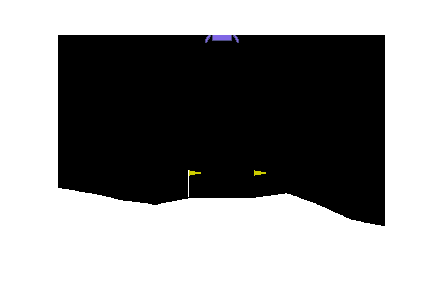
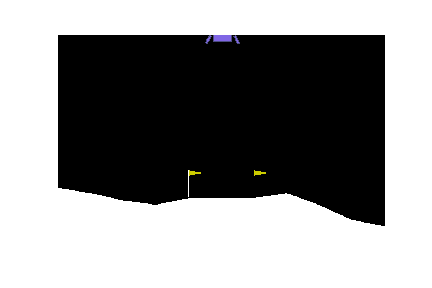
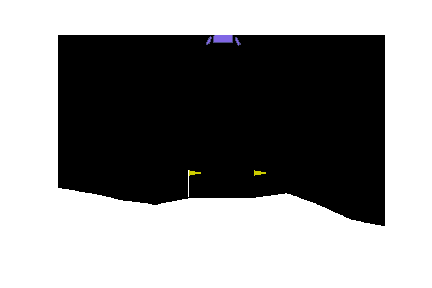
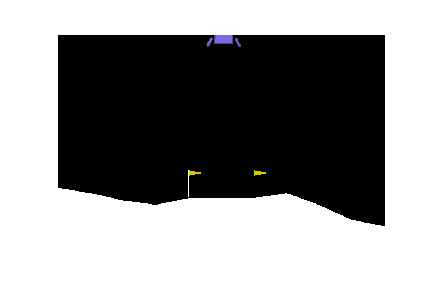
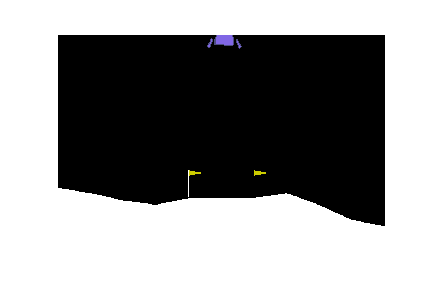
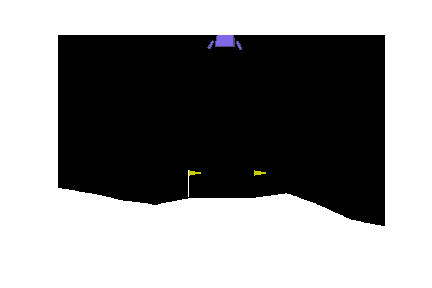
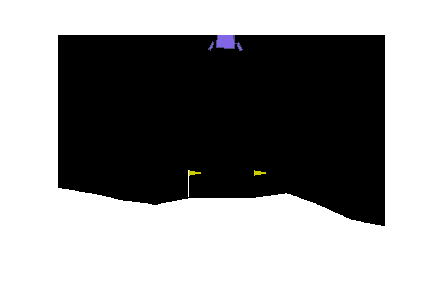
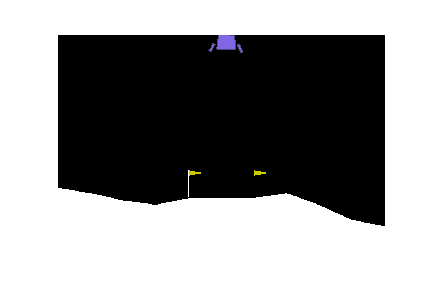
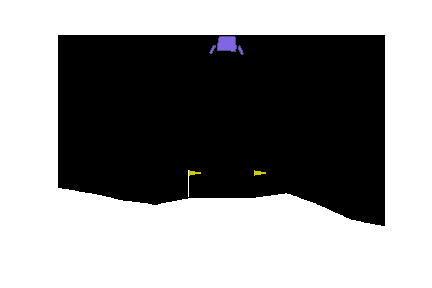
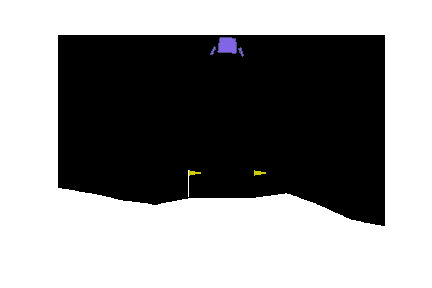
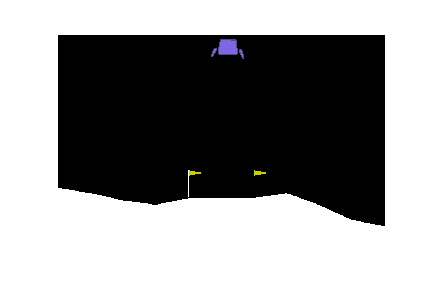
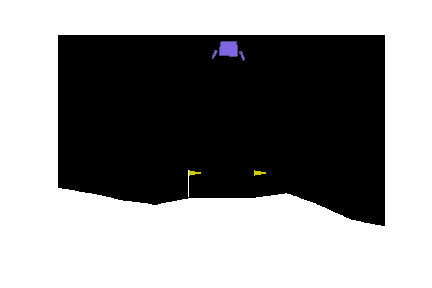
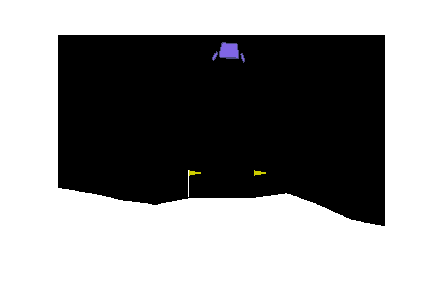
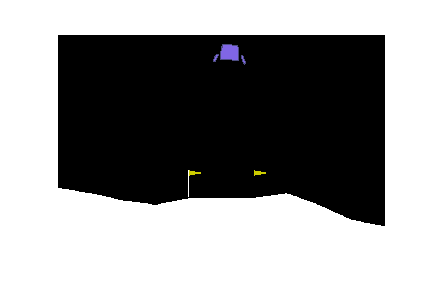
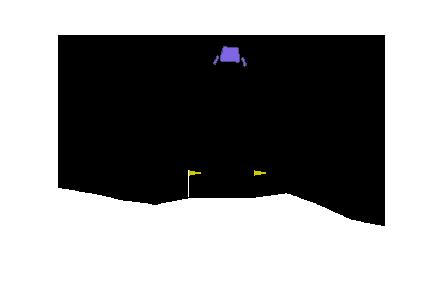
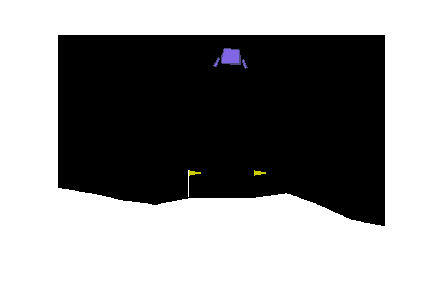
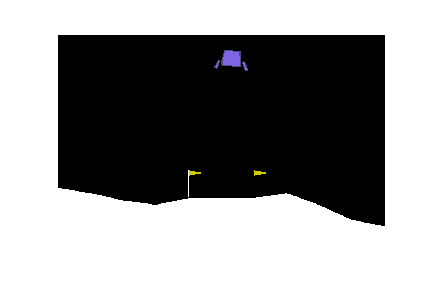
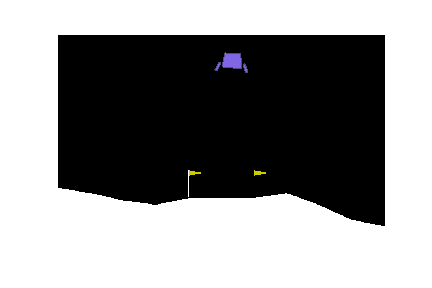
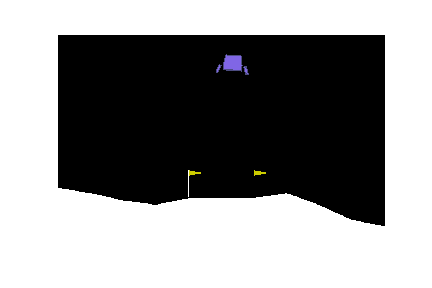
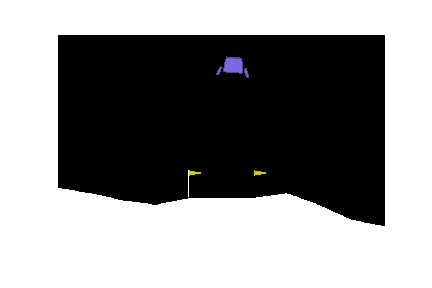
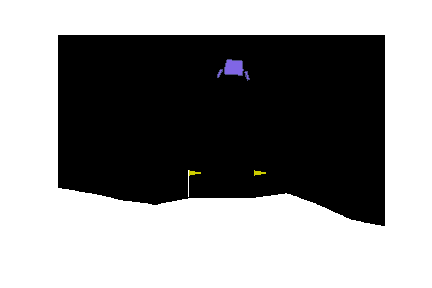
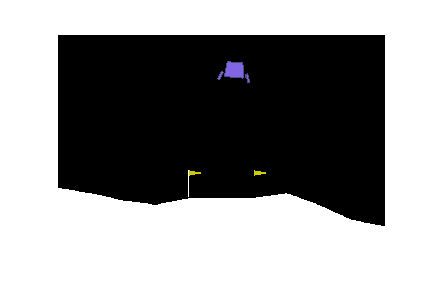
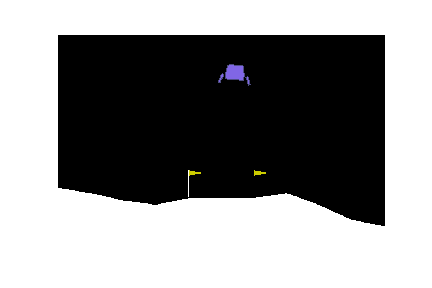
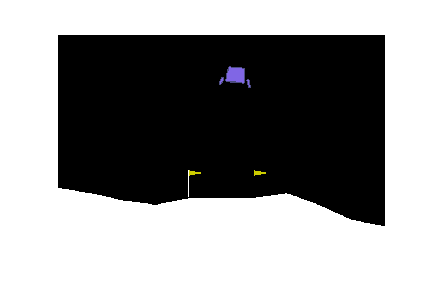
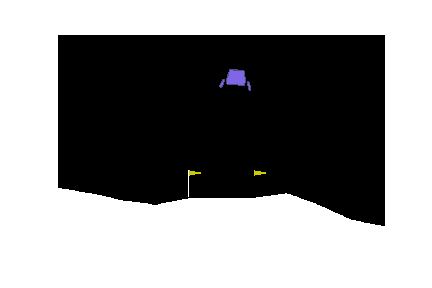
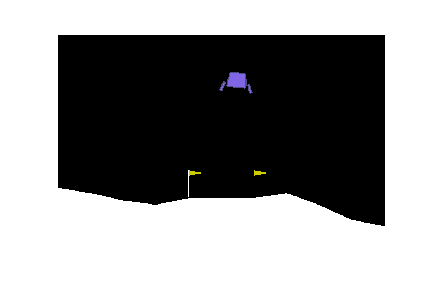
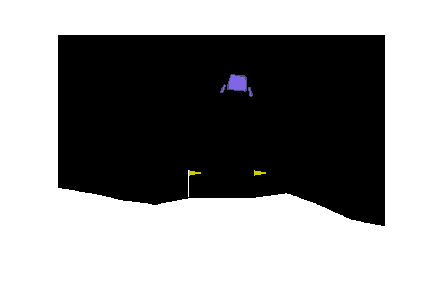
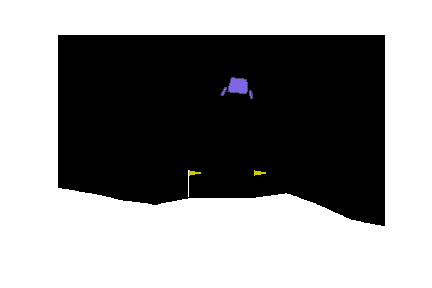
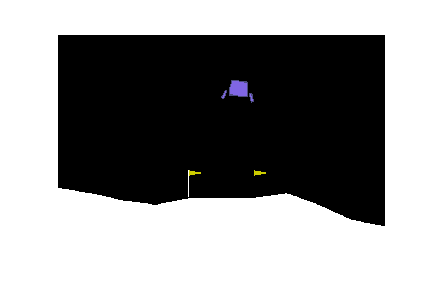
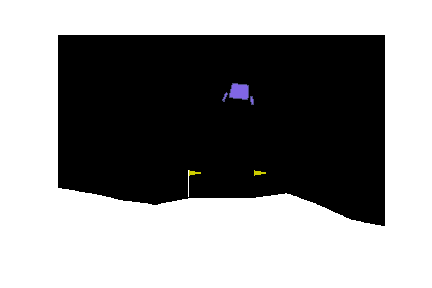
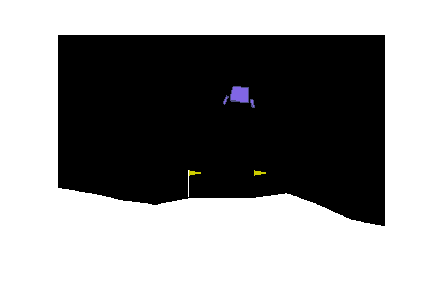
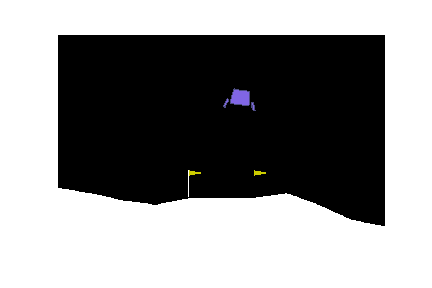
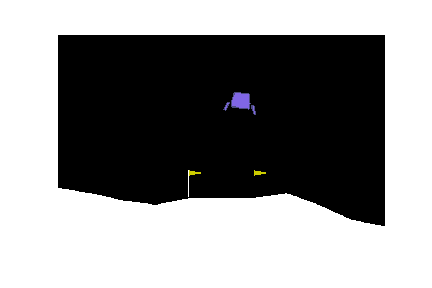
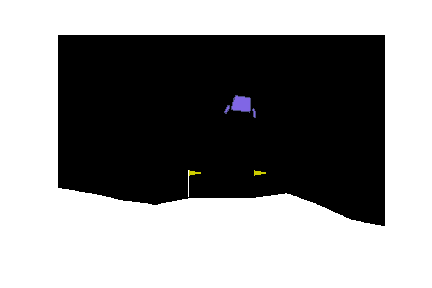
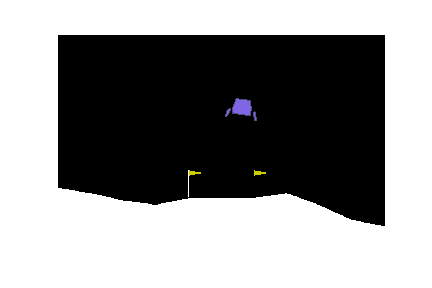
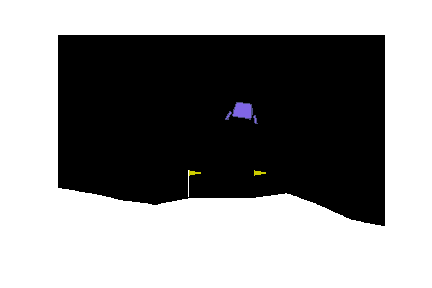
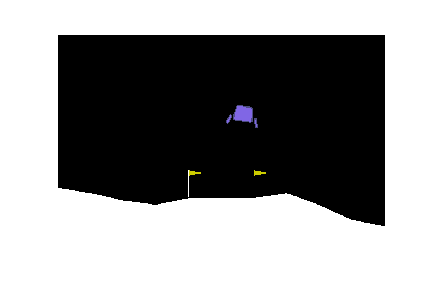
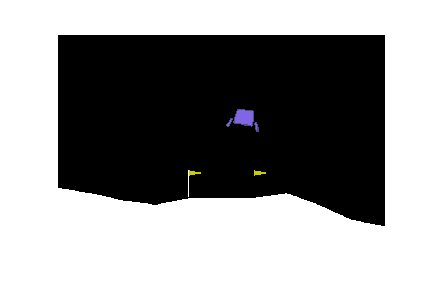
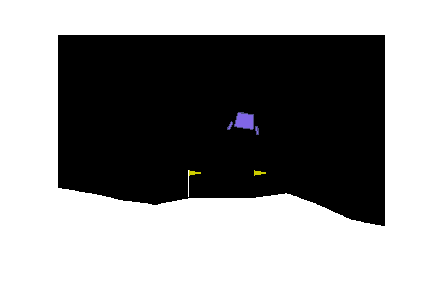
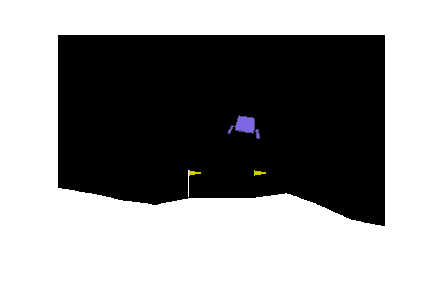
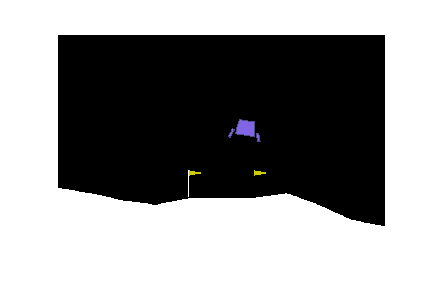
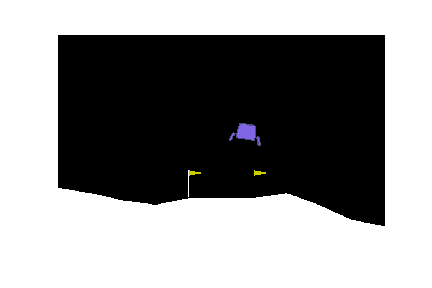
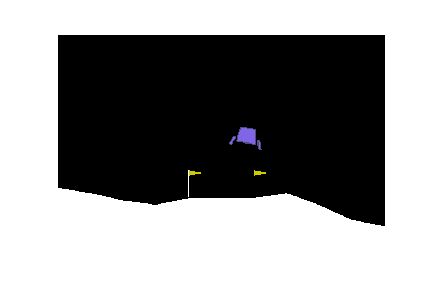
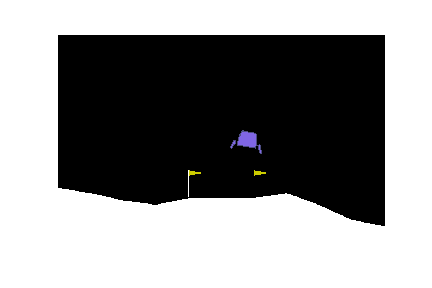
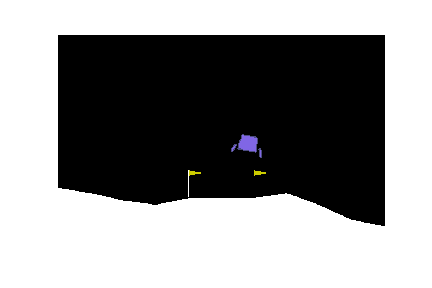
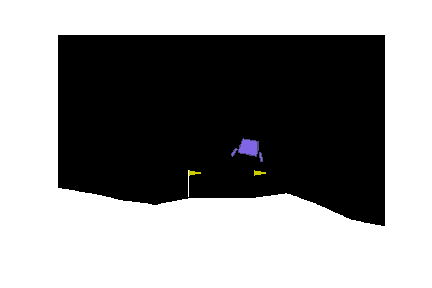
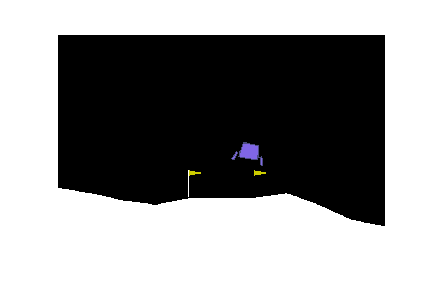
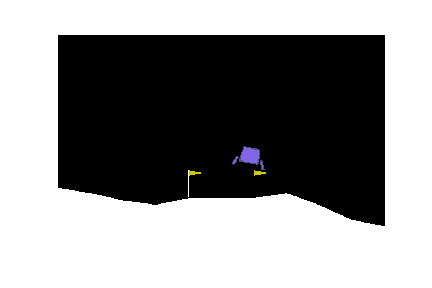
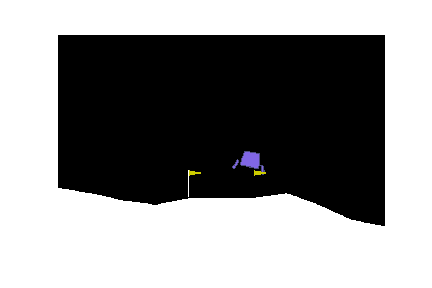
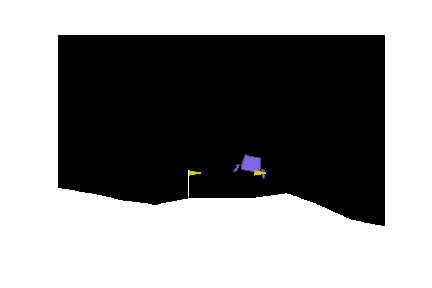
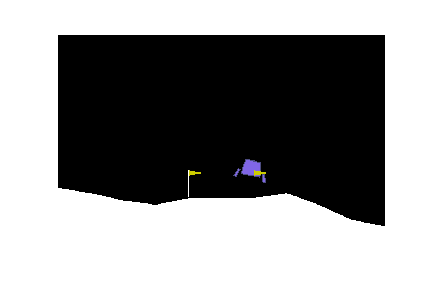
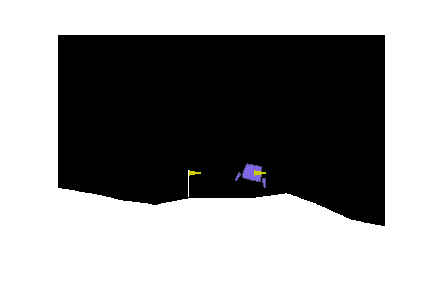
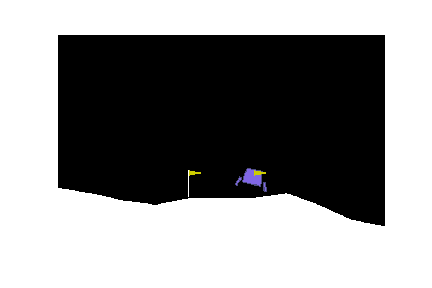
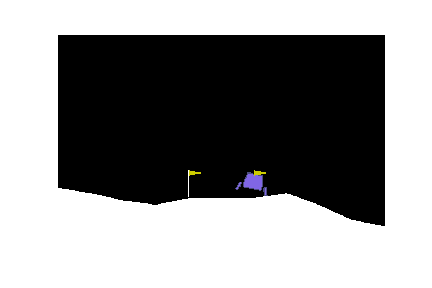
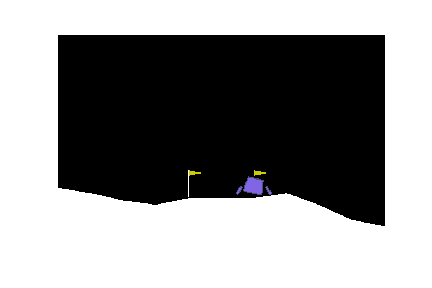

Best of generation 10



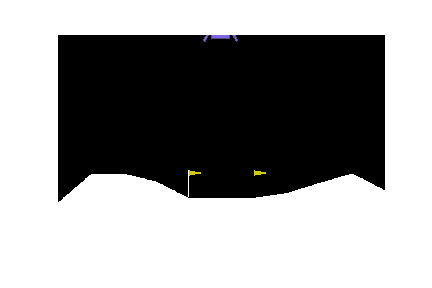
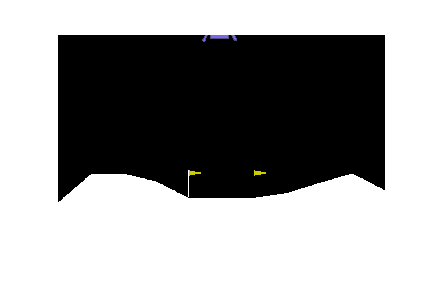
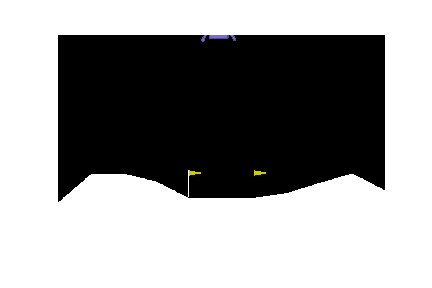
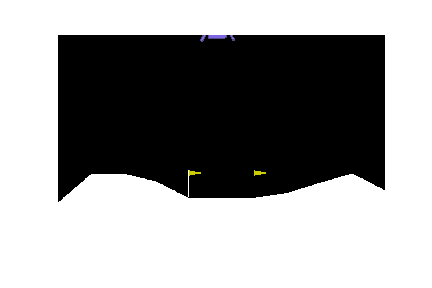
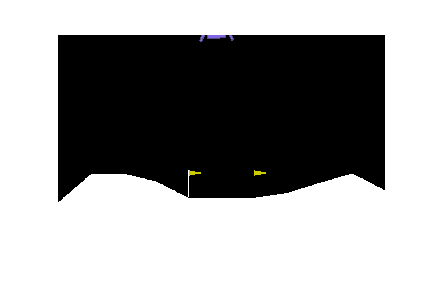
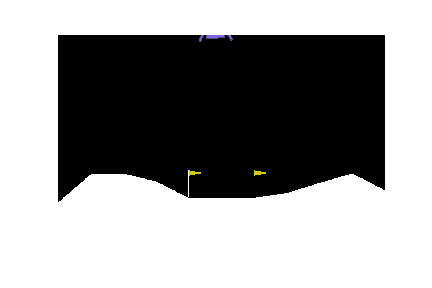
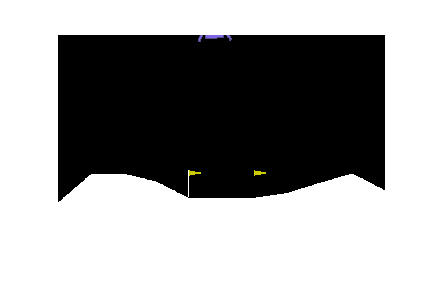
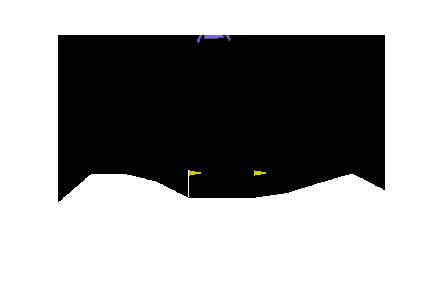
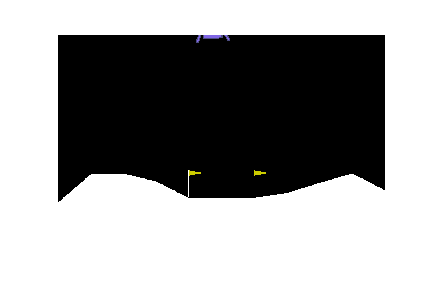
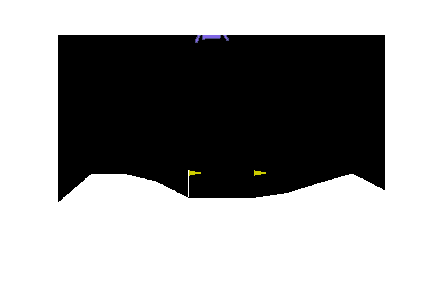
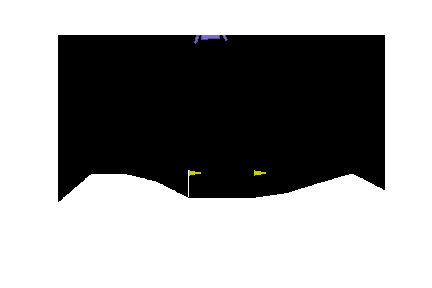
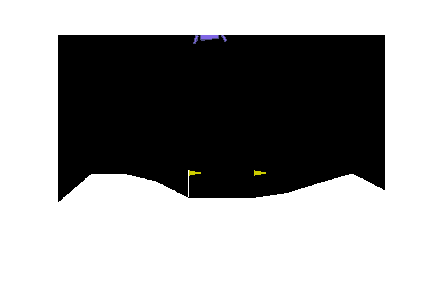
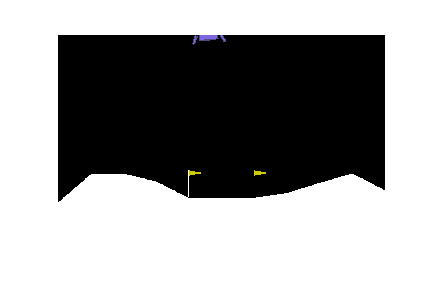
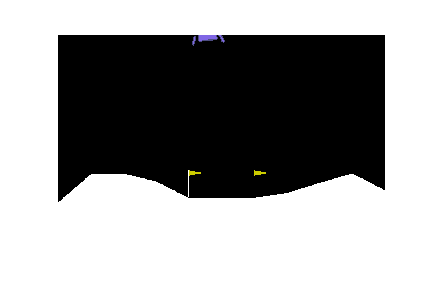
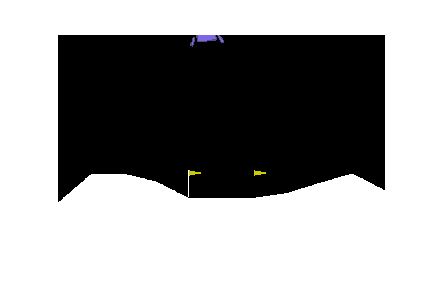
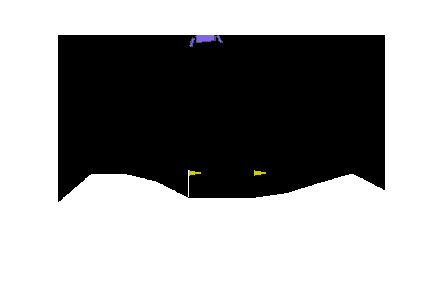
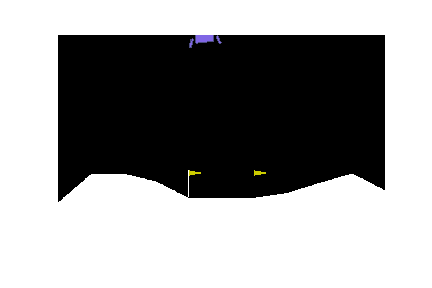
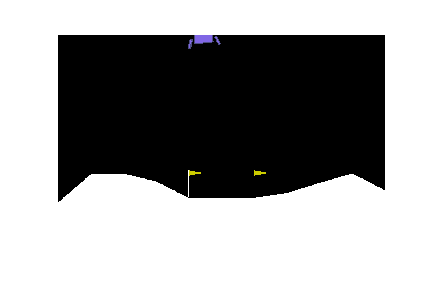
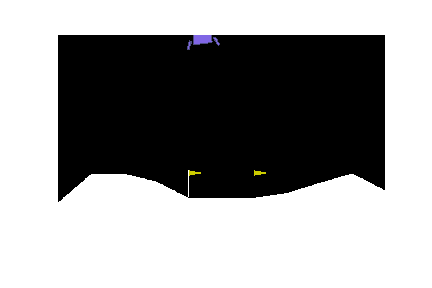
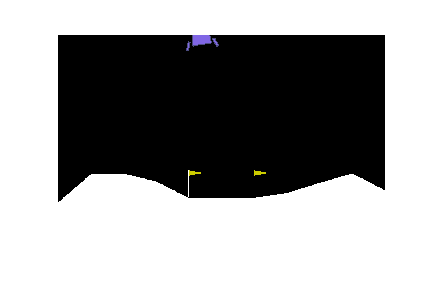
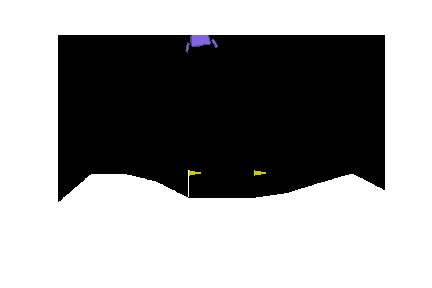
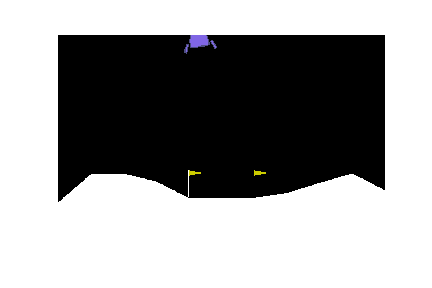
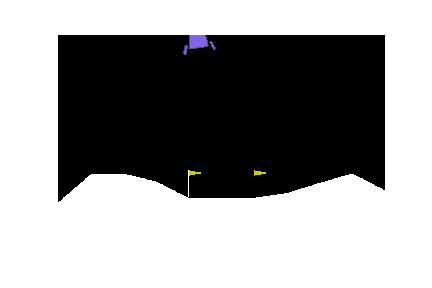
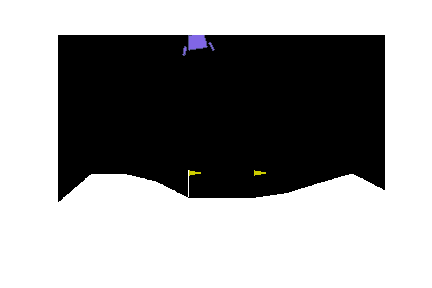
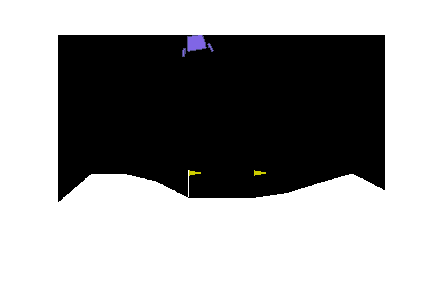
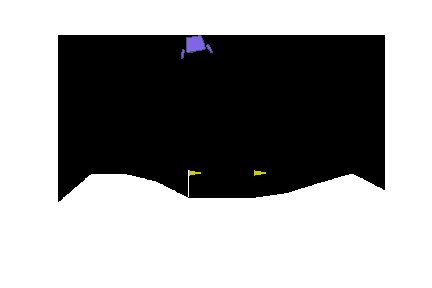
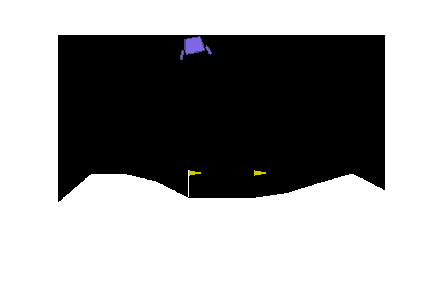
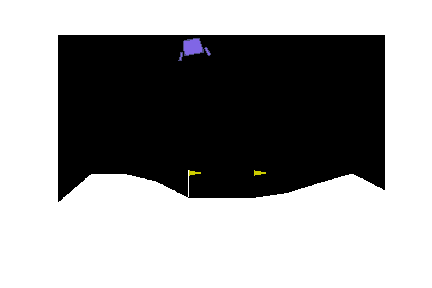
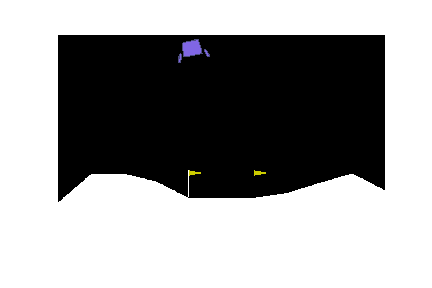
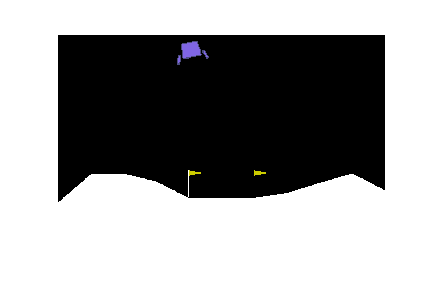
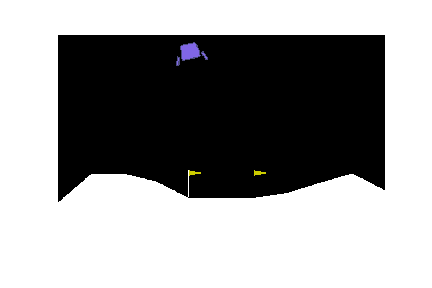
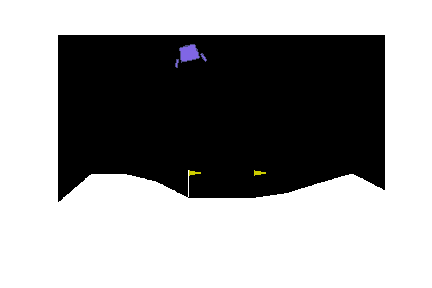
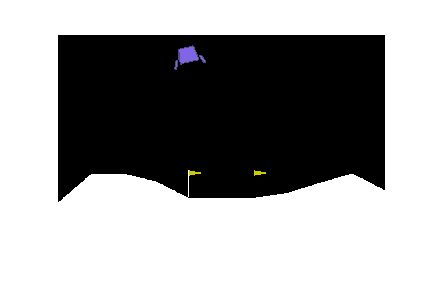
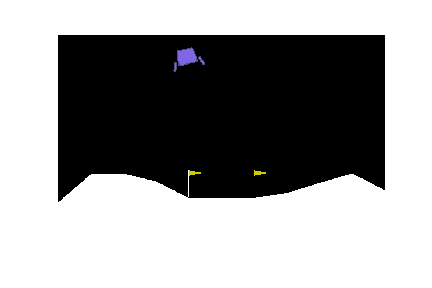
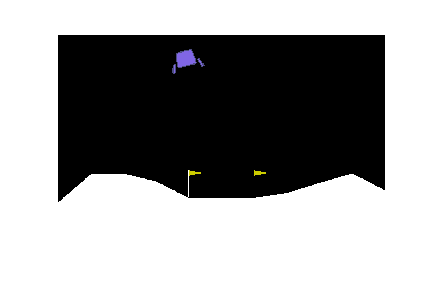
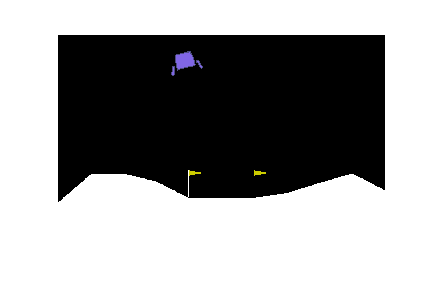
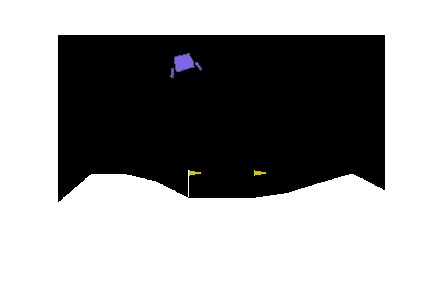
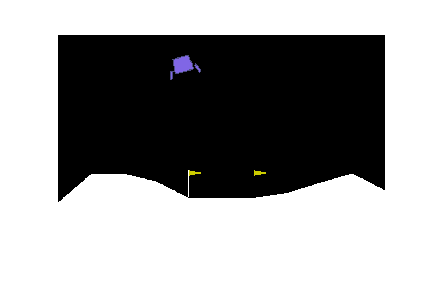
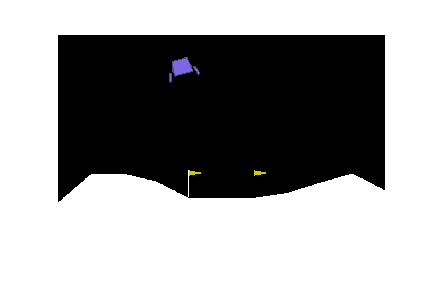
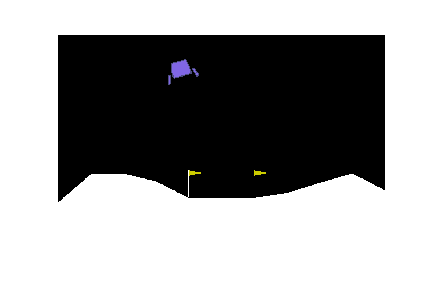
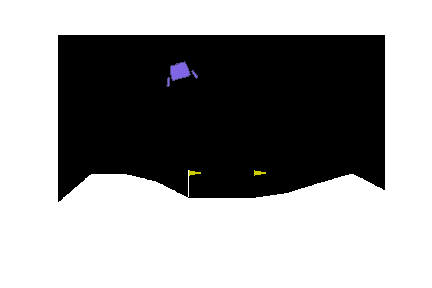
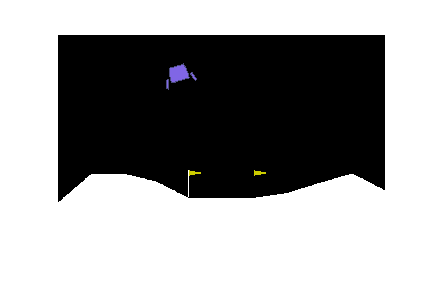
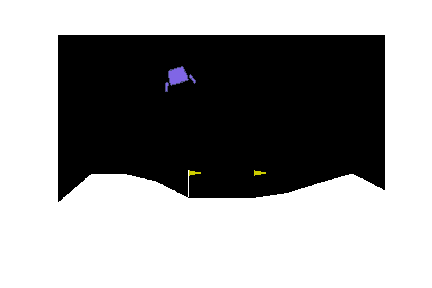
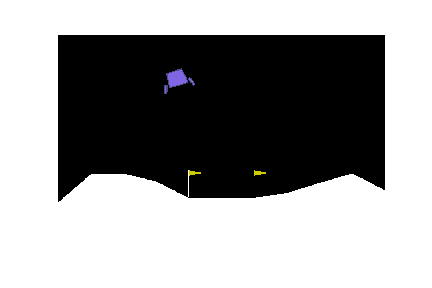
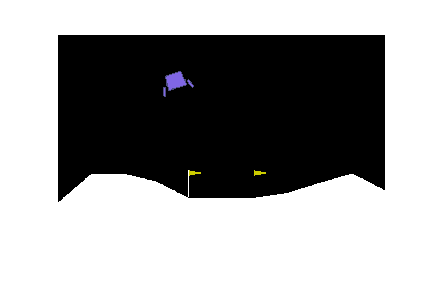
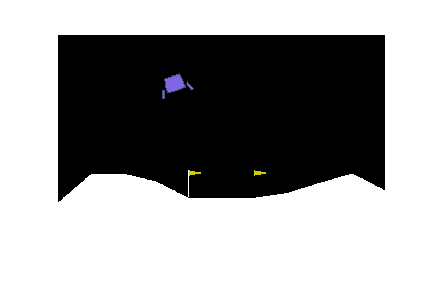
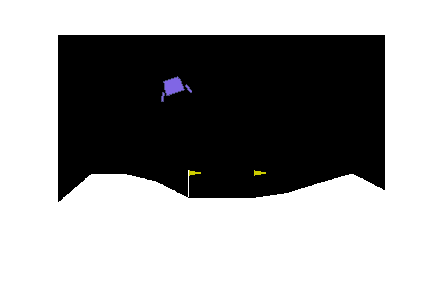
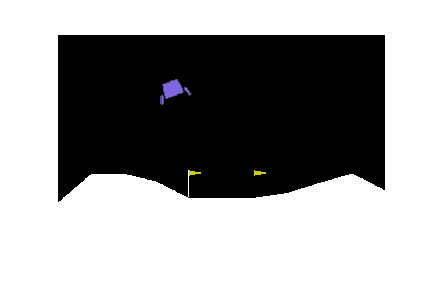
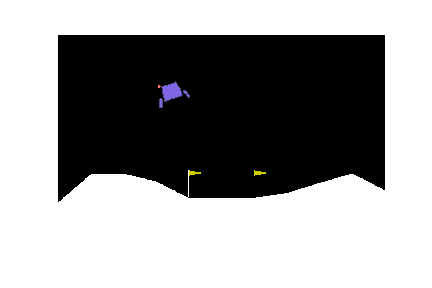
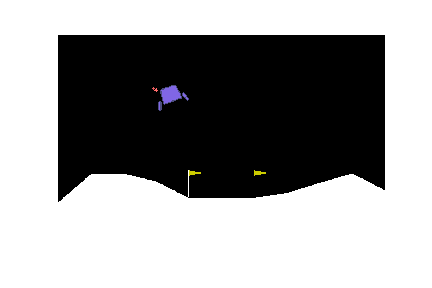
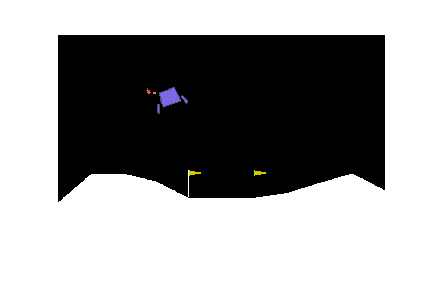
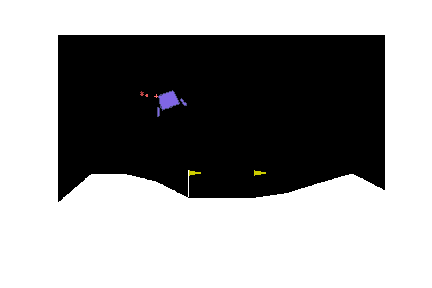
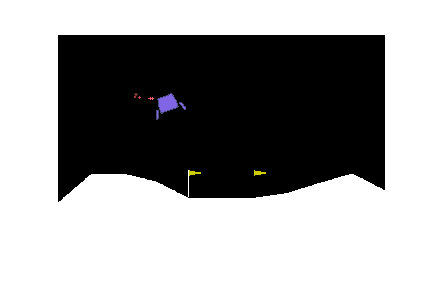
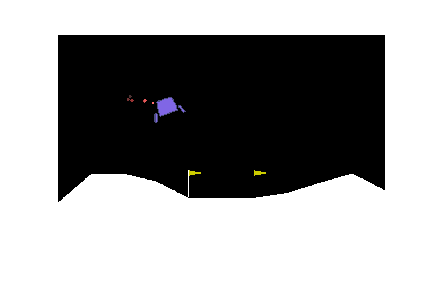
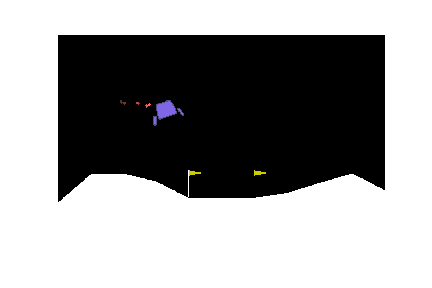
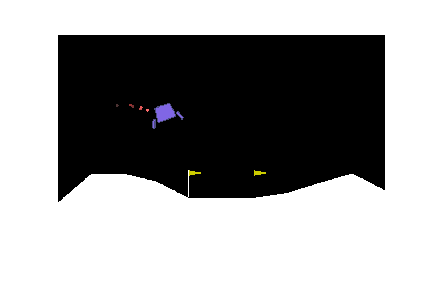
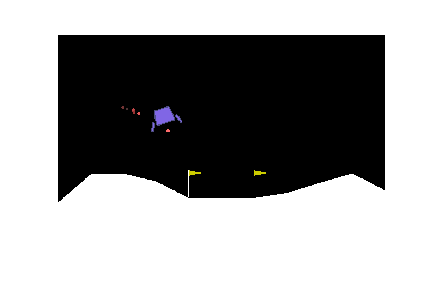
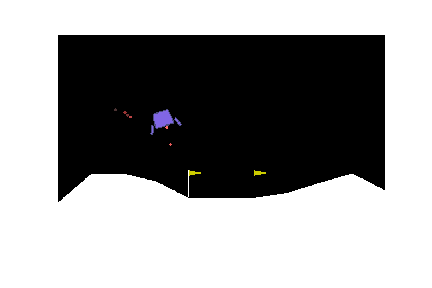
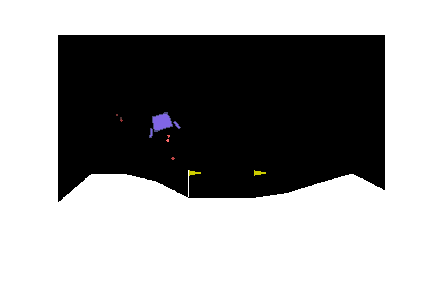
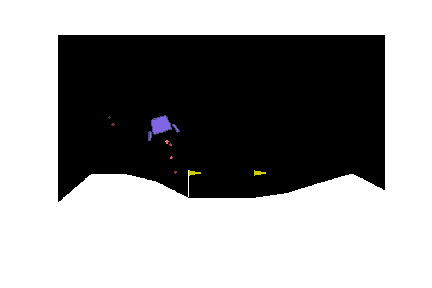
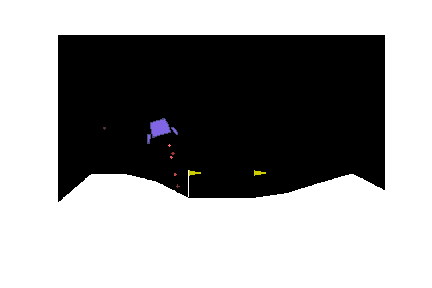
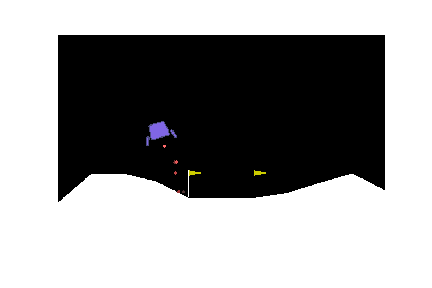
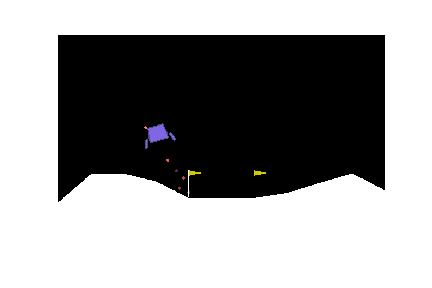
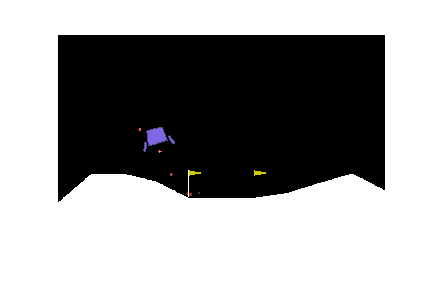
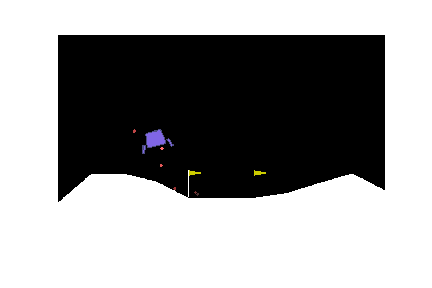
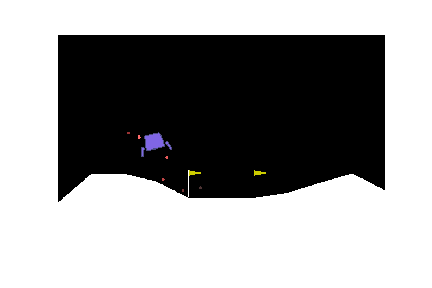
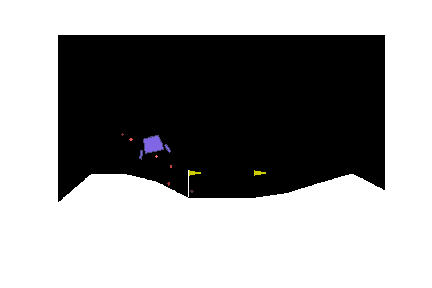
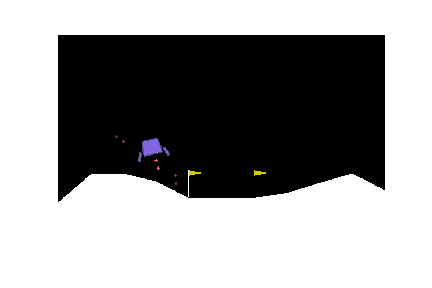
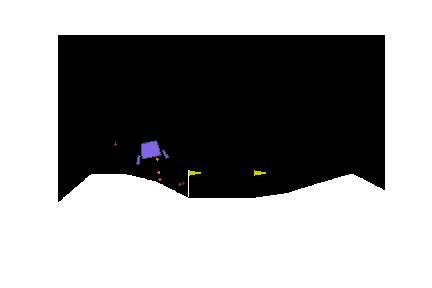
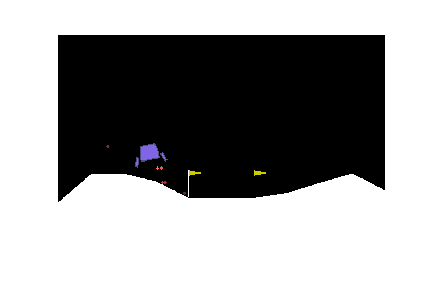
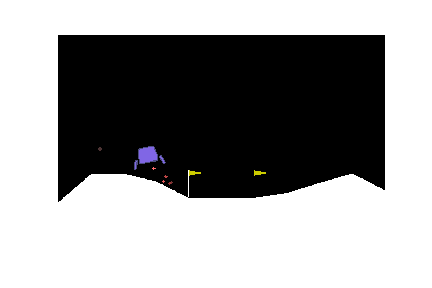
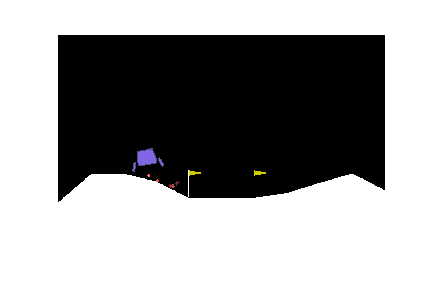
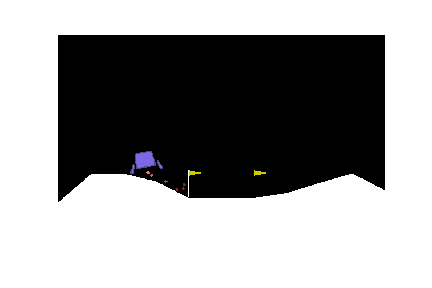
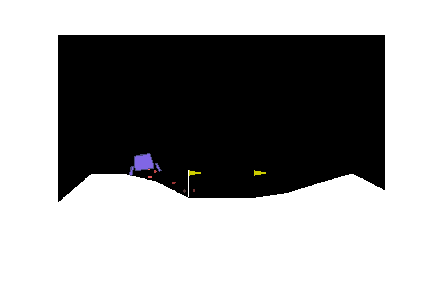
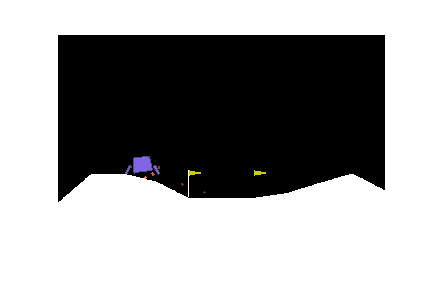
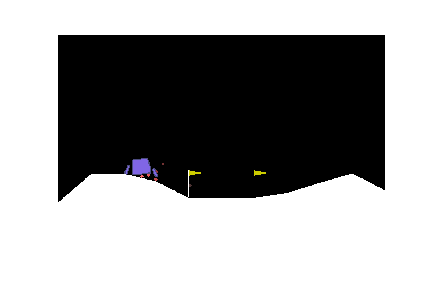

Best of generation 20



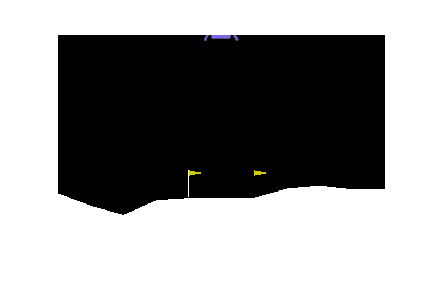
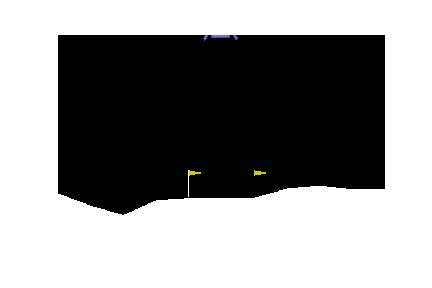
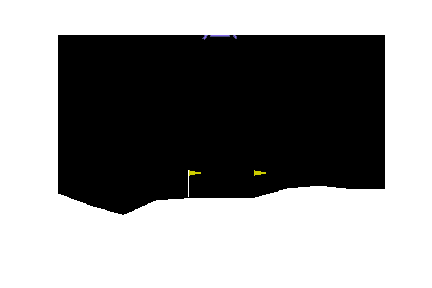
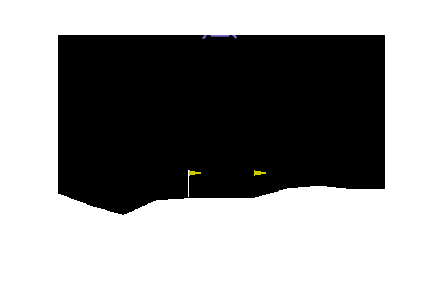
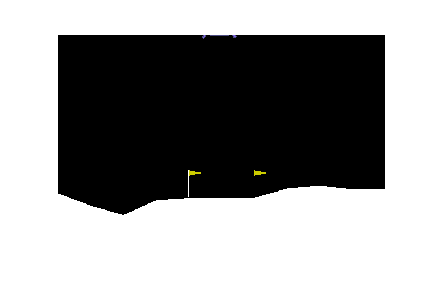
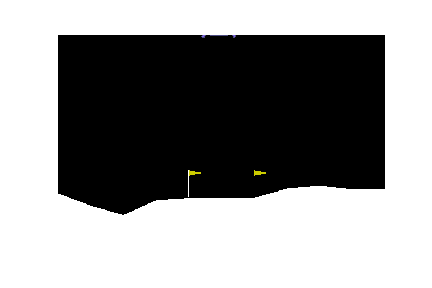
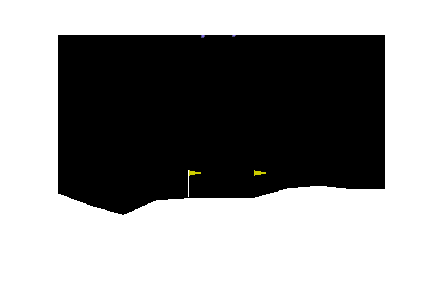
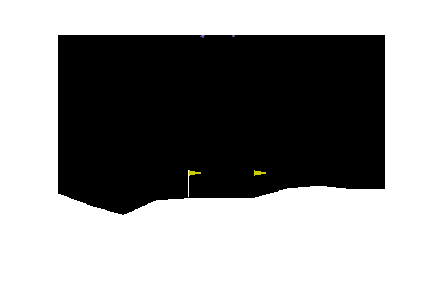
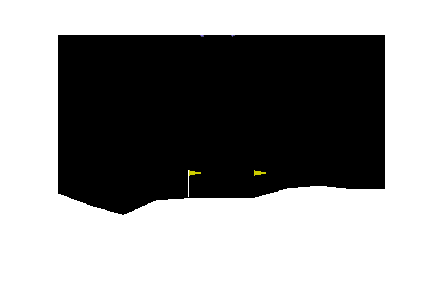
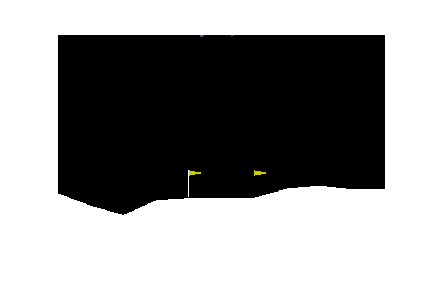
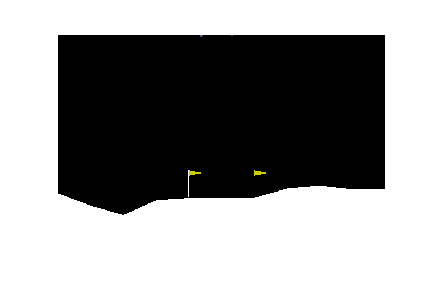
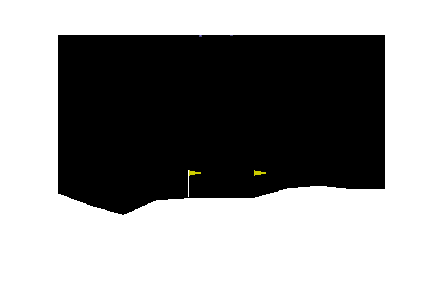
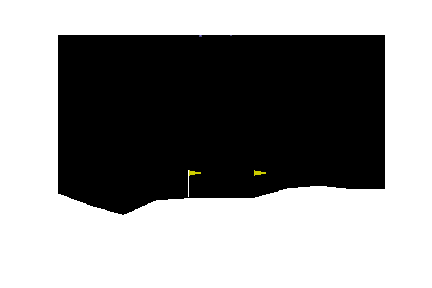
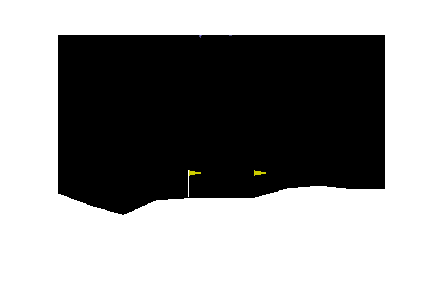
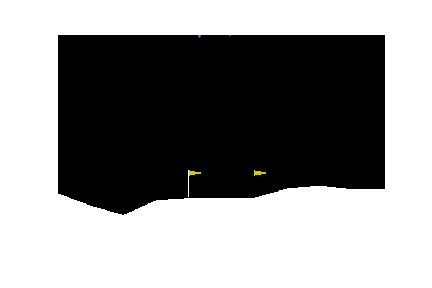
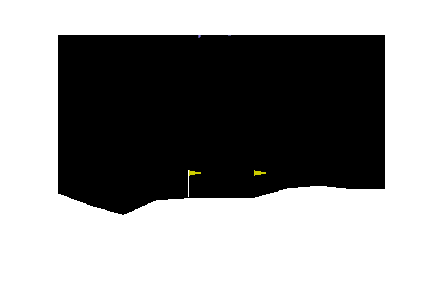
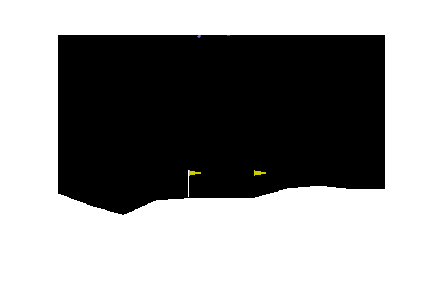
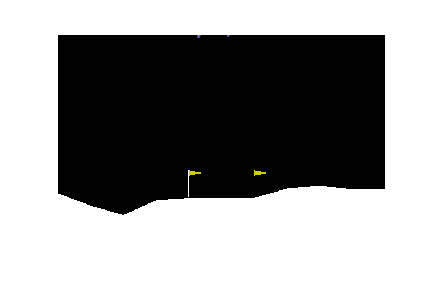
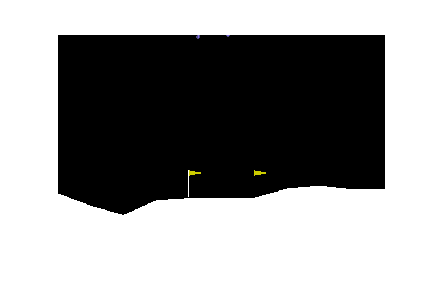
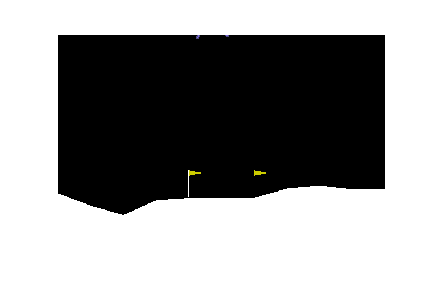
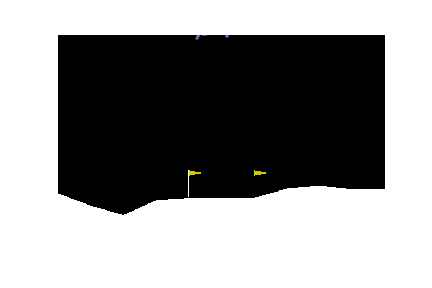
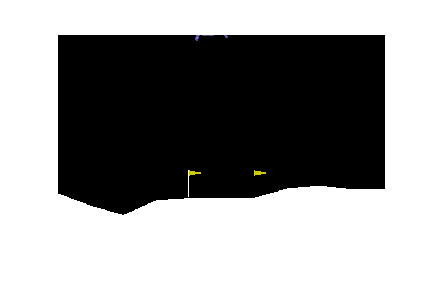
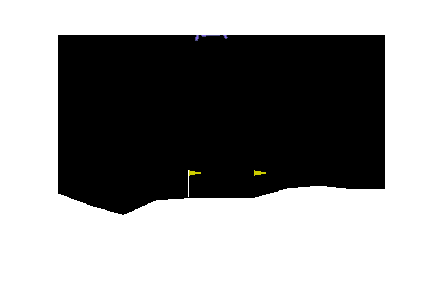
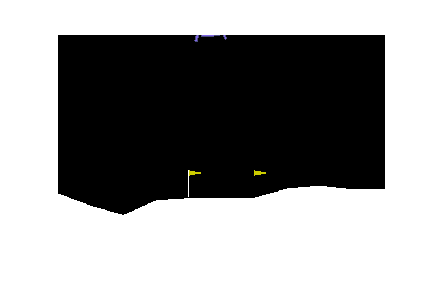
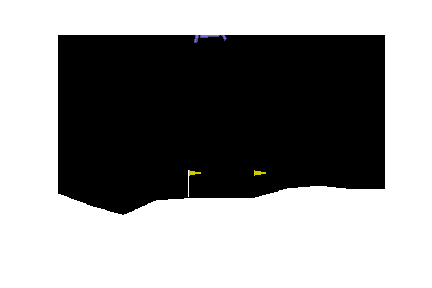
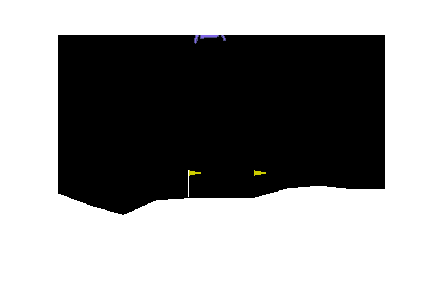
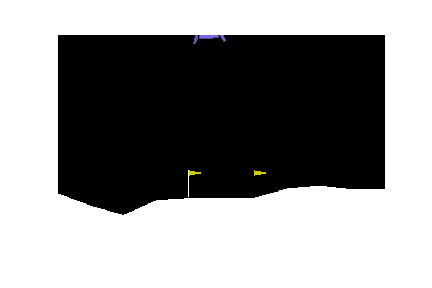
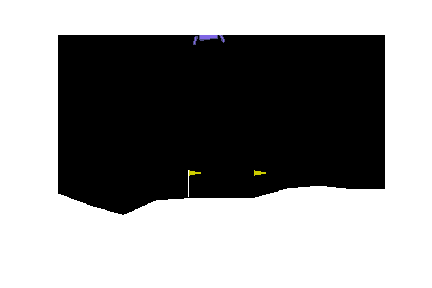
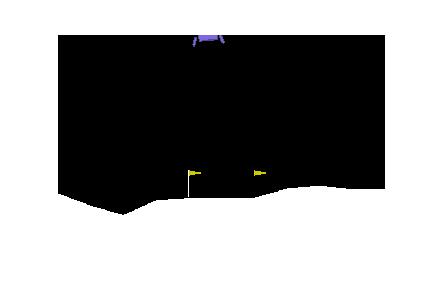
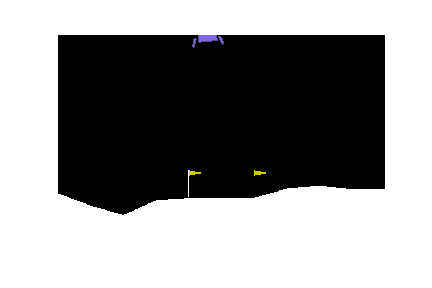
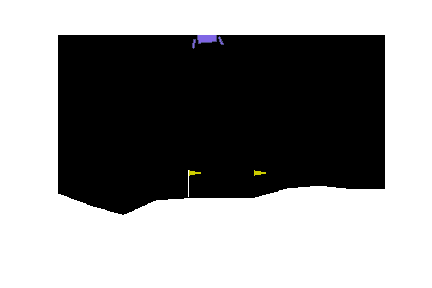
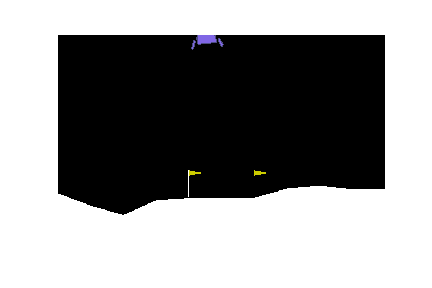
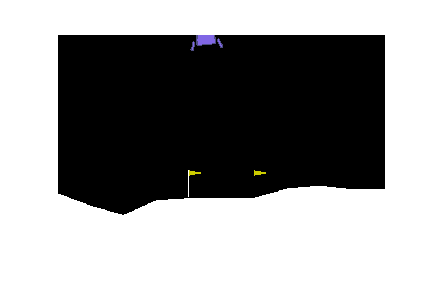
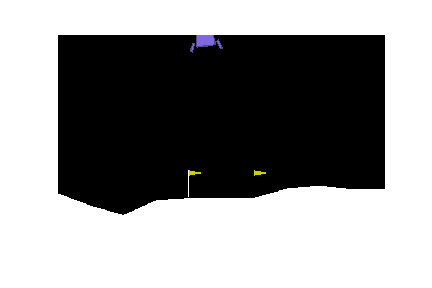
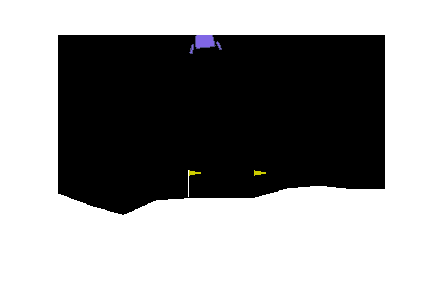
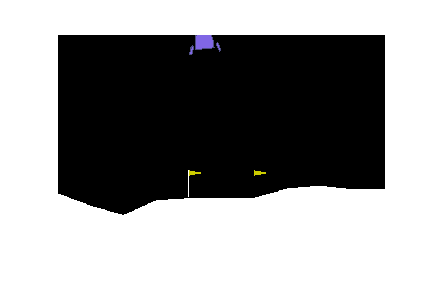
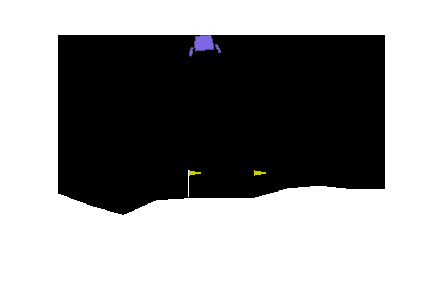
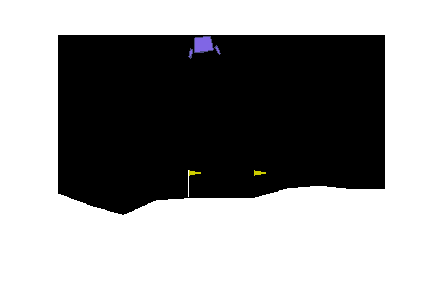
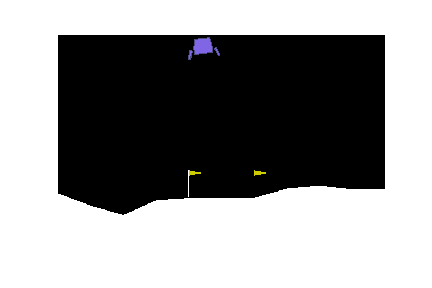
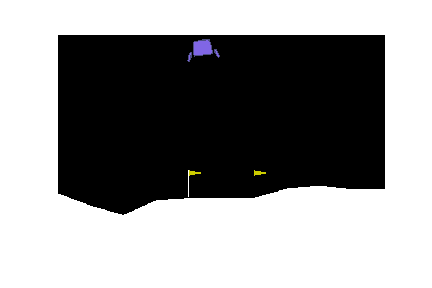
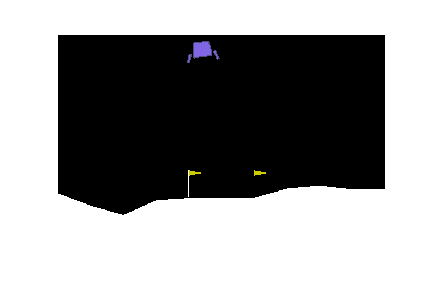
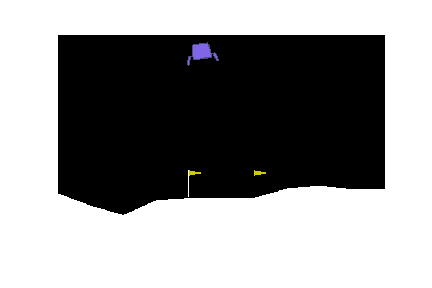
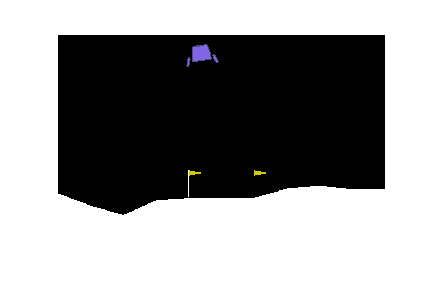
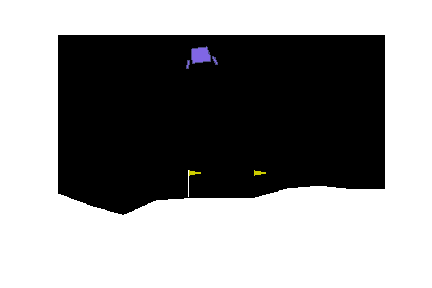
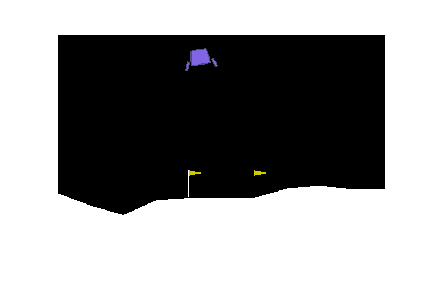
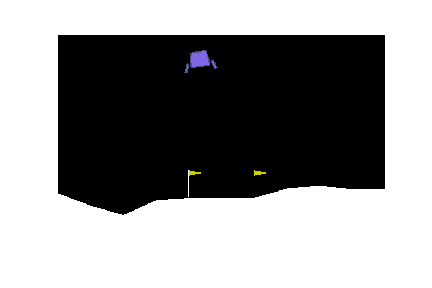
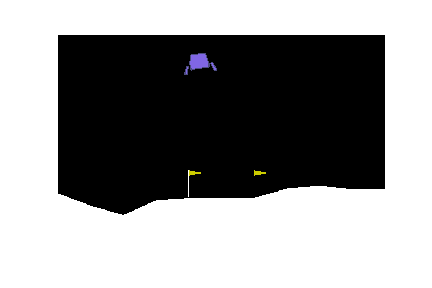
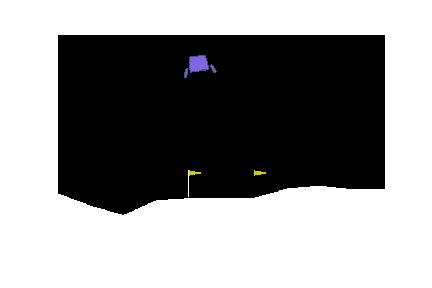
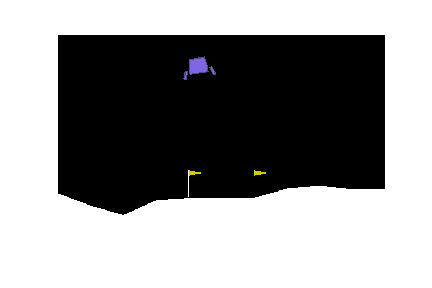
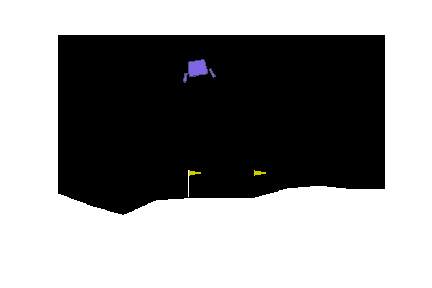
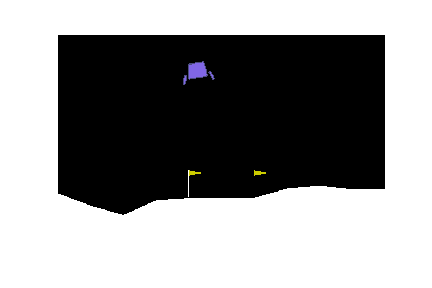
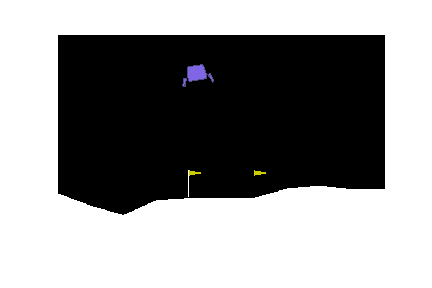
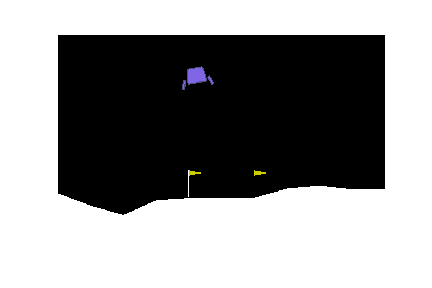
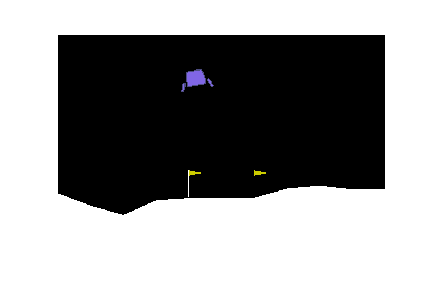
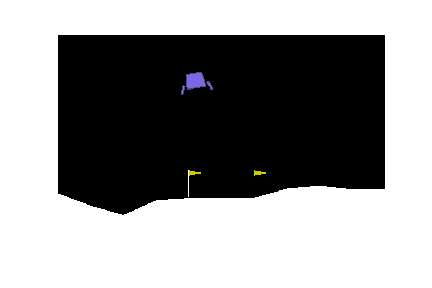
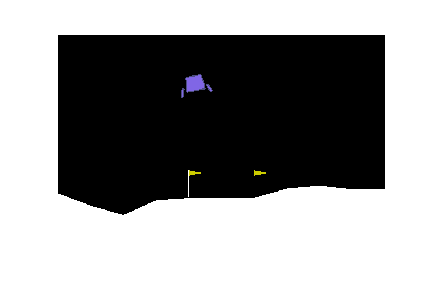
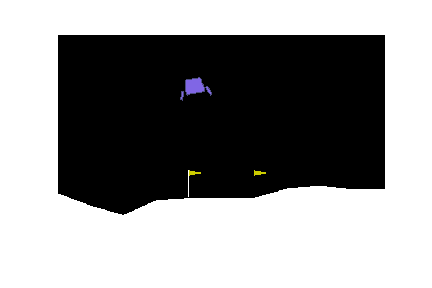
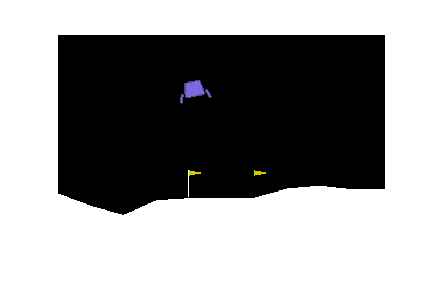
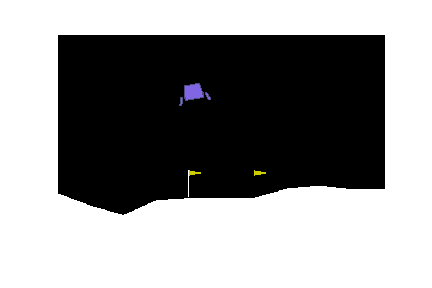
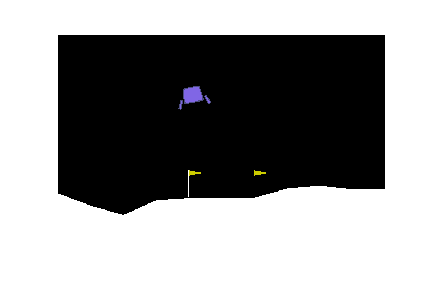
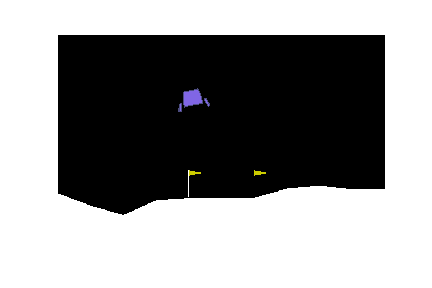
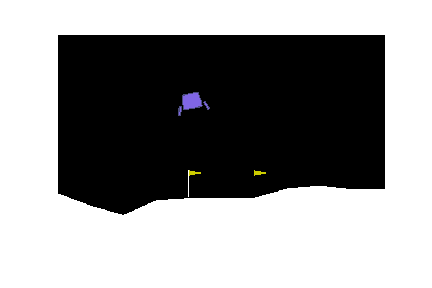
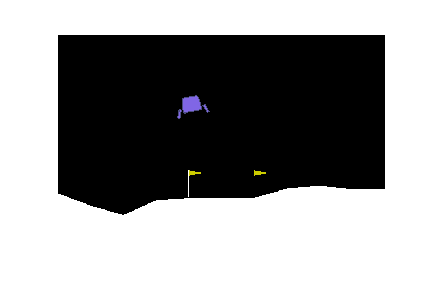
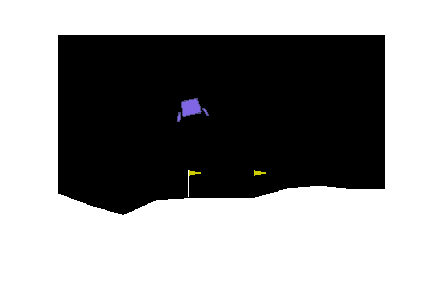
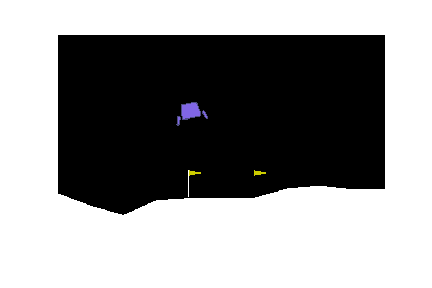
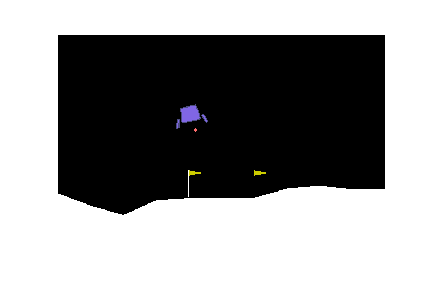
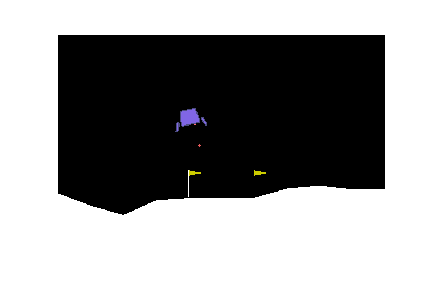
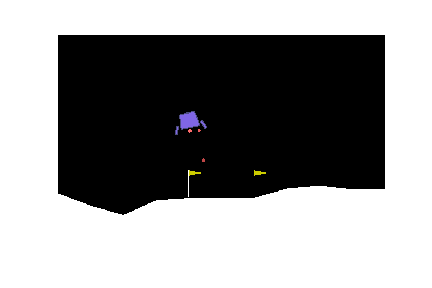
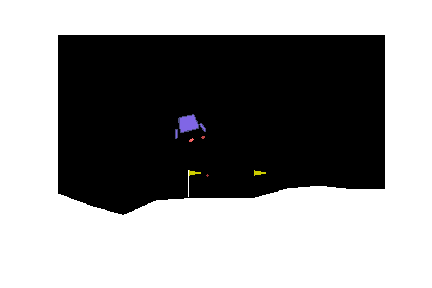
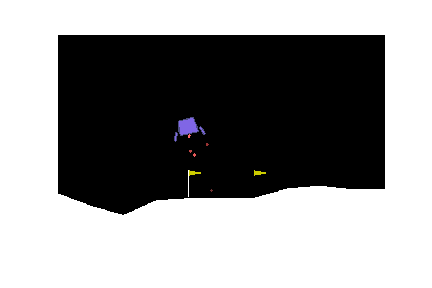
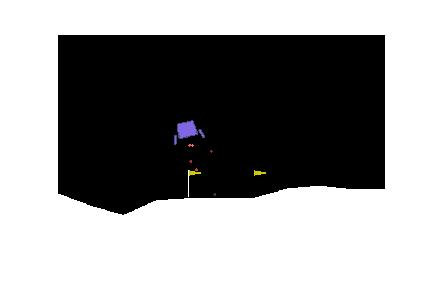
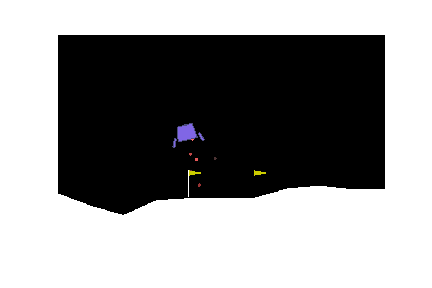
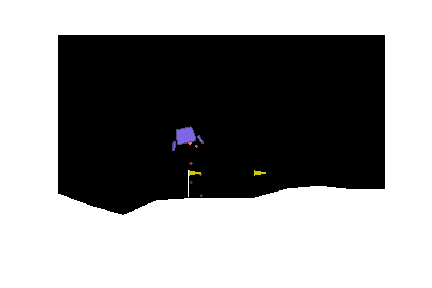
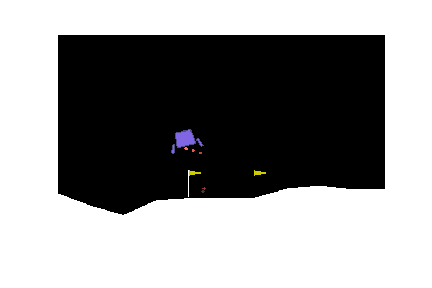
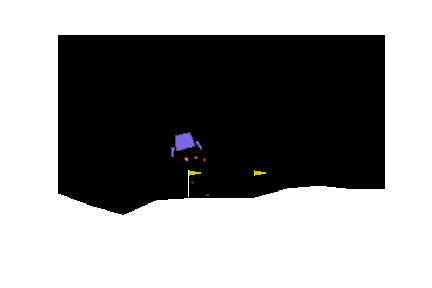
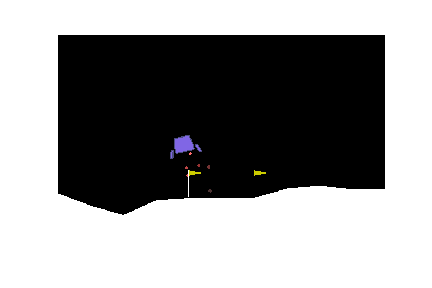
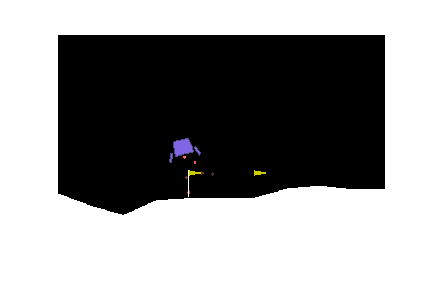
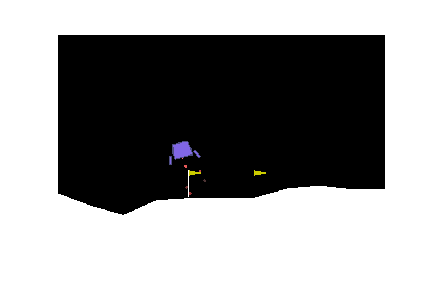
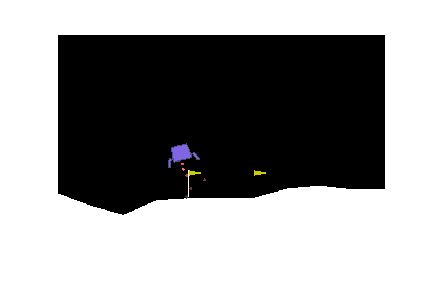
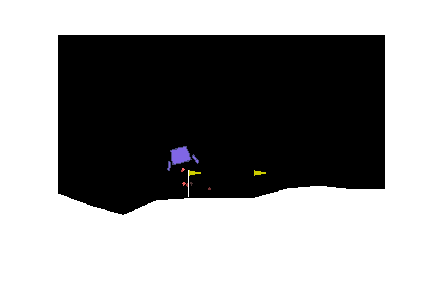
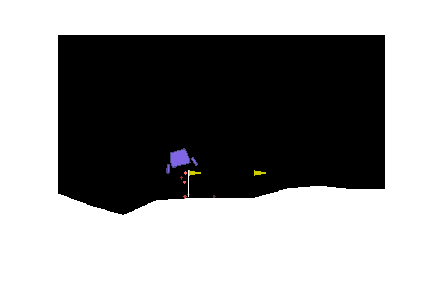
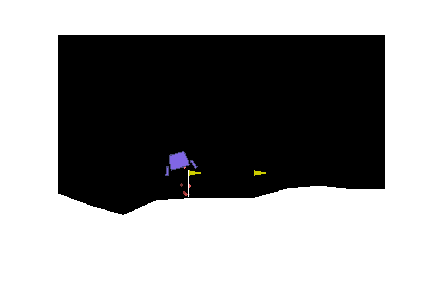
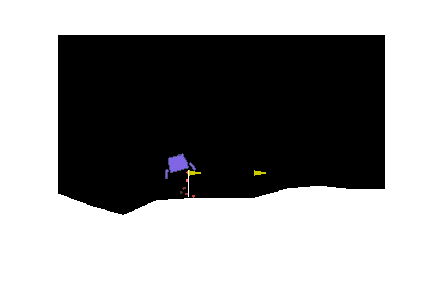
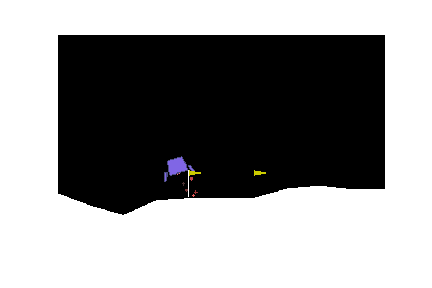
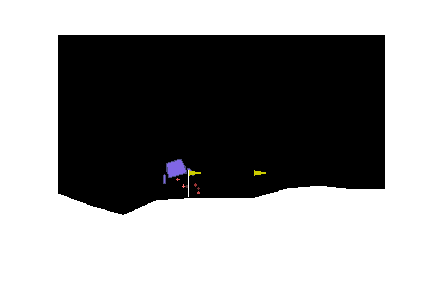
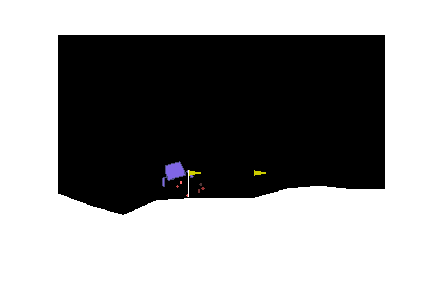
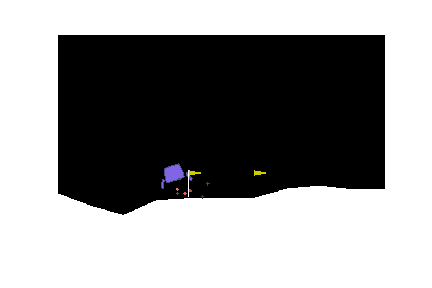
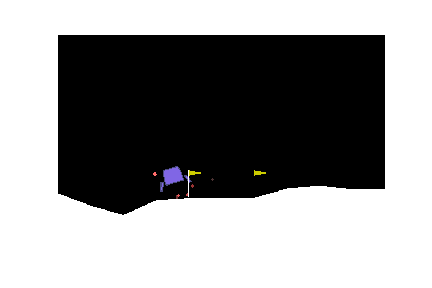
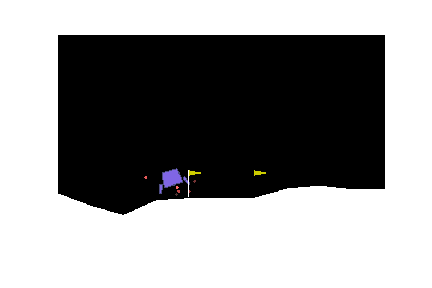
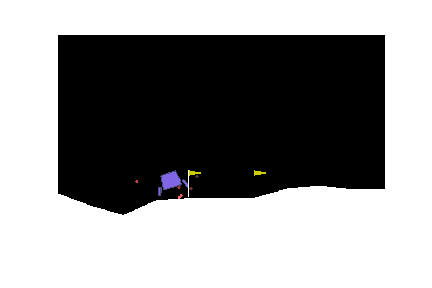
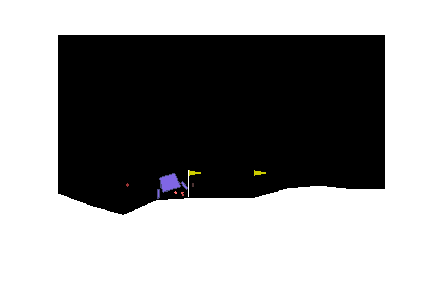
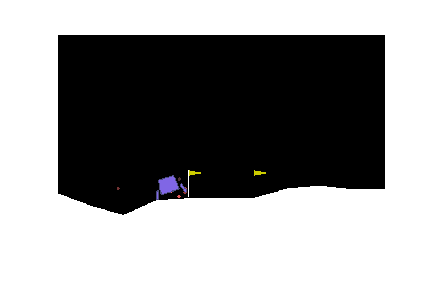
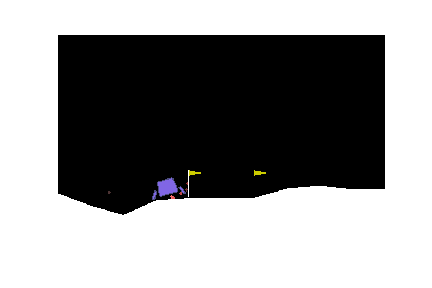
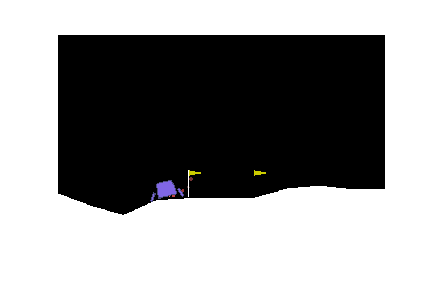
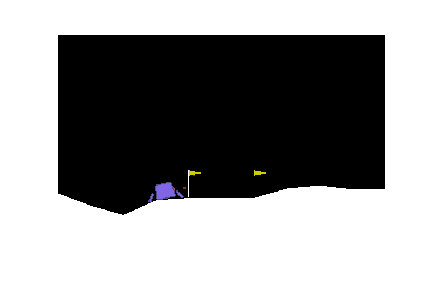

Best of generation 30



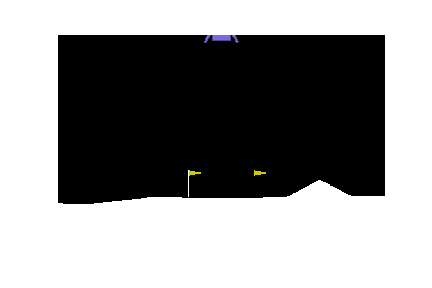
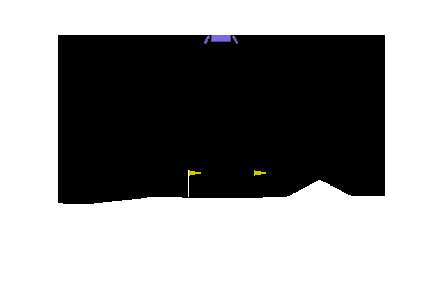
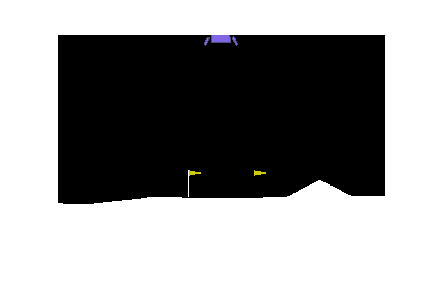
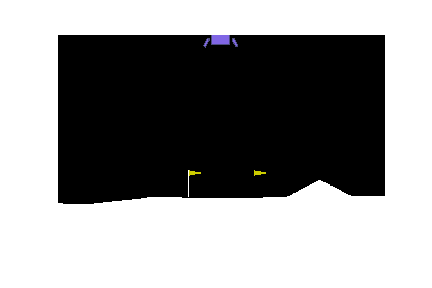
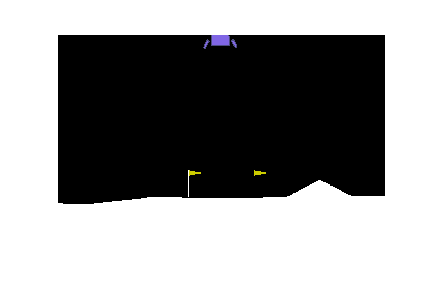
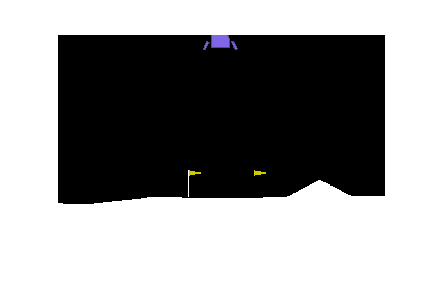
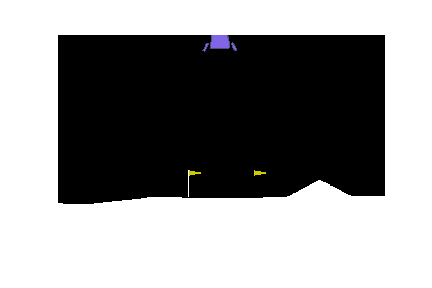
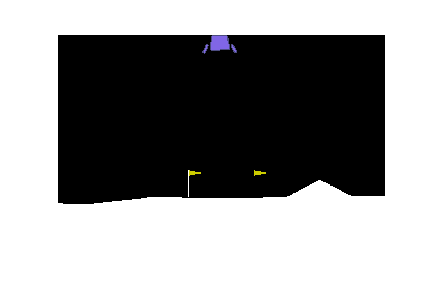
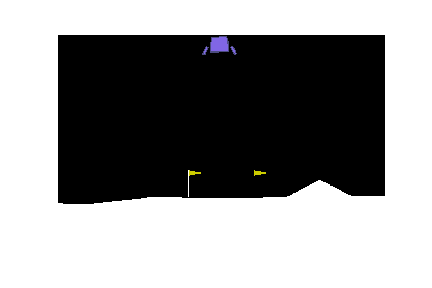
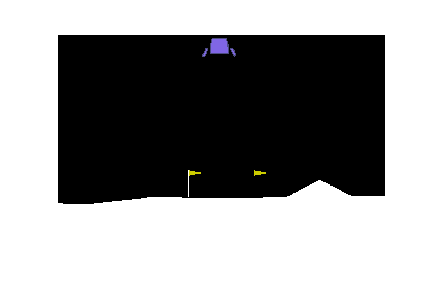
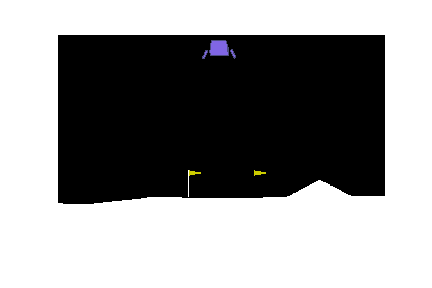
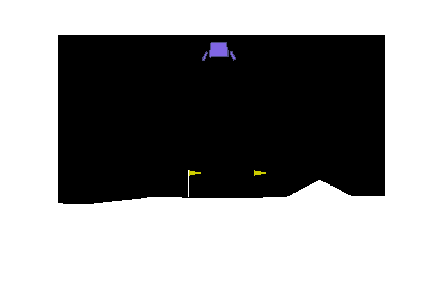
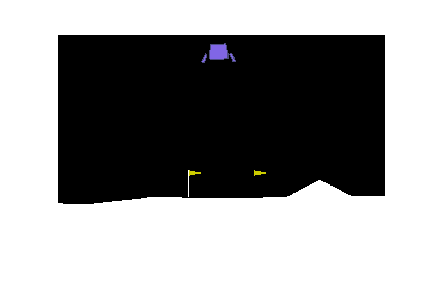
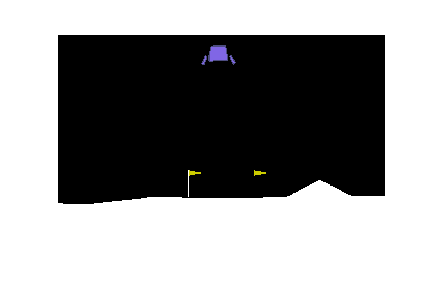
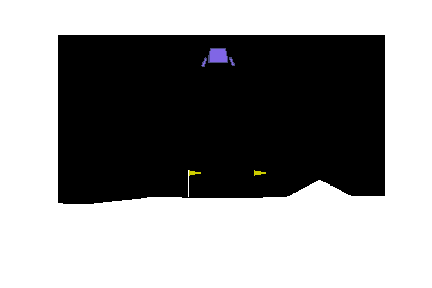
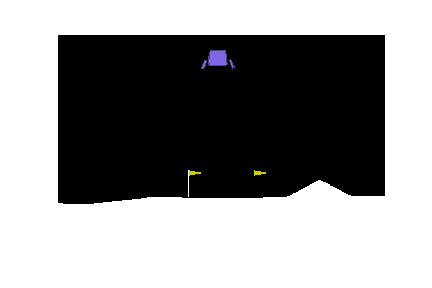
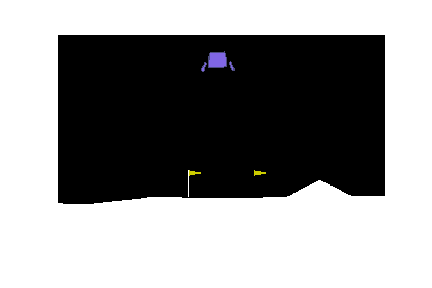
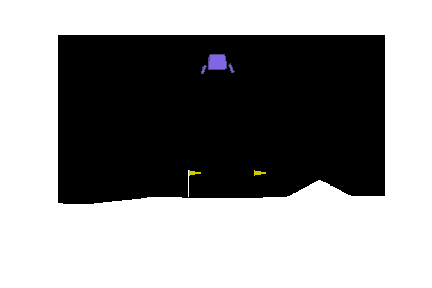
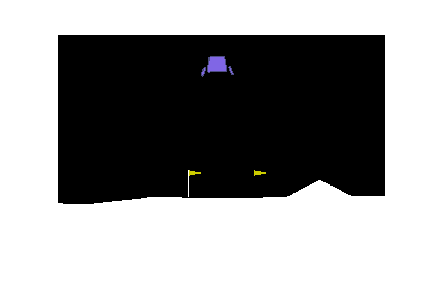
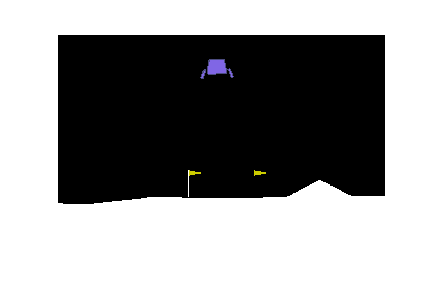
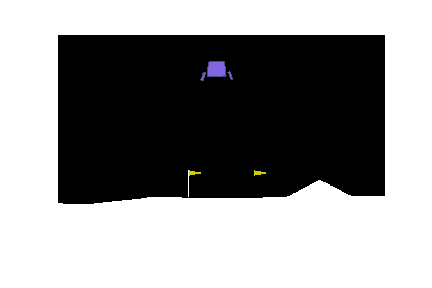
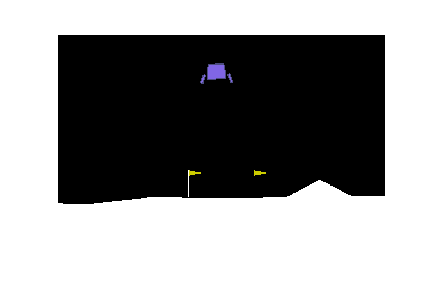
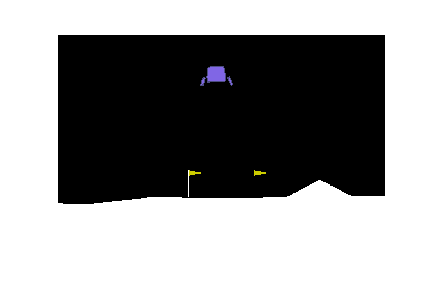
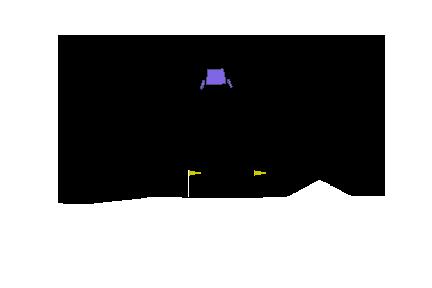
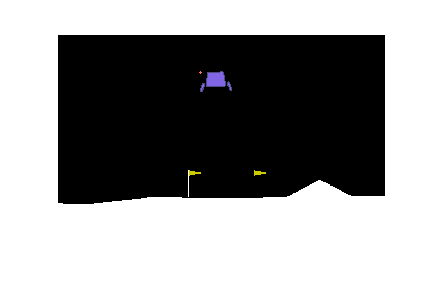
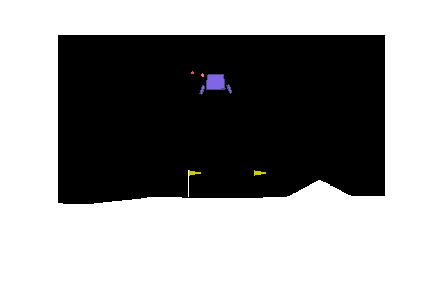
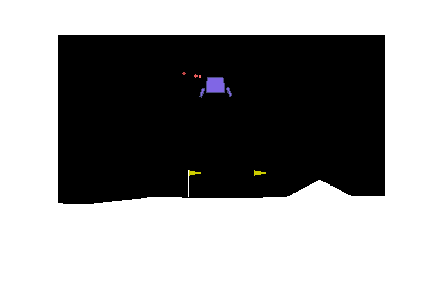
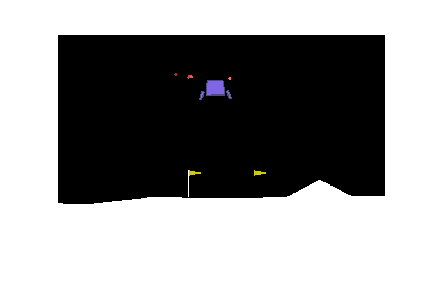
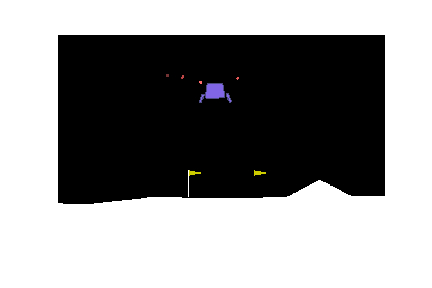
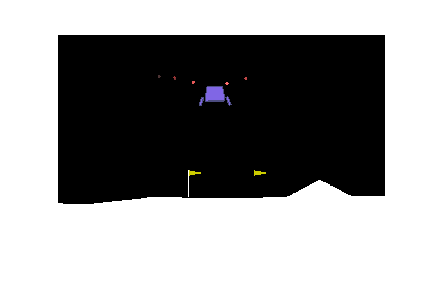
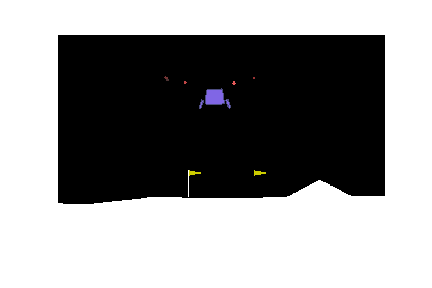
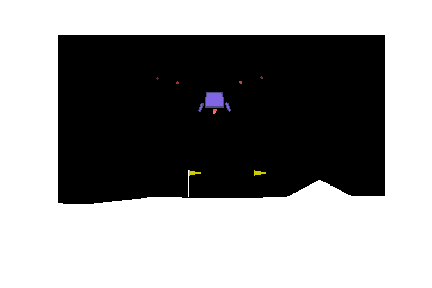
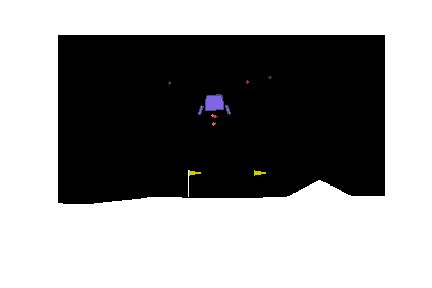
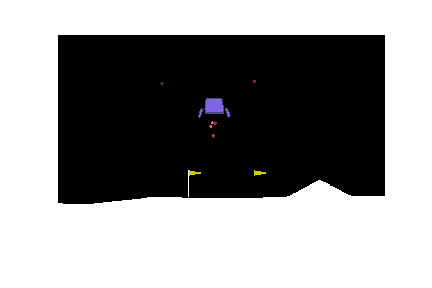
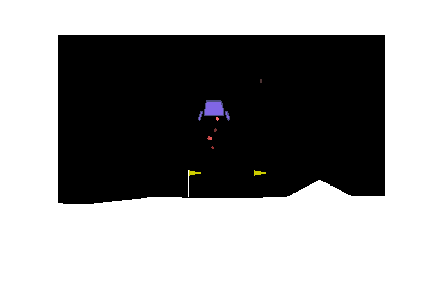
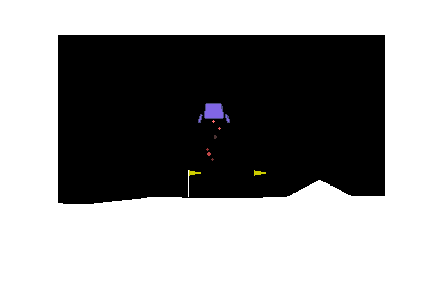
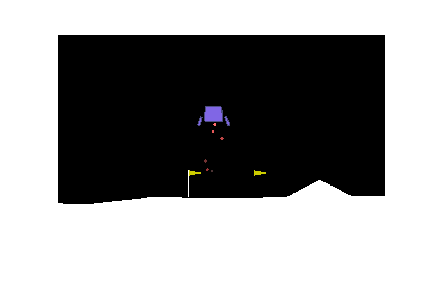
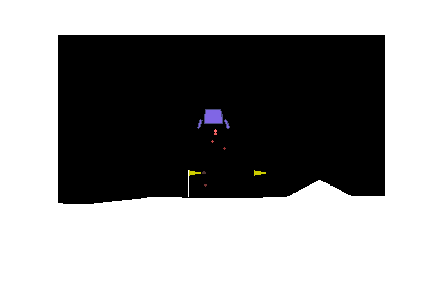
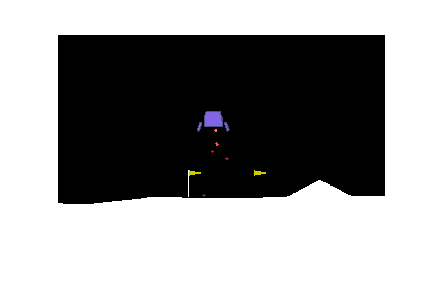
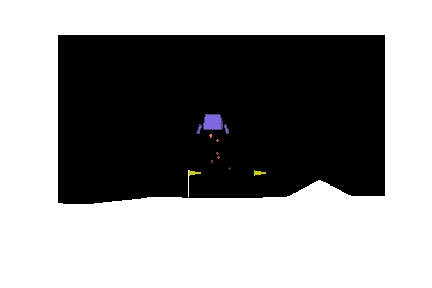
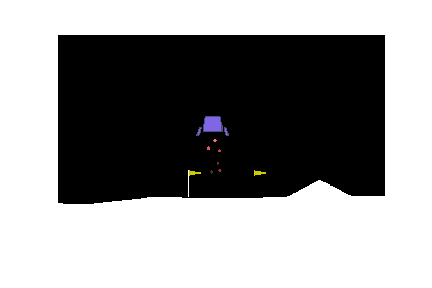
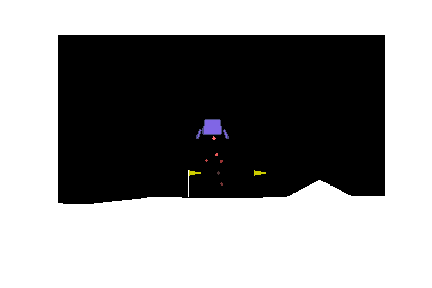
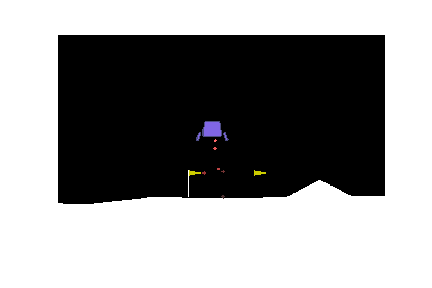
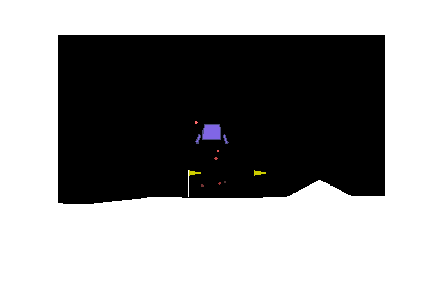
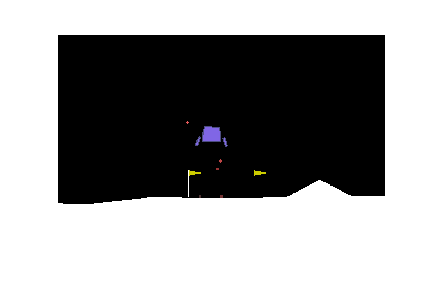
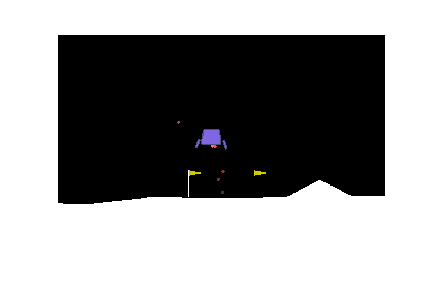
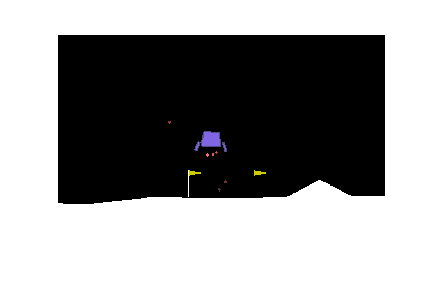
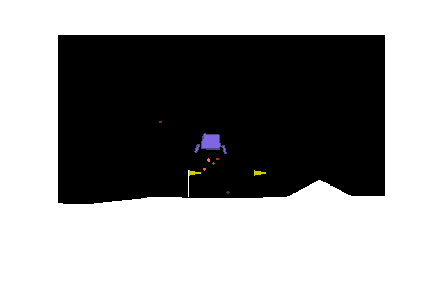
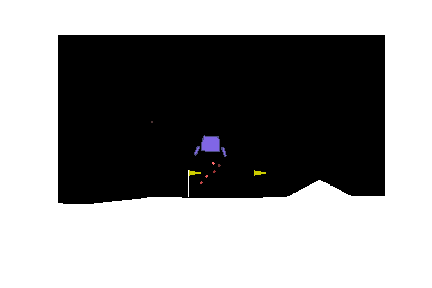
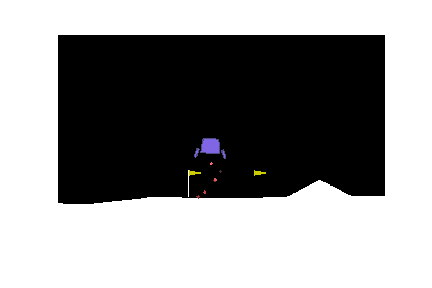
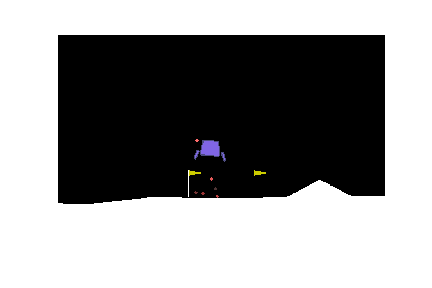
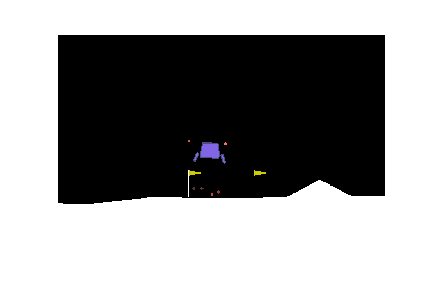
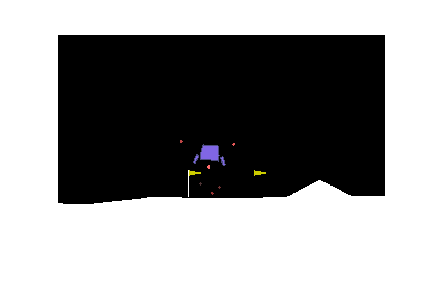
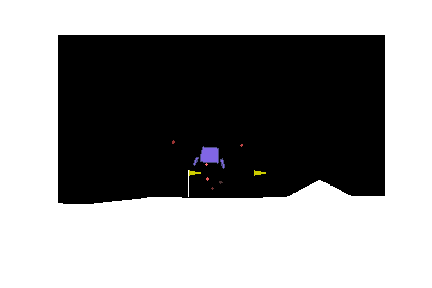
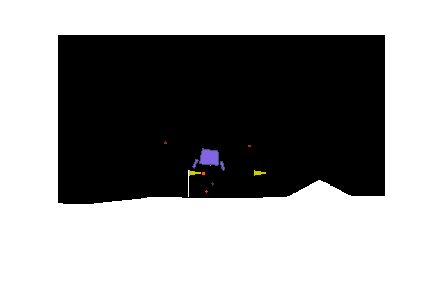
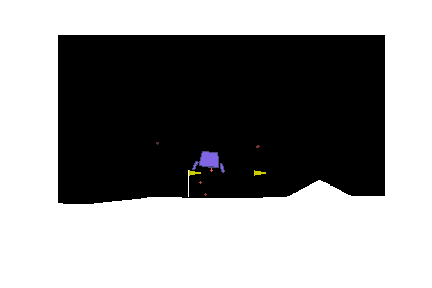
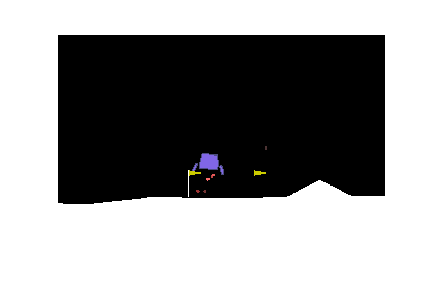
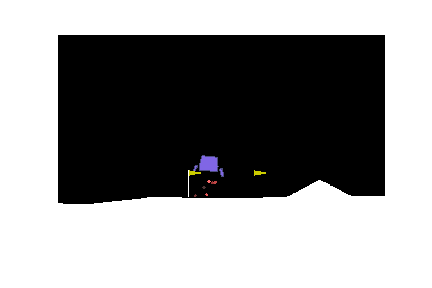
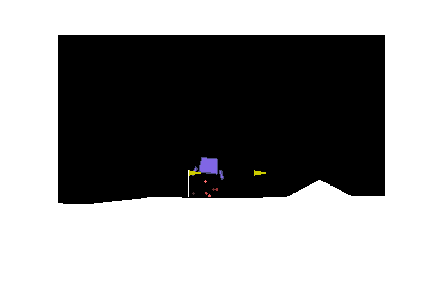
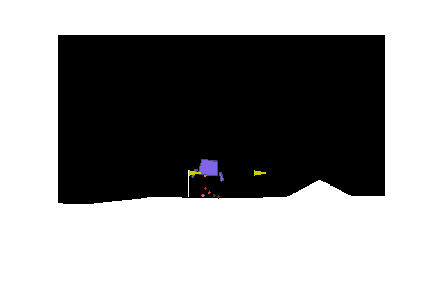
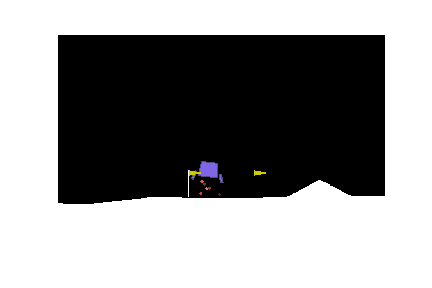
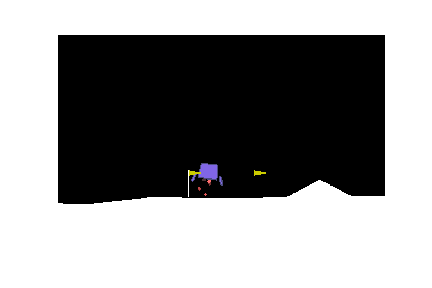
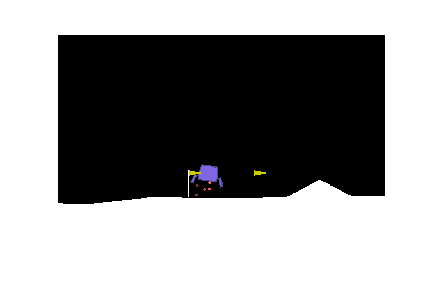
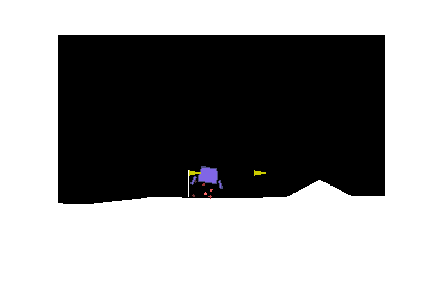
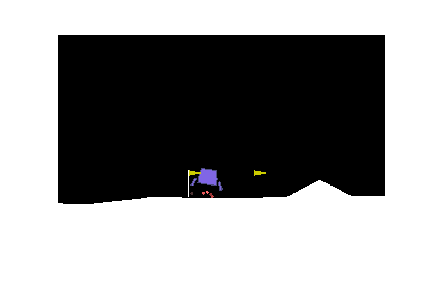
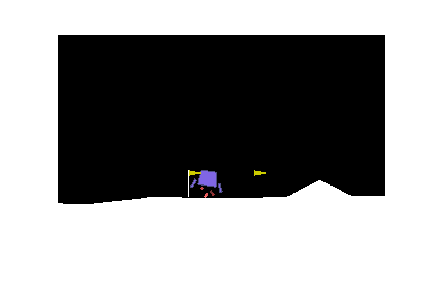
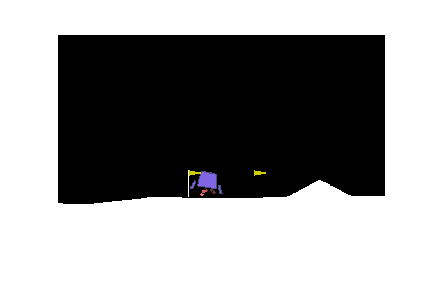
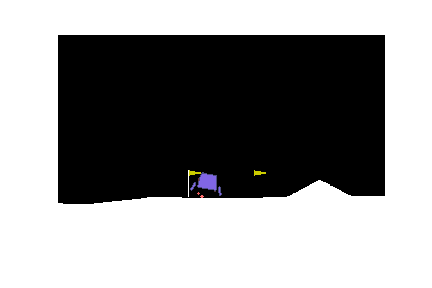
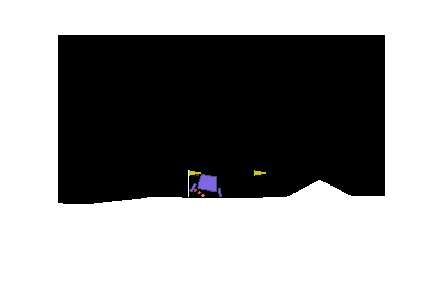
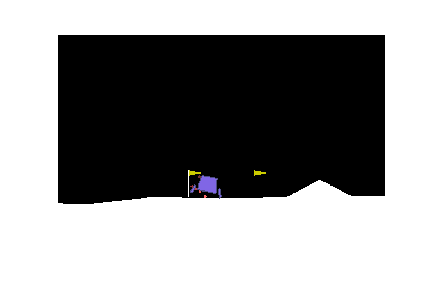
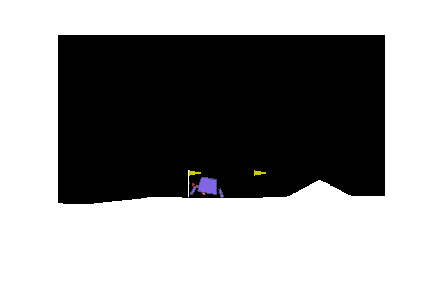
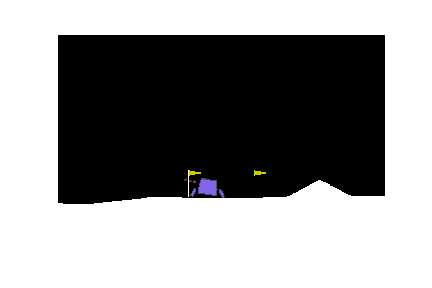
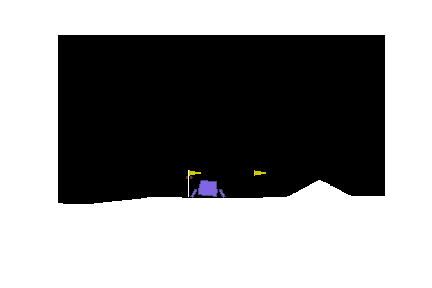
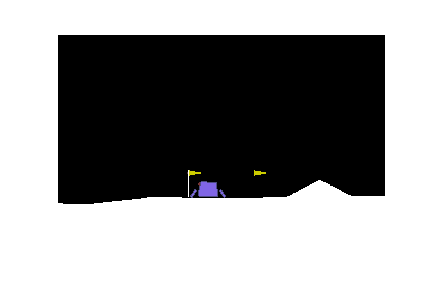
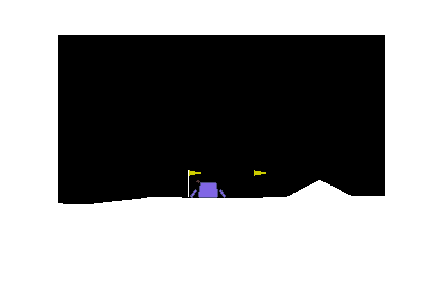

Best of generation 40



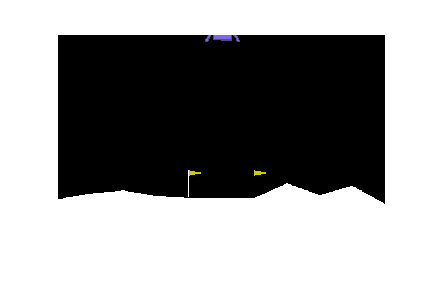
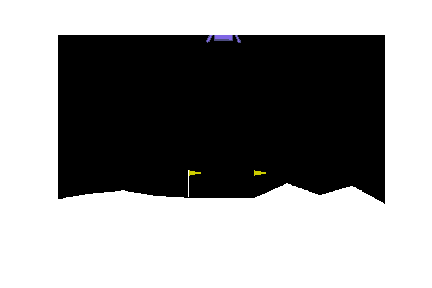
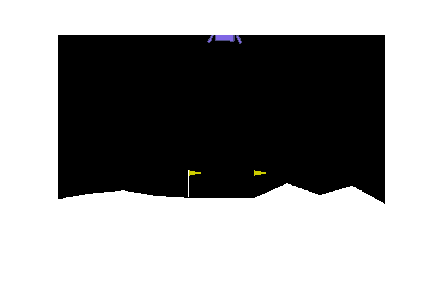
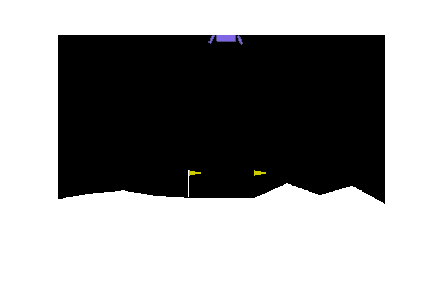
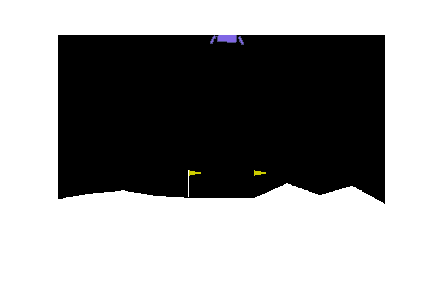
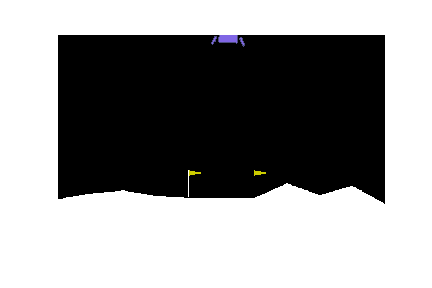
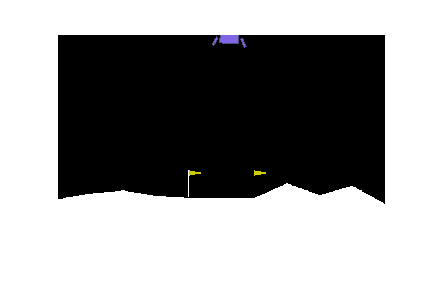
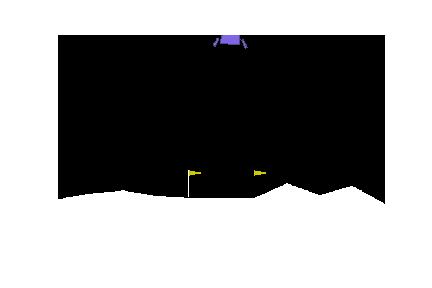
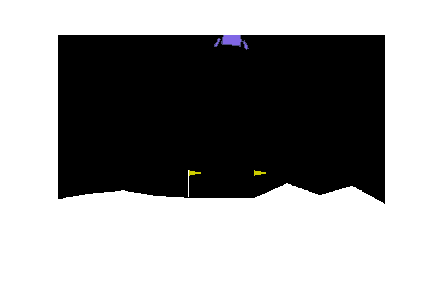
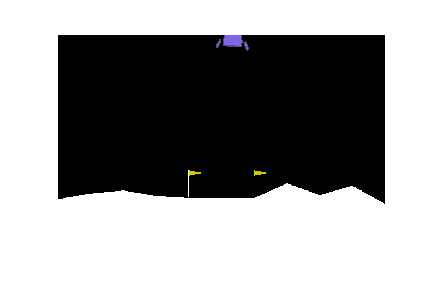
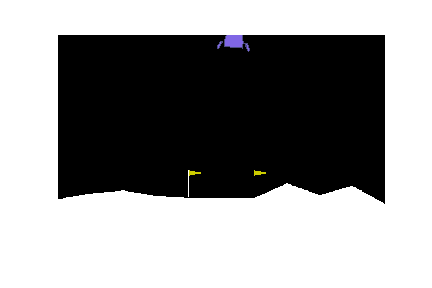
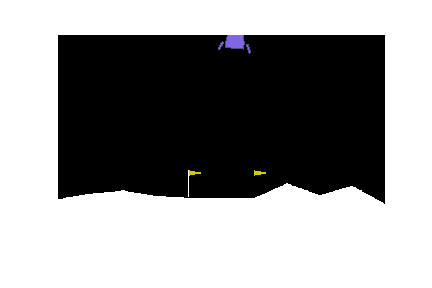
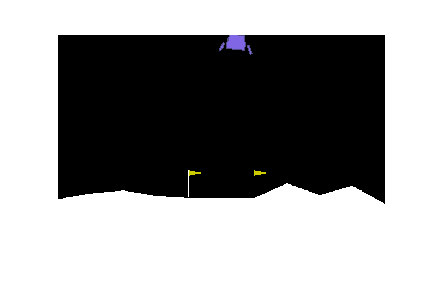
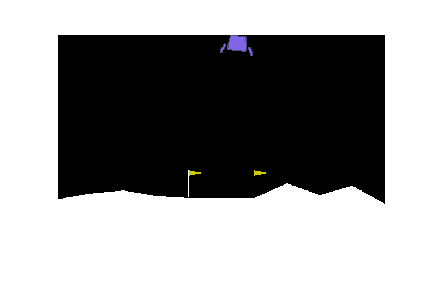
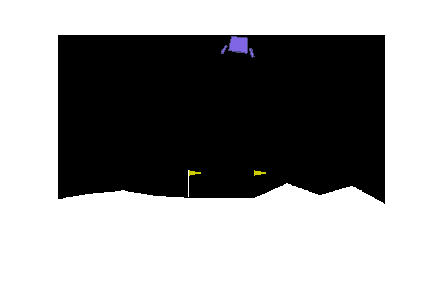
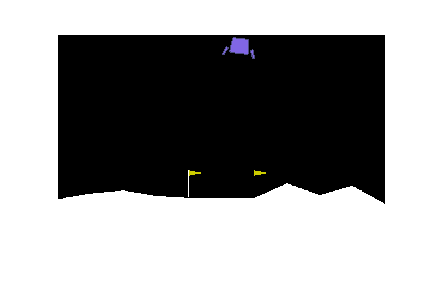
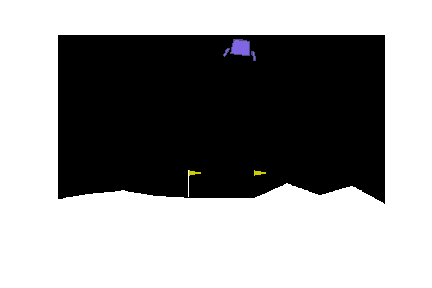
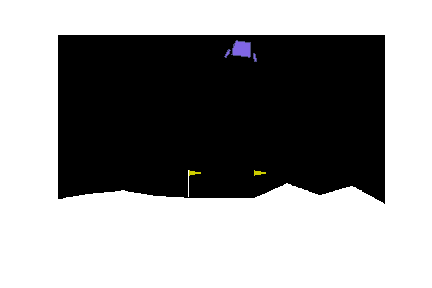
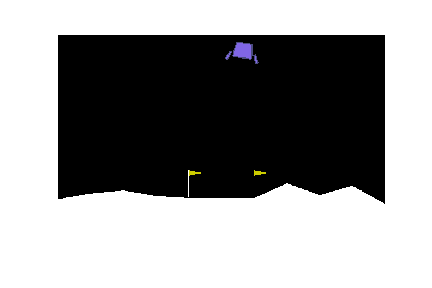
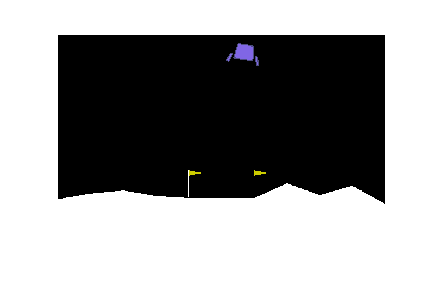
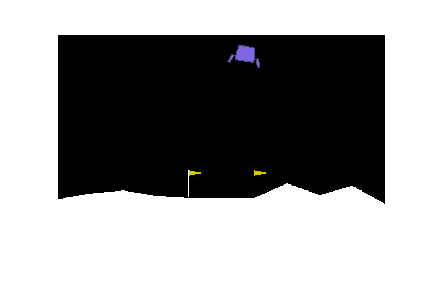
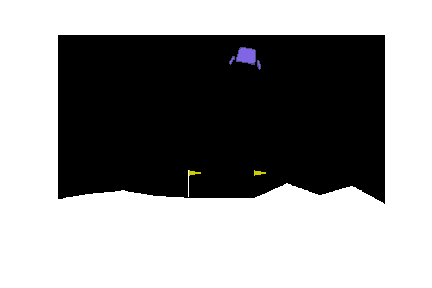
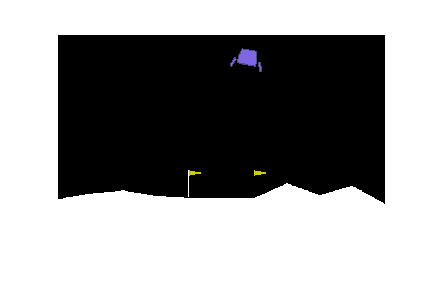
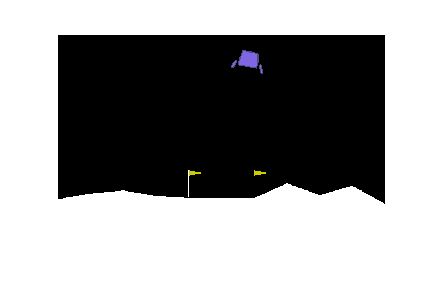
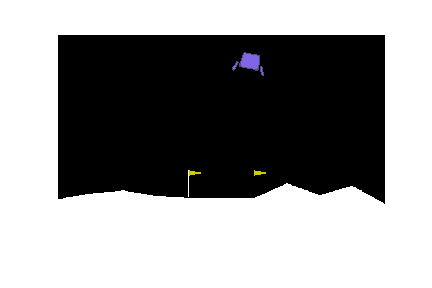
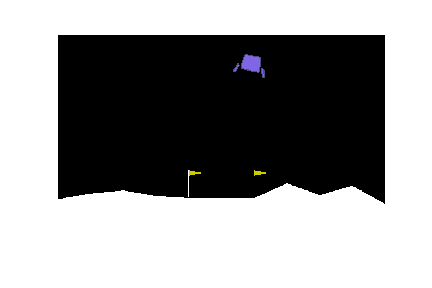
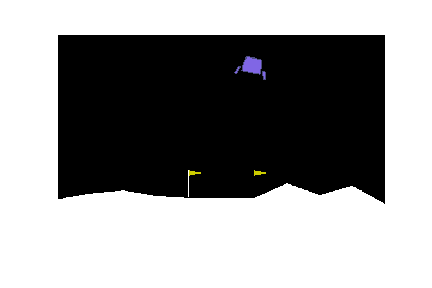
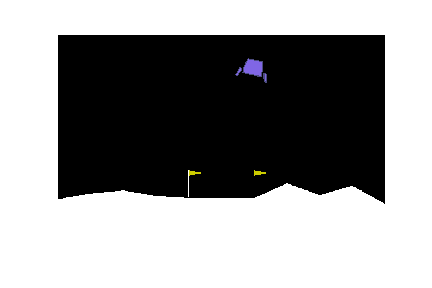
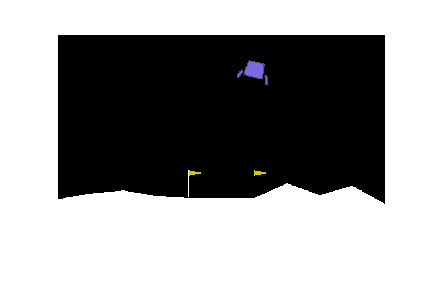
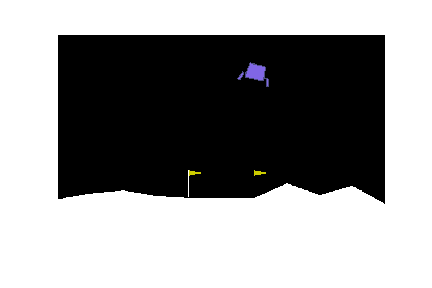
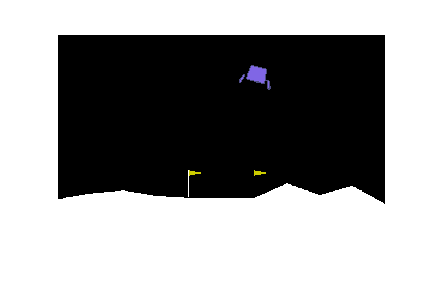
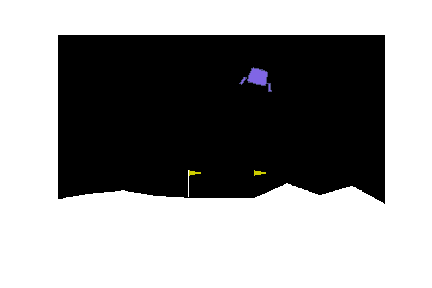
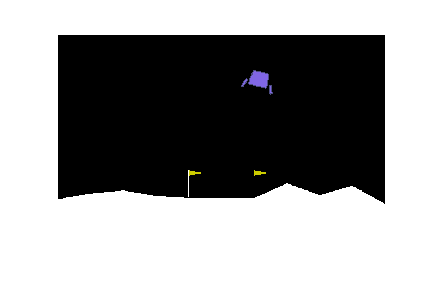
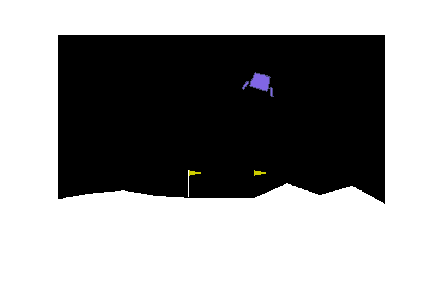
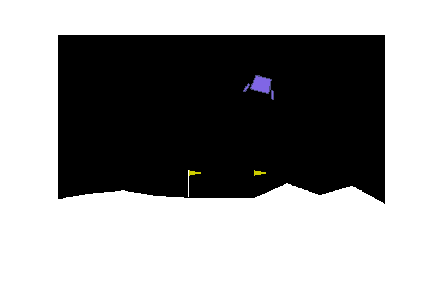
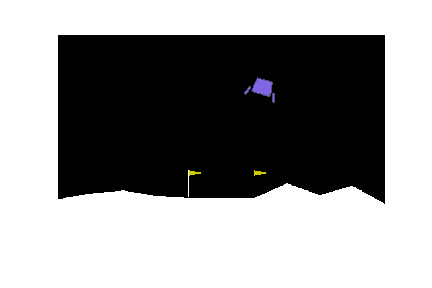
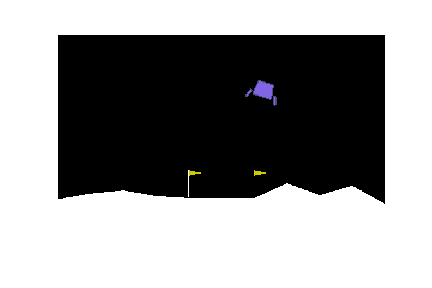
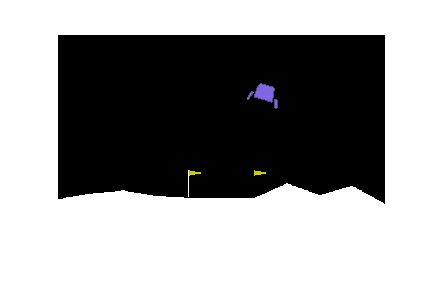
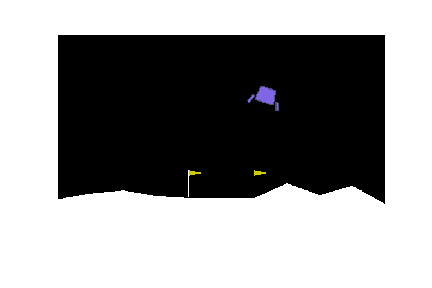
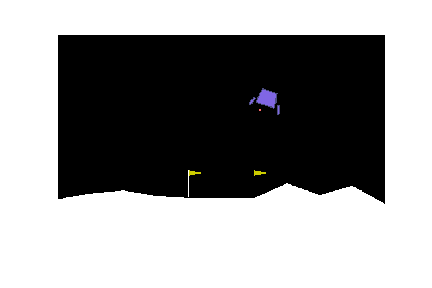
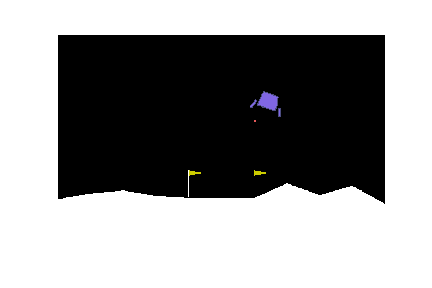
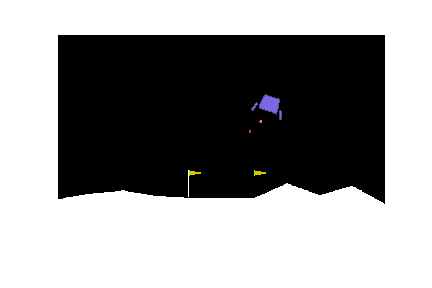
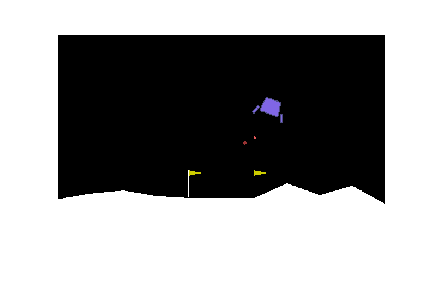
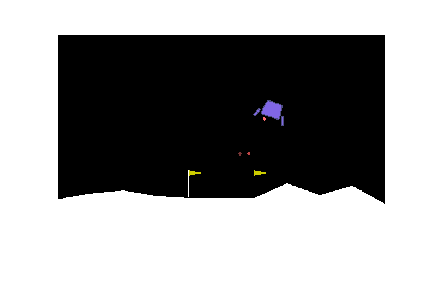
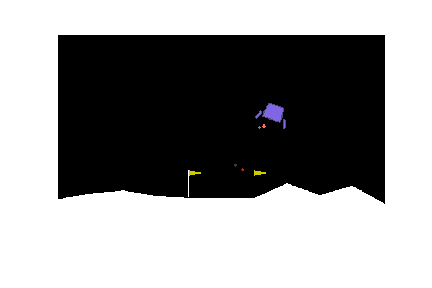
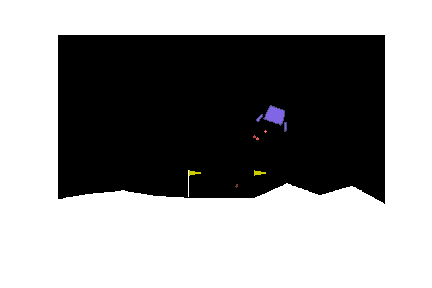
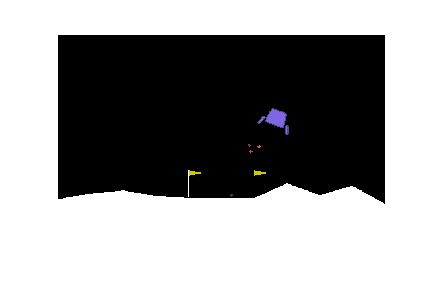
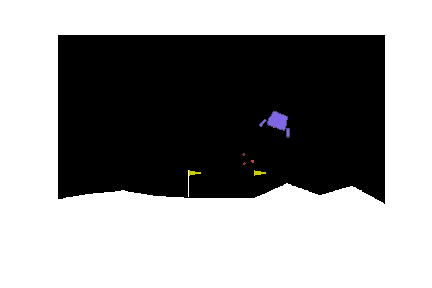
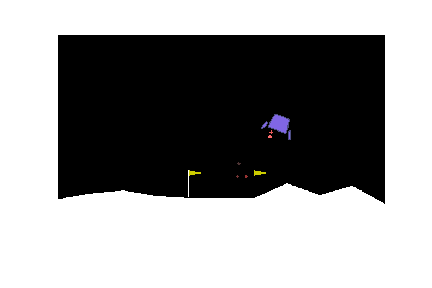
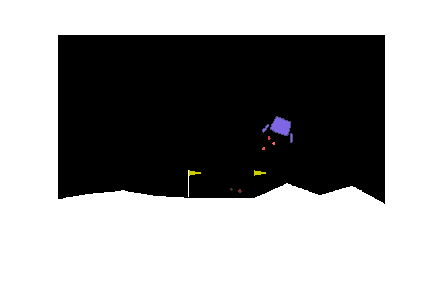
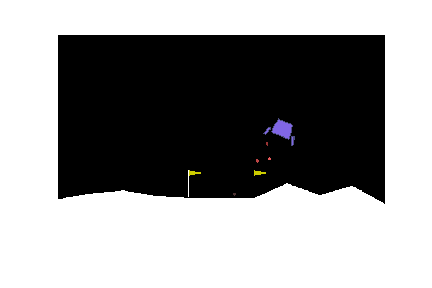
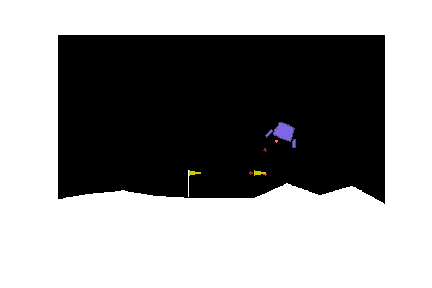
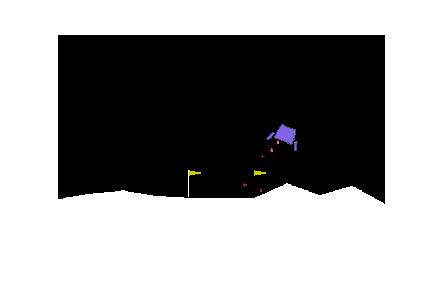
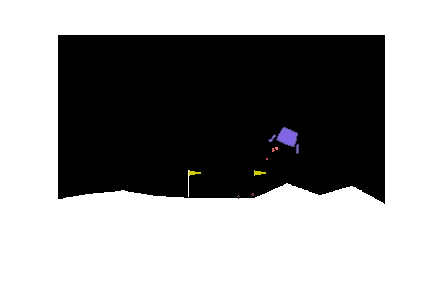
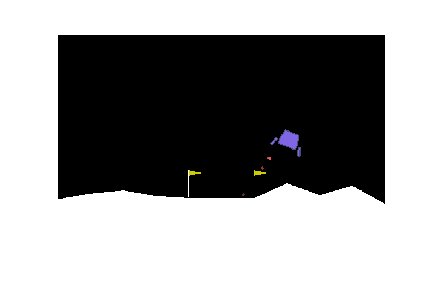
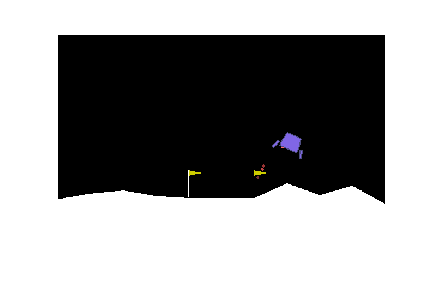
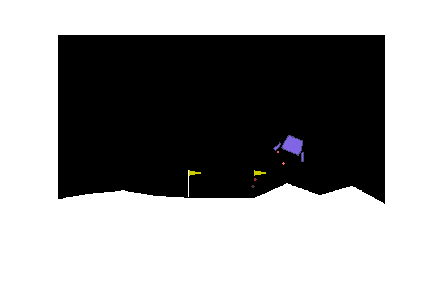
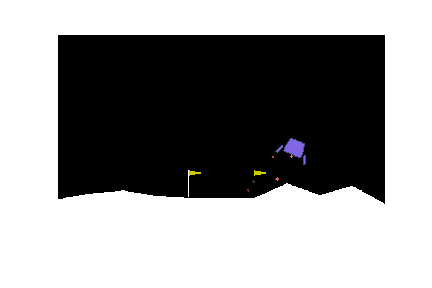
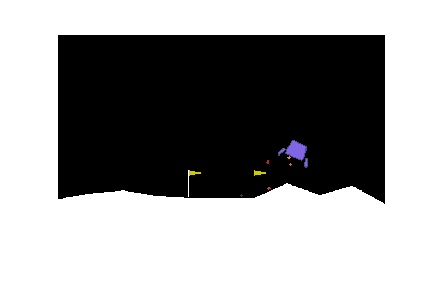
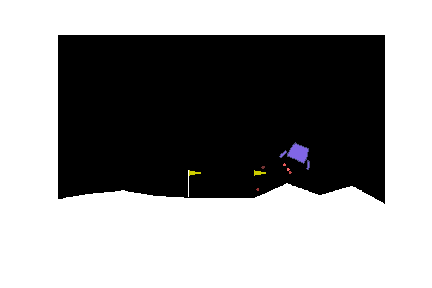
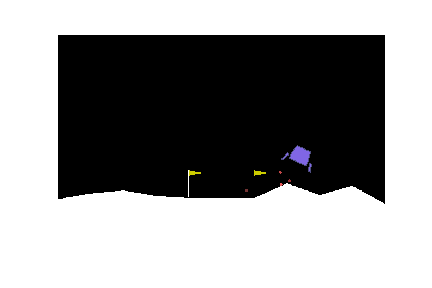
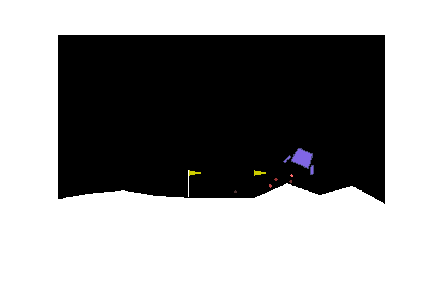
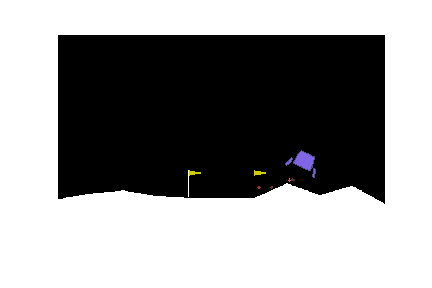
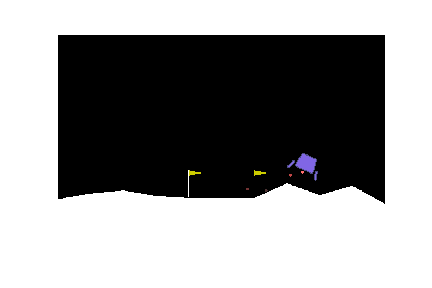
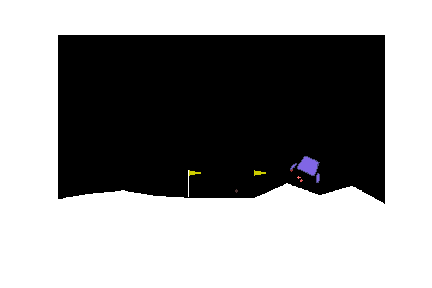
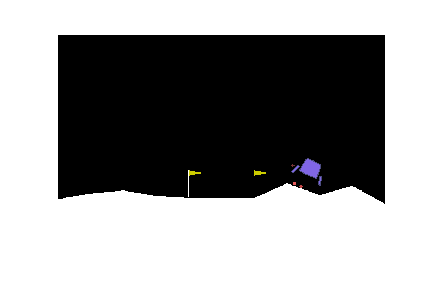
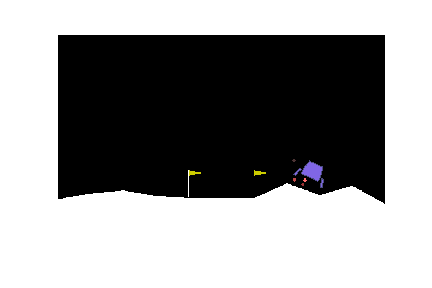
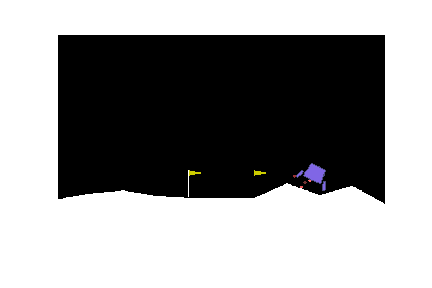
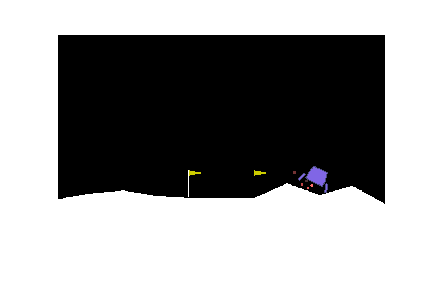
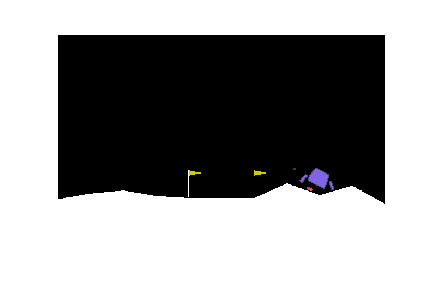
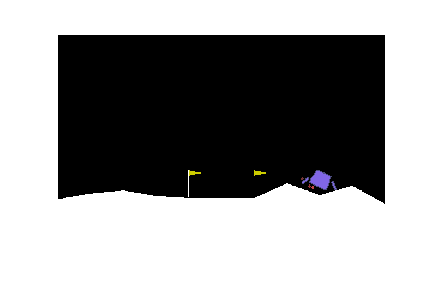
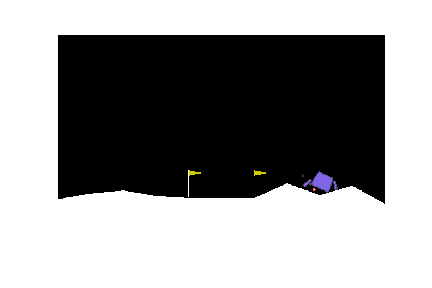

Best of generation 50



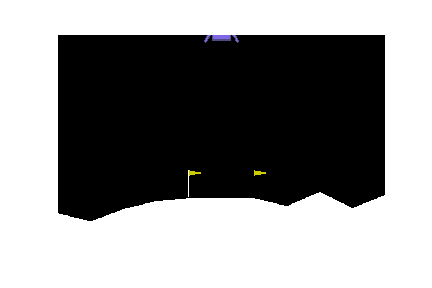
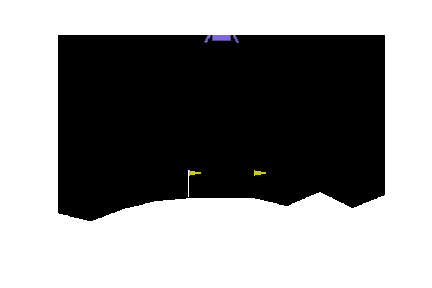
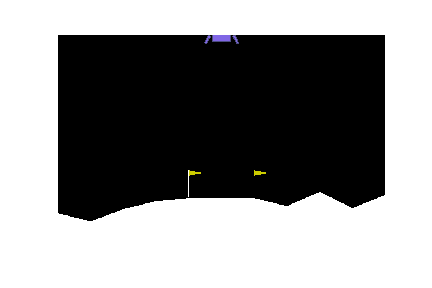
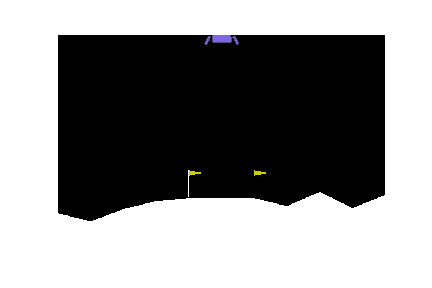
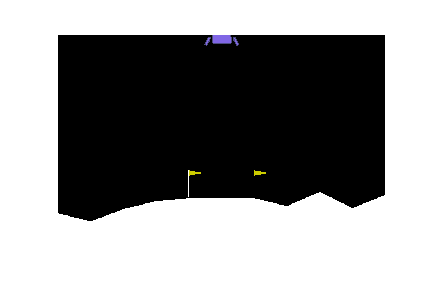
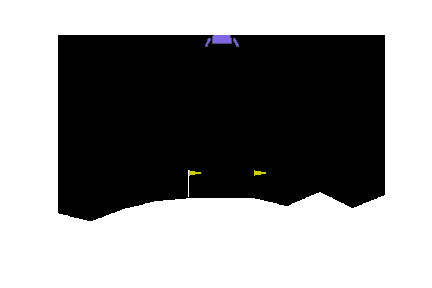
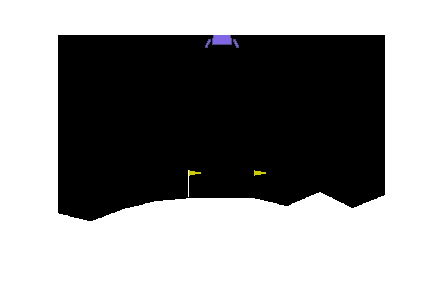
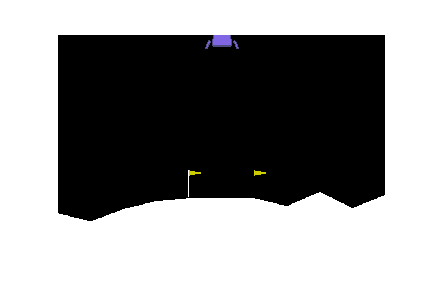
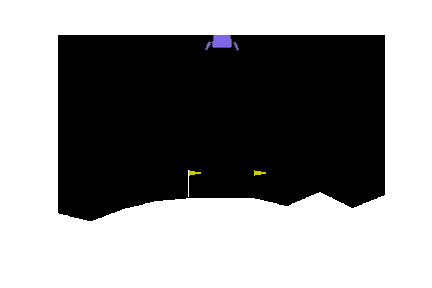
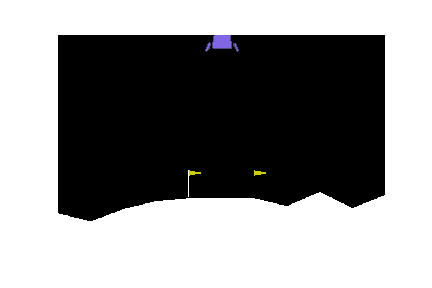
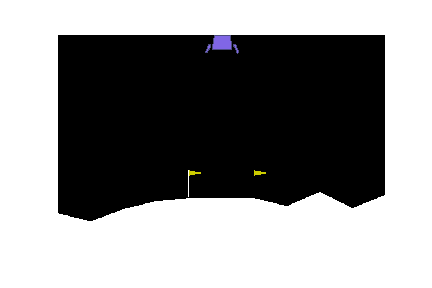
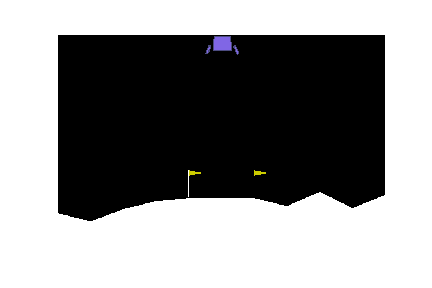
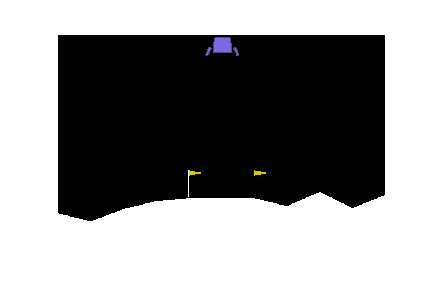
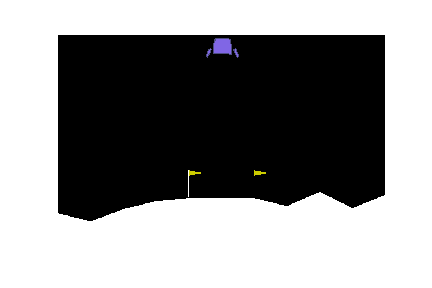
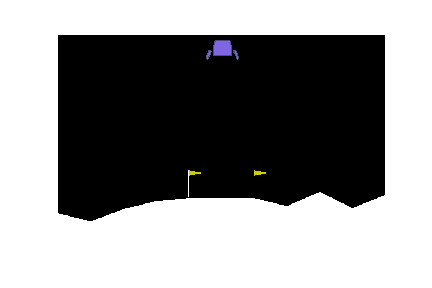
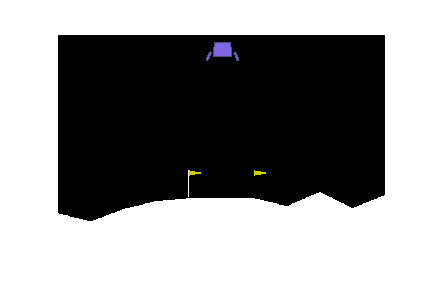
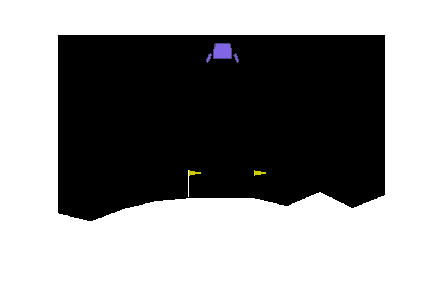
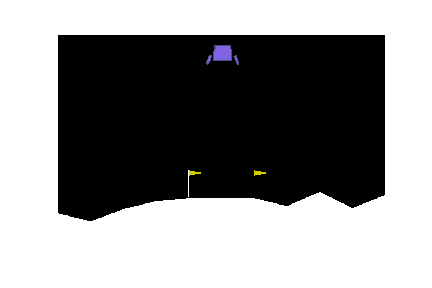
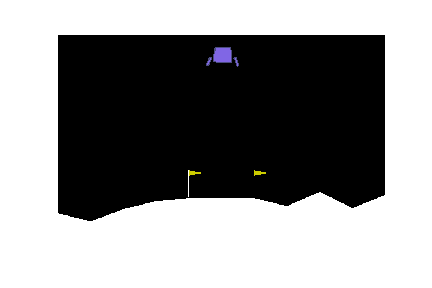
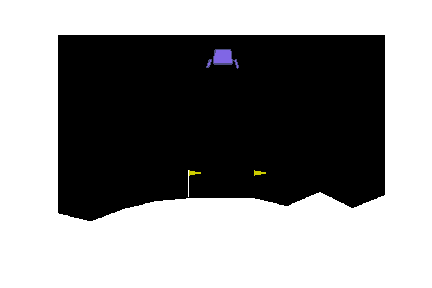
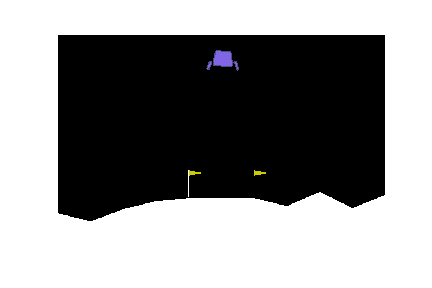
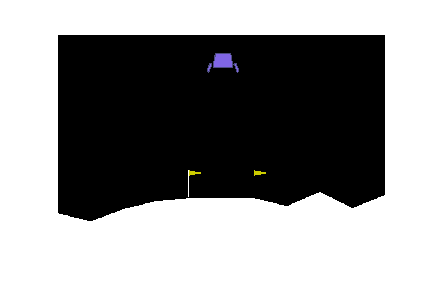
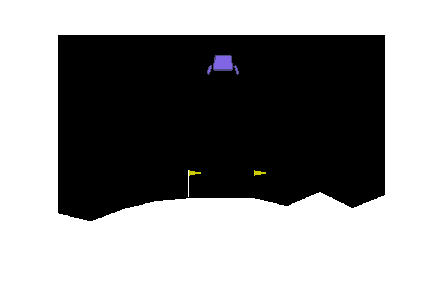
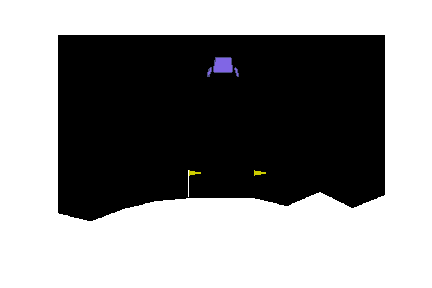
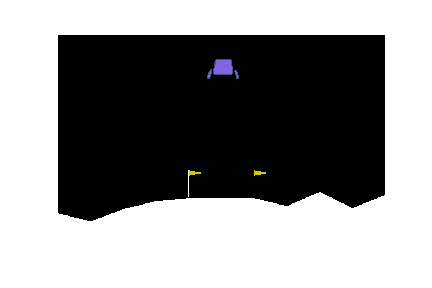
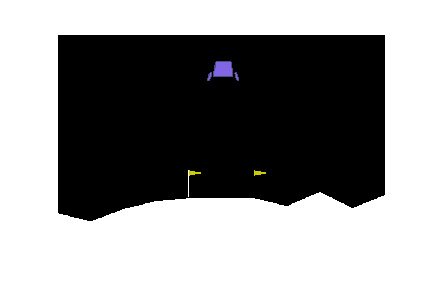
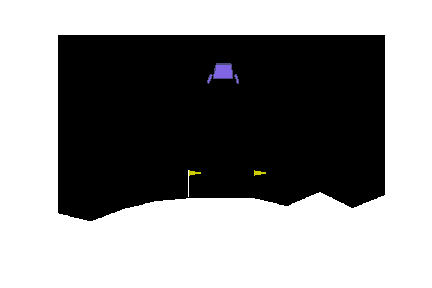
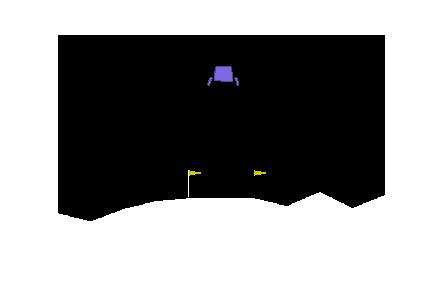
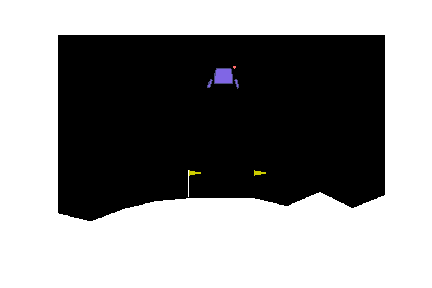
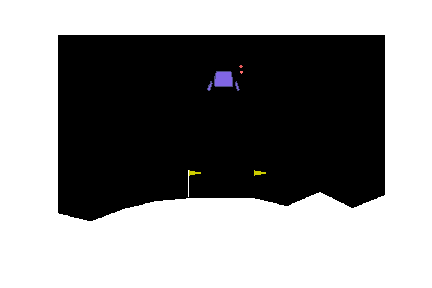
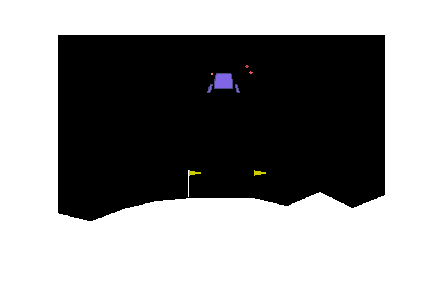
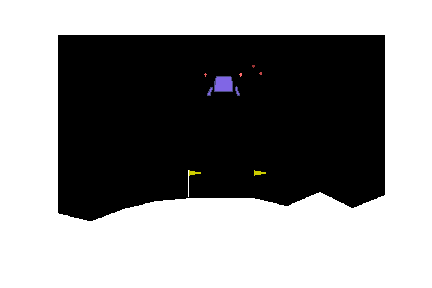
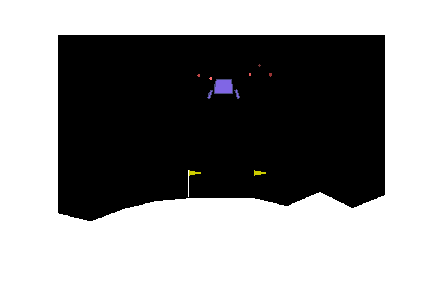
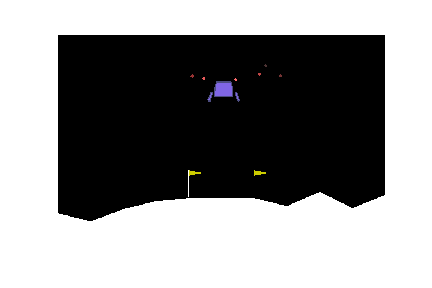
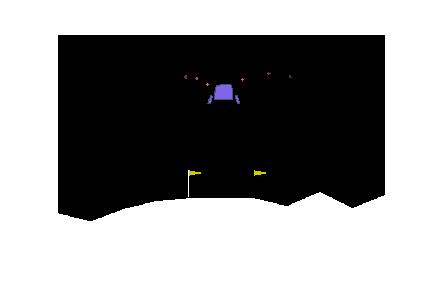
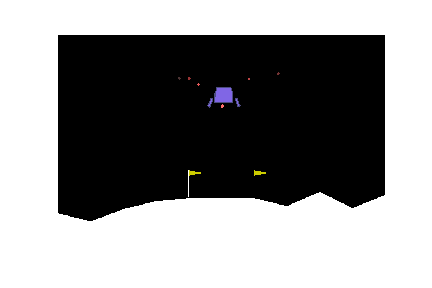
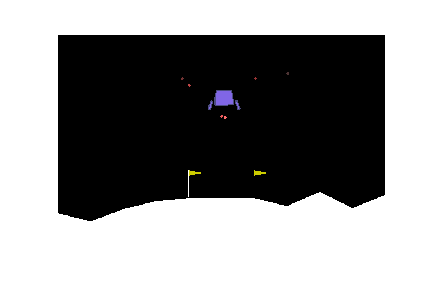
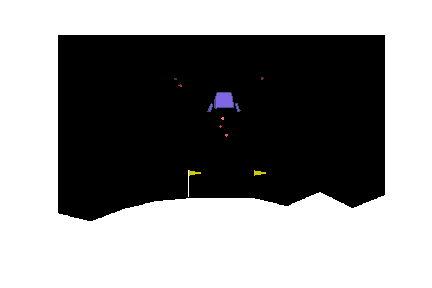
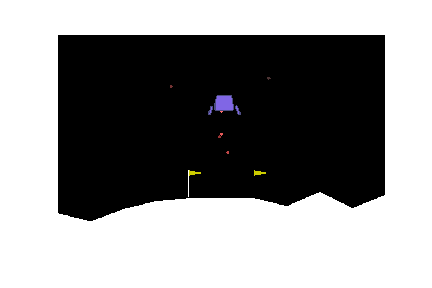
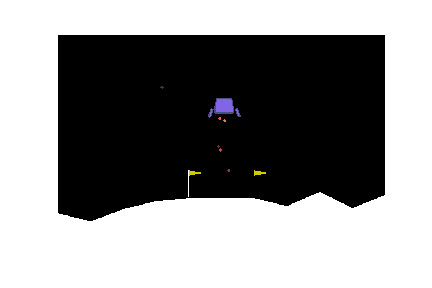
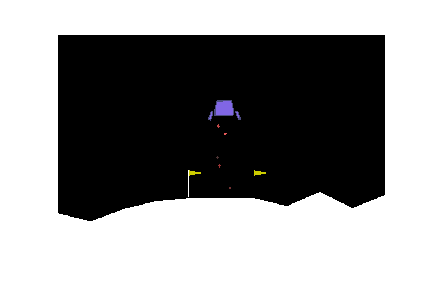
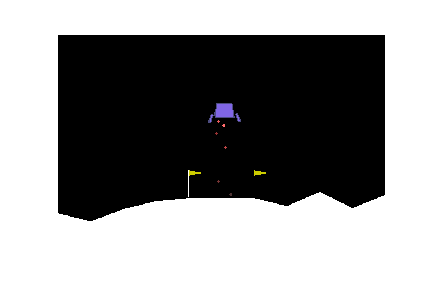
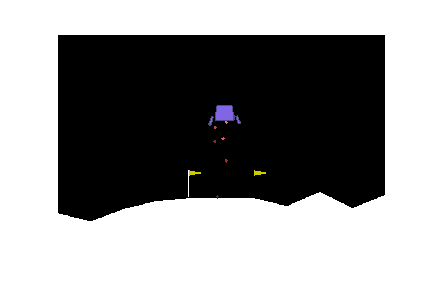
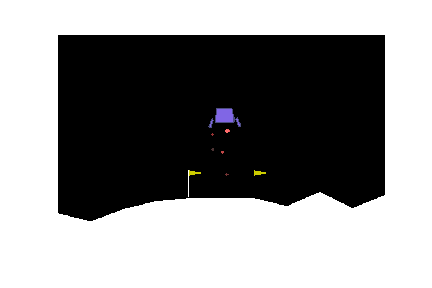
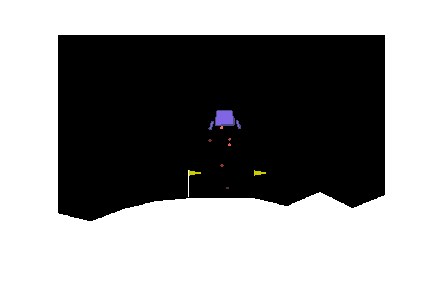
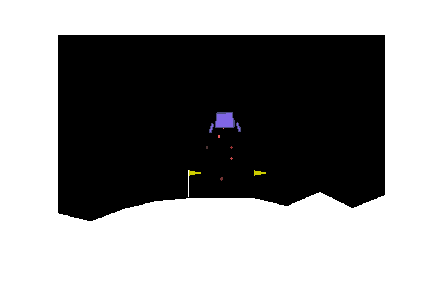
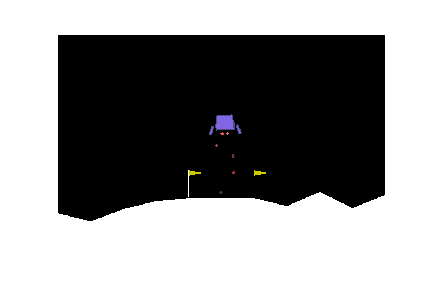
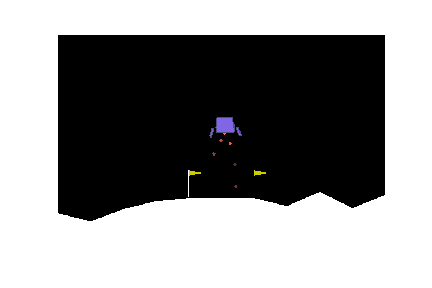
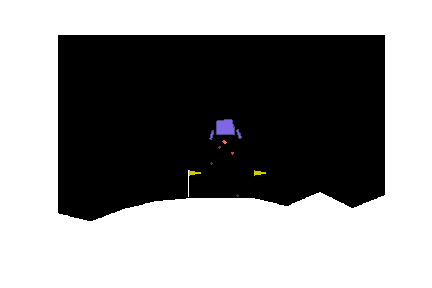
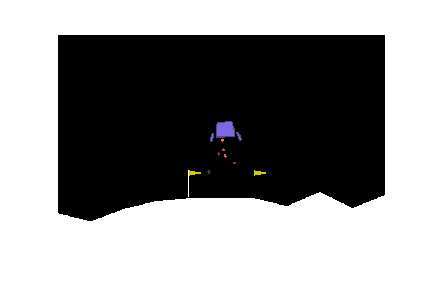
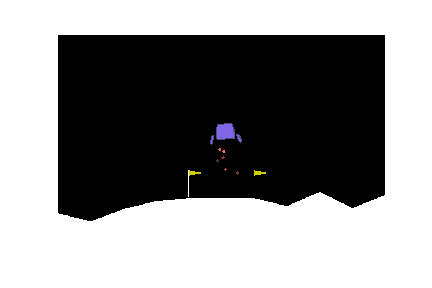
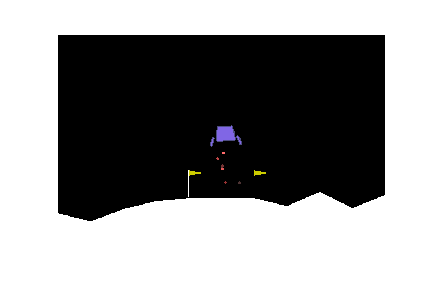
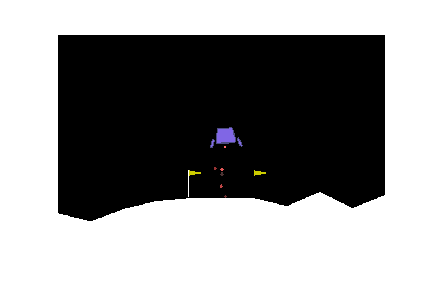
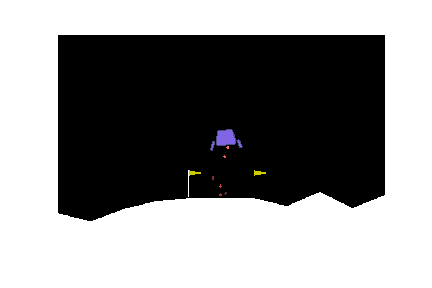
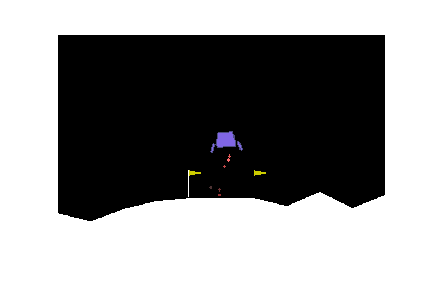
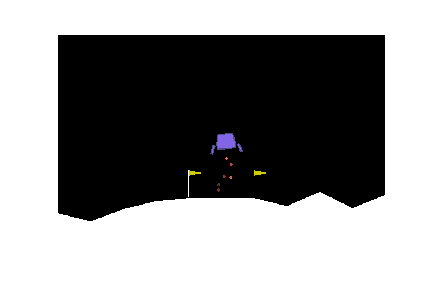
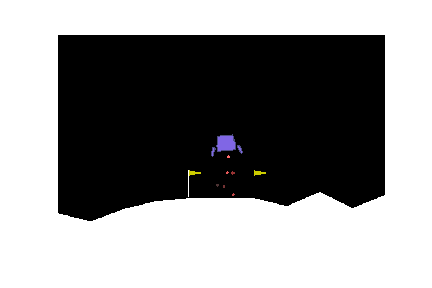
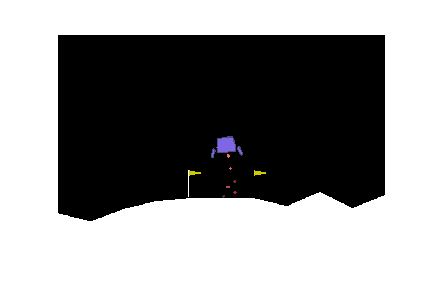
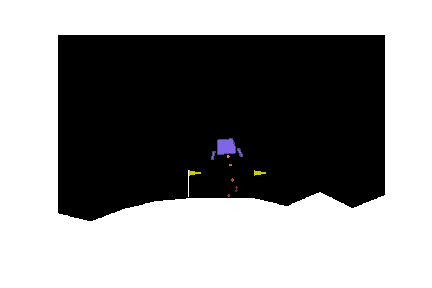
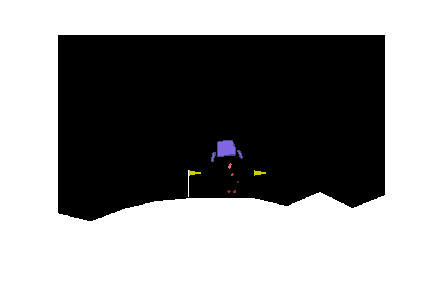
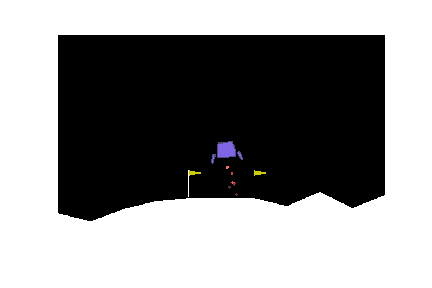
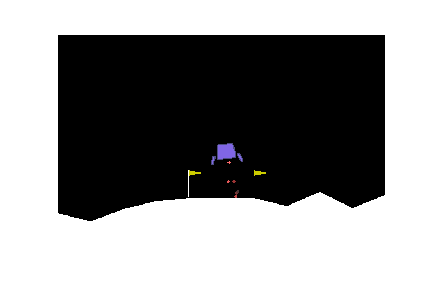
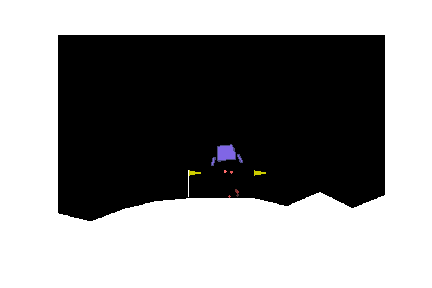
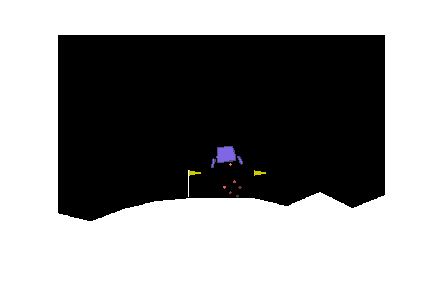
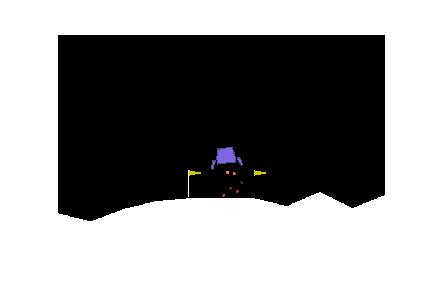
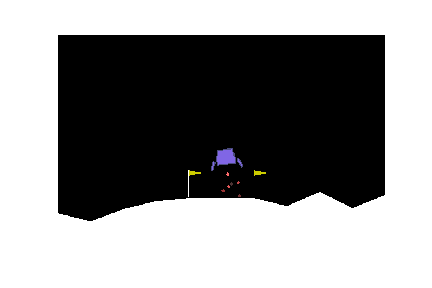
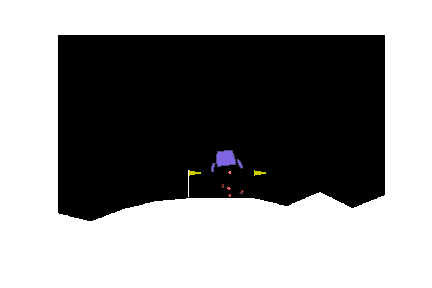
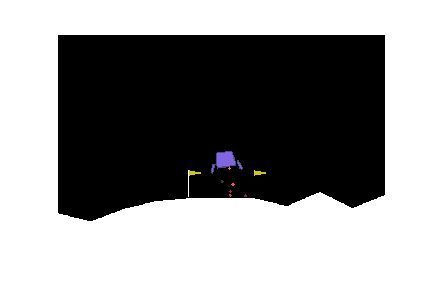
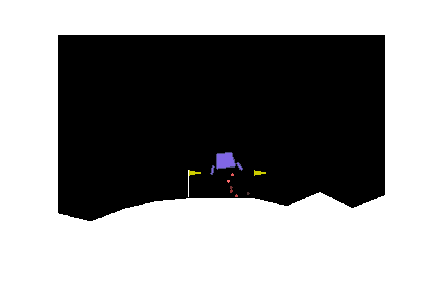
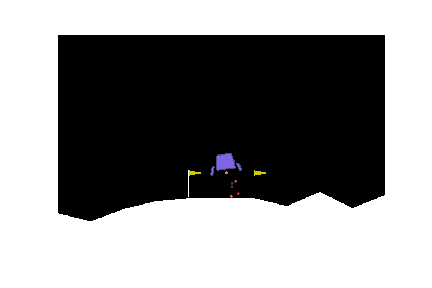
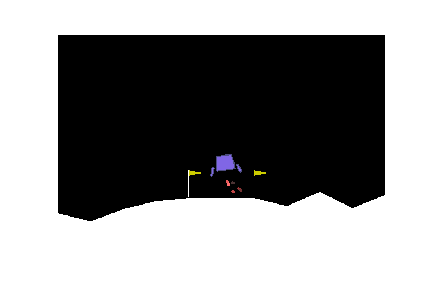
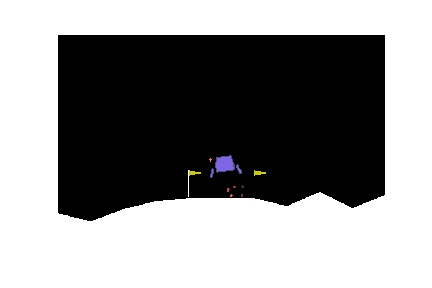
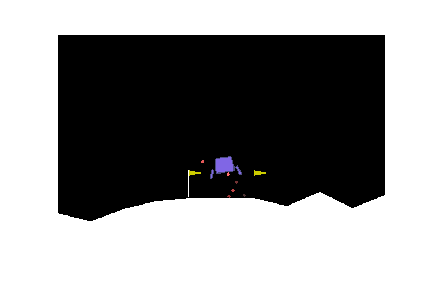
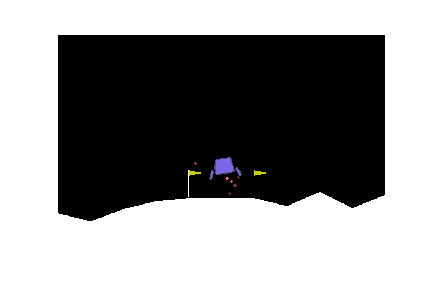
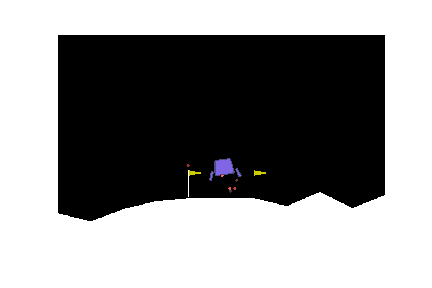
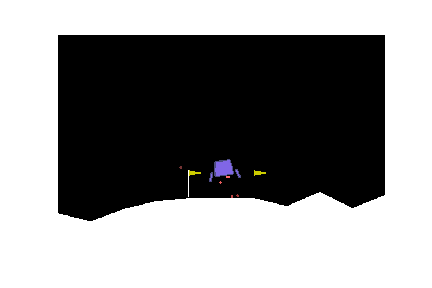
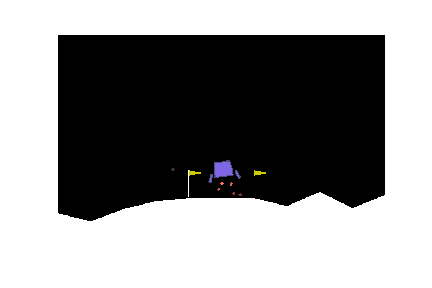
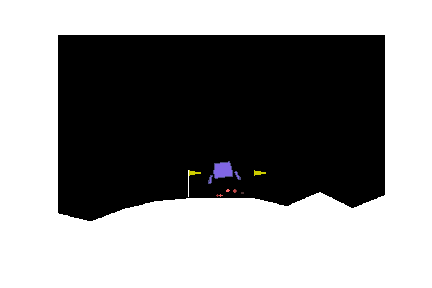
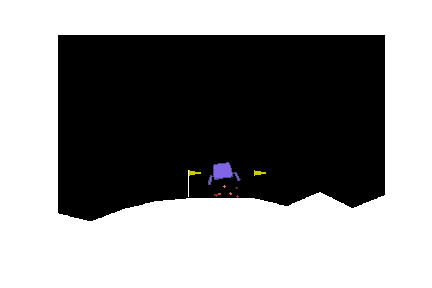
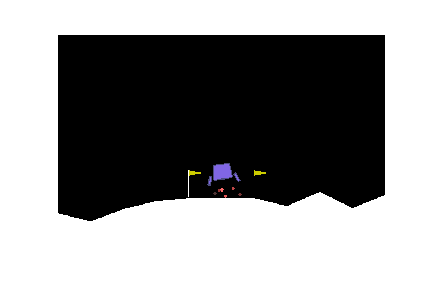
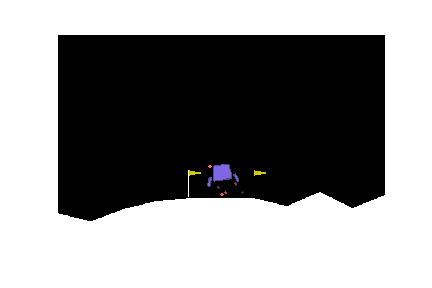
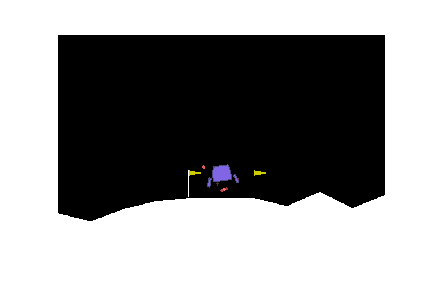
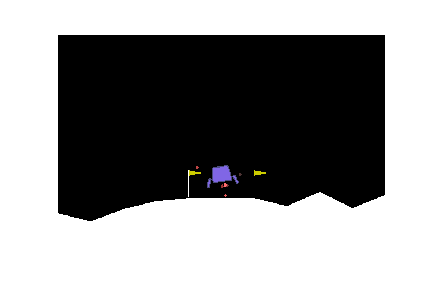
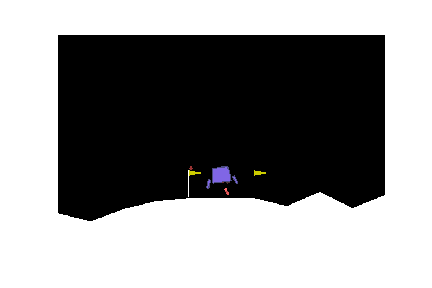
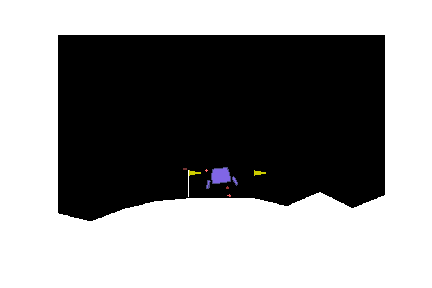
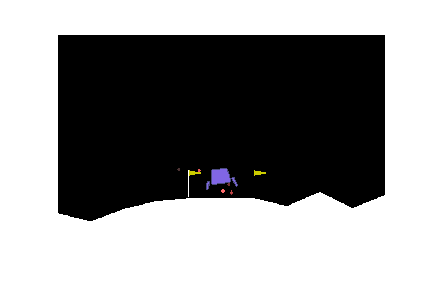
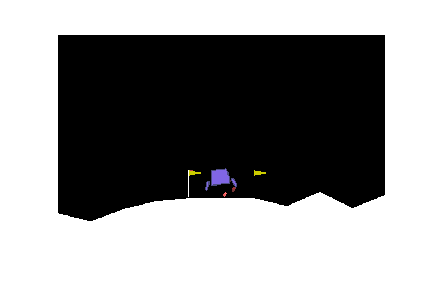
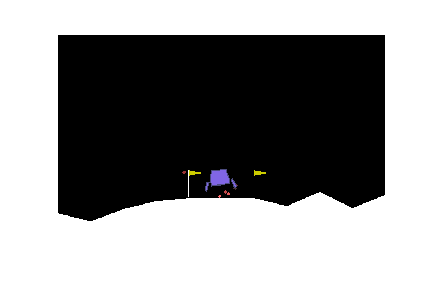
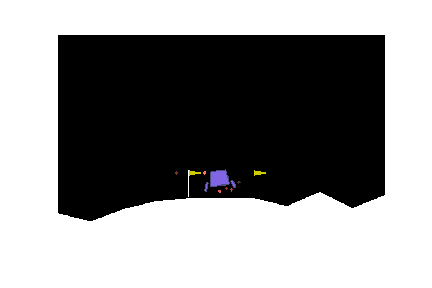
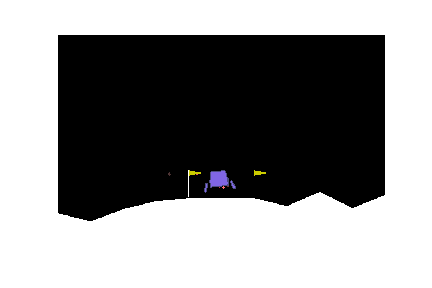
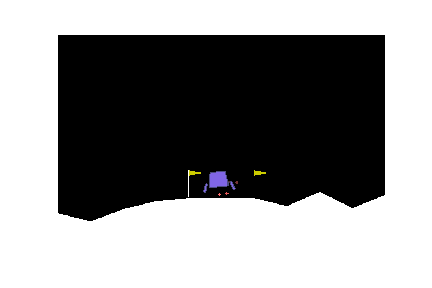
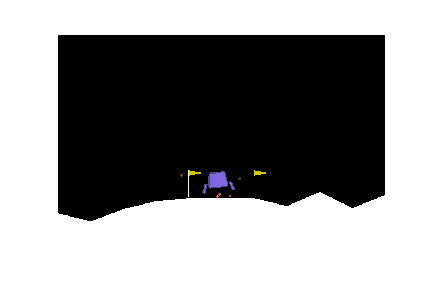
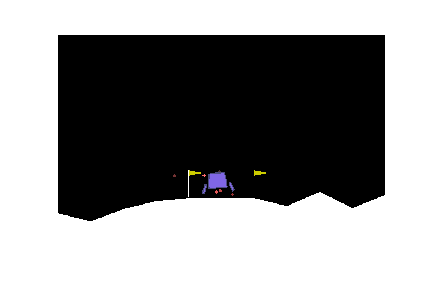
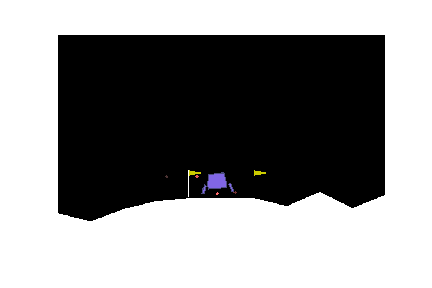
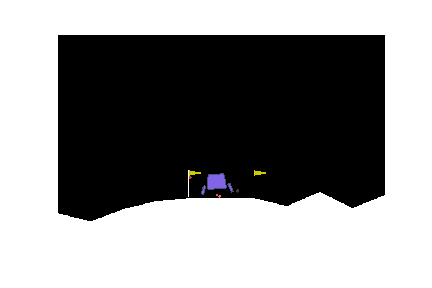
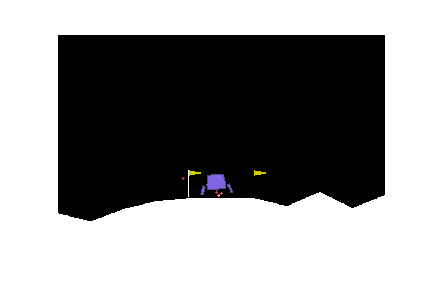
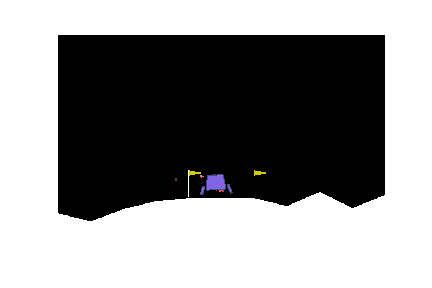
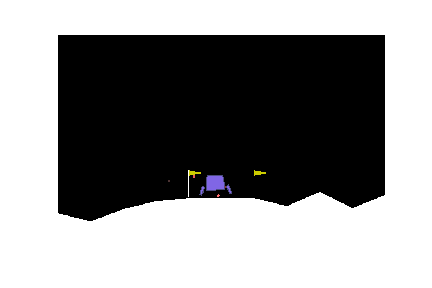
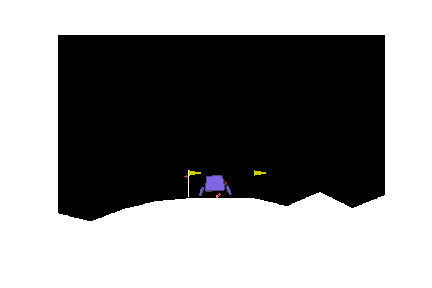
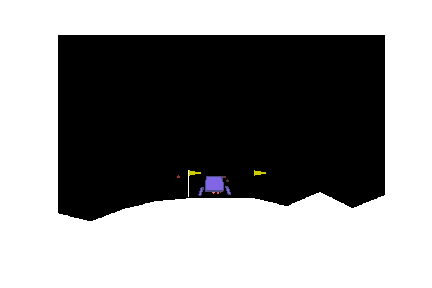
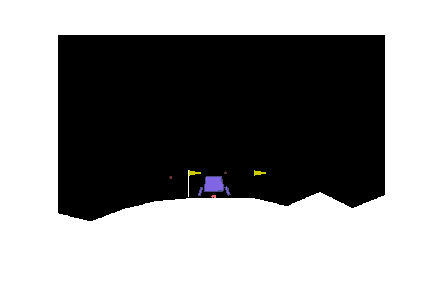
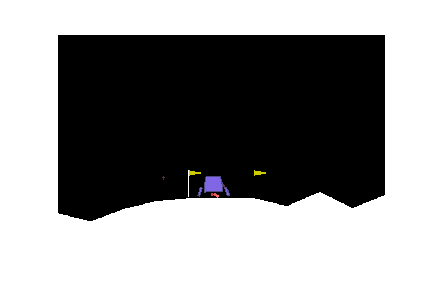
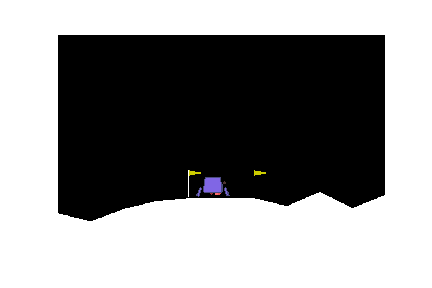
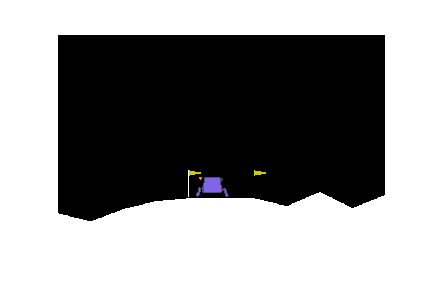
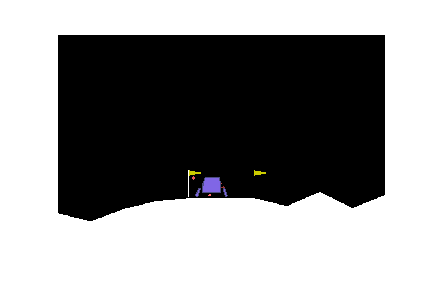
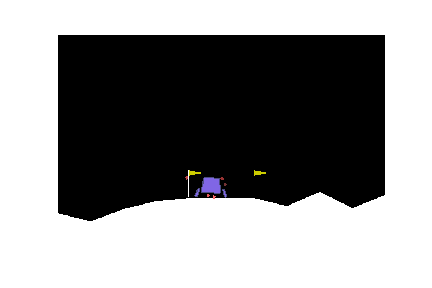
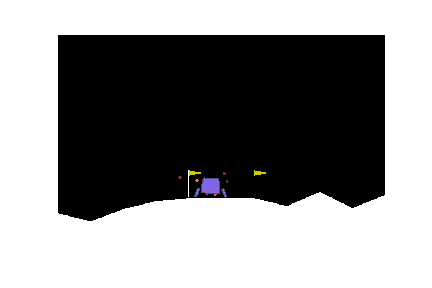
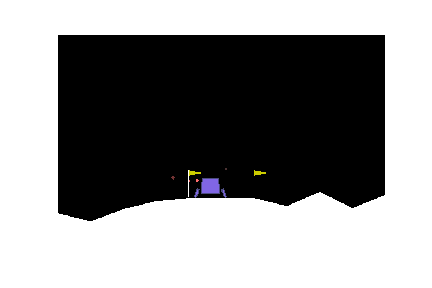
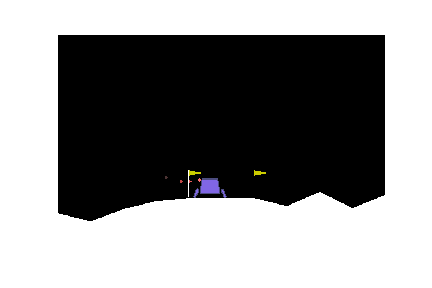
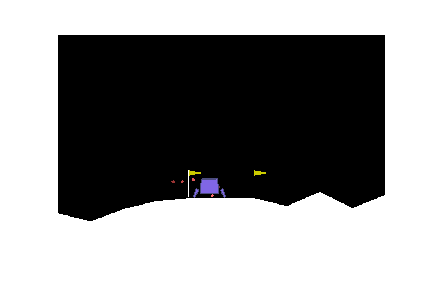
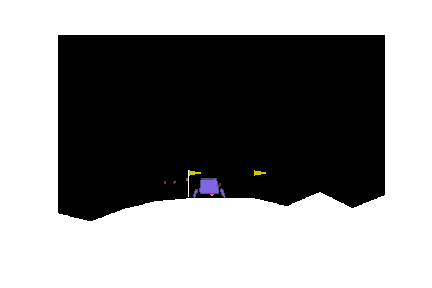
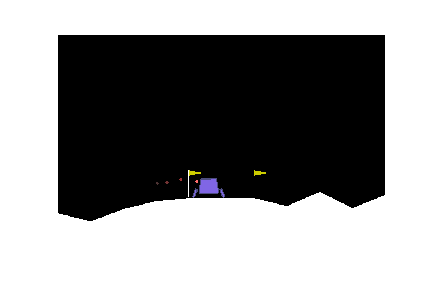
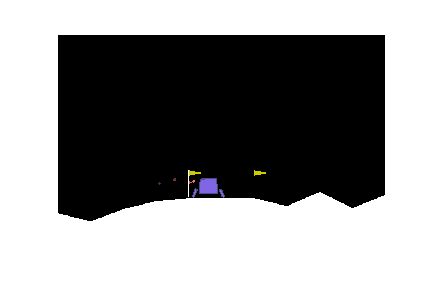
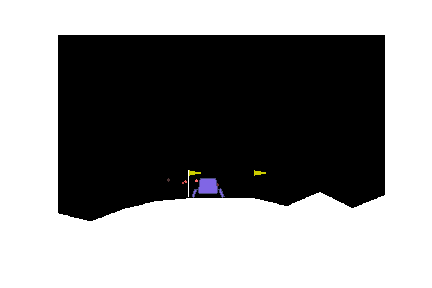
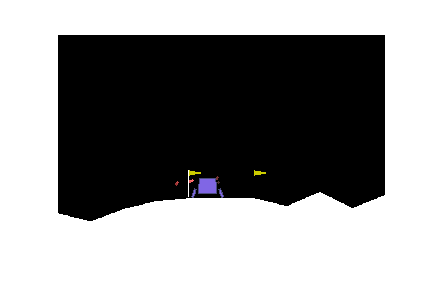
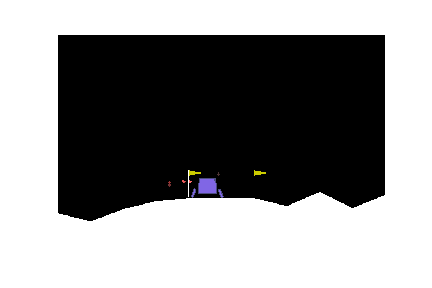
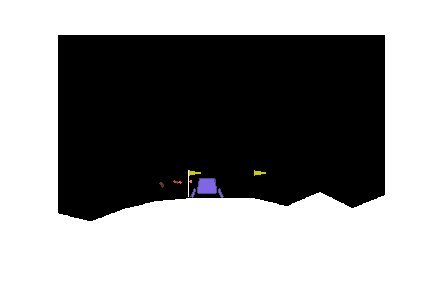
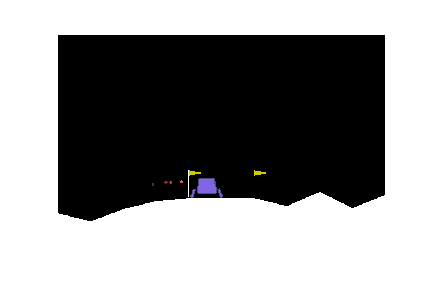
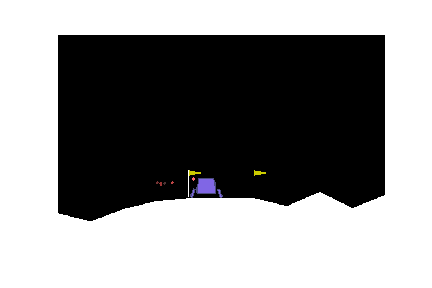
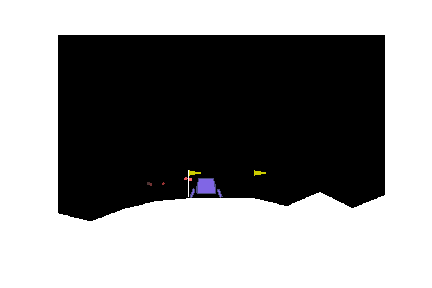
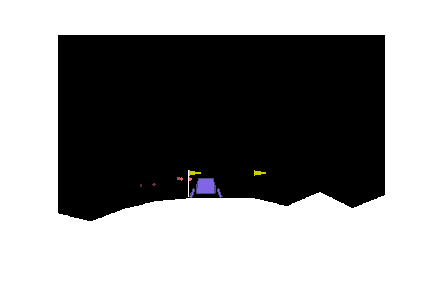
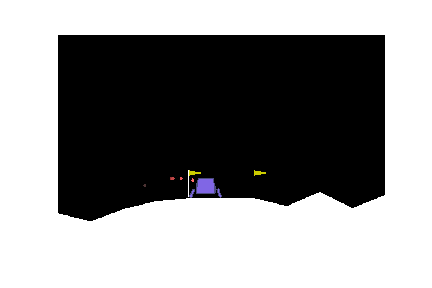
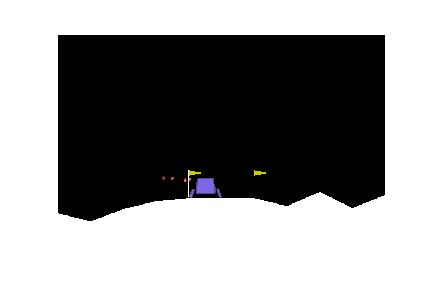
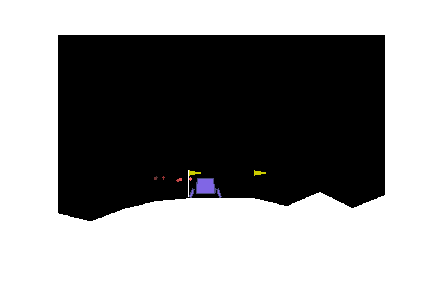
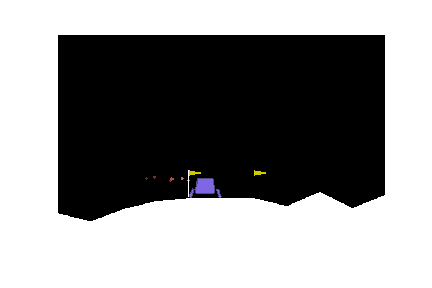
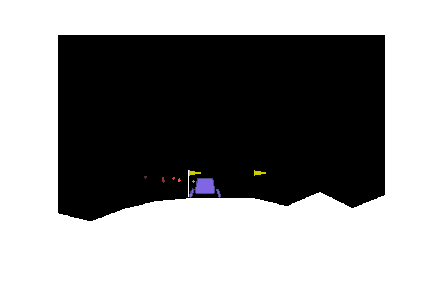
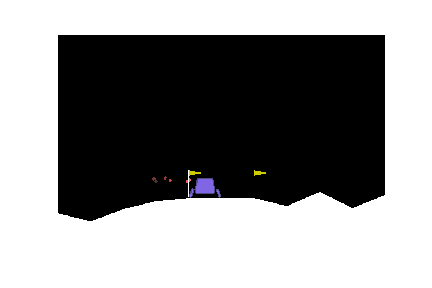
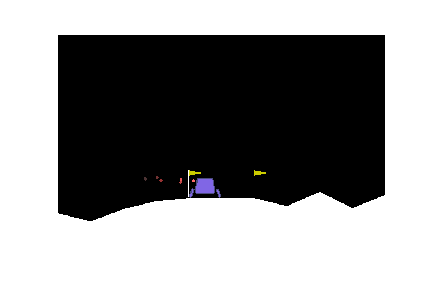
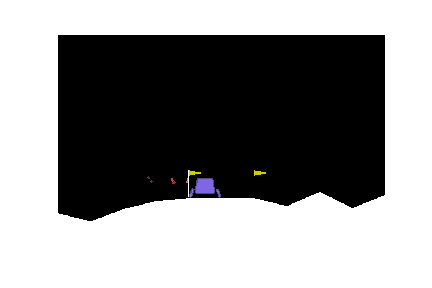
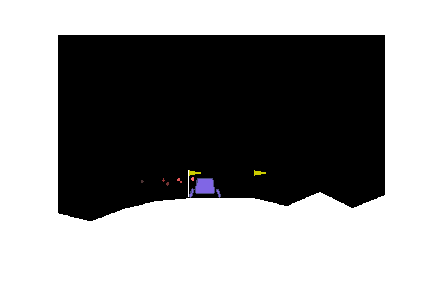
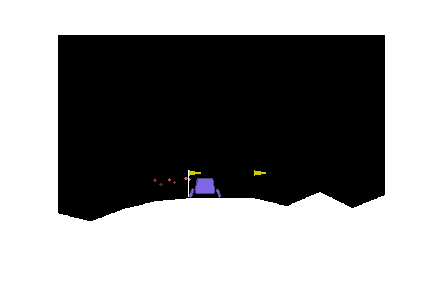
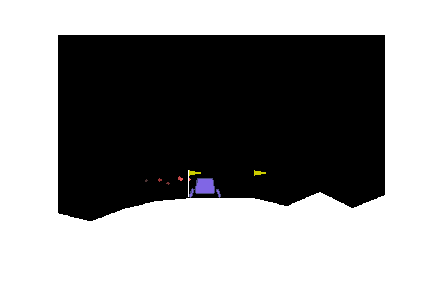
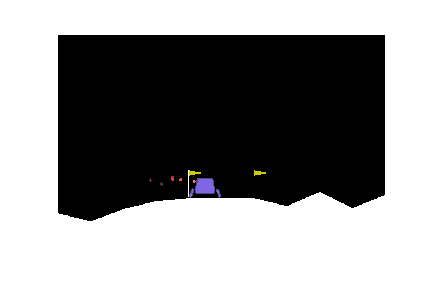
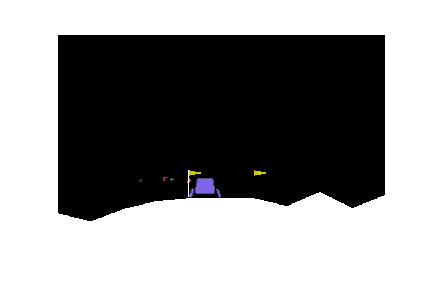
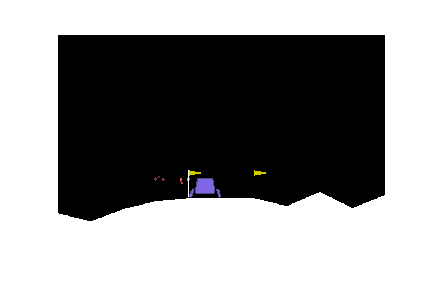
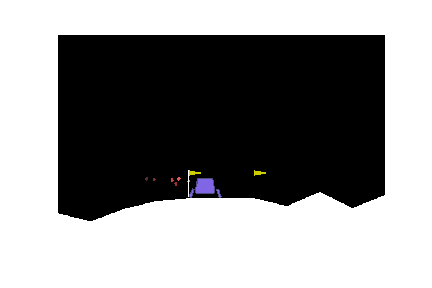
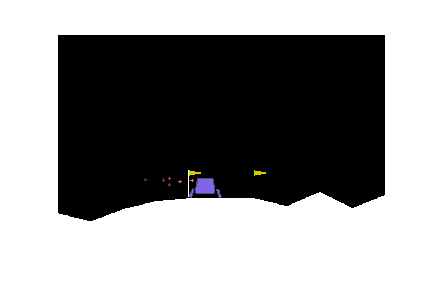
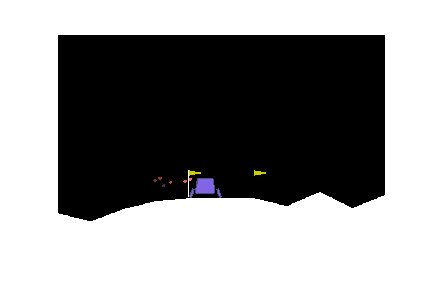
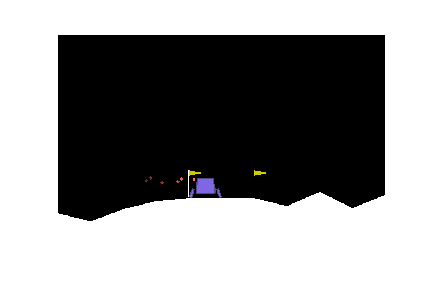
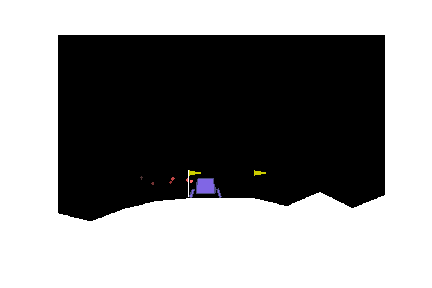
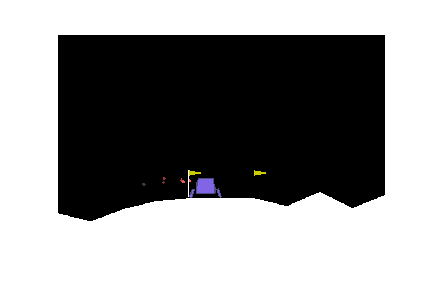
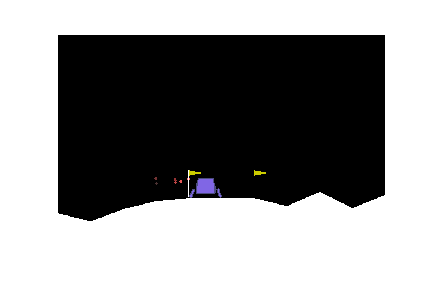
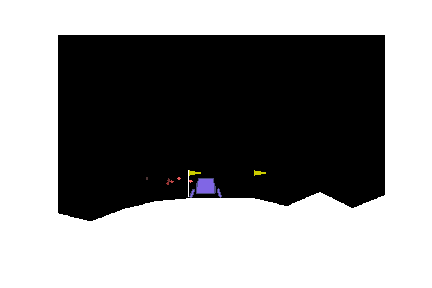
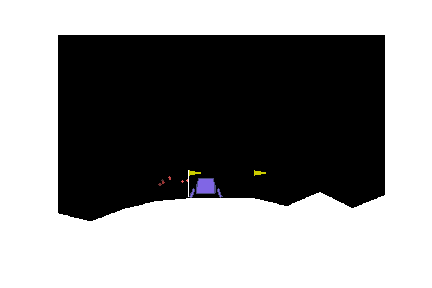
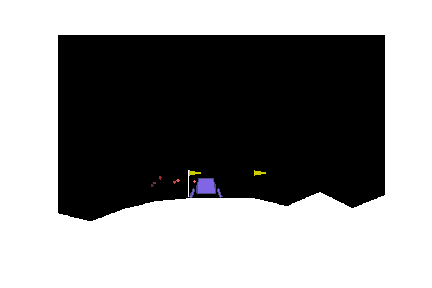
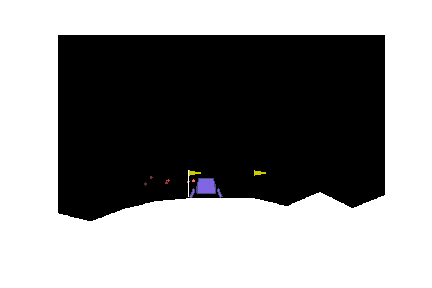
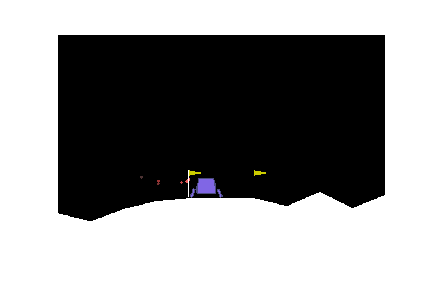
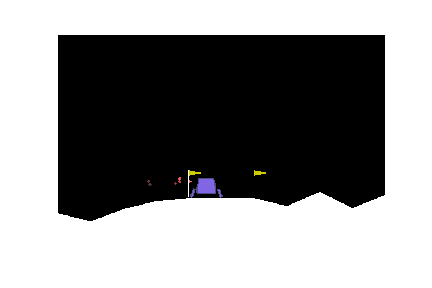
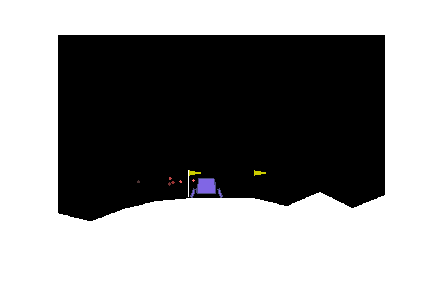
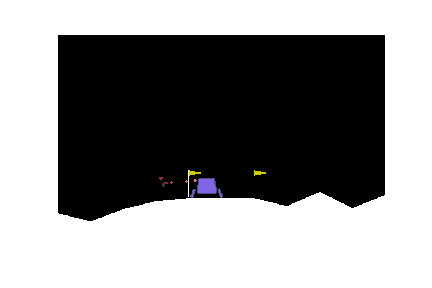
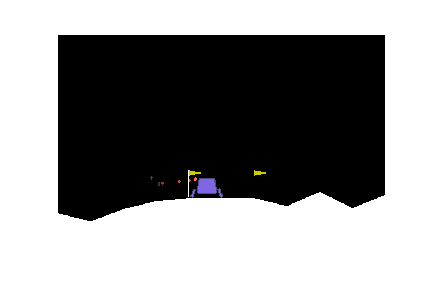
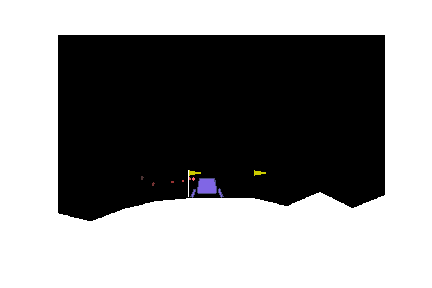
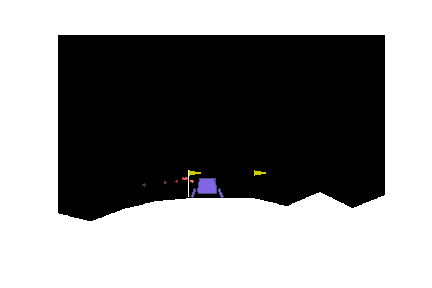
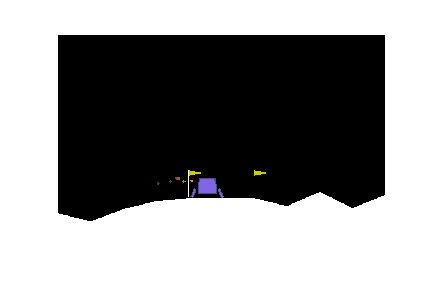
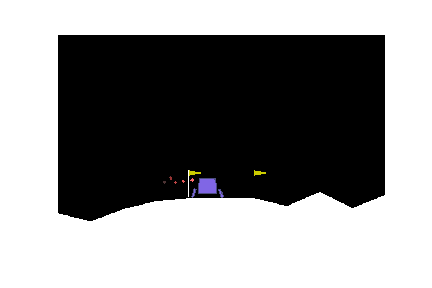
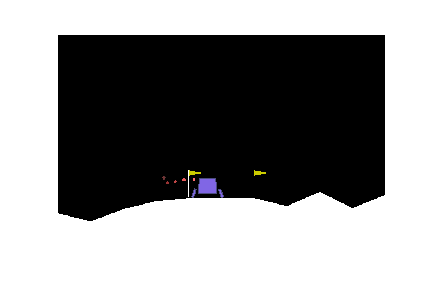
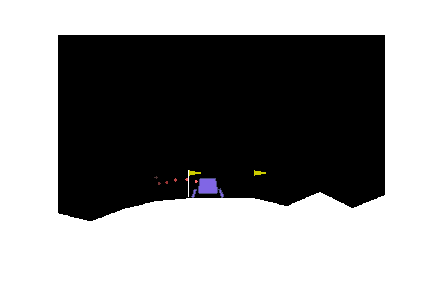
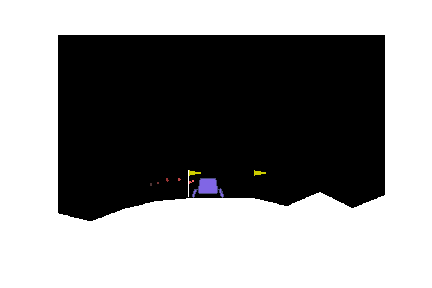
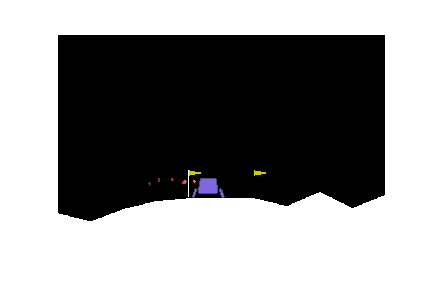
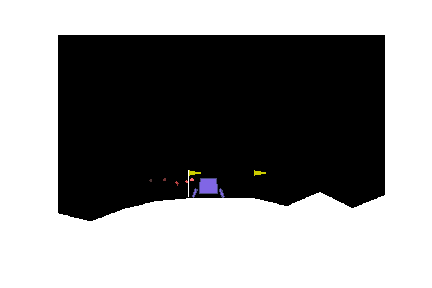
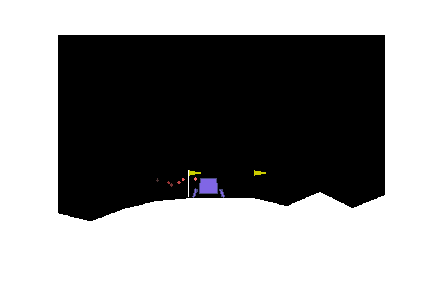
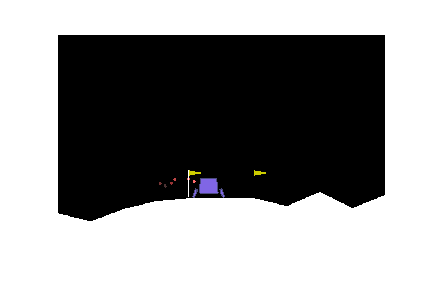
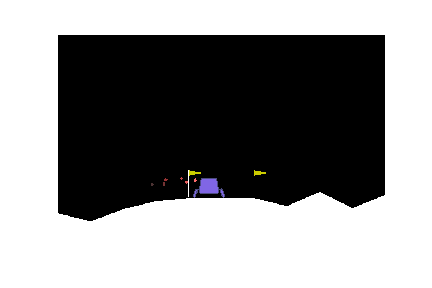
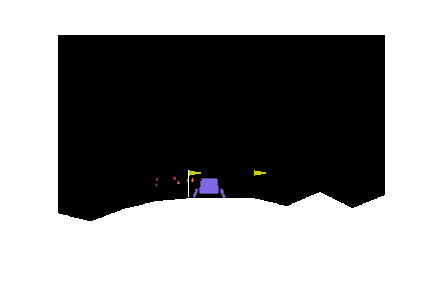
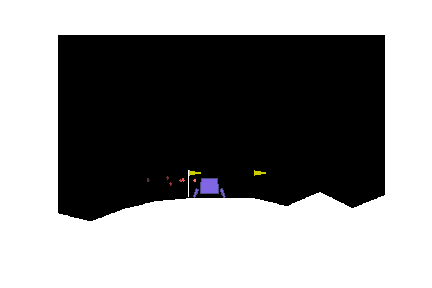
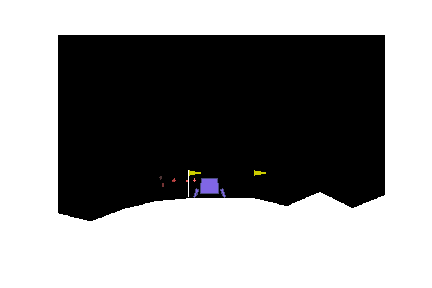
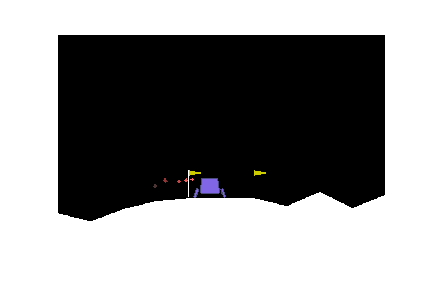
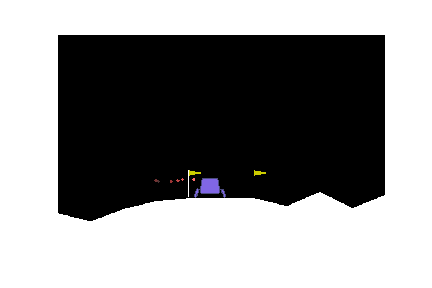
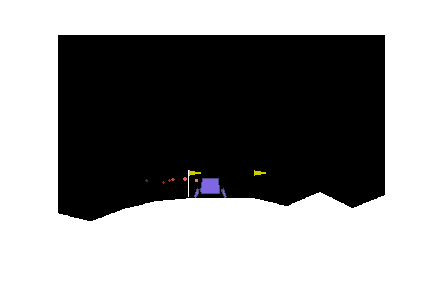
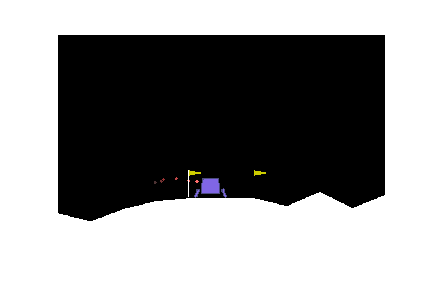
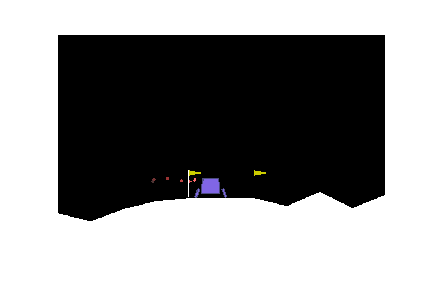
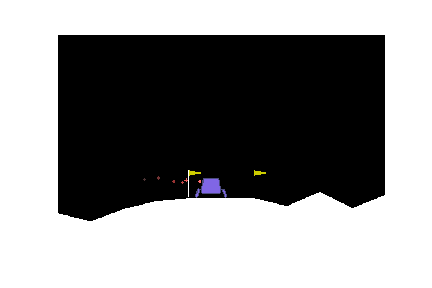
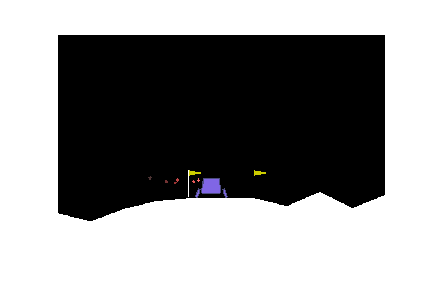
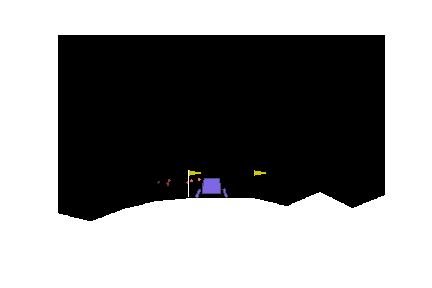
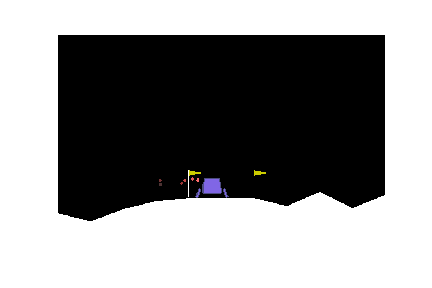
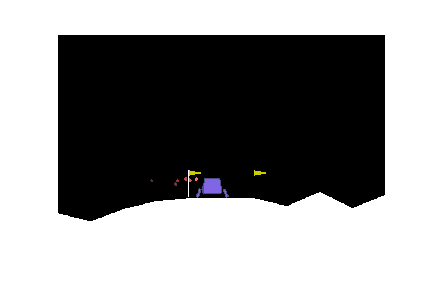
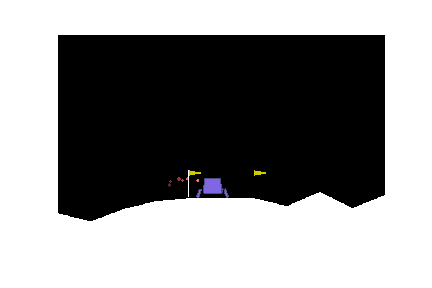
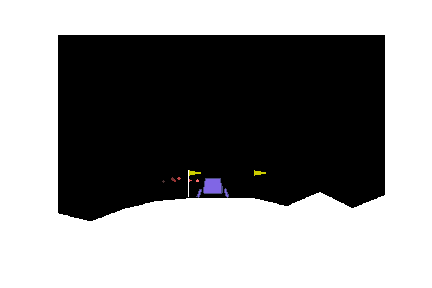
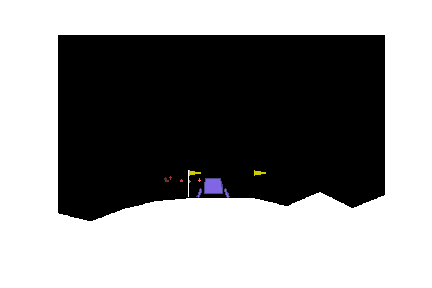
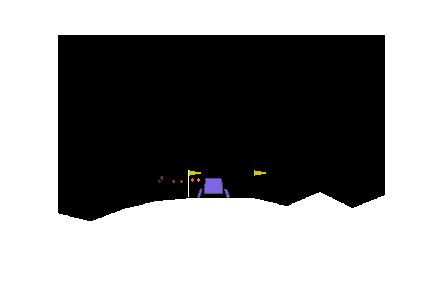
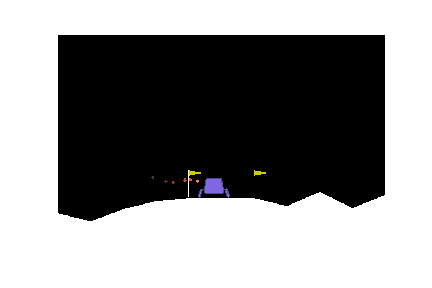
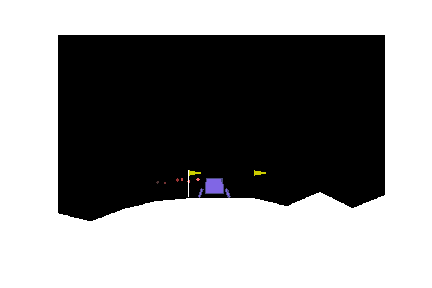
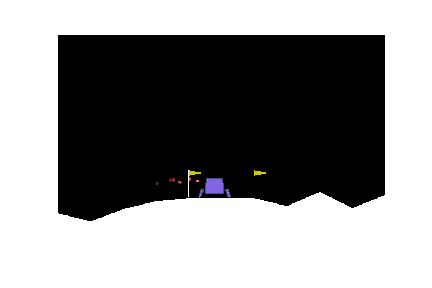
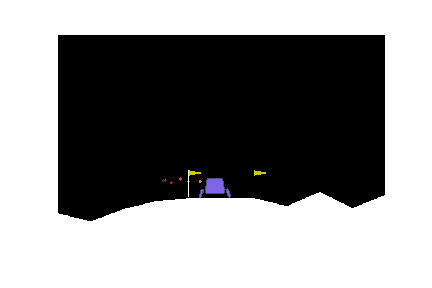
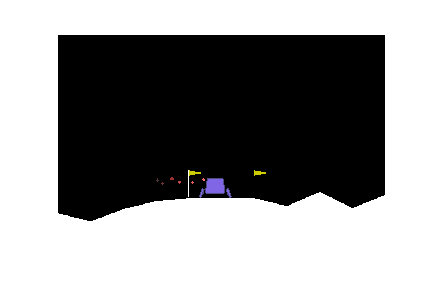
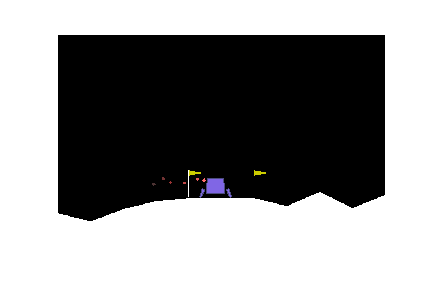
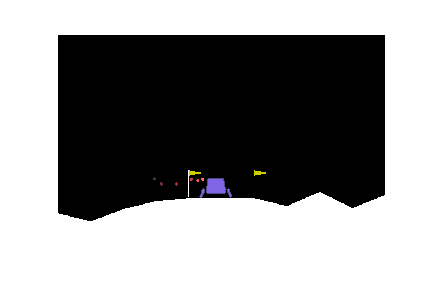
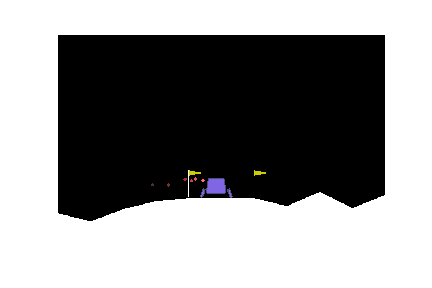
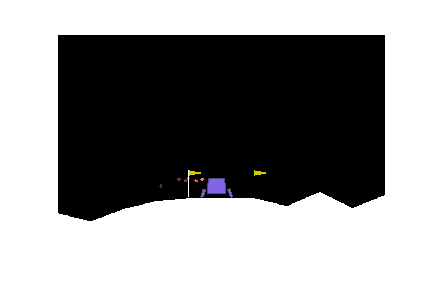
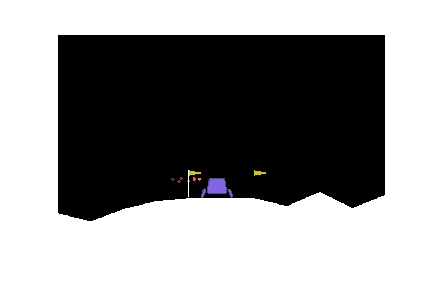
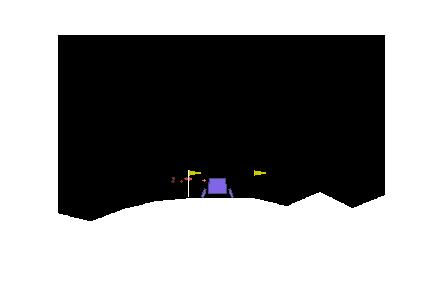
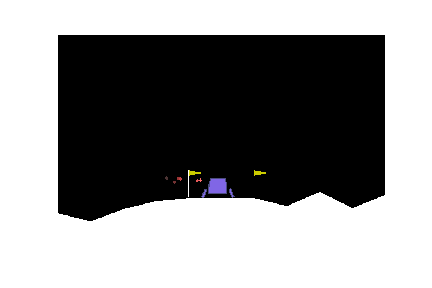
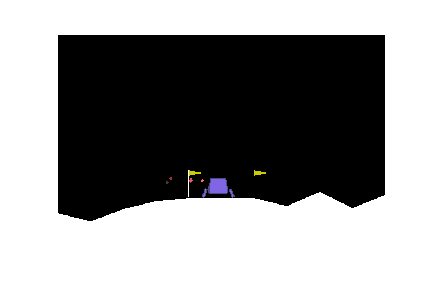
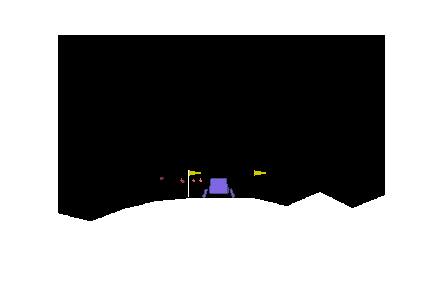
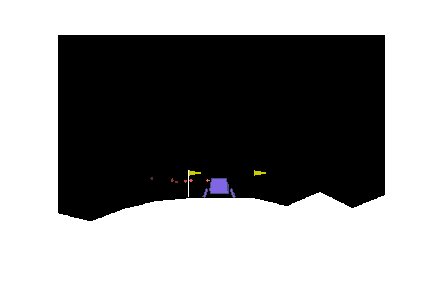
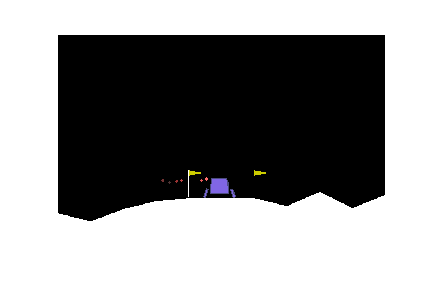
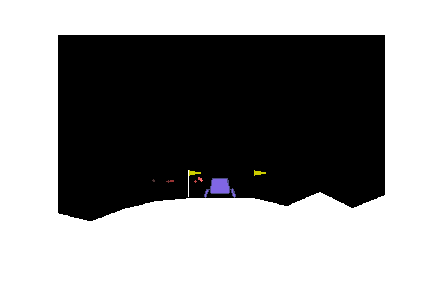
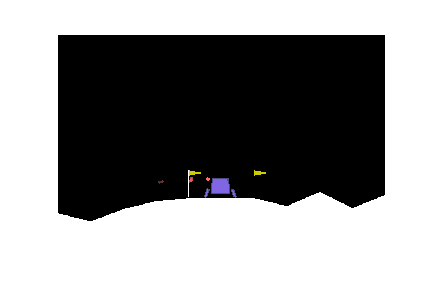
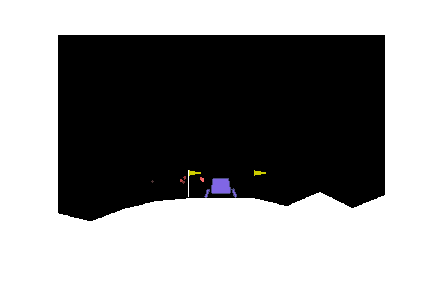
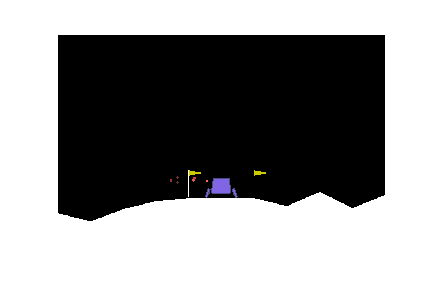
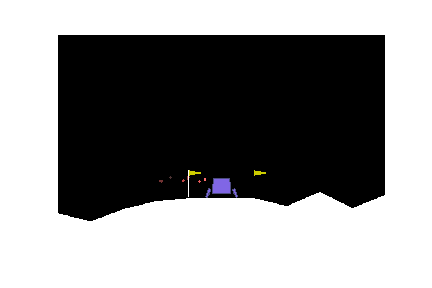
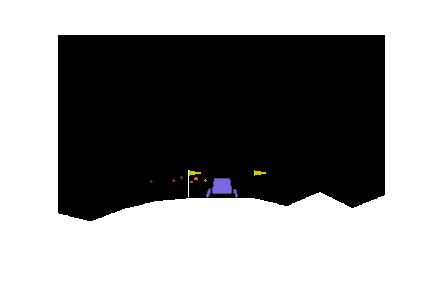
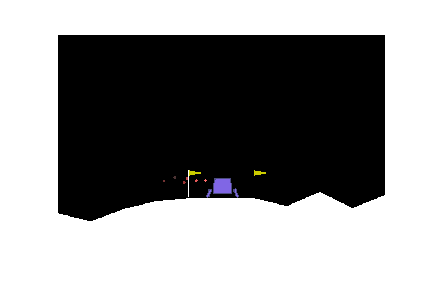
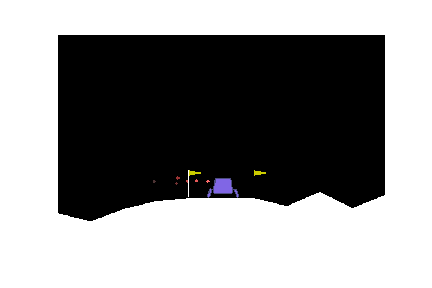
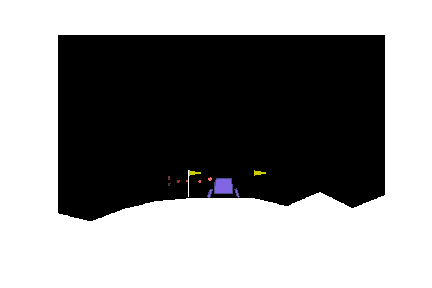
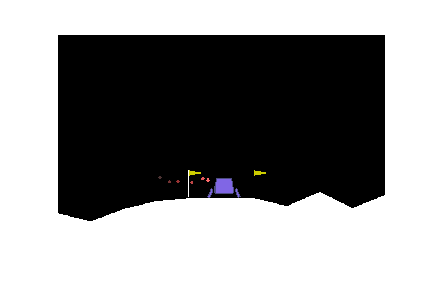
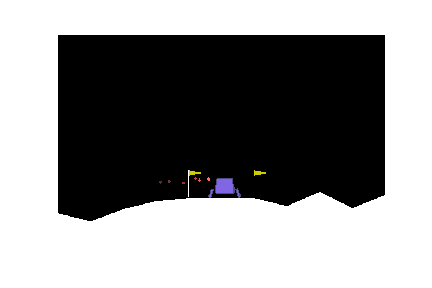
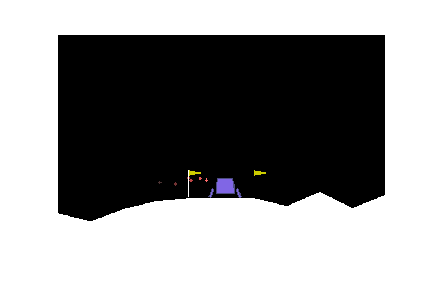
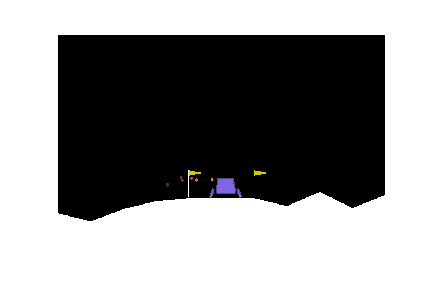
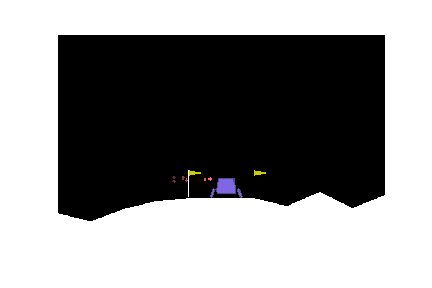
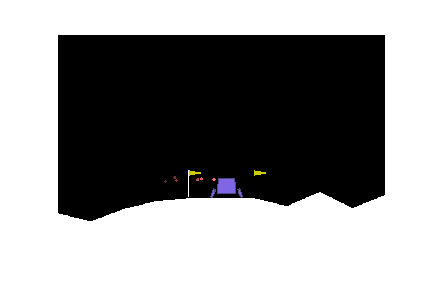
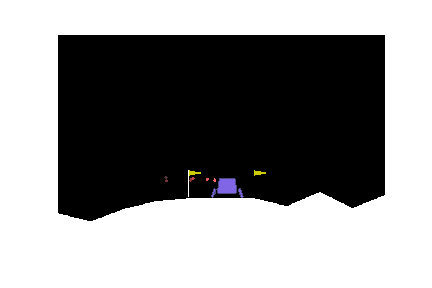
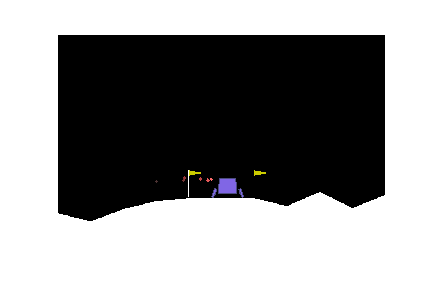
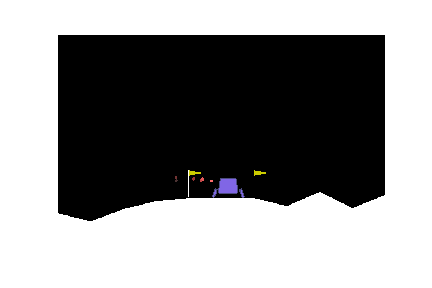
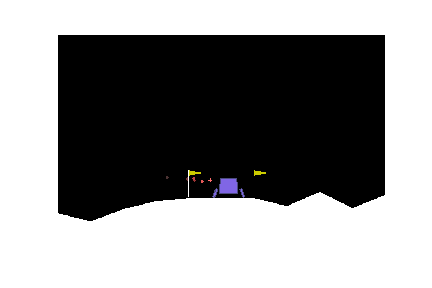
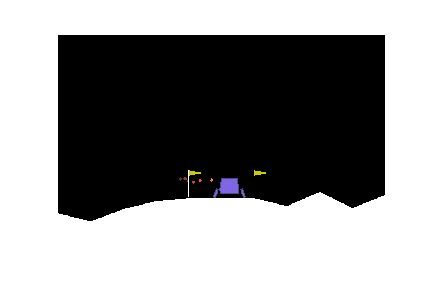
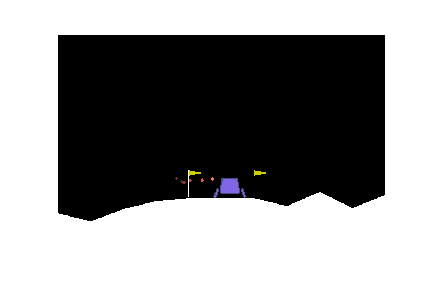
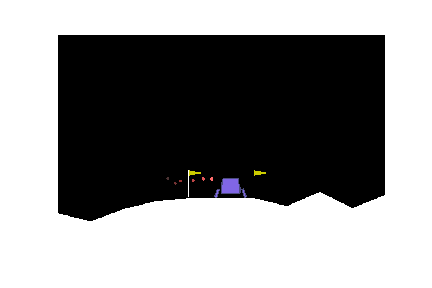
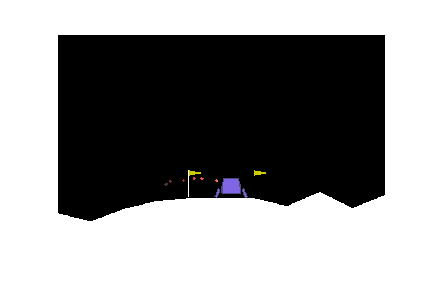
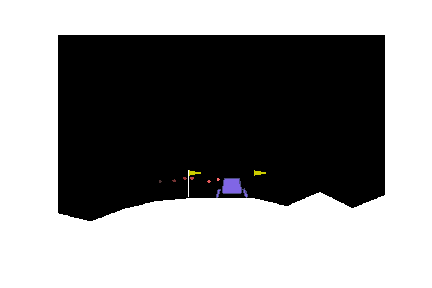
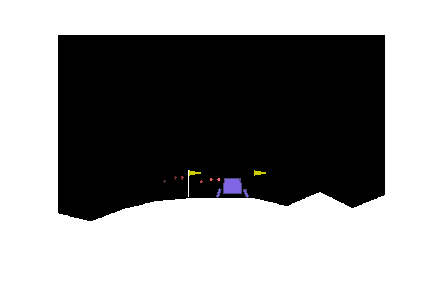
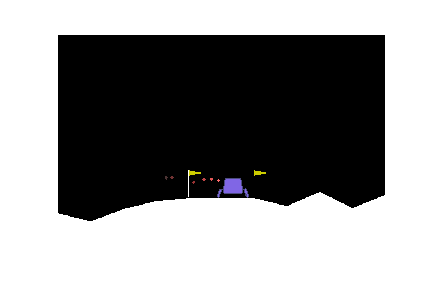
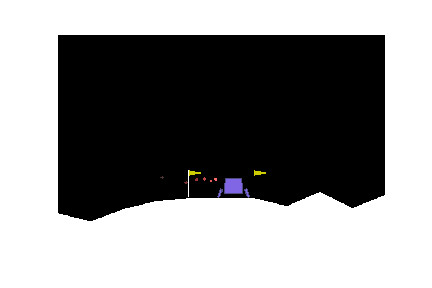
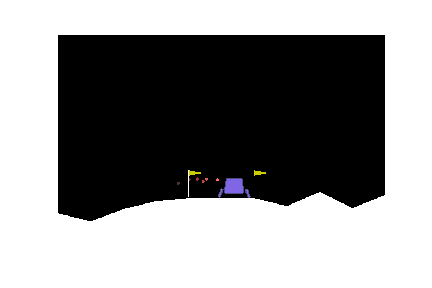
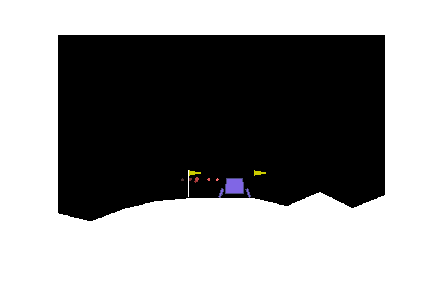
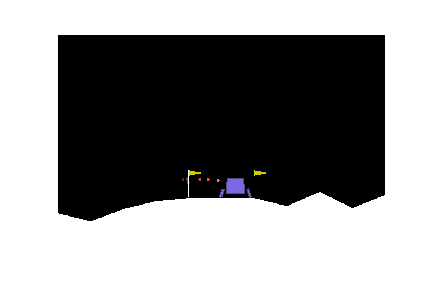
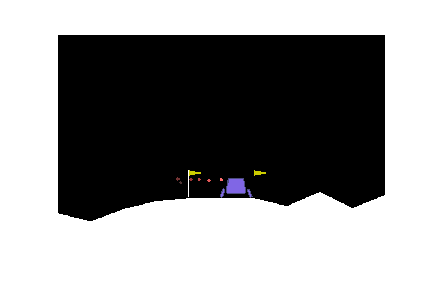
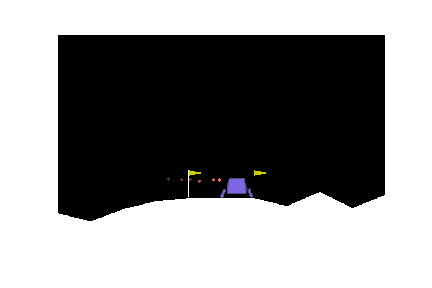
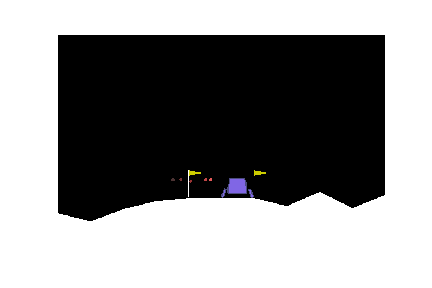
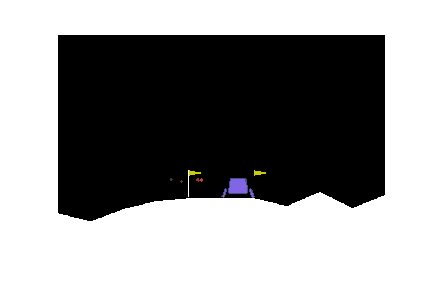
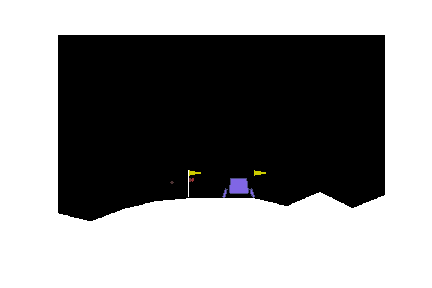
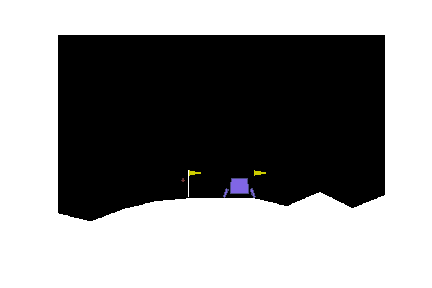
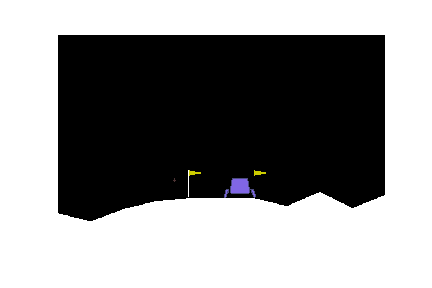
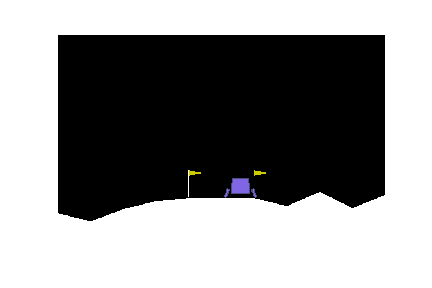
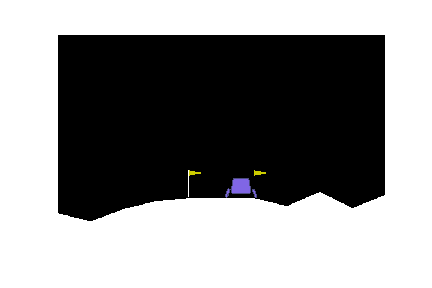
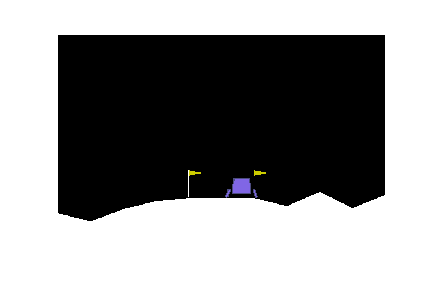
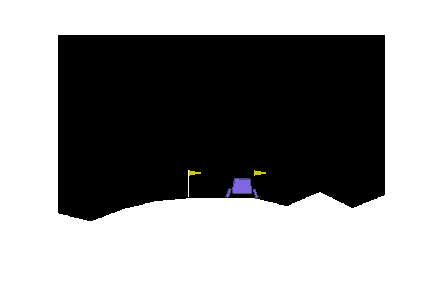
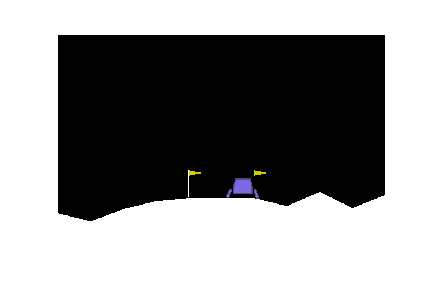
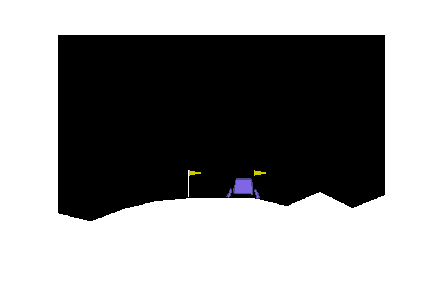
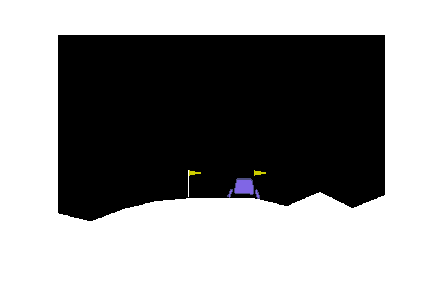
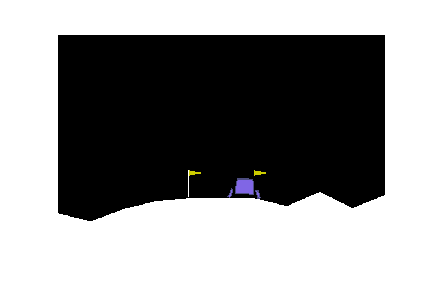
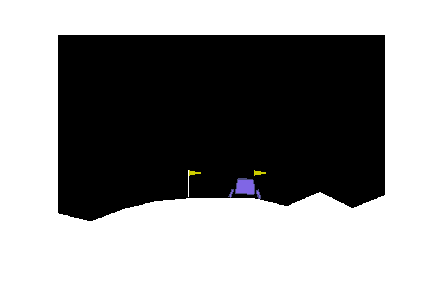
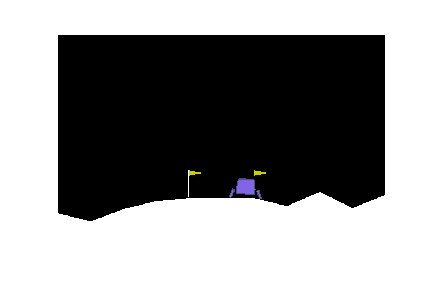
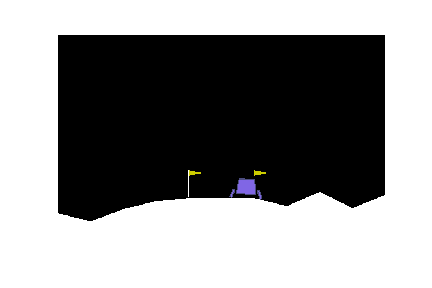
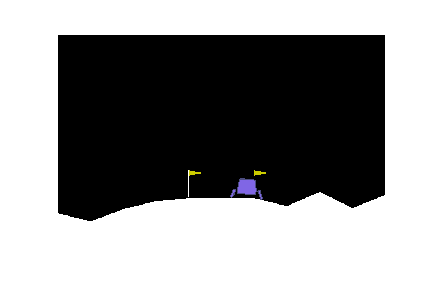
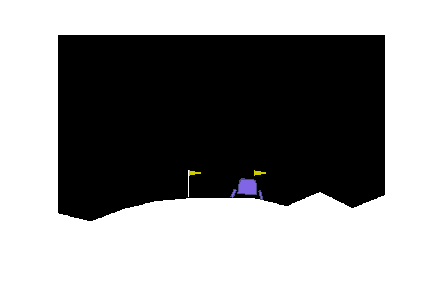
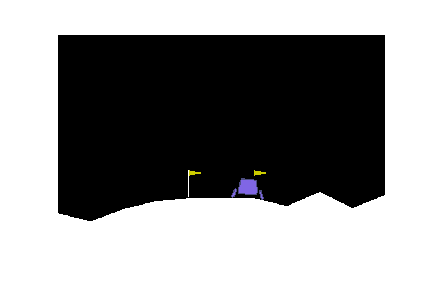
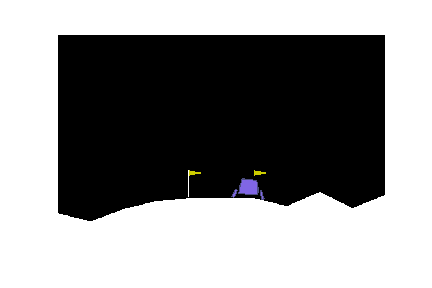
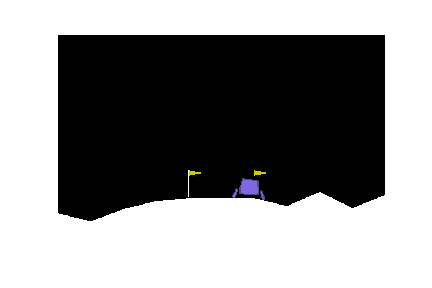
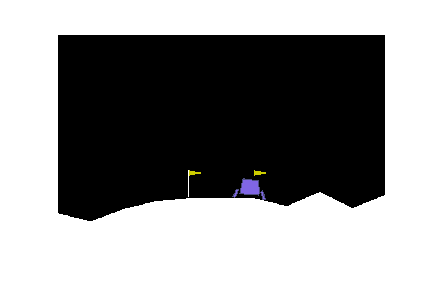
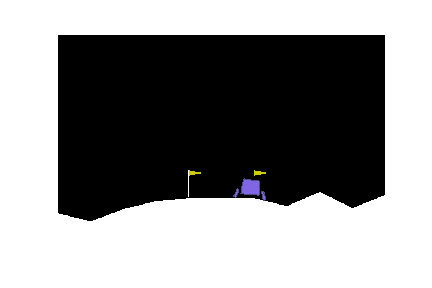
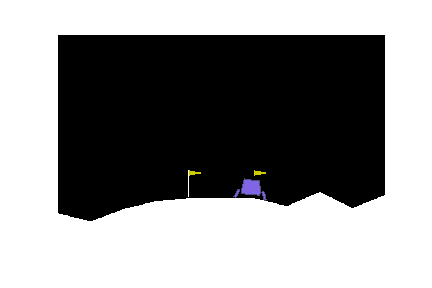
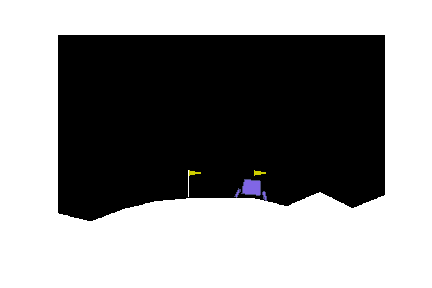
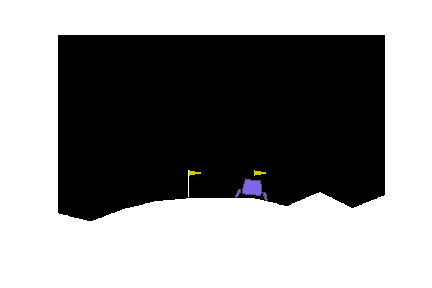
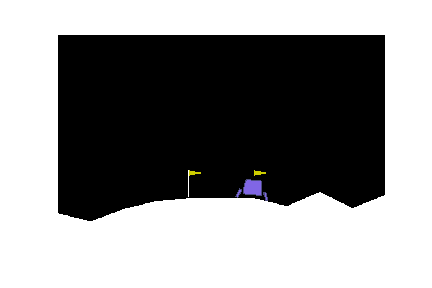
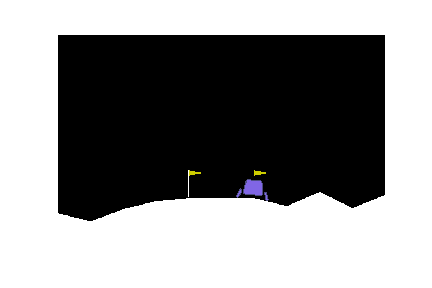
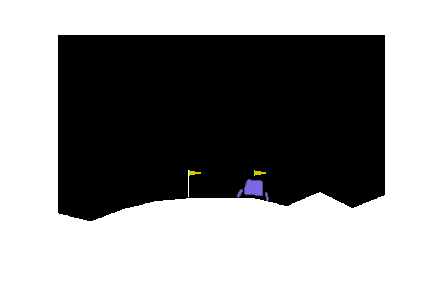
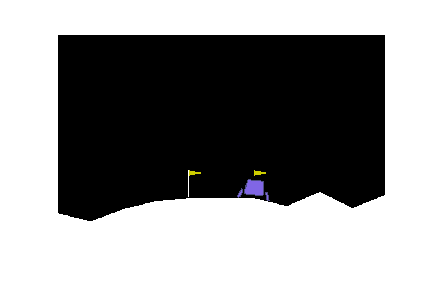
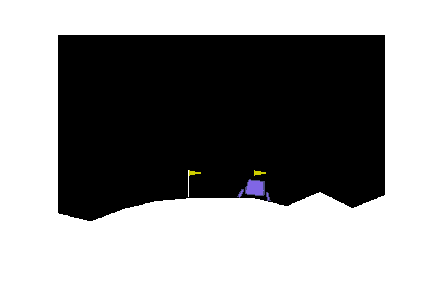
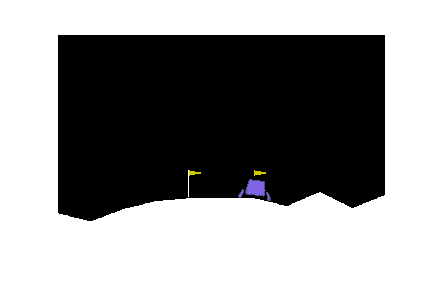
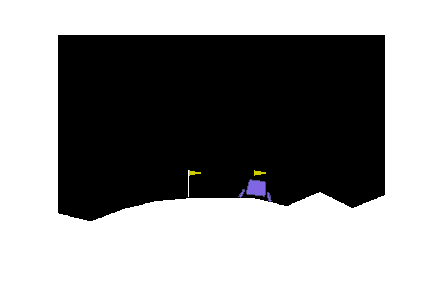
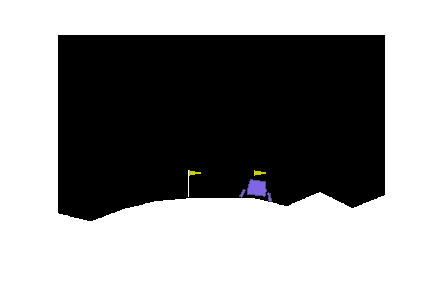
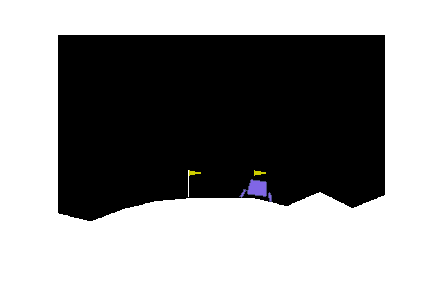
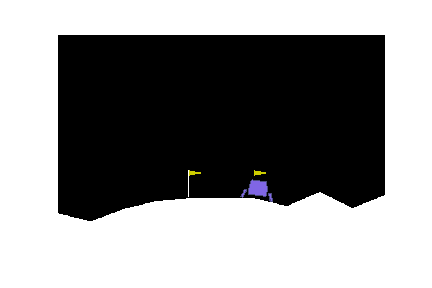
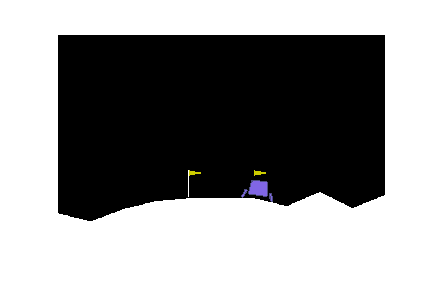
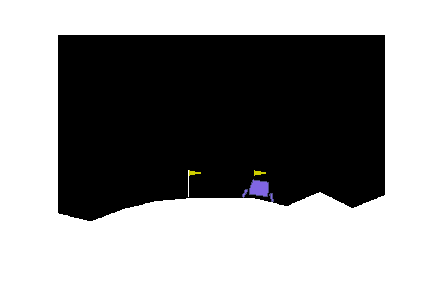
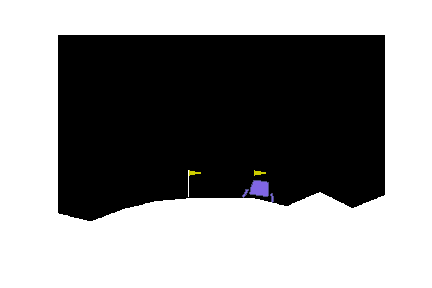
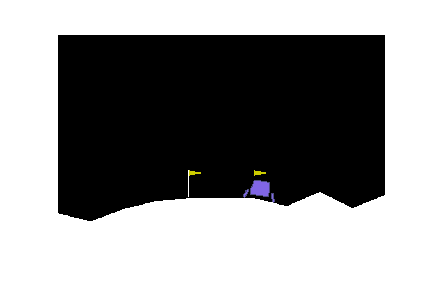
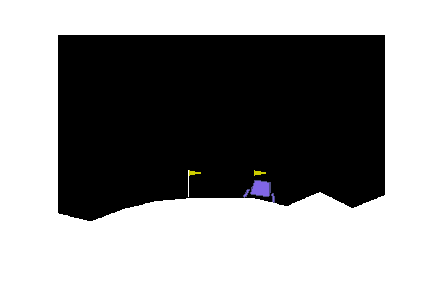
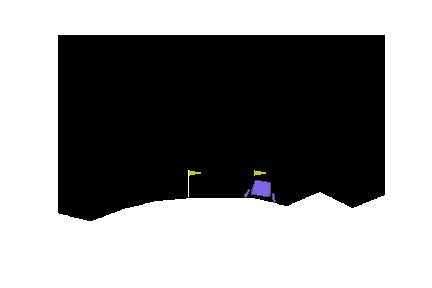
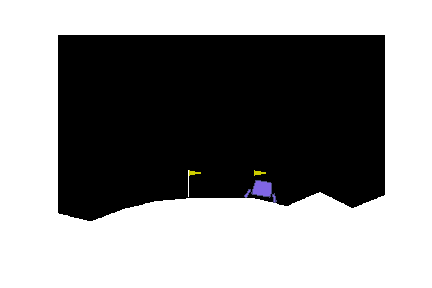
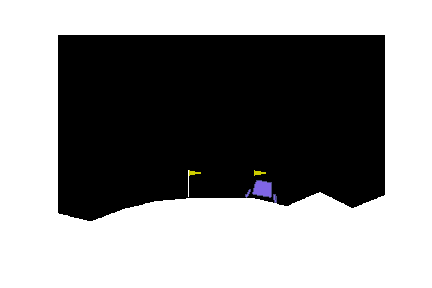
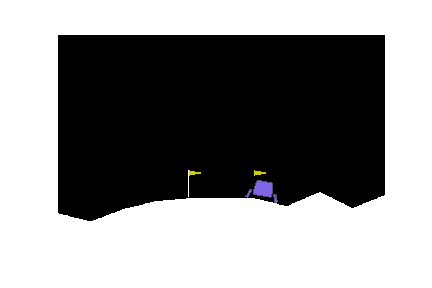
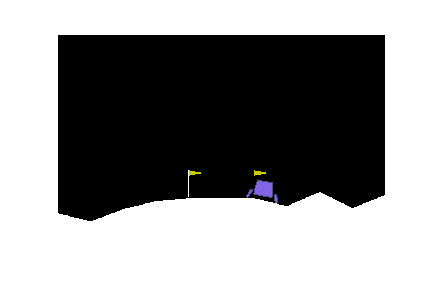
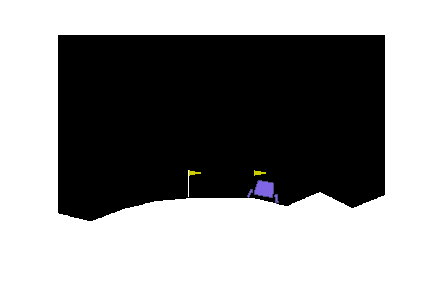
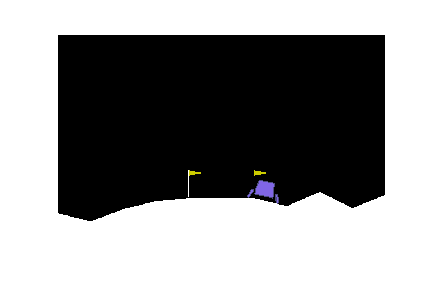
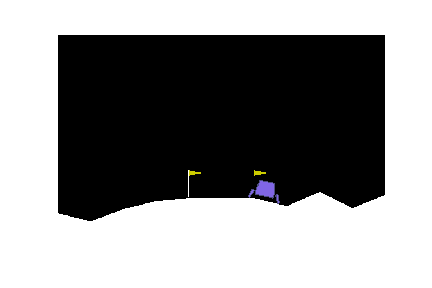
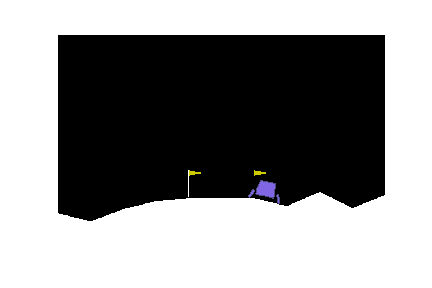
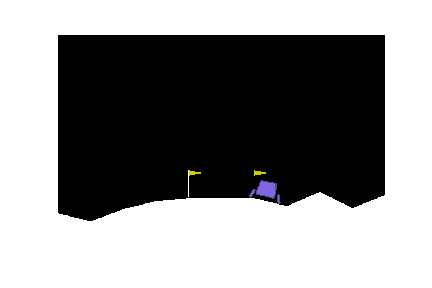
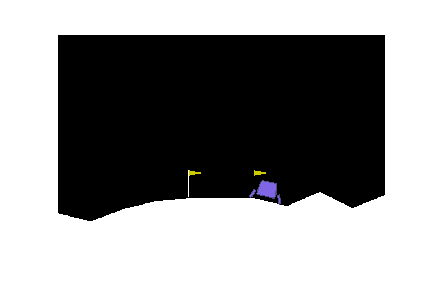
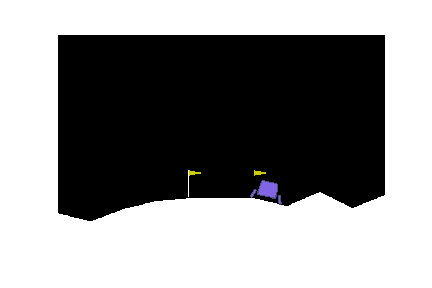
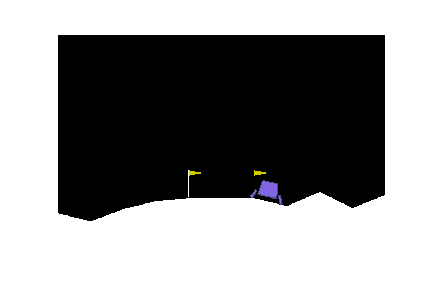
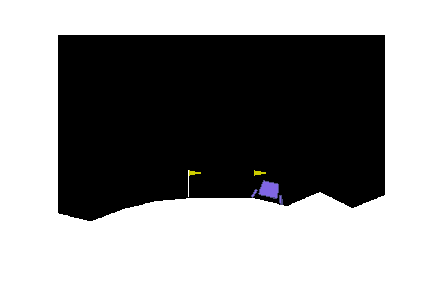
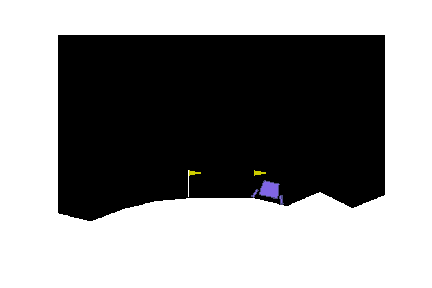
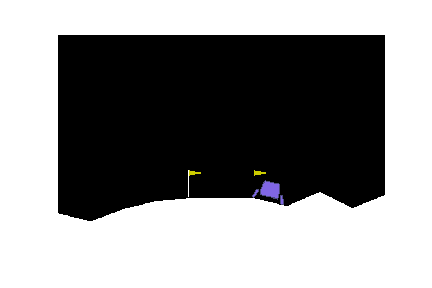
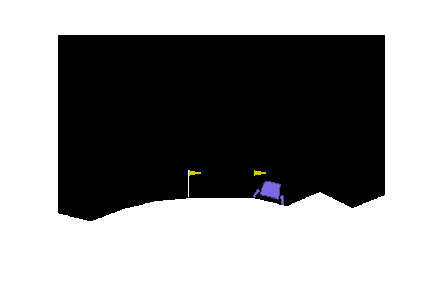
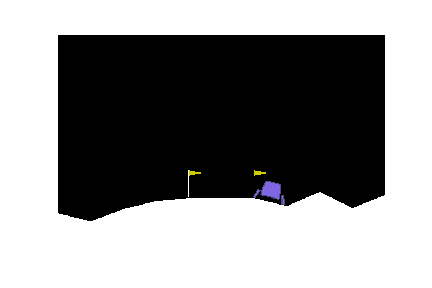
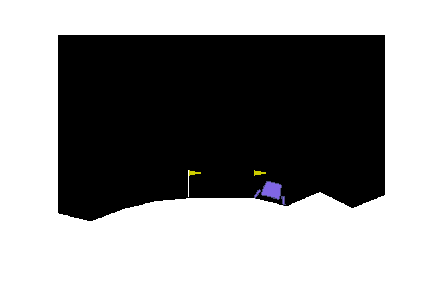
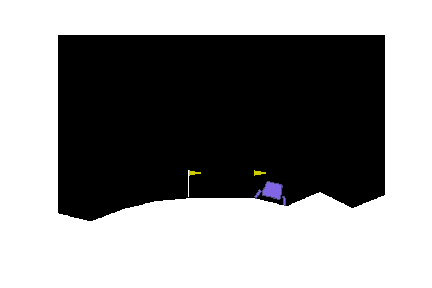
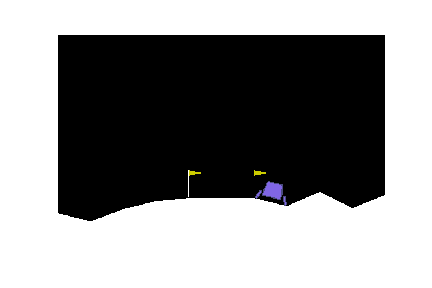
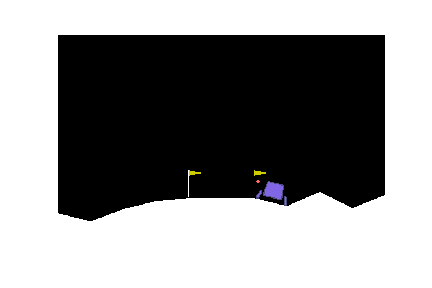
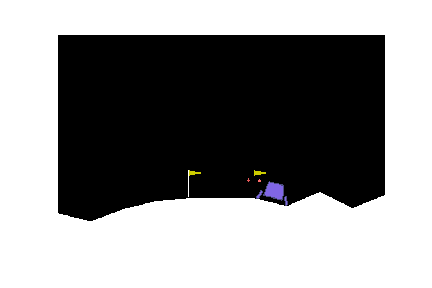
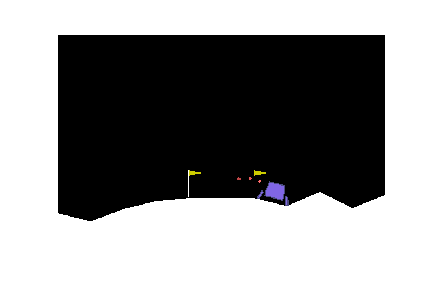
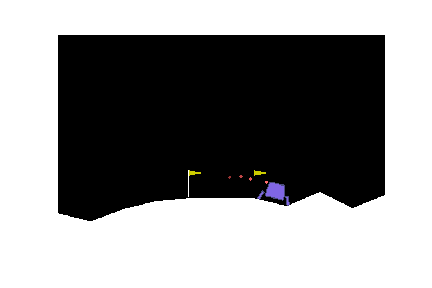
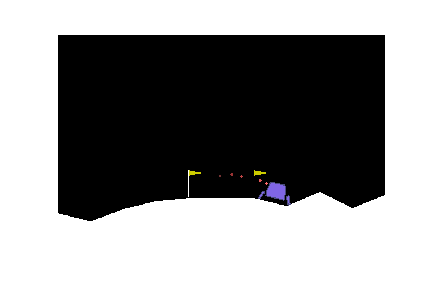
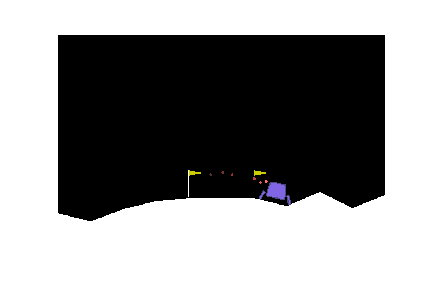
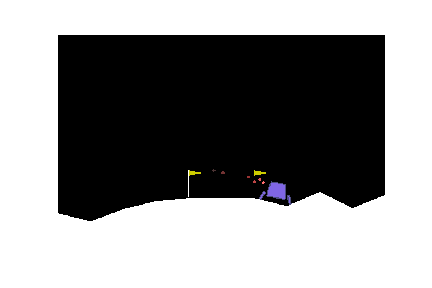
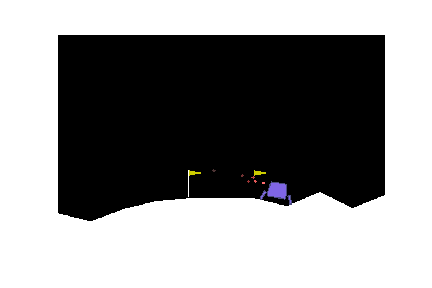
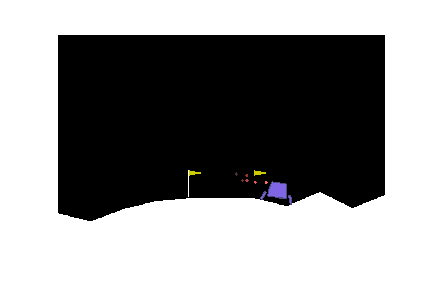
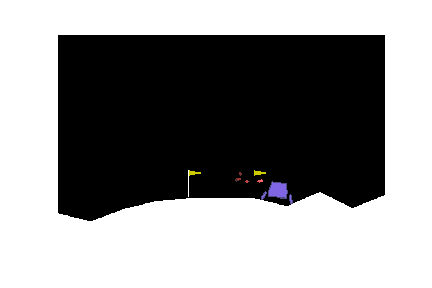
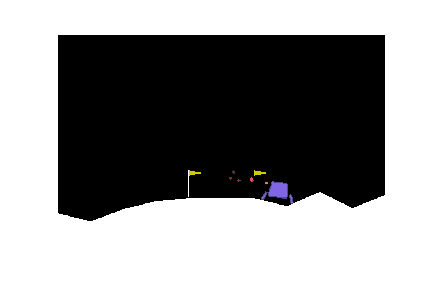
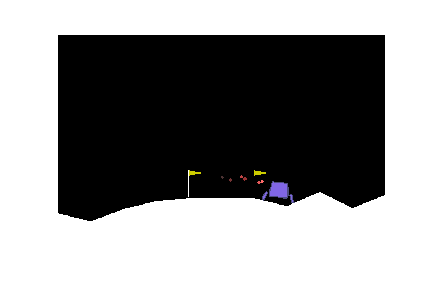
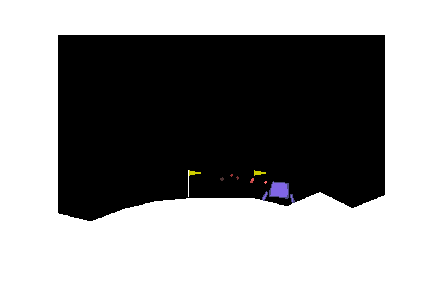
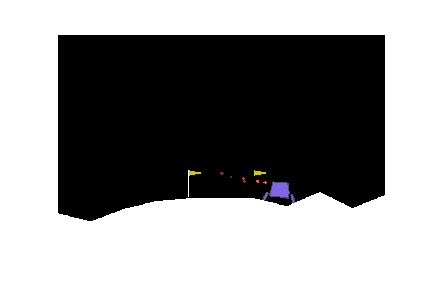
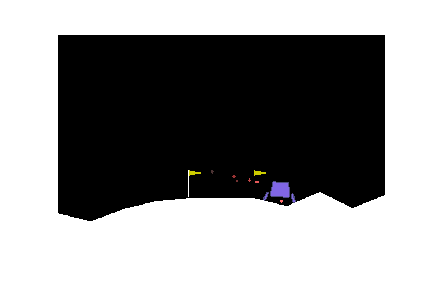
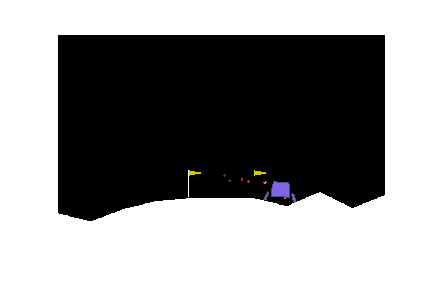
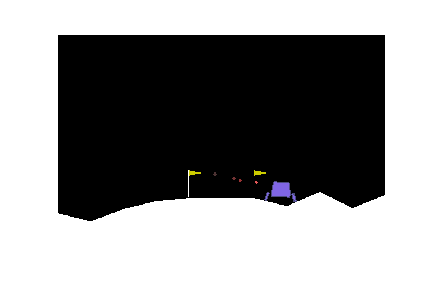
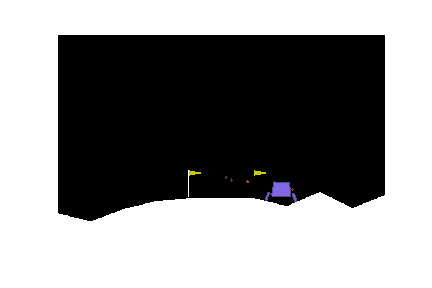
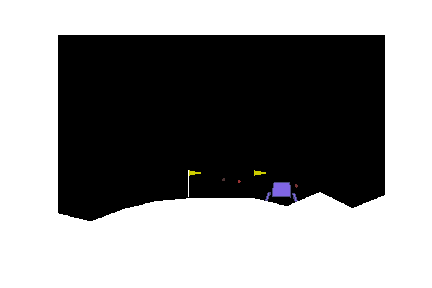
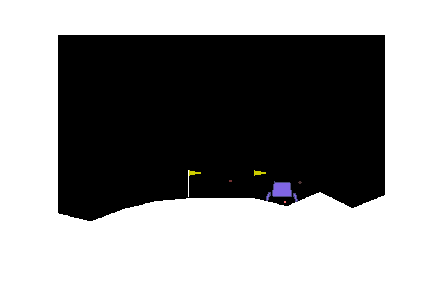
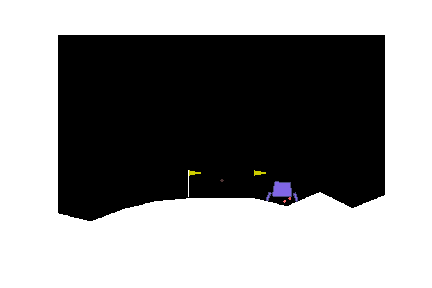
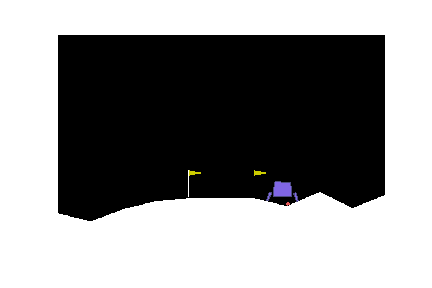
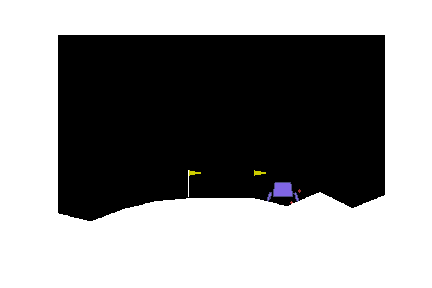
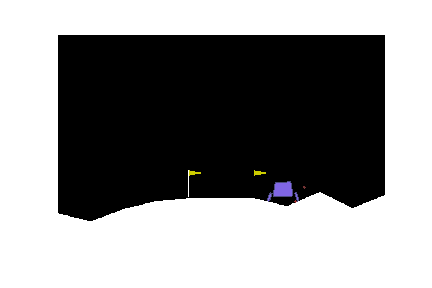
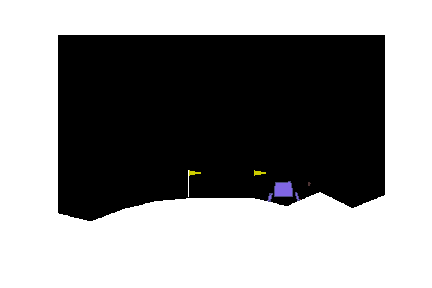
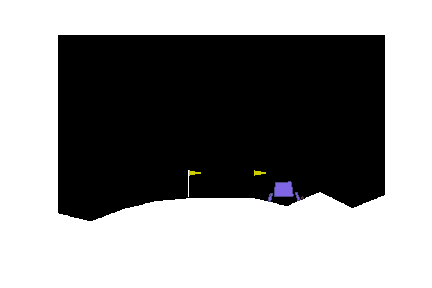
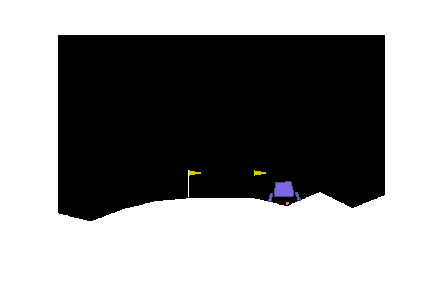
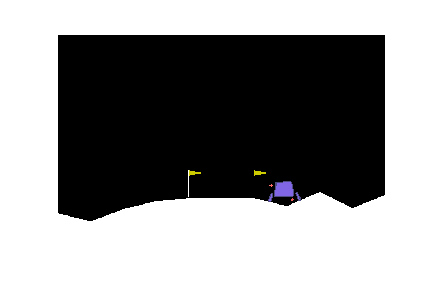
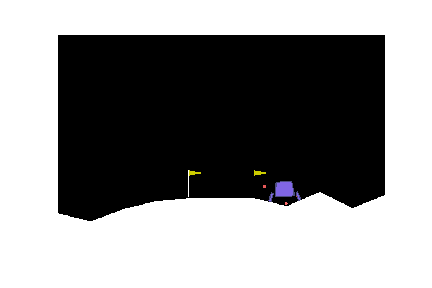
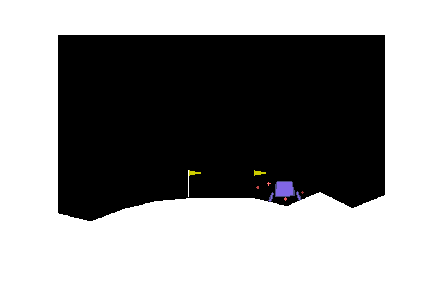
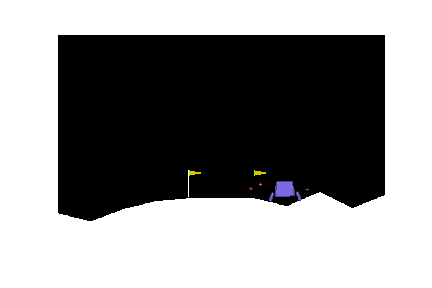
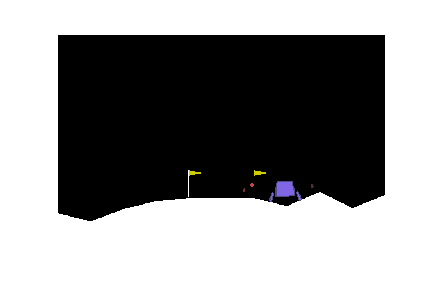
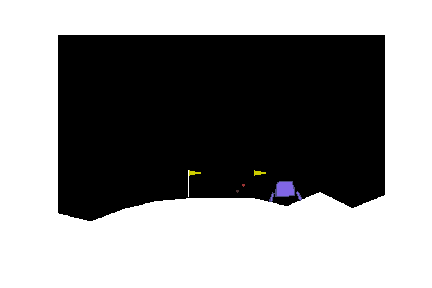
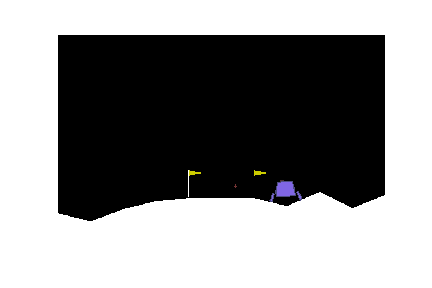
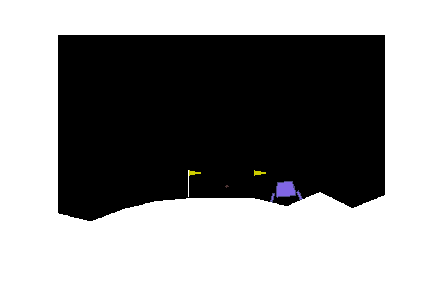
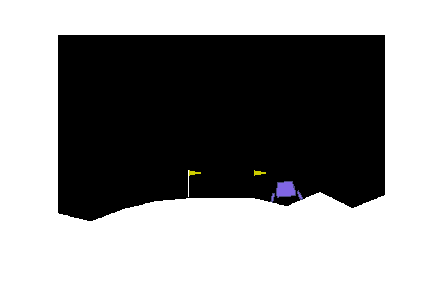
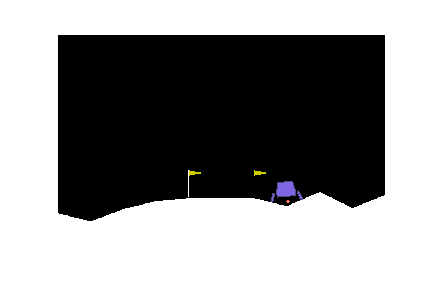
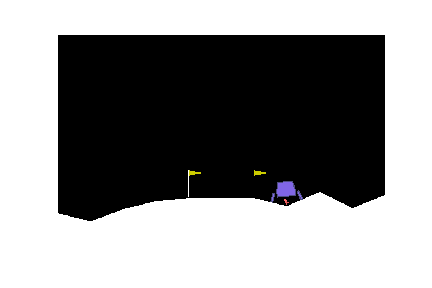
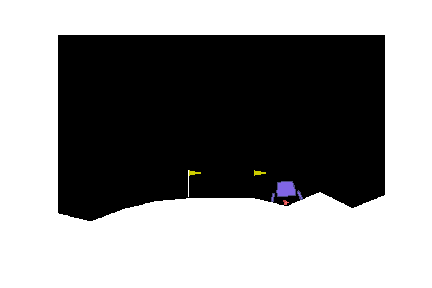
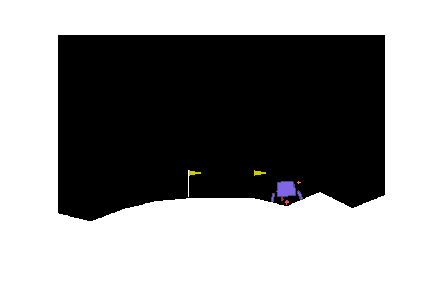
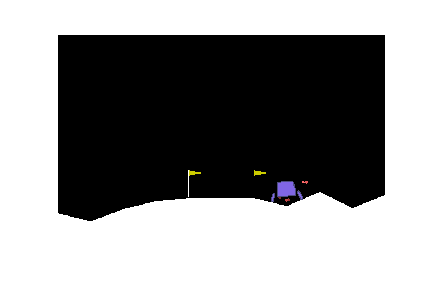
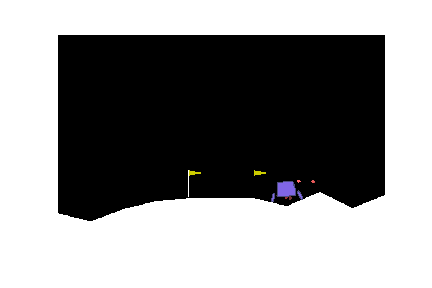
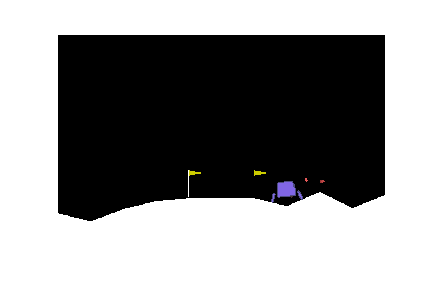
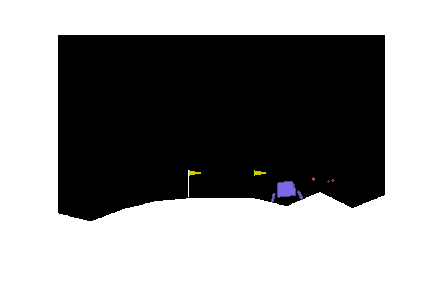
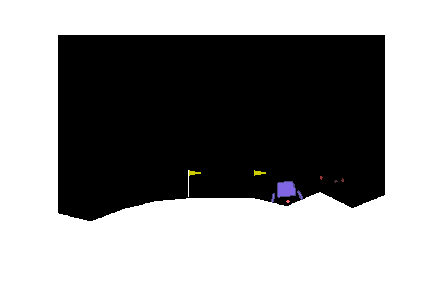
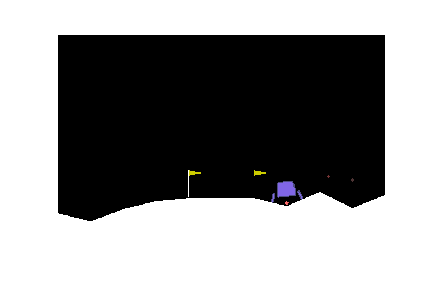
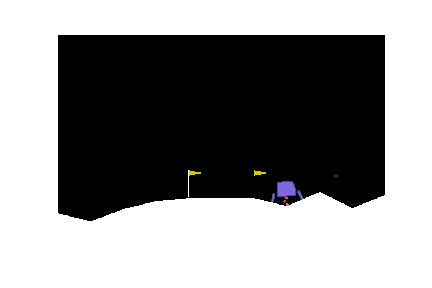
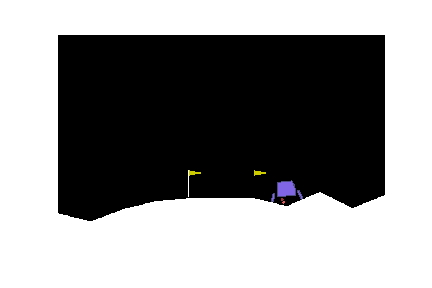
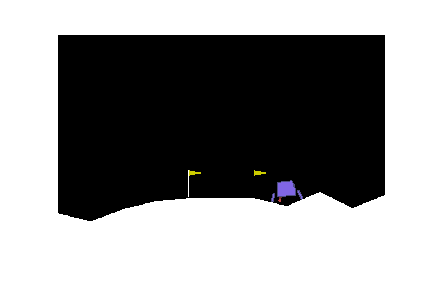
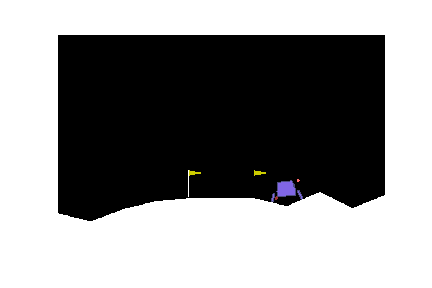
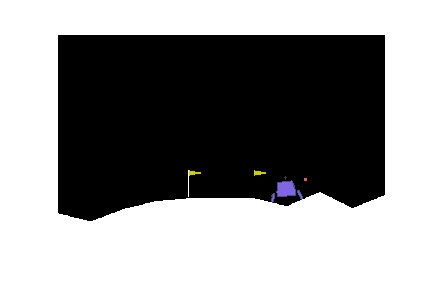
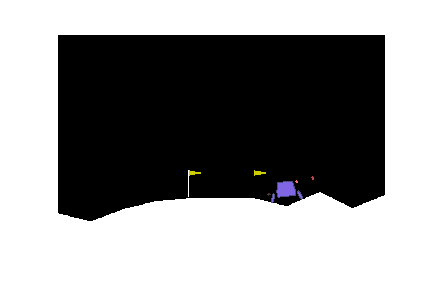
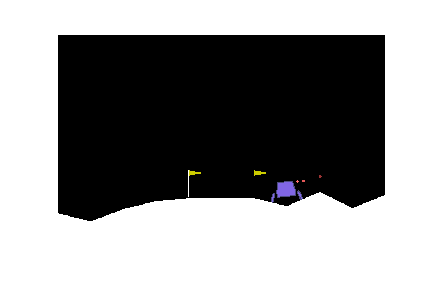
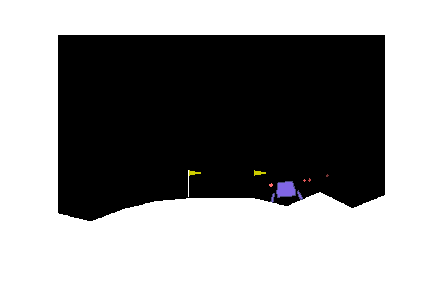
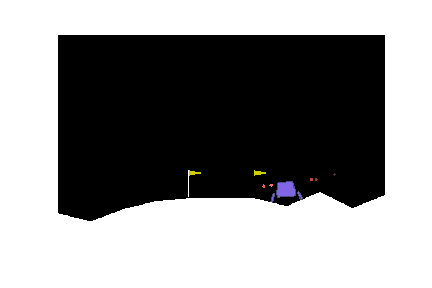
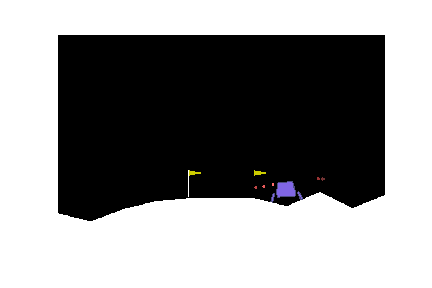
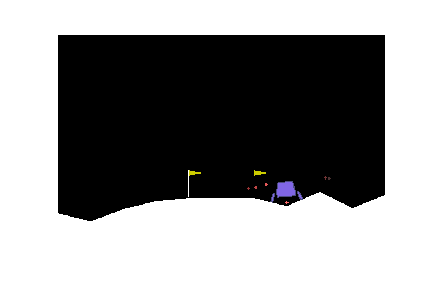
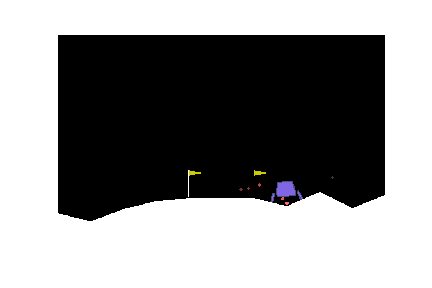
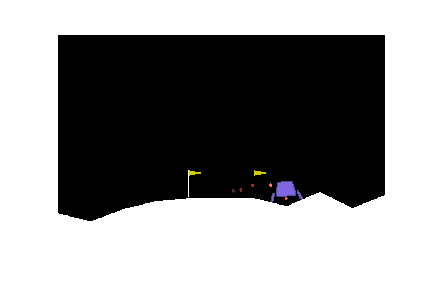
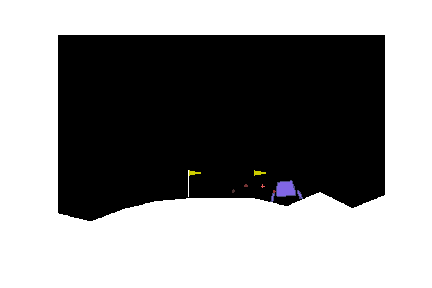
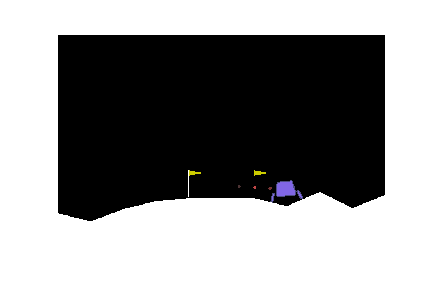
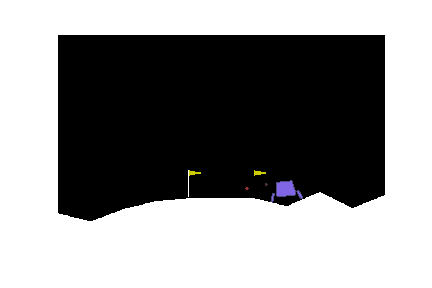
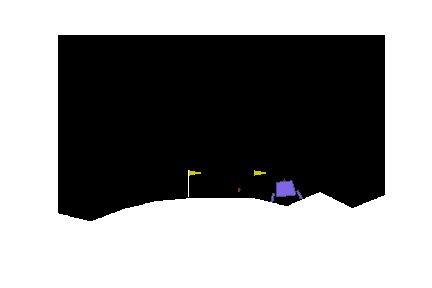
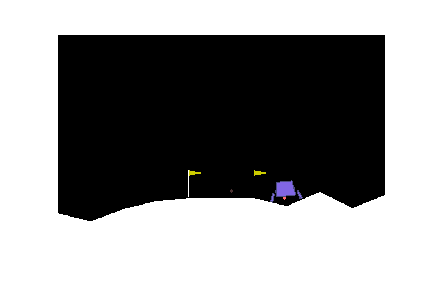
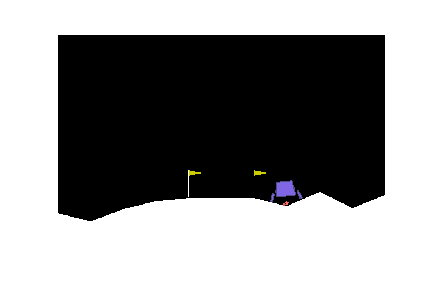
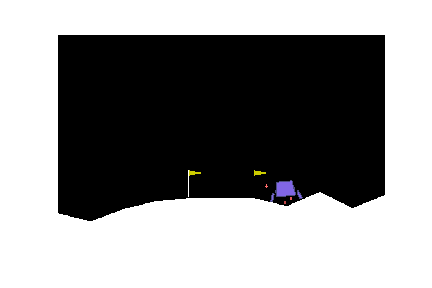
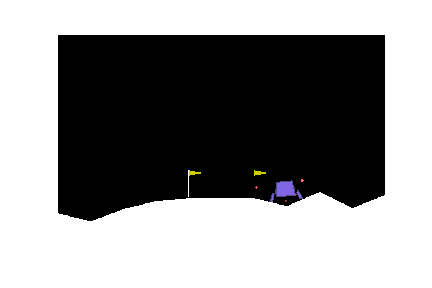
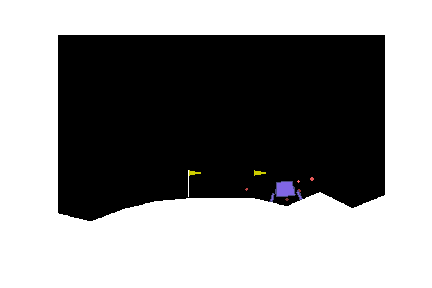
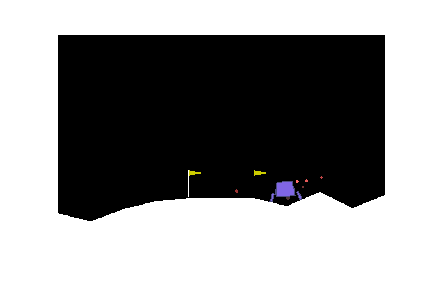
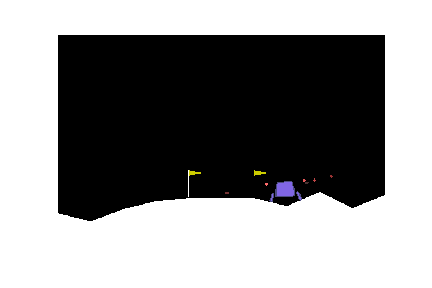
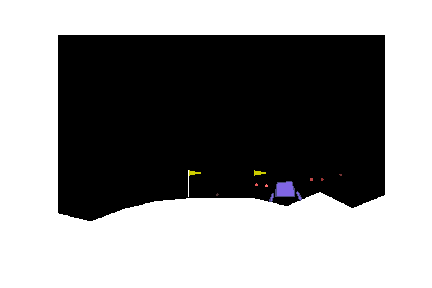
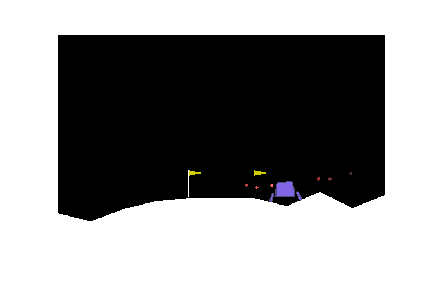
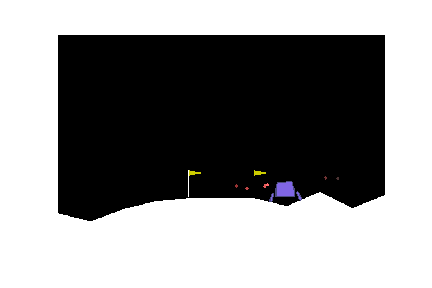
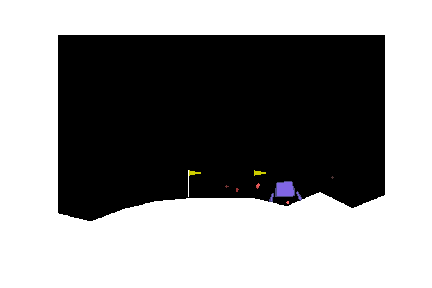
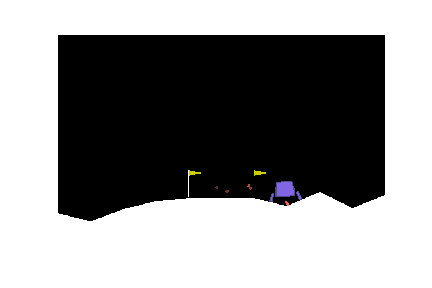
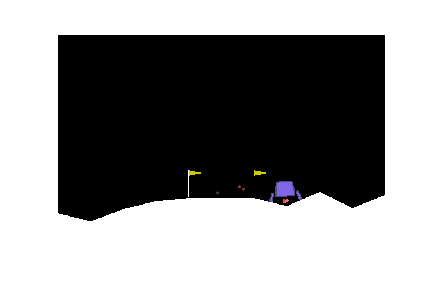
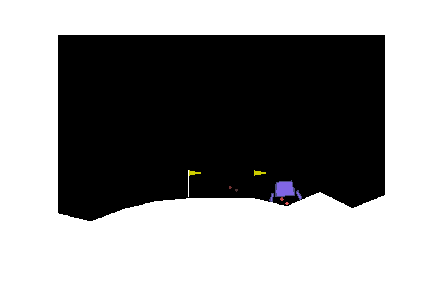
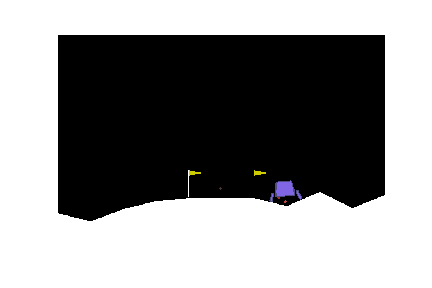
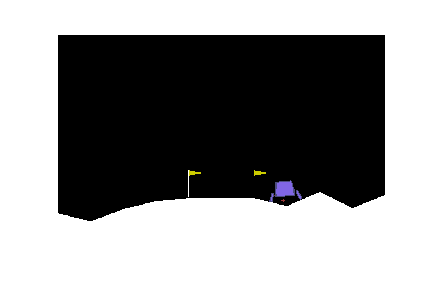
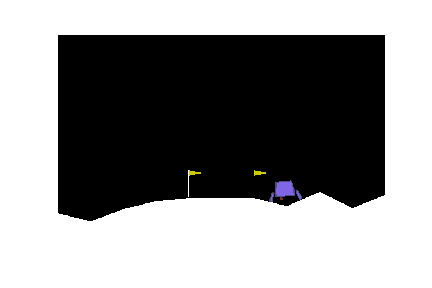
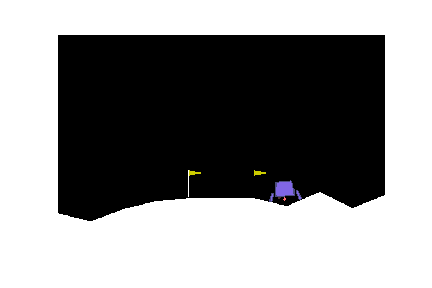
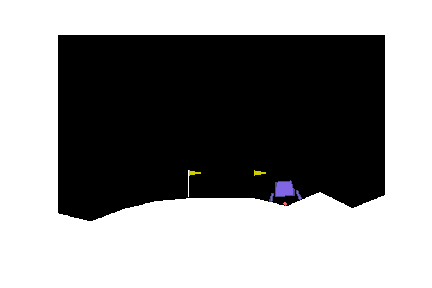
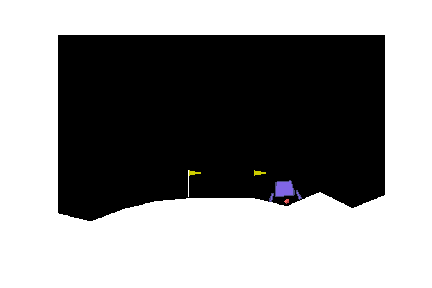
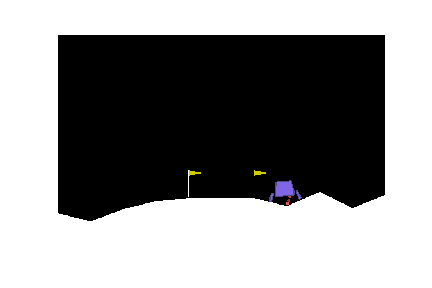
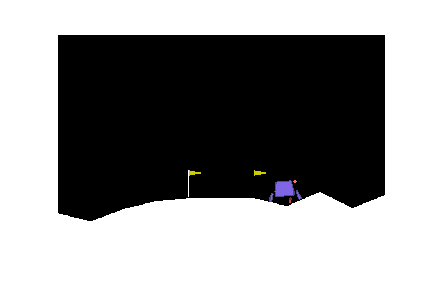
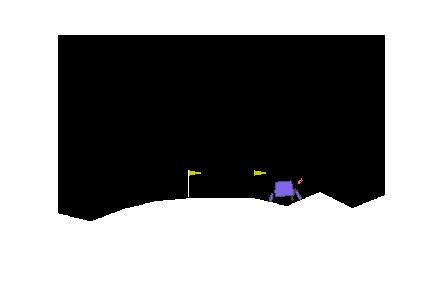
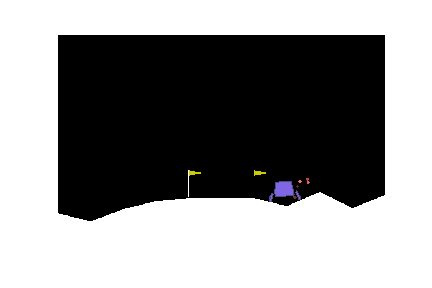
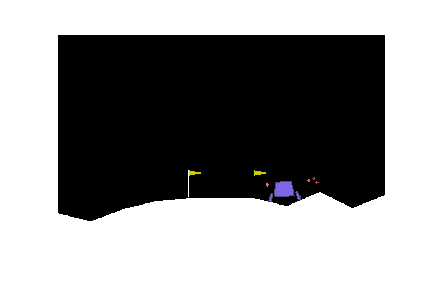
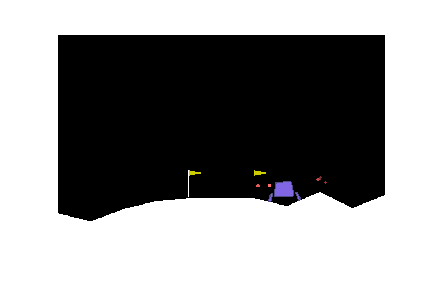
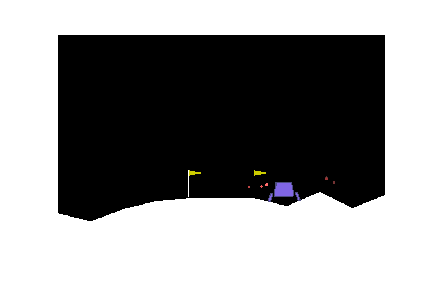
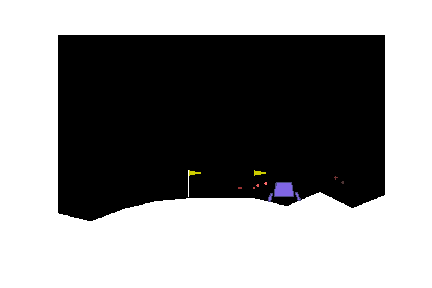
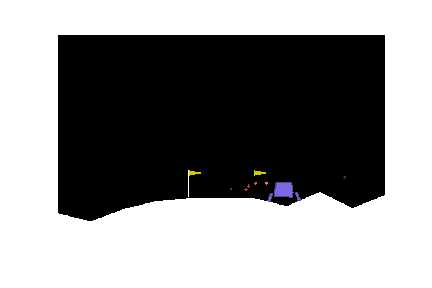
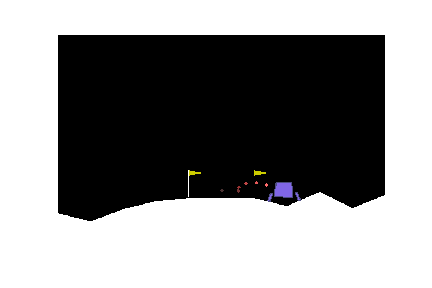
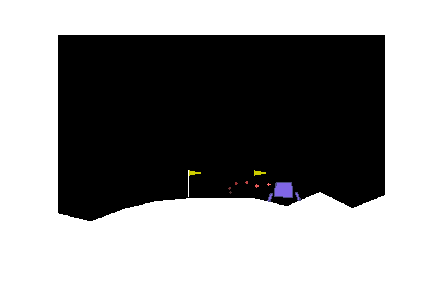
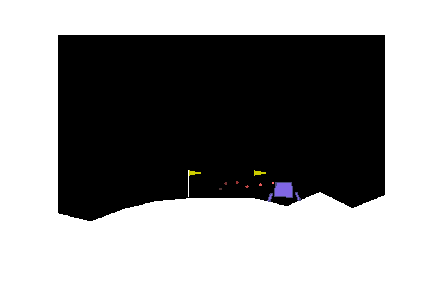
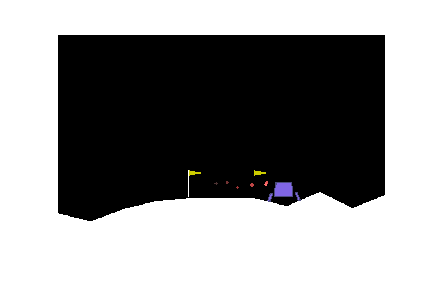
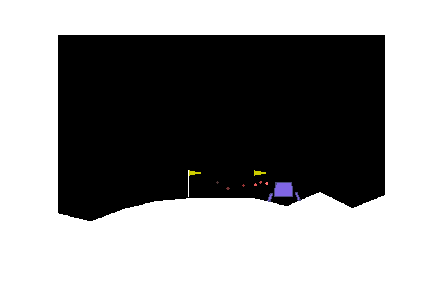
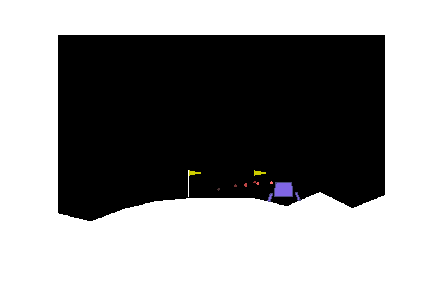
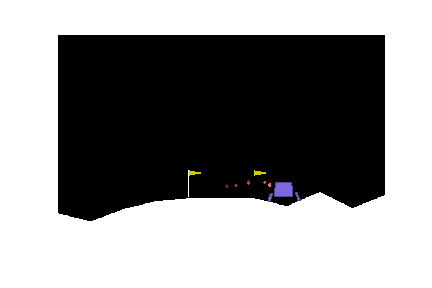
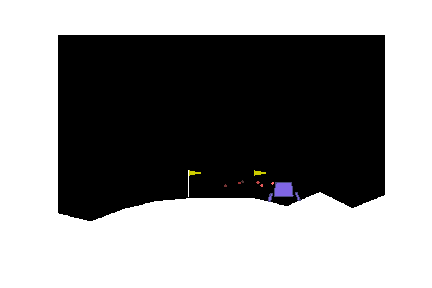
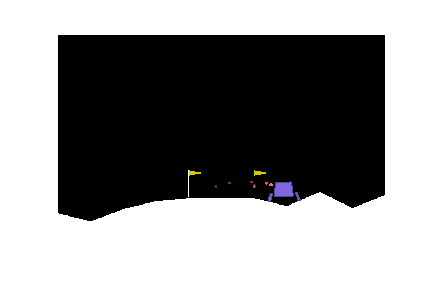
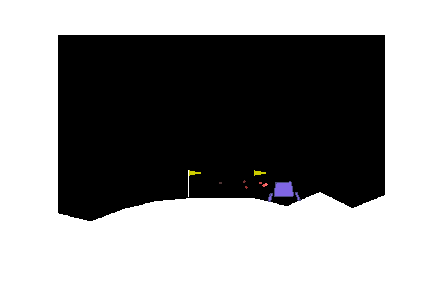
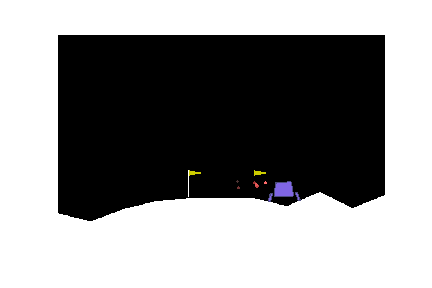
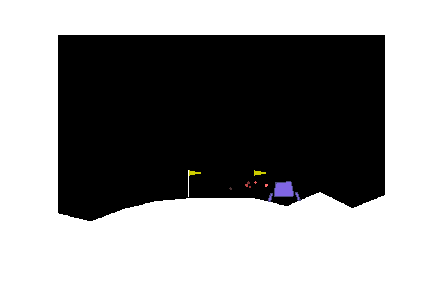
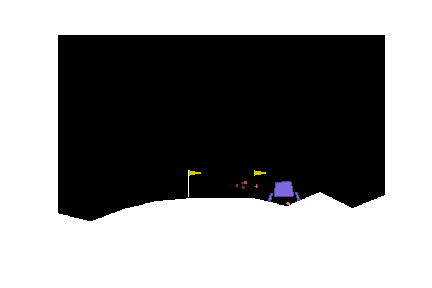
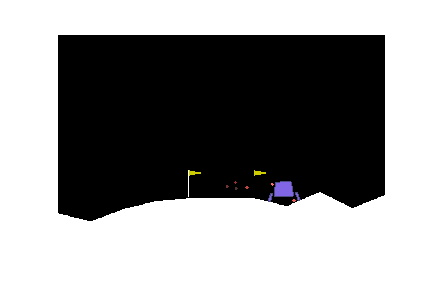
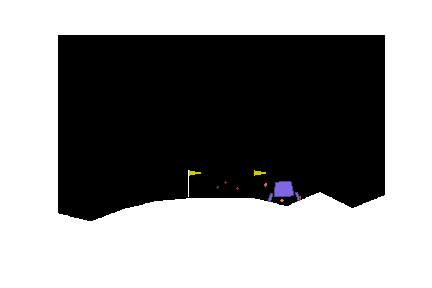
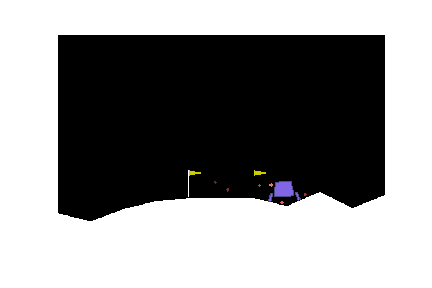
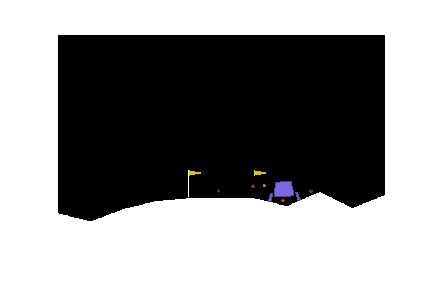
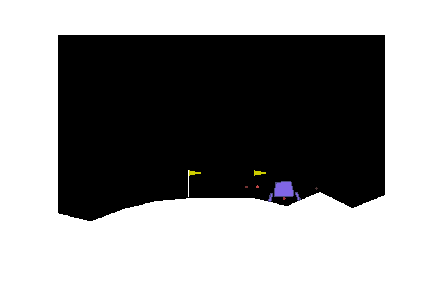
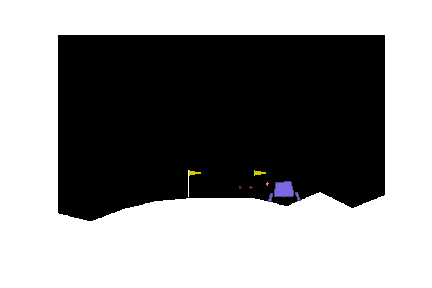
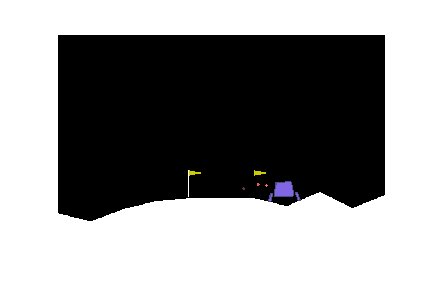
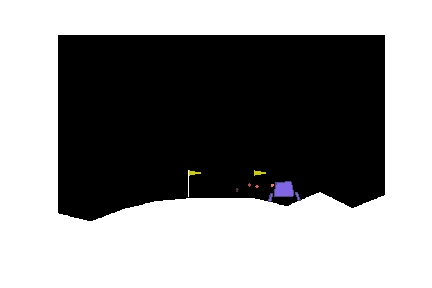
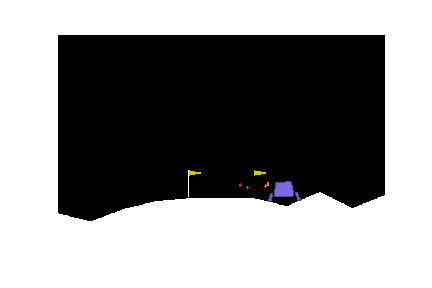
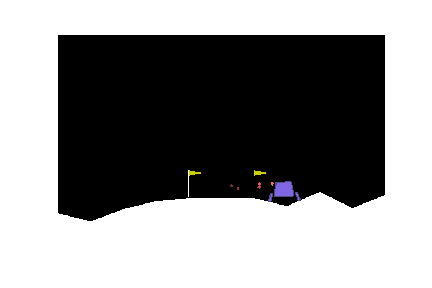
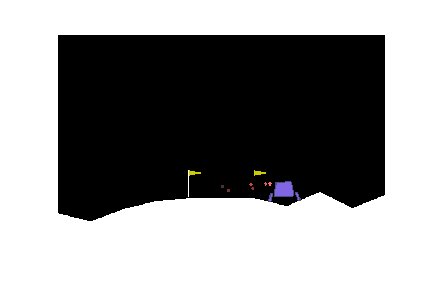
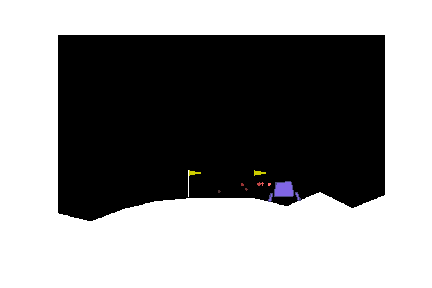
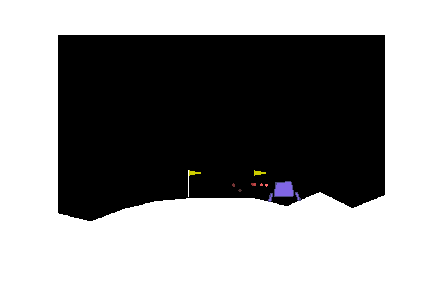
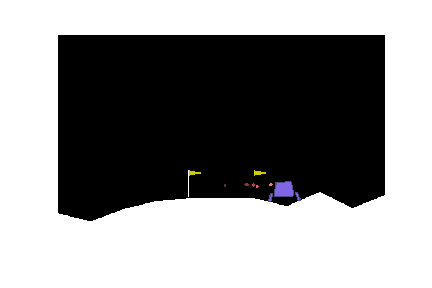
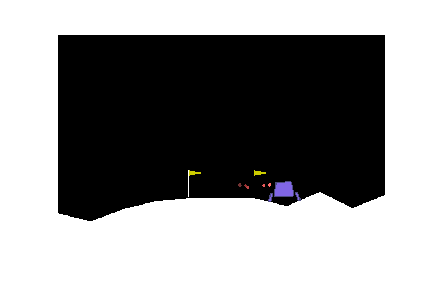
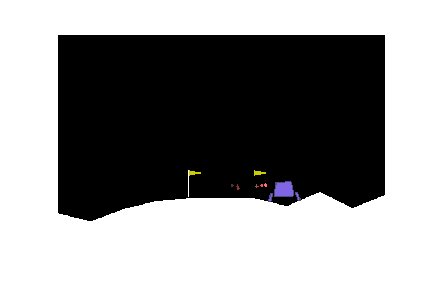
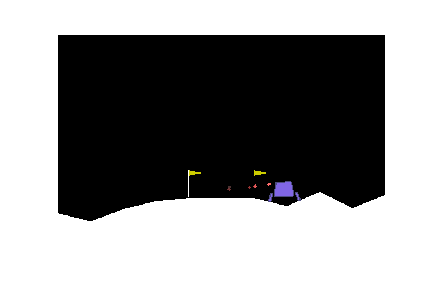
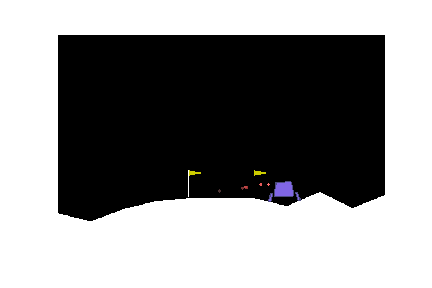
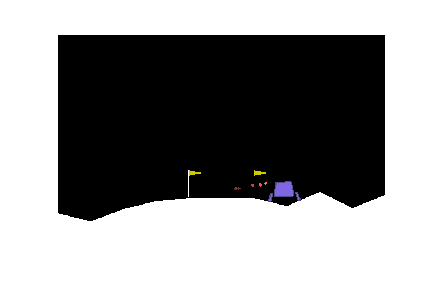
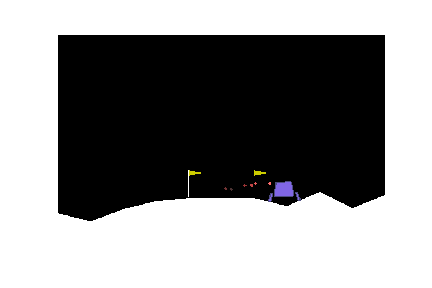
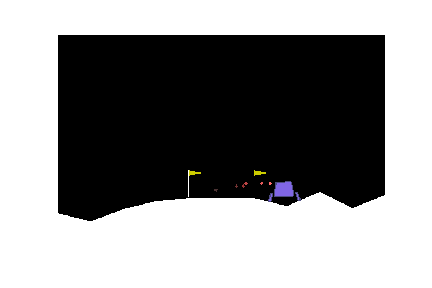
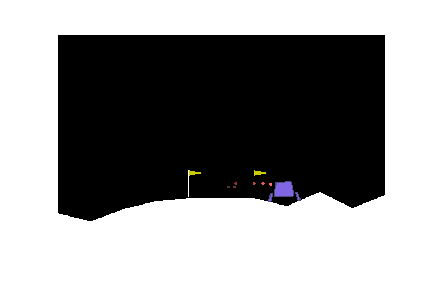
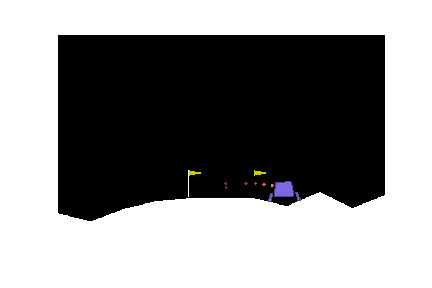
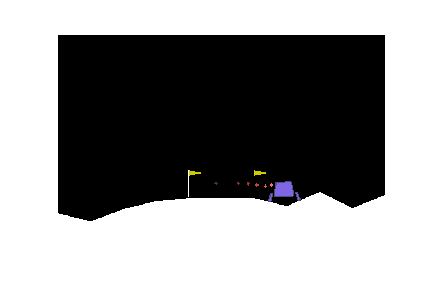
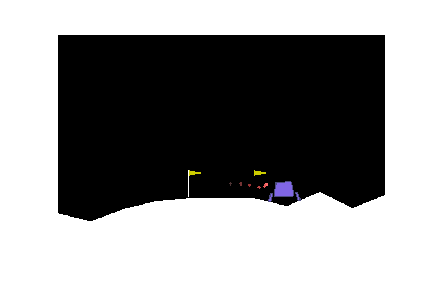
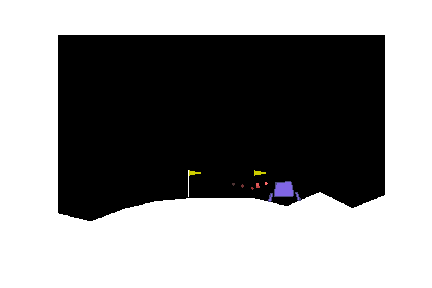
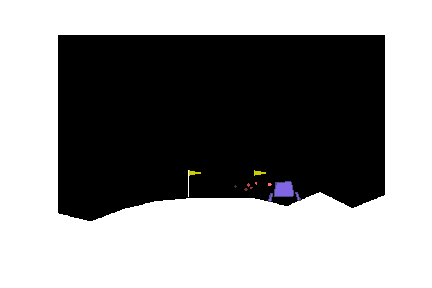
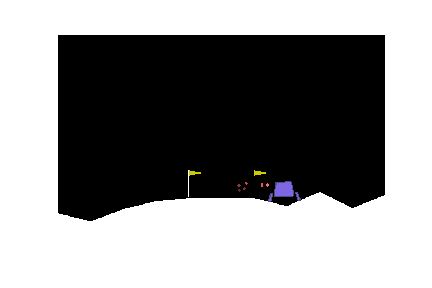
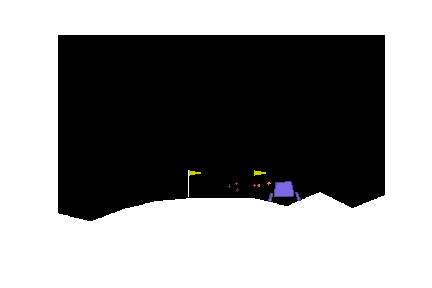
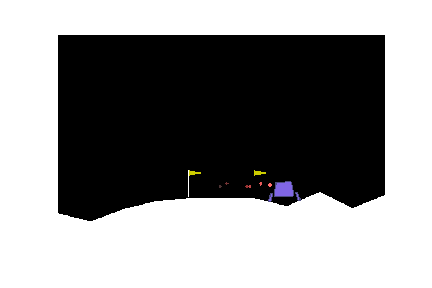
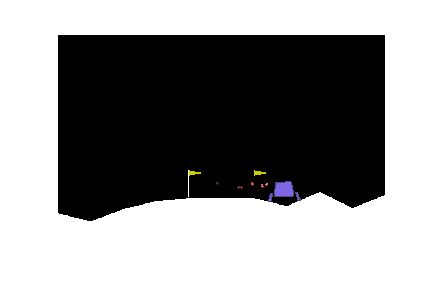
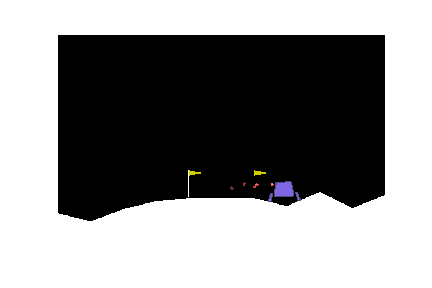

Best of generation 60



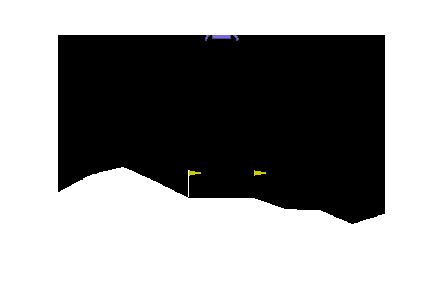
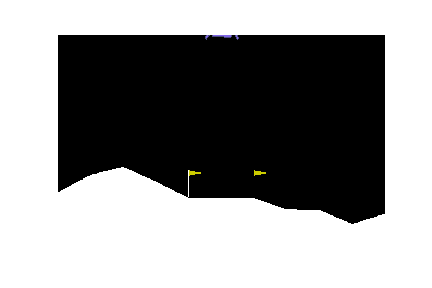
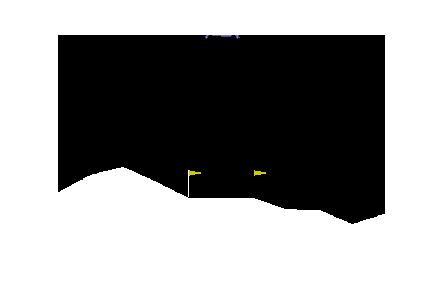
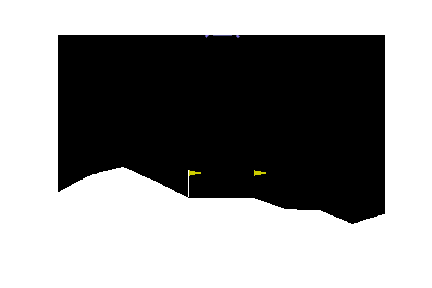
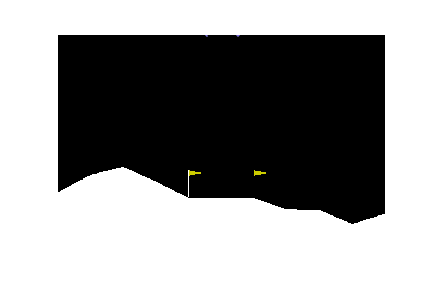
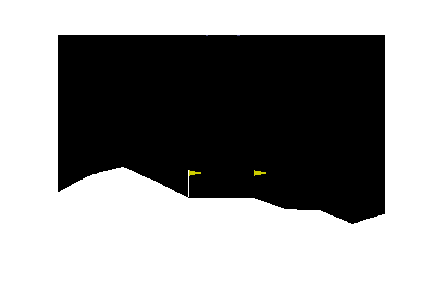
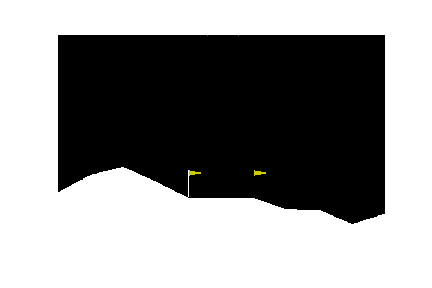
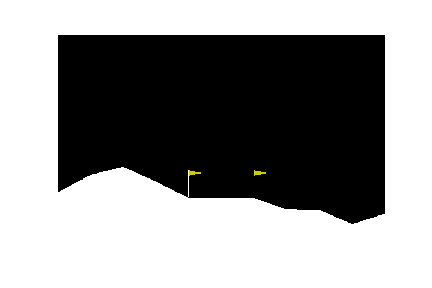
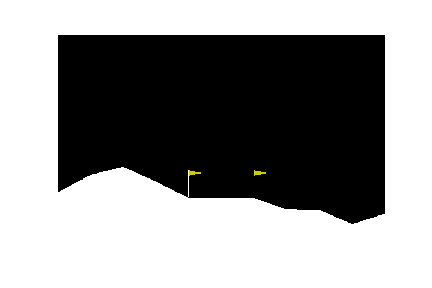
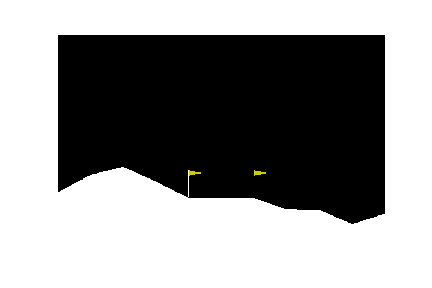
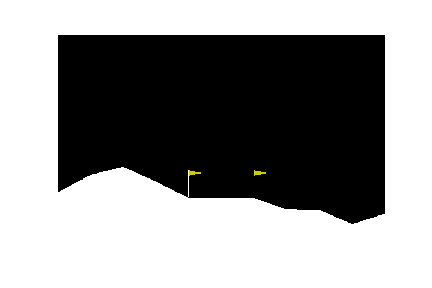
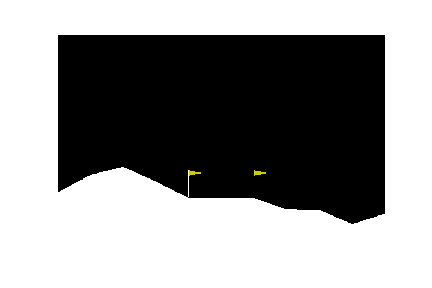
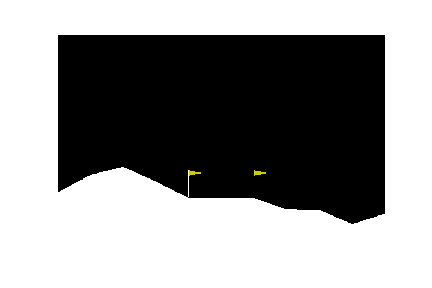
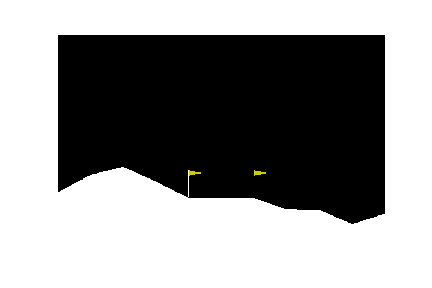
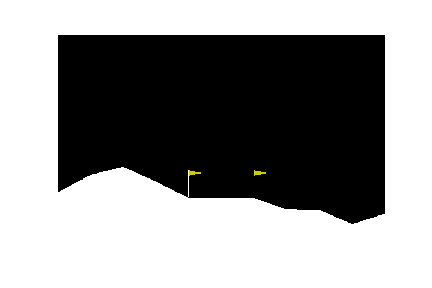
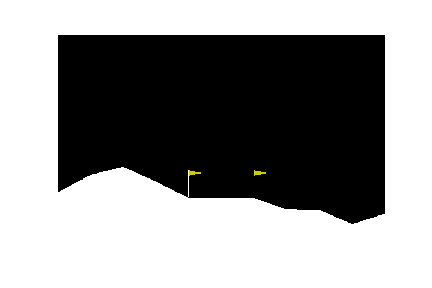
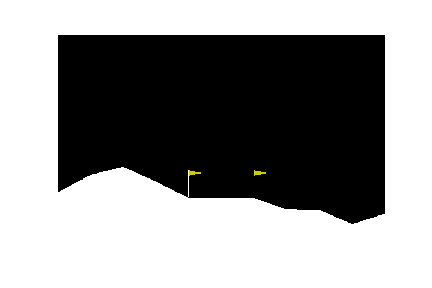
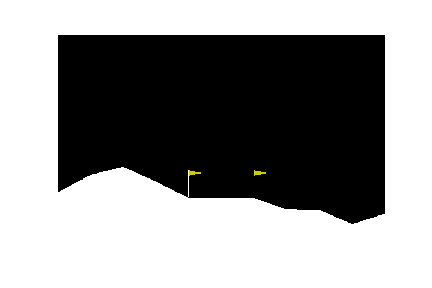
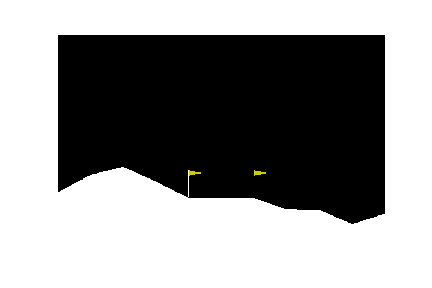
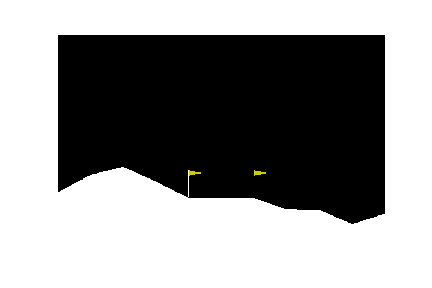
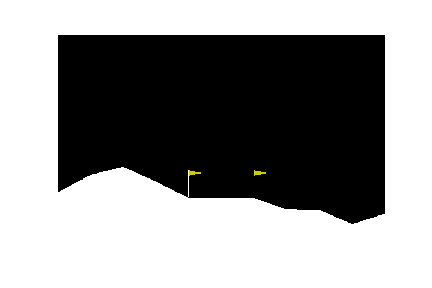
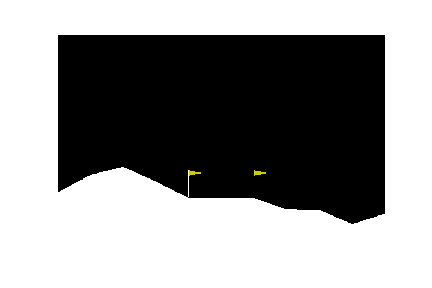
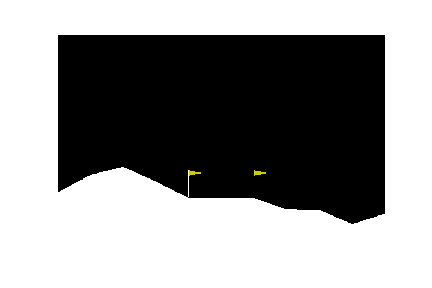
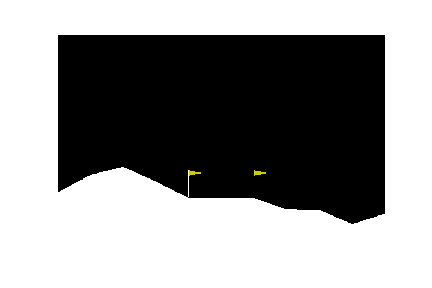
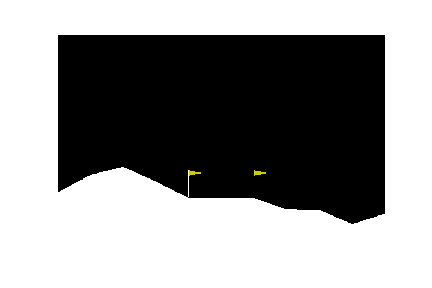
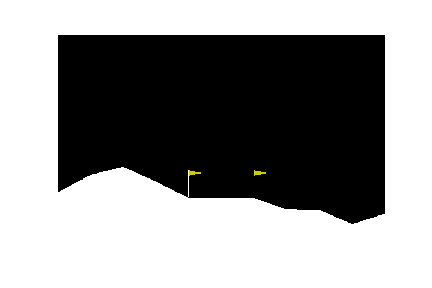
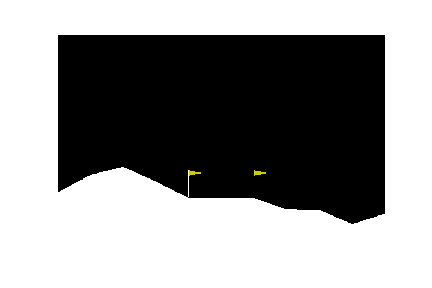
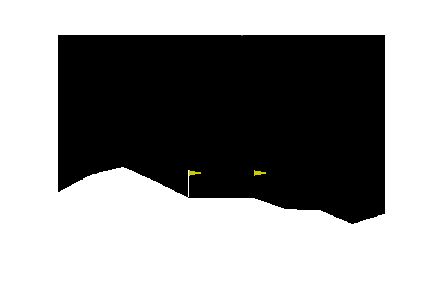
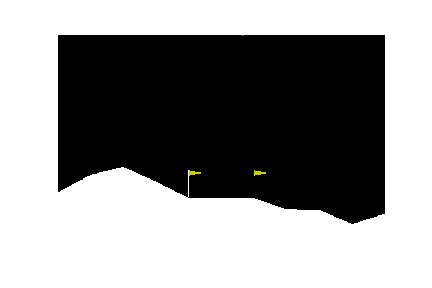
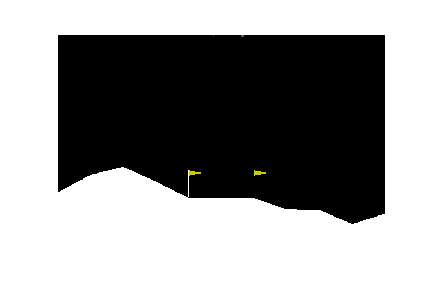
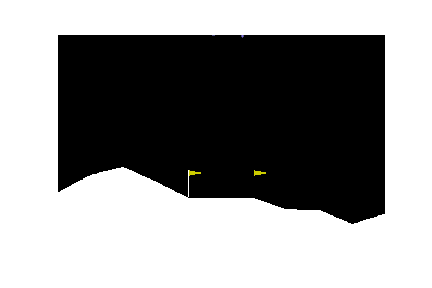
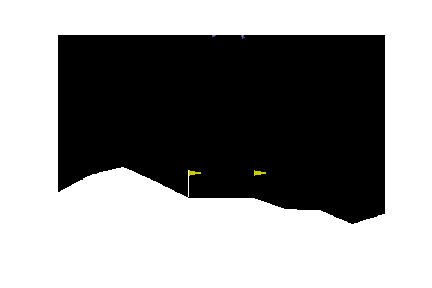
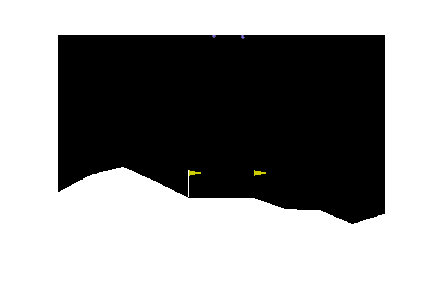
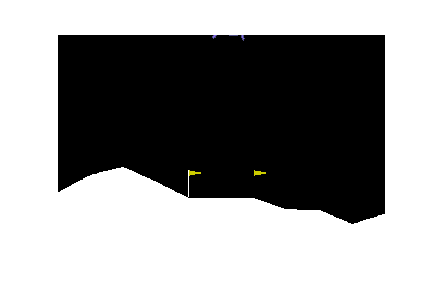
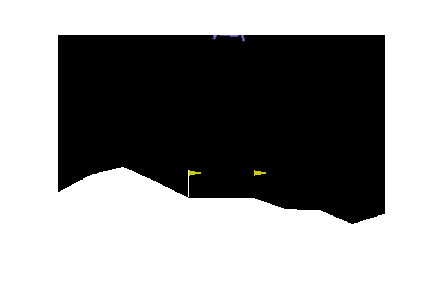
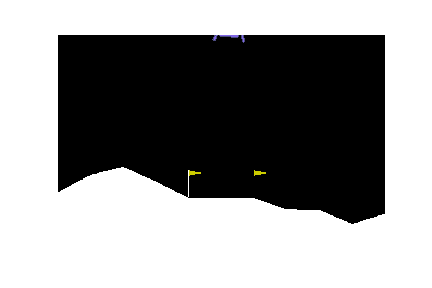
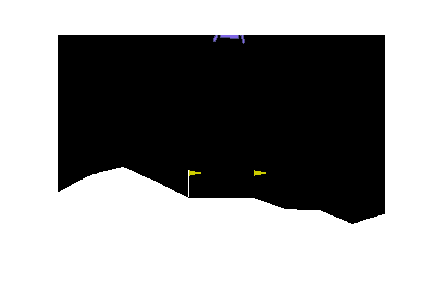
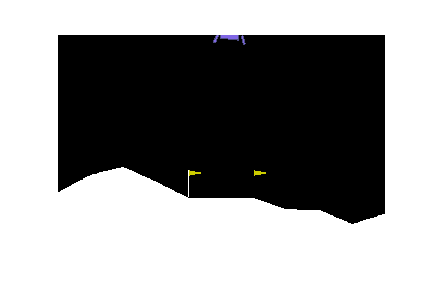
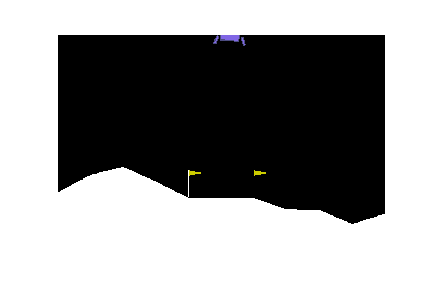
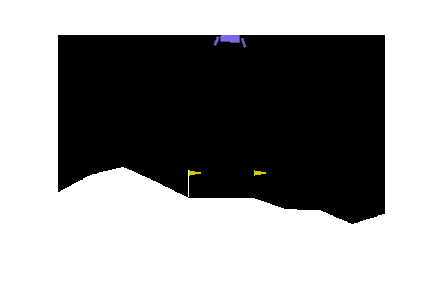
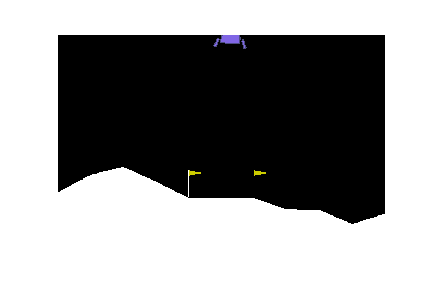
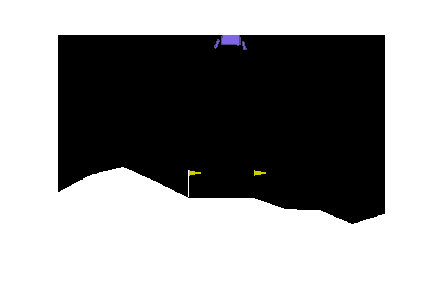
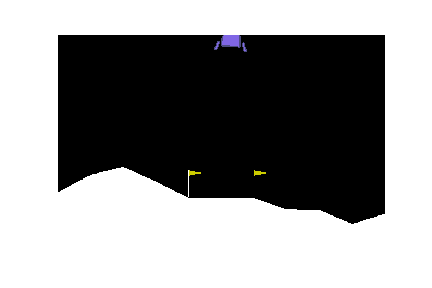
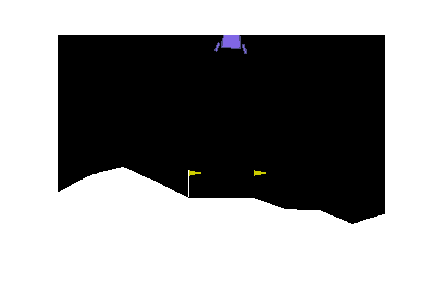
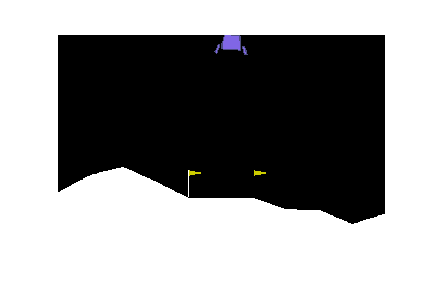
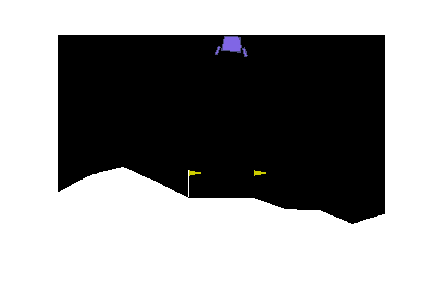
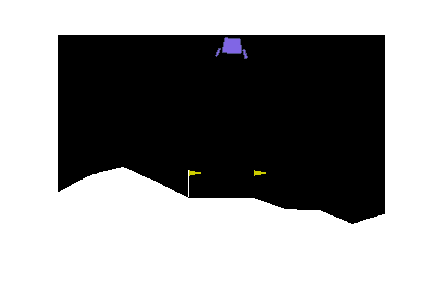
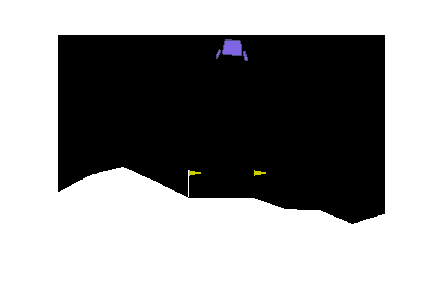
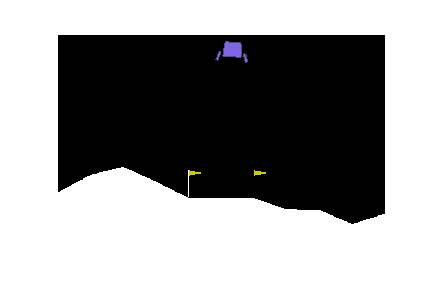
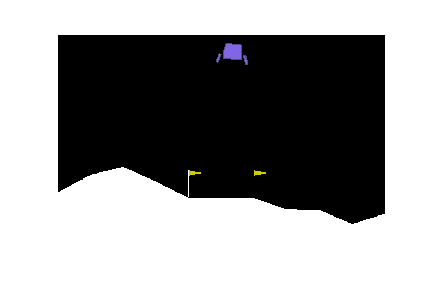
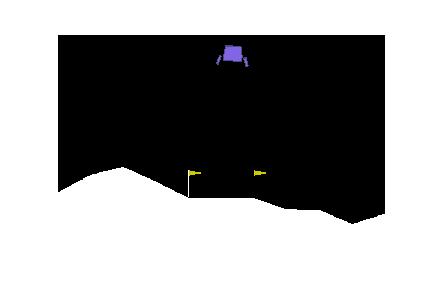
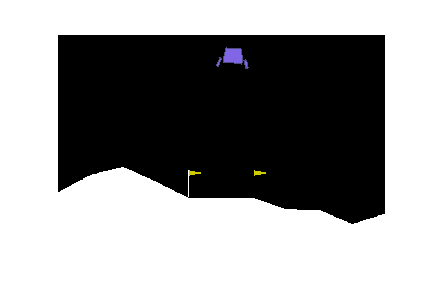
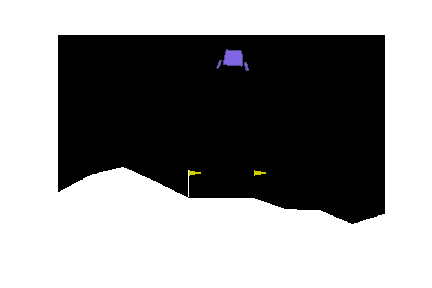
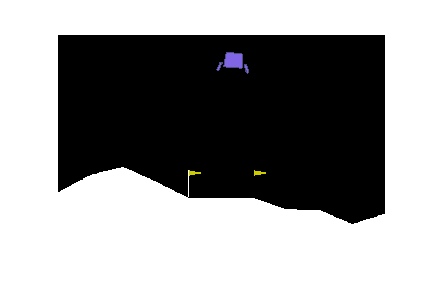
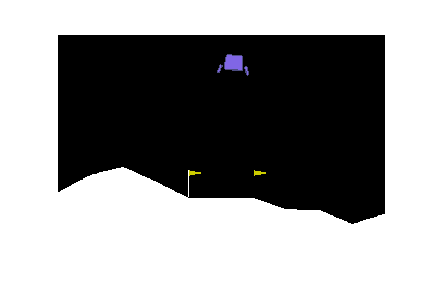
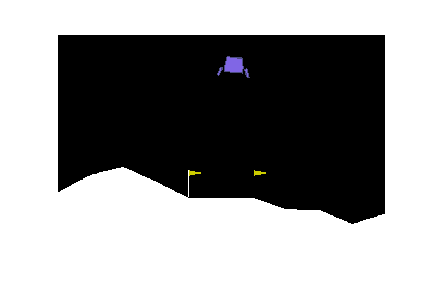
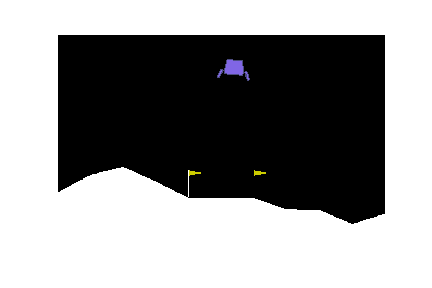
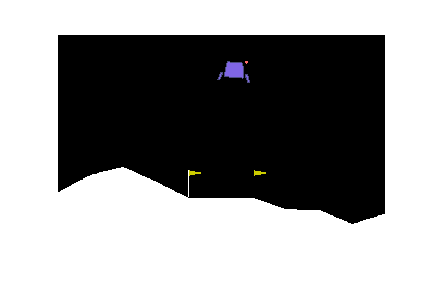
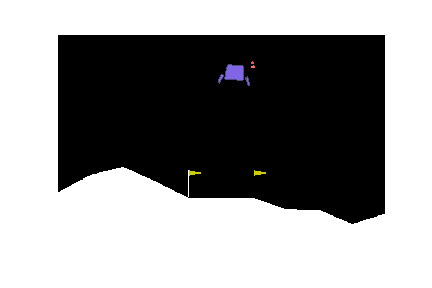
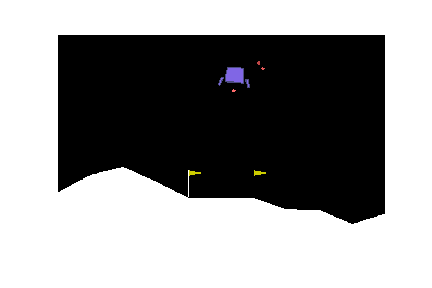
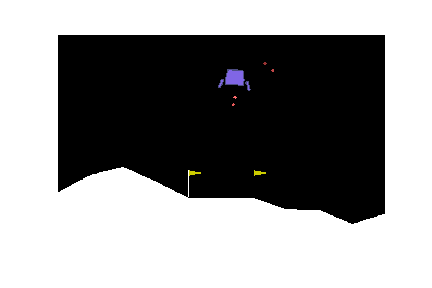
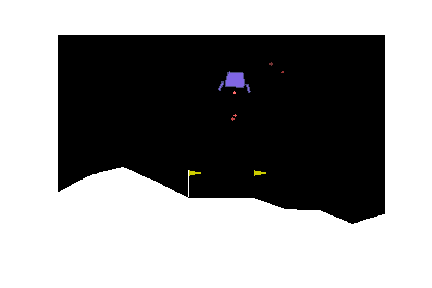
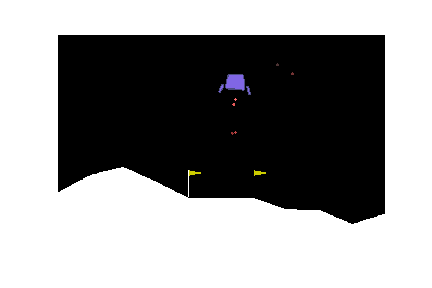
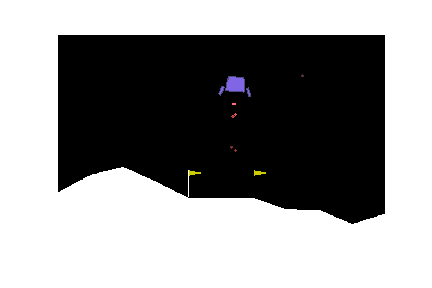
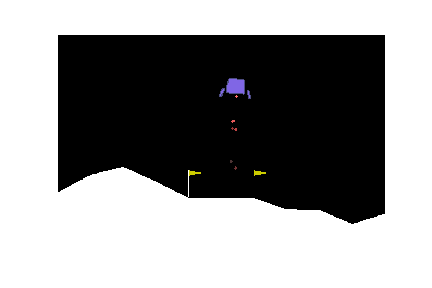
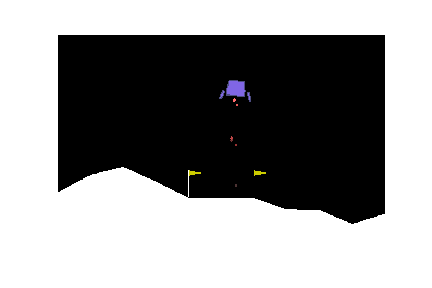
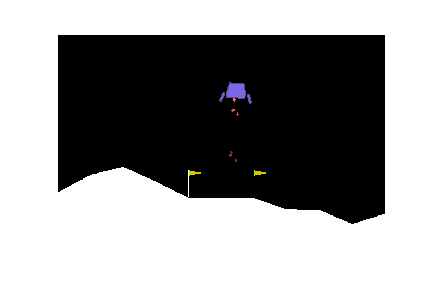
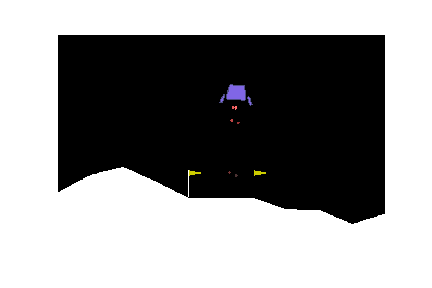
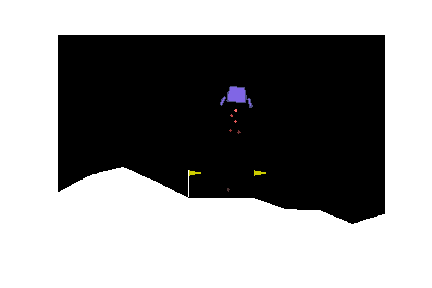
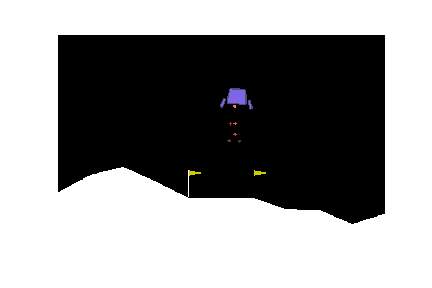
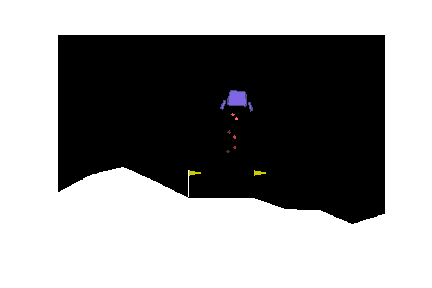
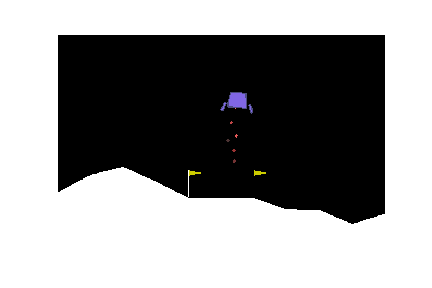
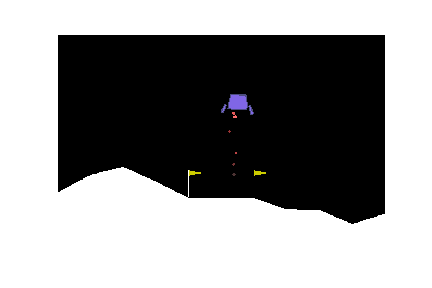
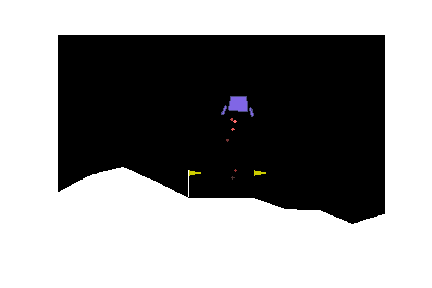
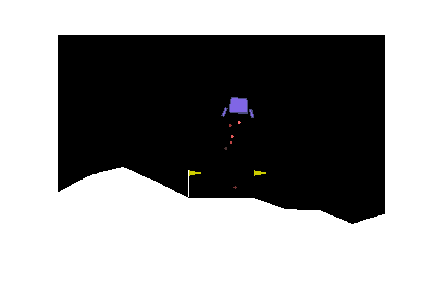
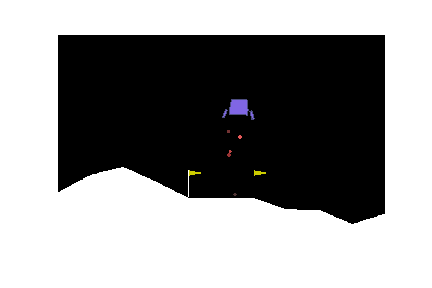
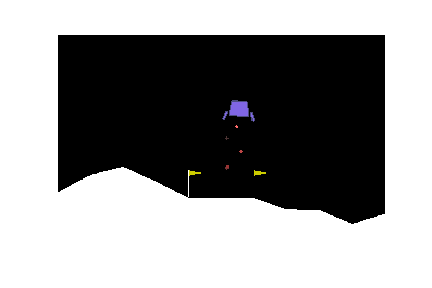
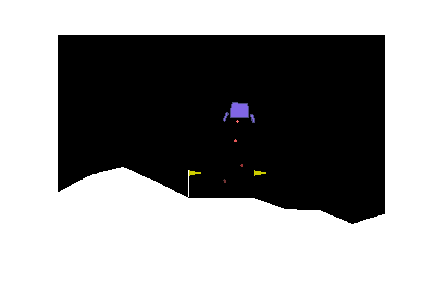
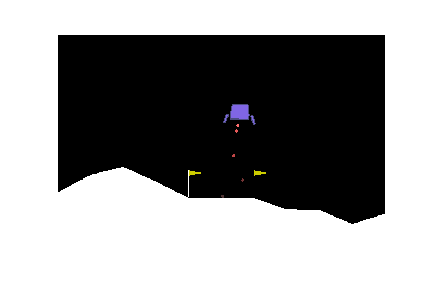
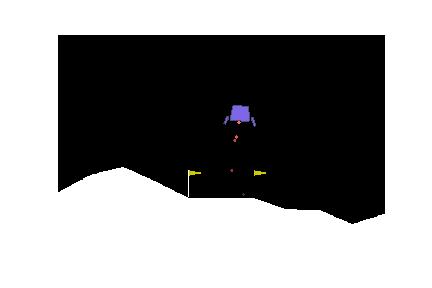
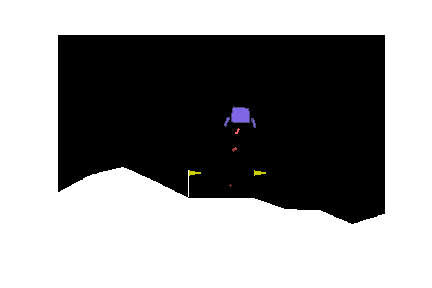
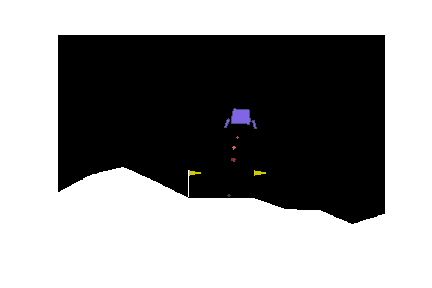
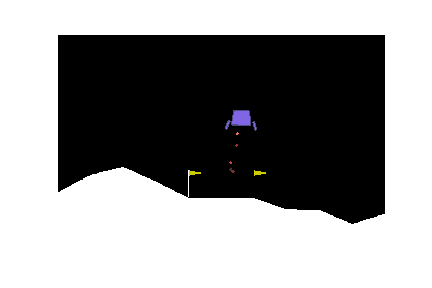
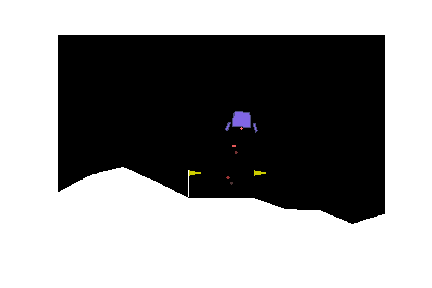
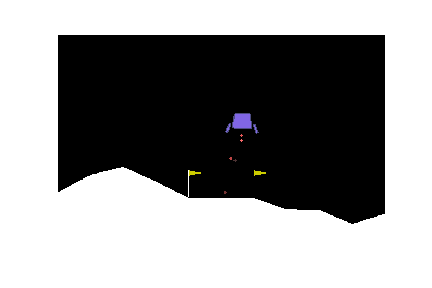
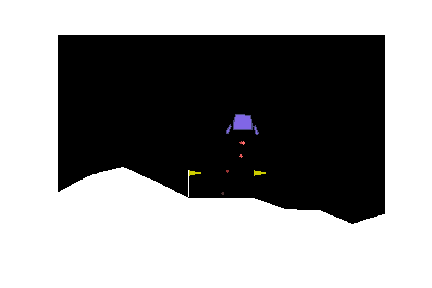
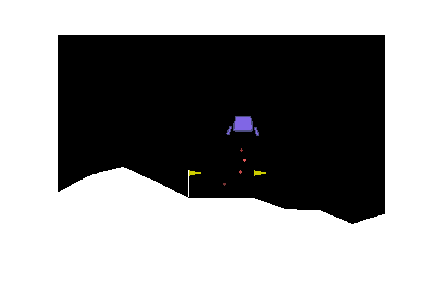
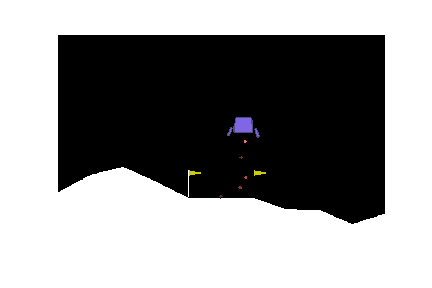
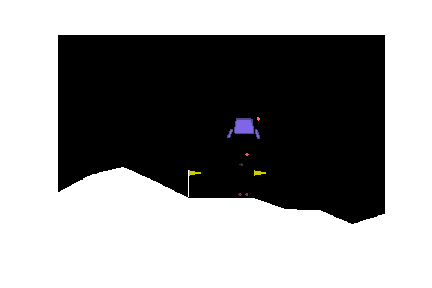
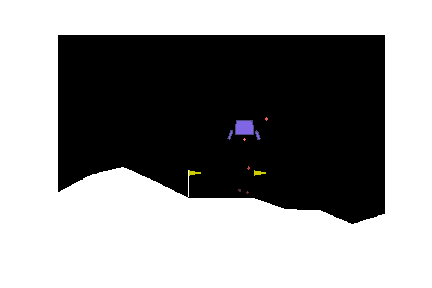
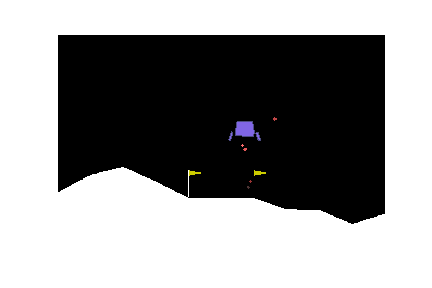
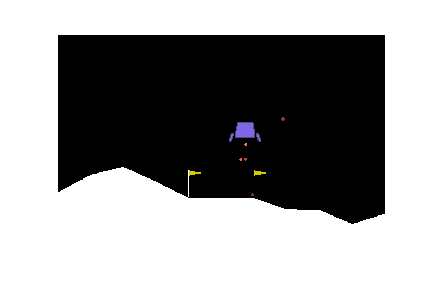
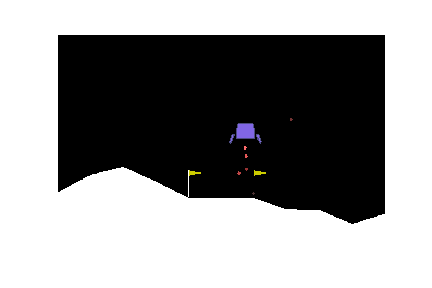
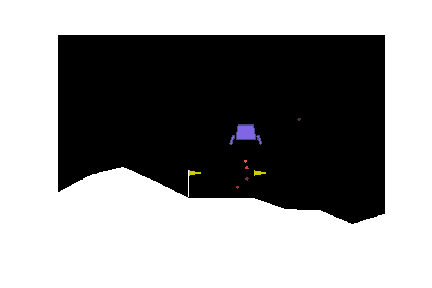
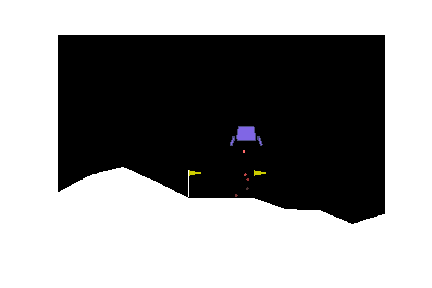
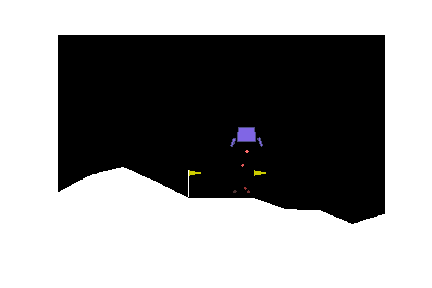
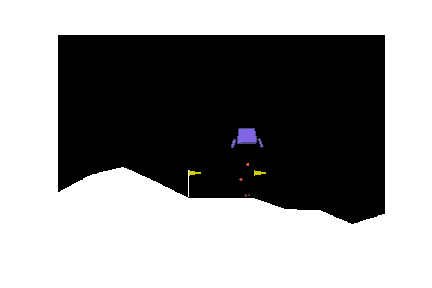
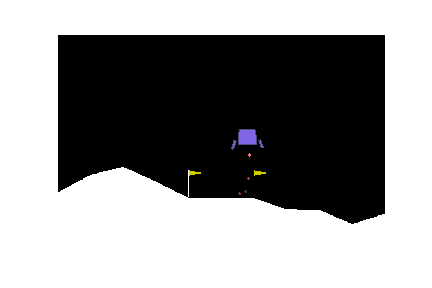
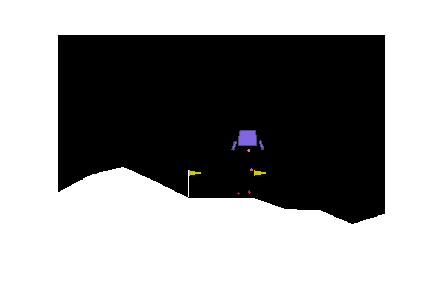
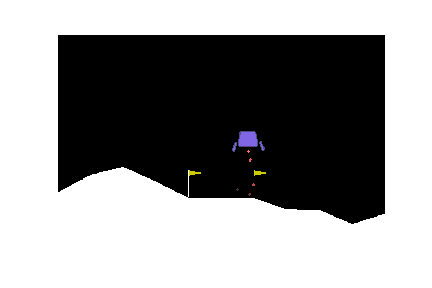
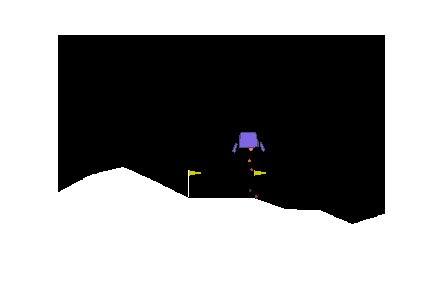
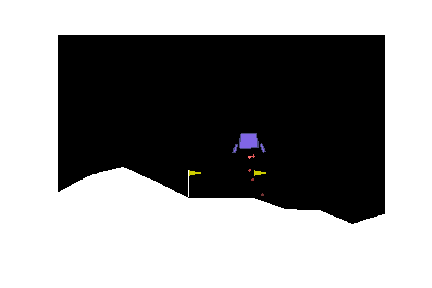
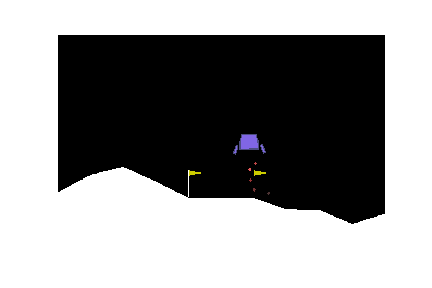
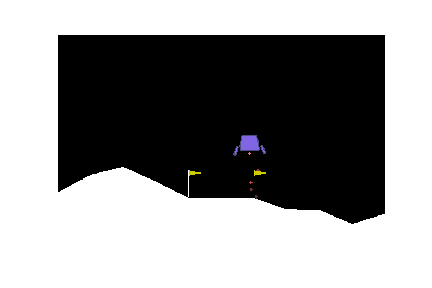
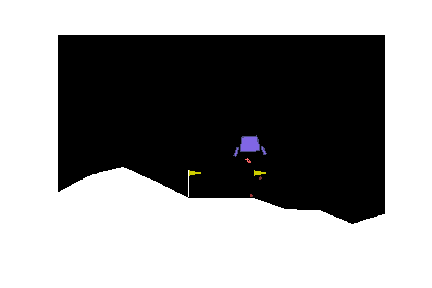
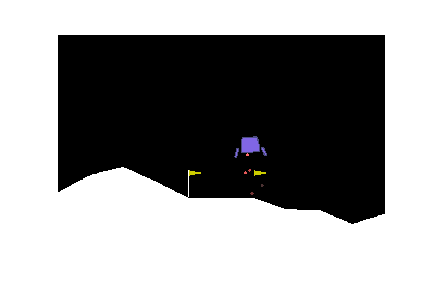
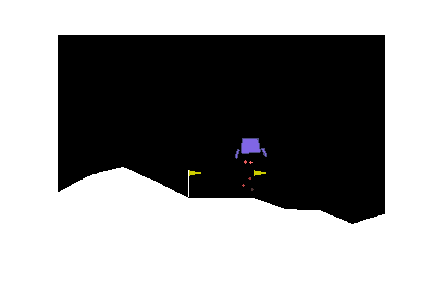
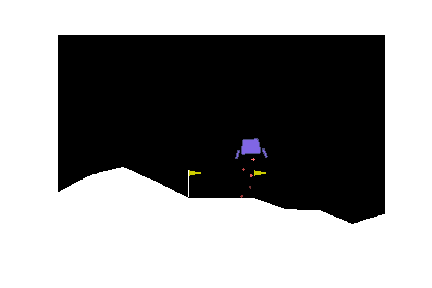
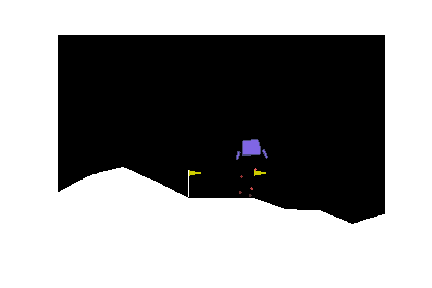
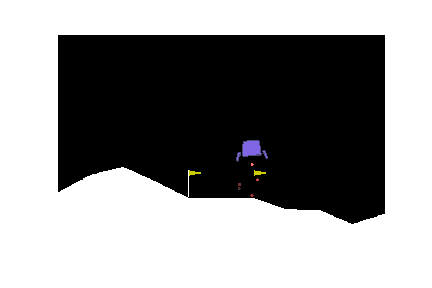
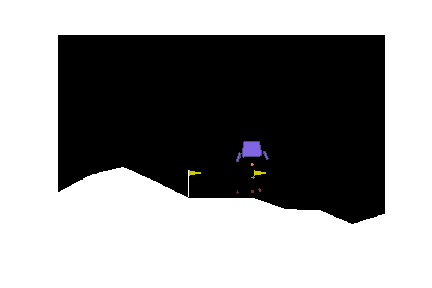
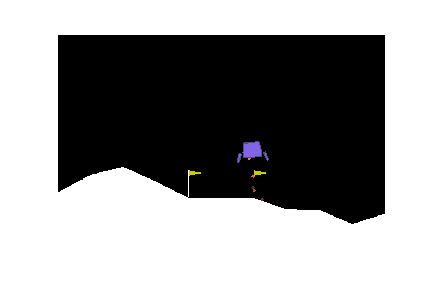
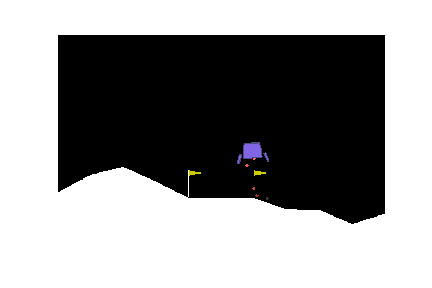
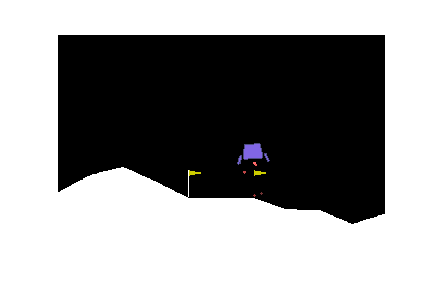
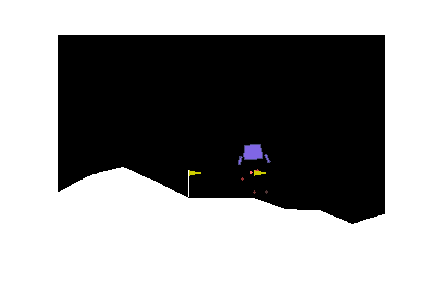
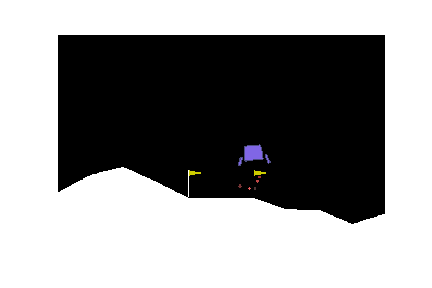
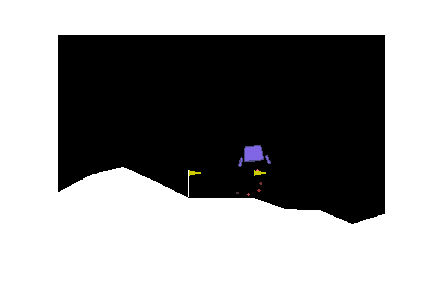
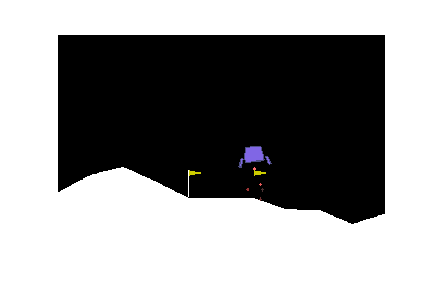
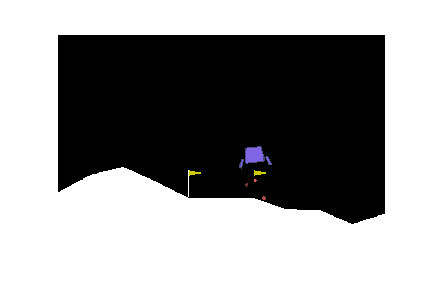
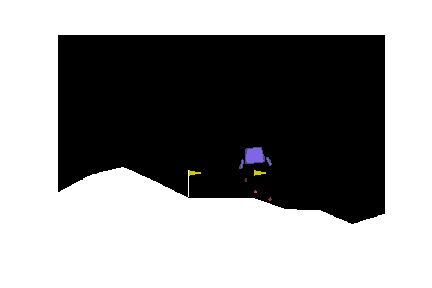
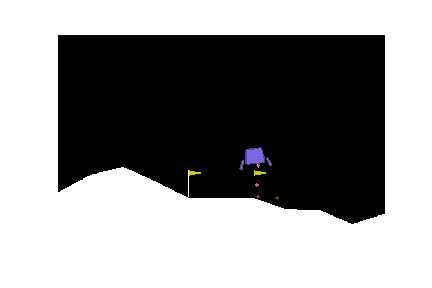
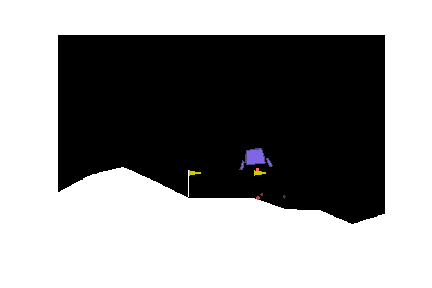
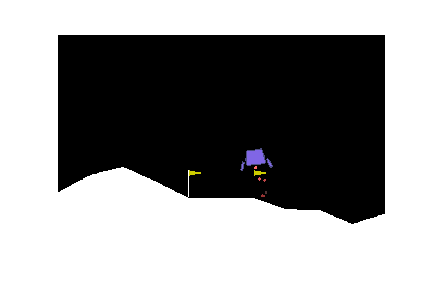
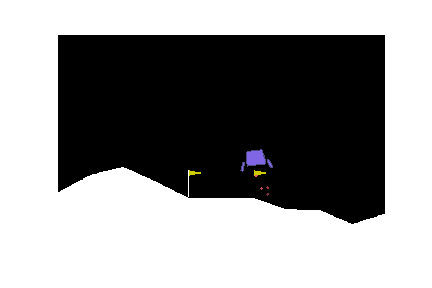
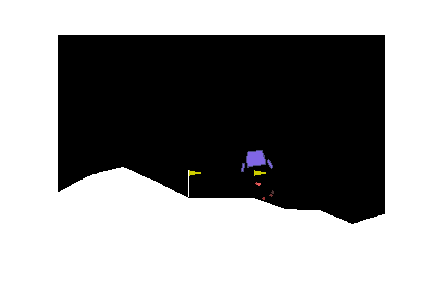
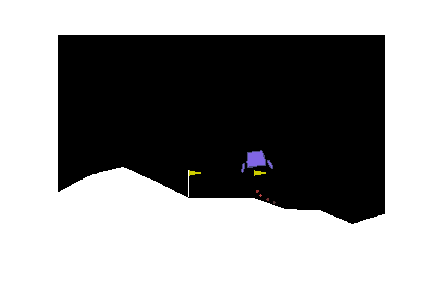
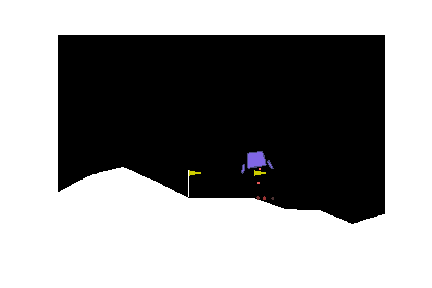
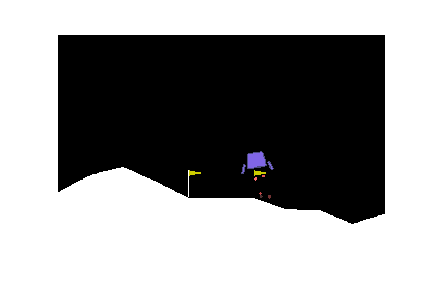
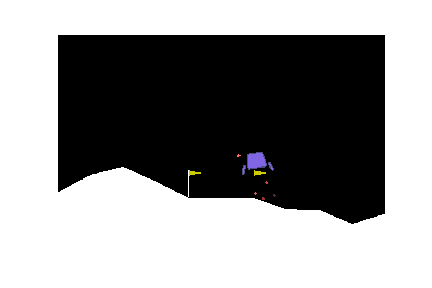
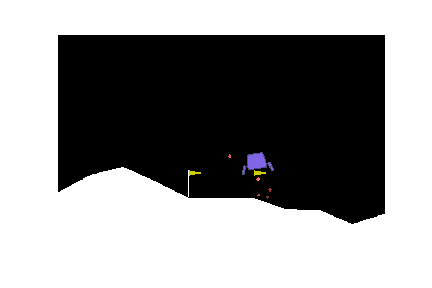
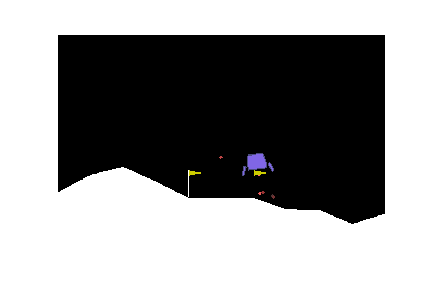
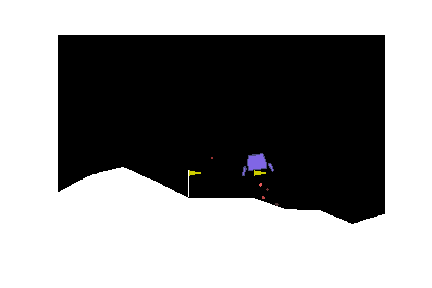
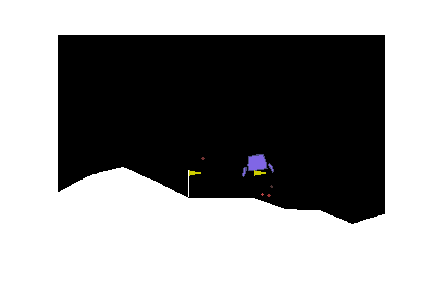
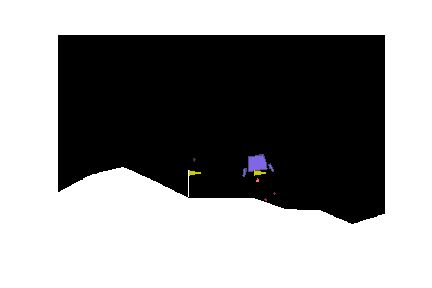
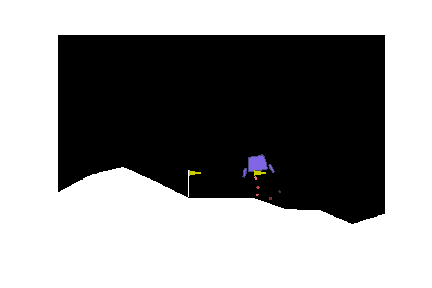
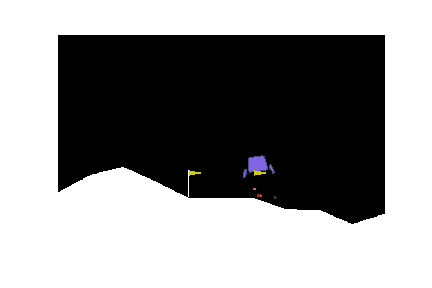
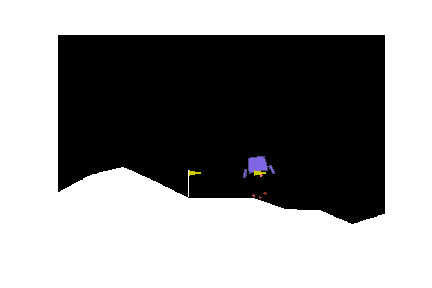
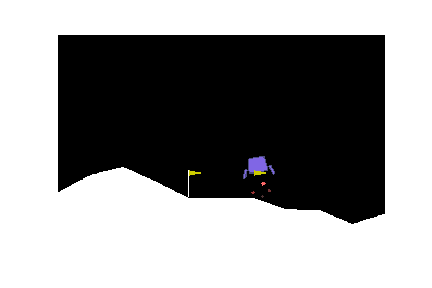
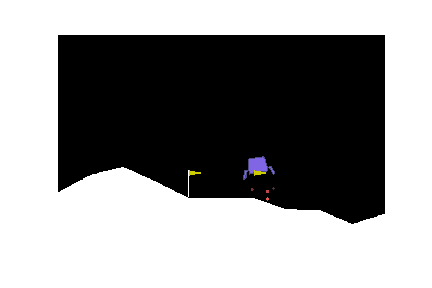
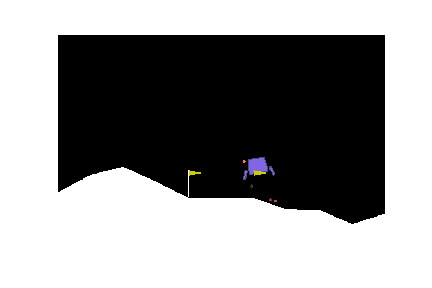
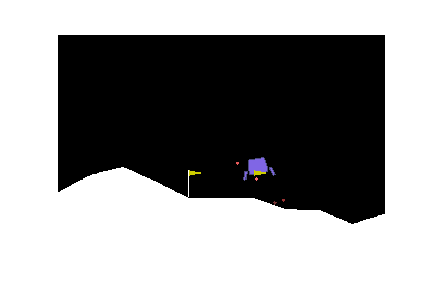
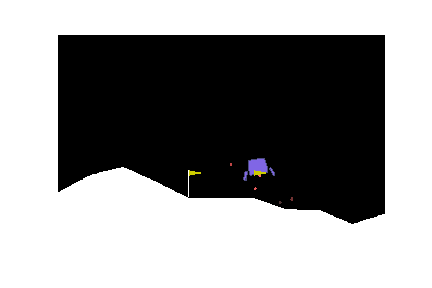
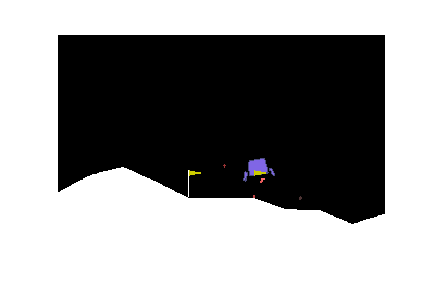
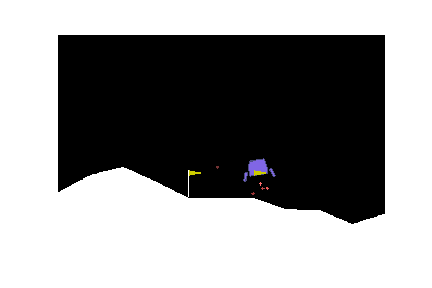
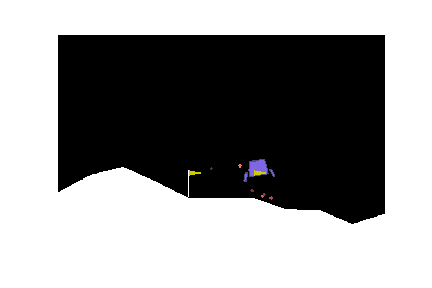
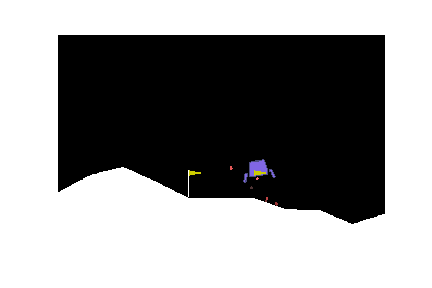
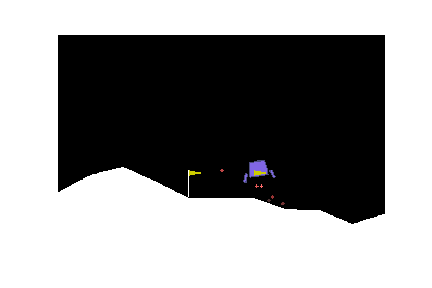
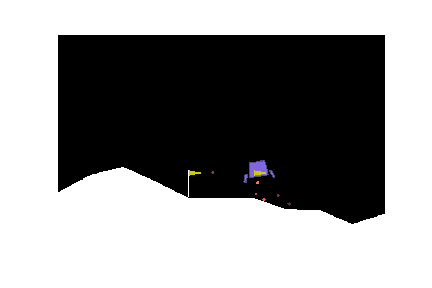
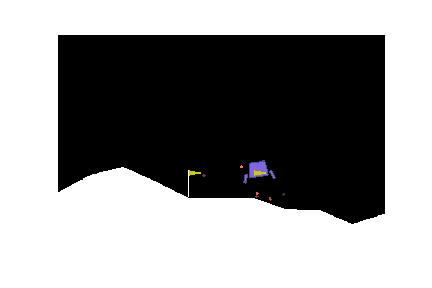
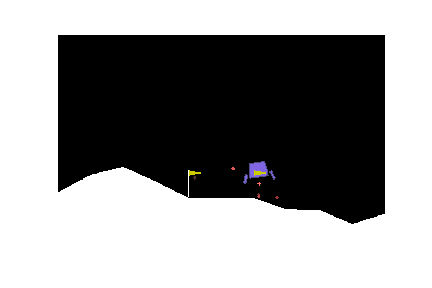
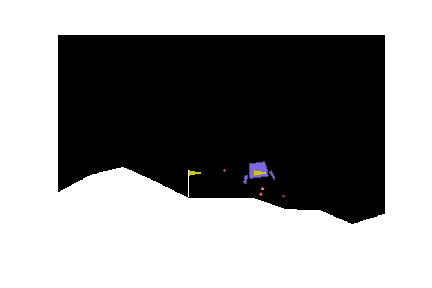
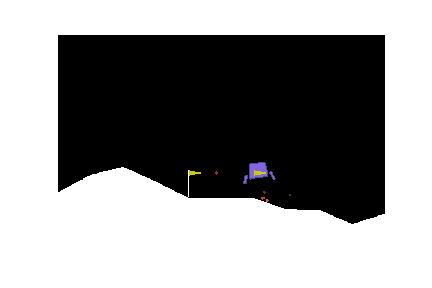
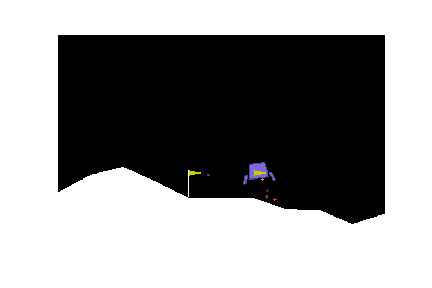
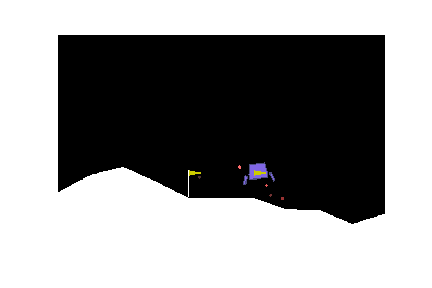
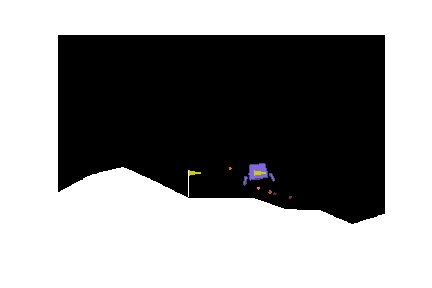
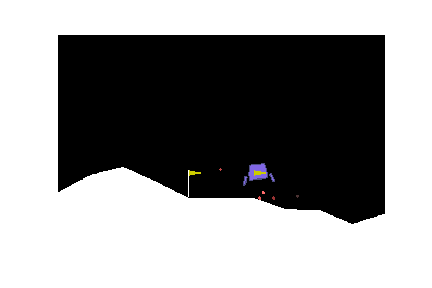
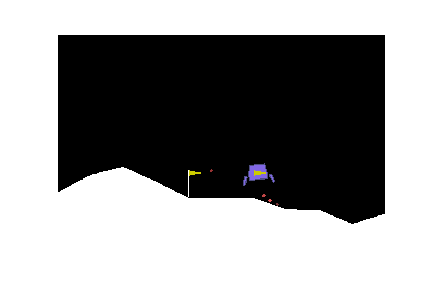
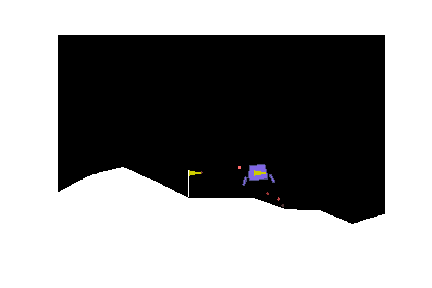
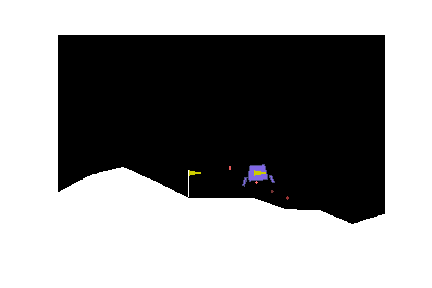
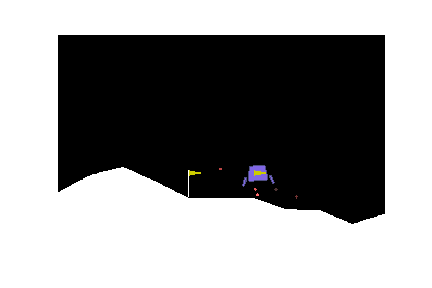
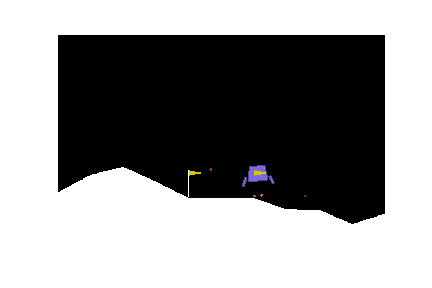
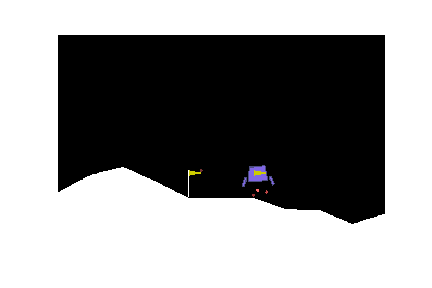
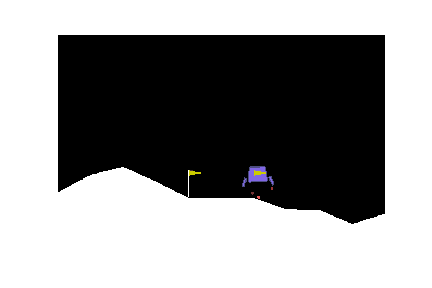
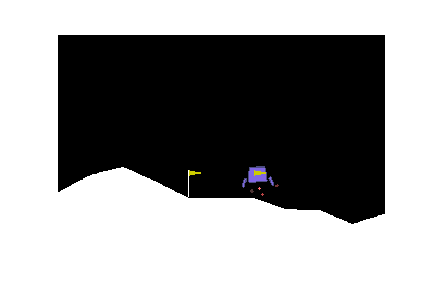
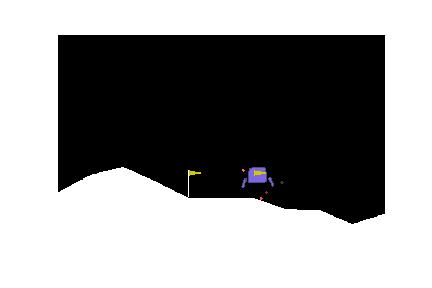
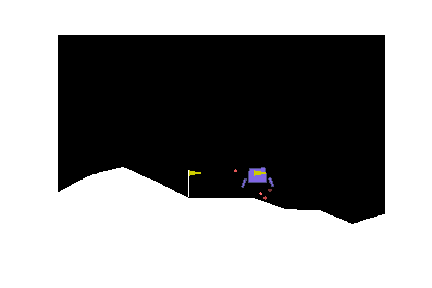
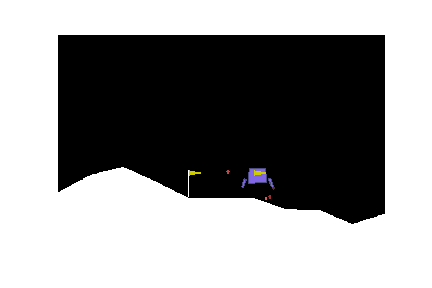
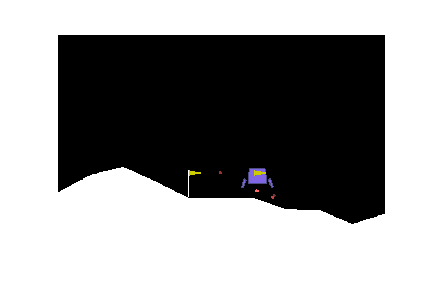
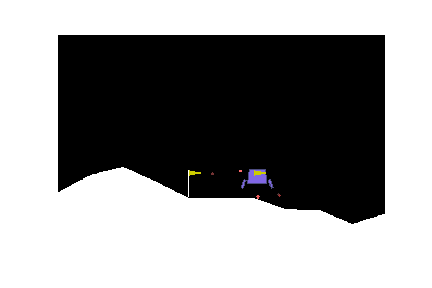
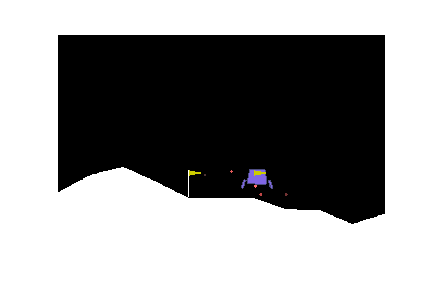
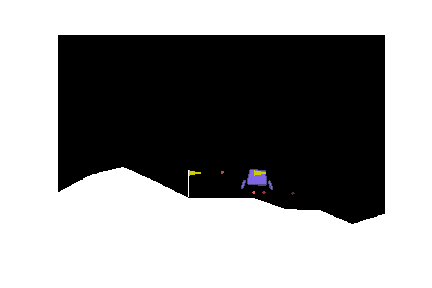
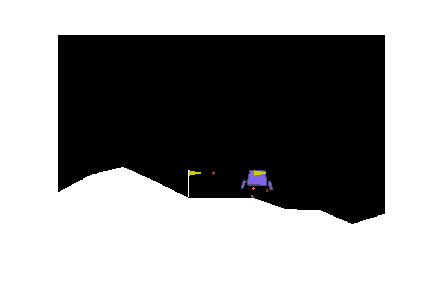
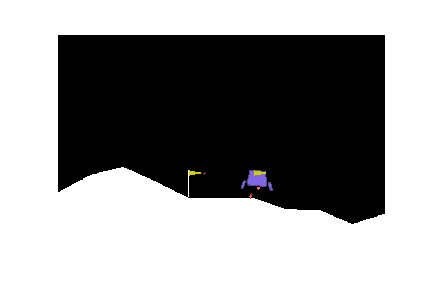
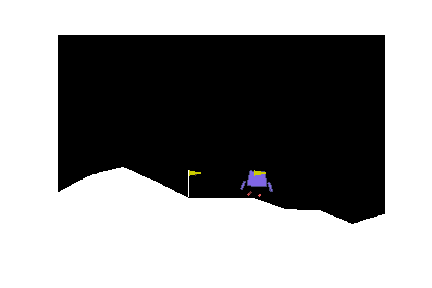
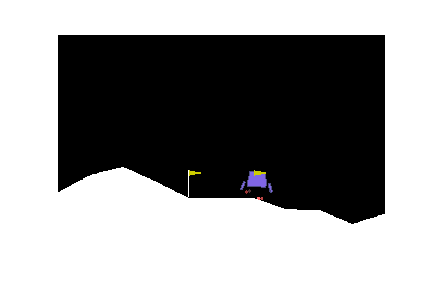
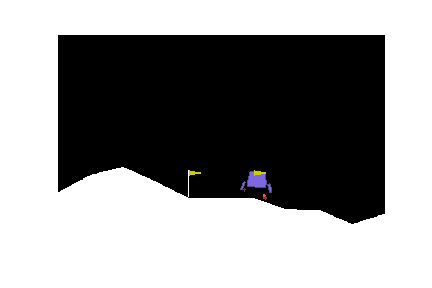
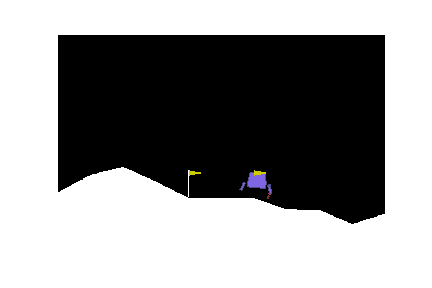
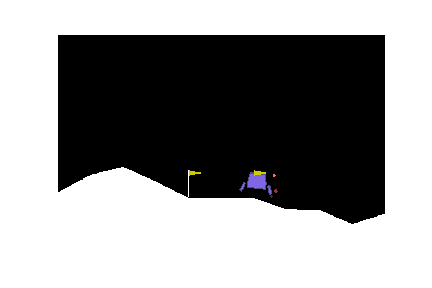
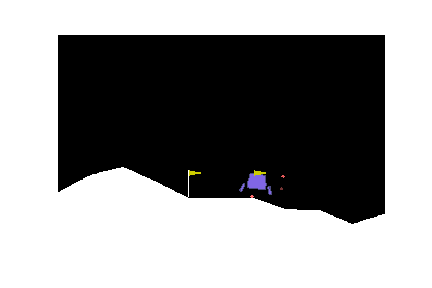
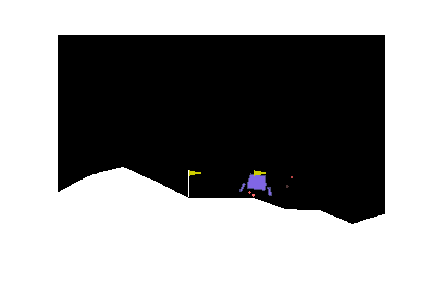
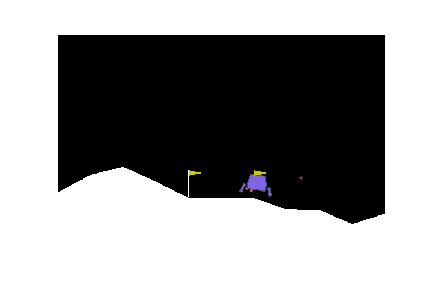
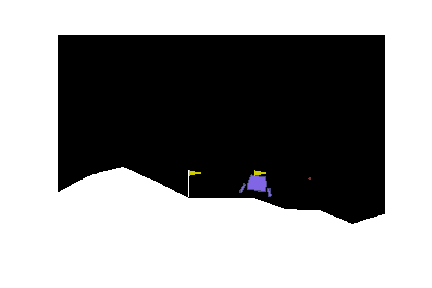
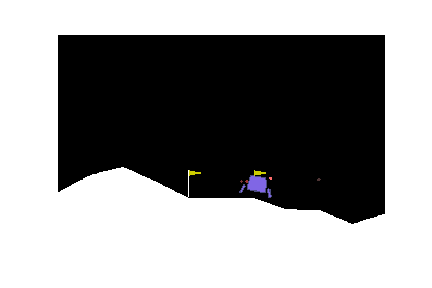
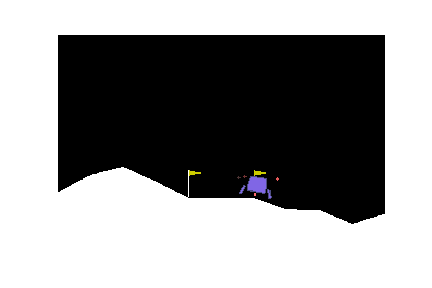
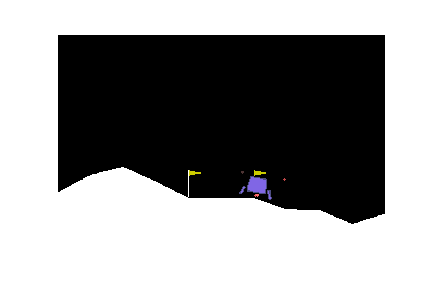
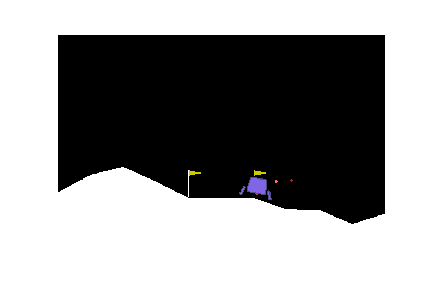
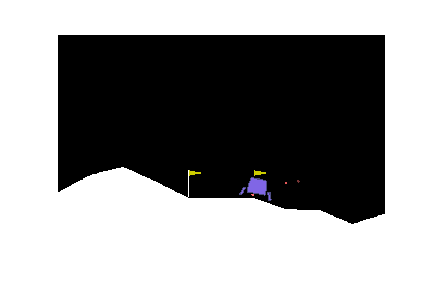
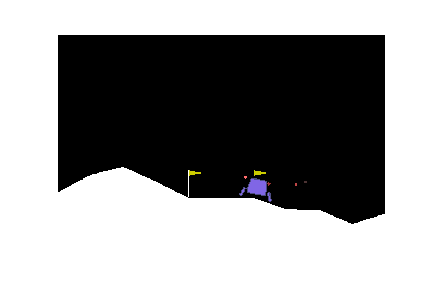
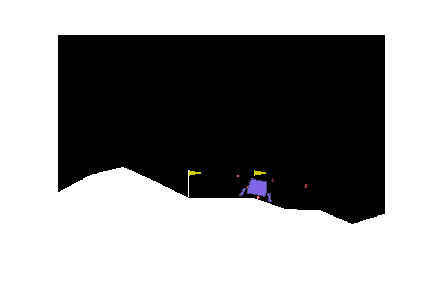
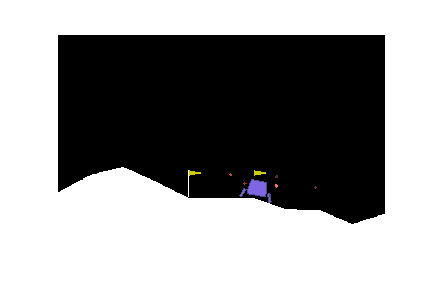
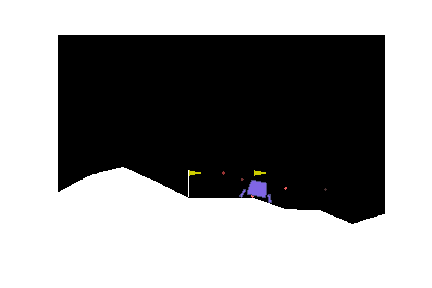
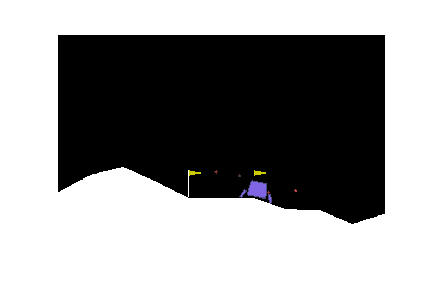
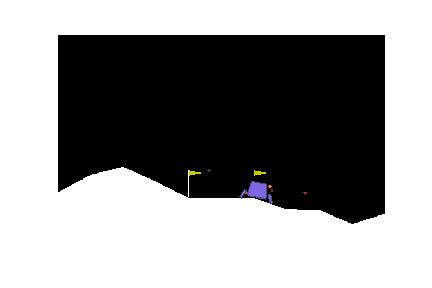
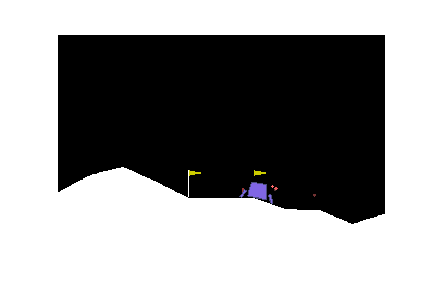
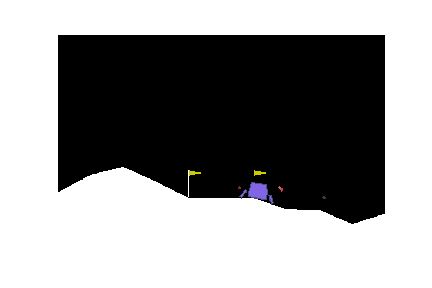

Best of generation 70



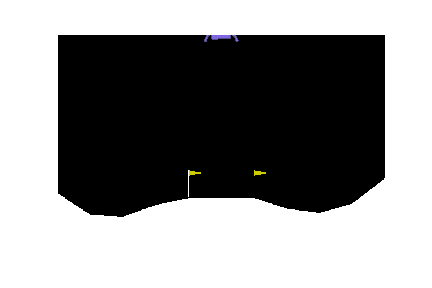
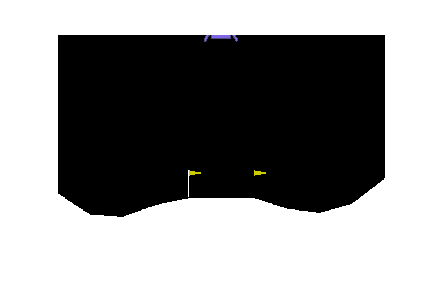
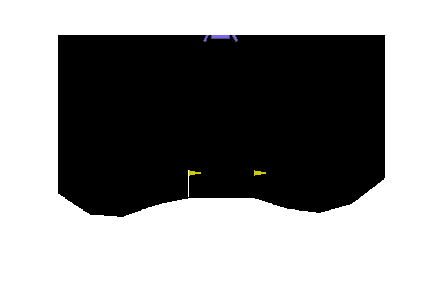
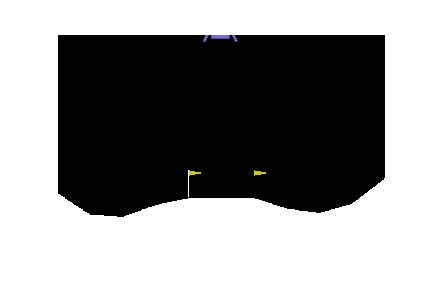
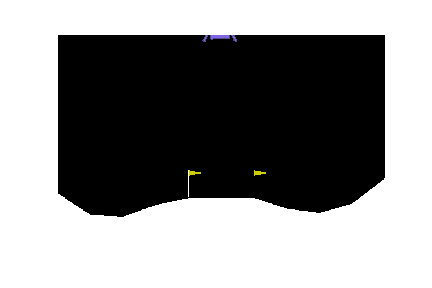
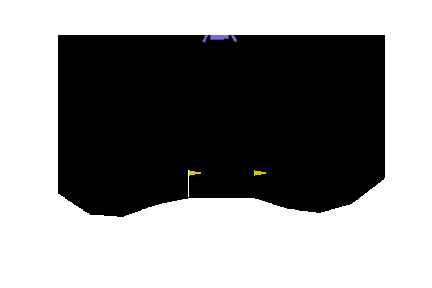
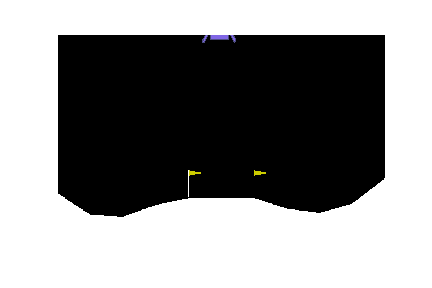
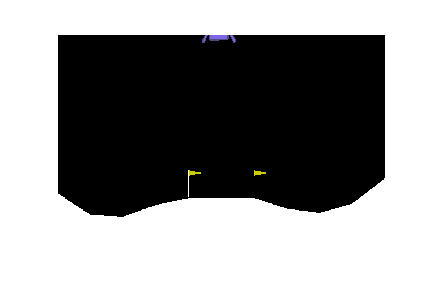
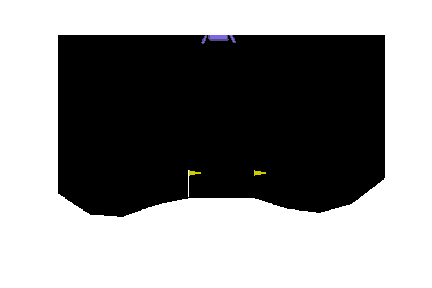
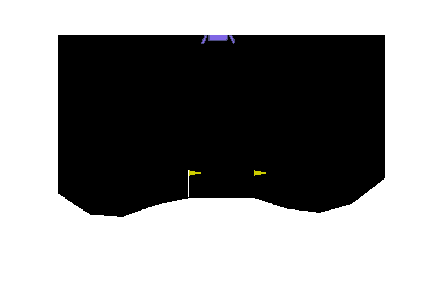
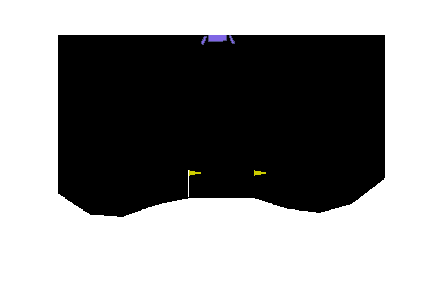
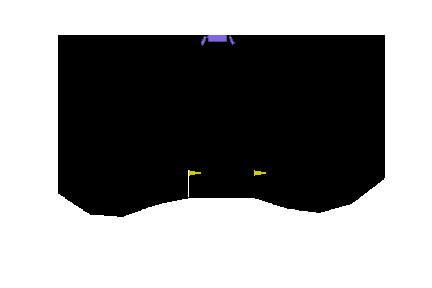
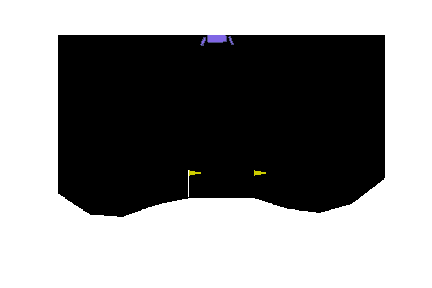
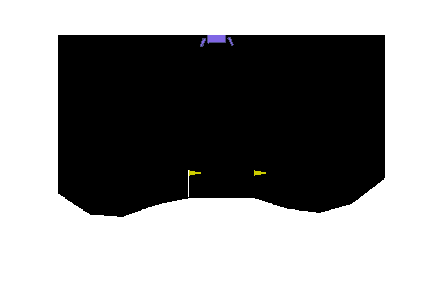
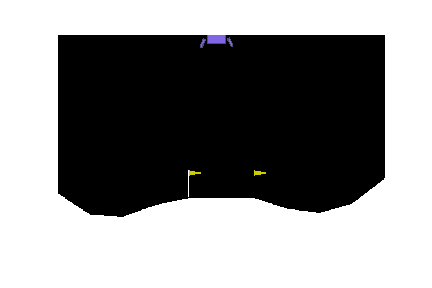
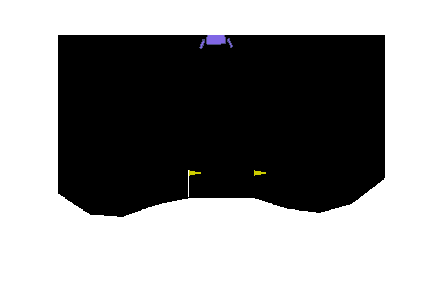
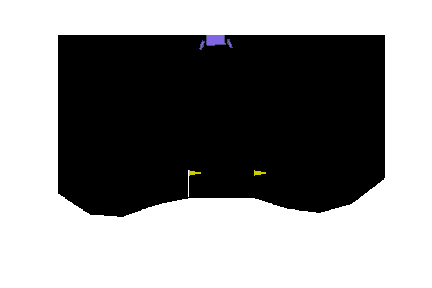
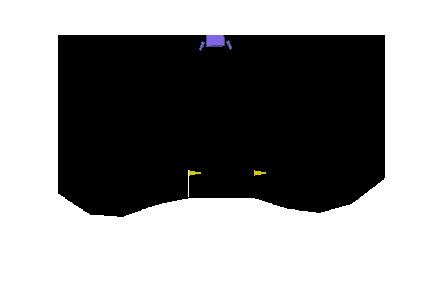
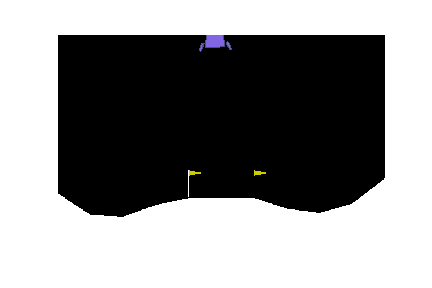
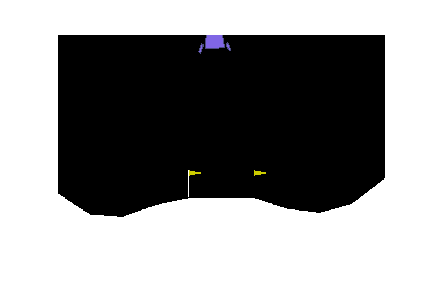
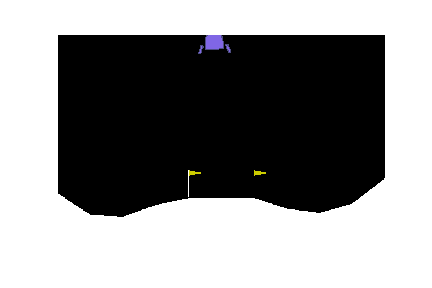
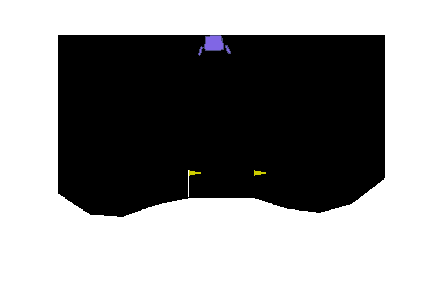
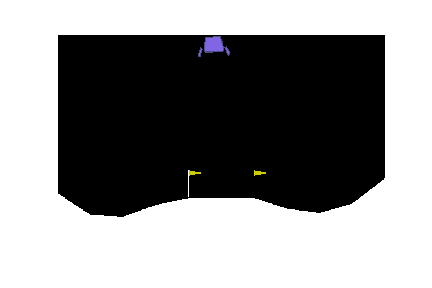
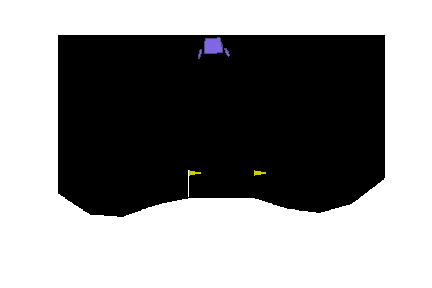
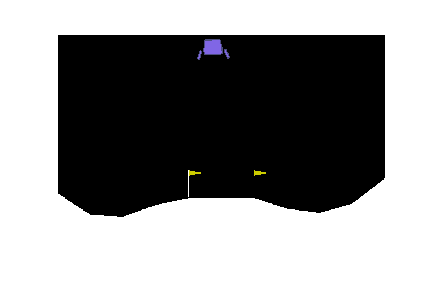
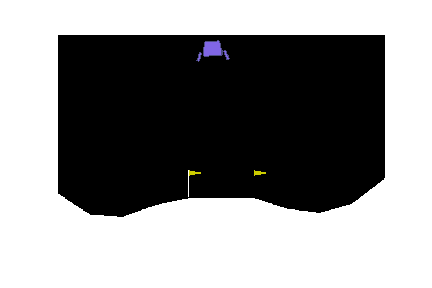
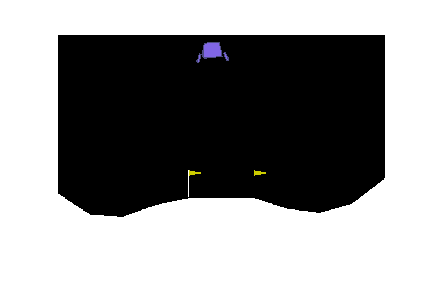
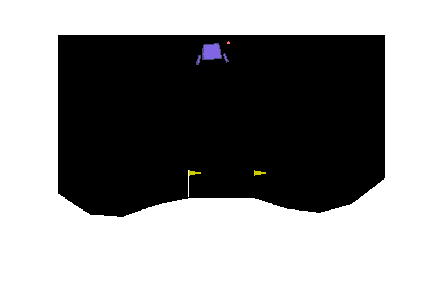
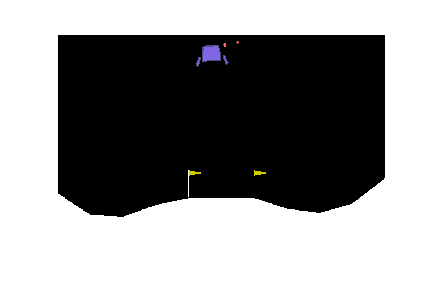
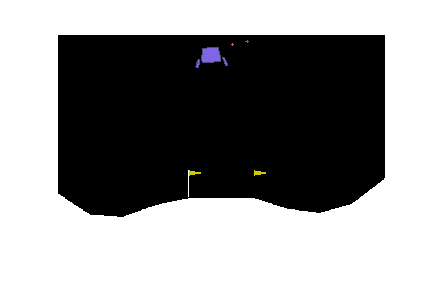
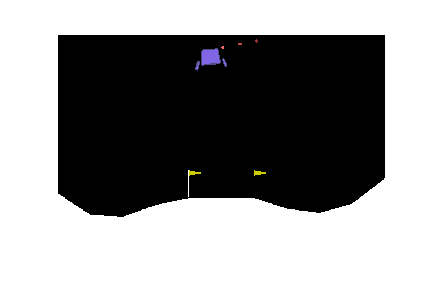
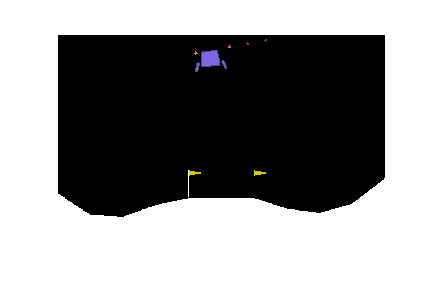
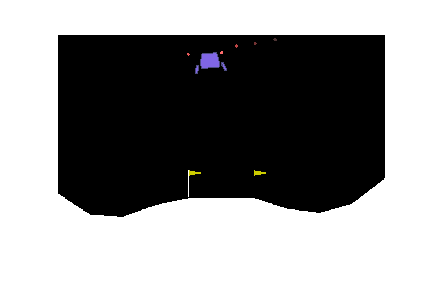
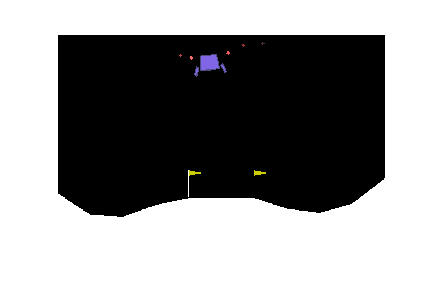
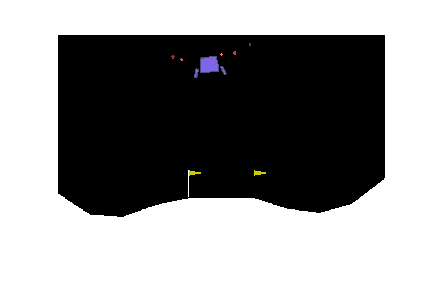
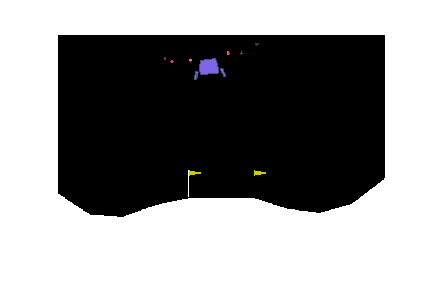
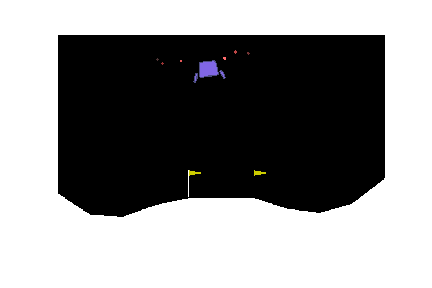
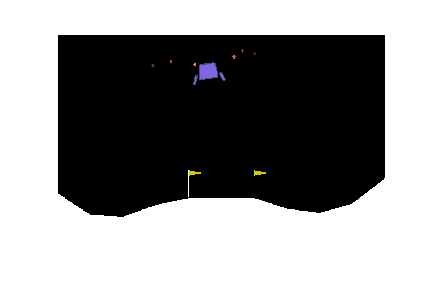
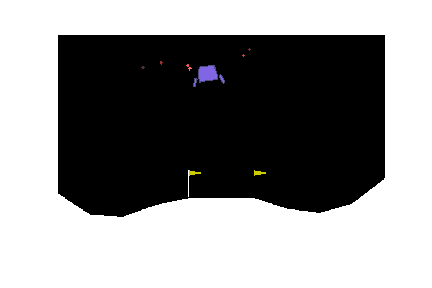
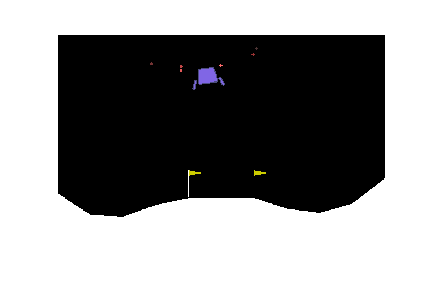
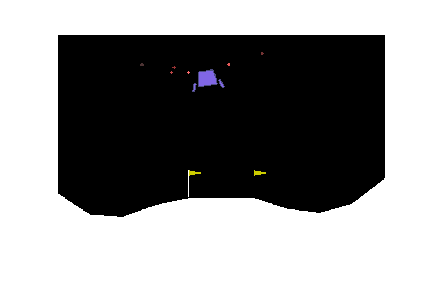
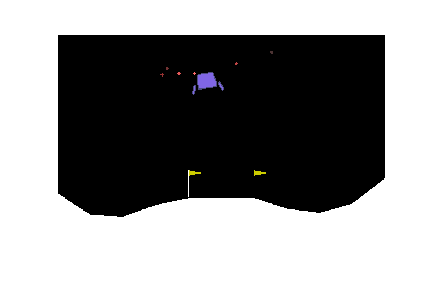
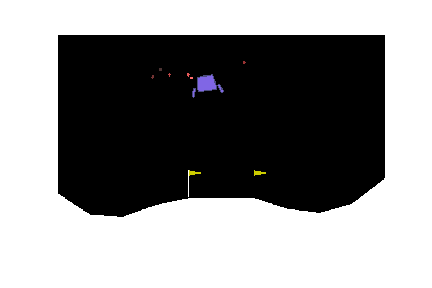
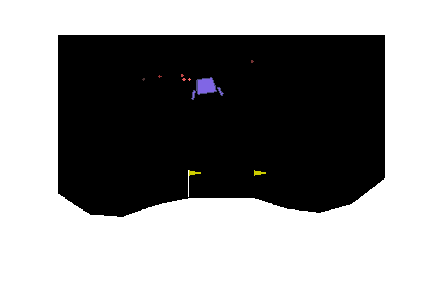
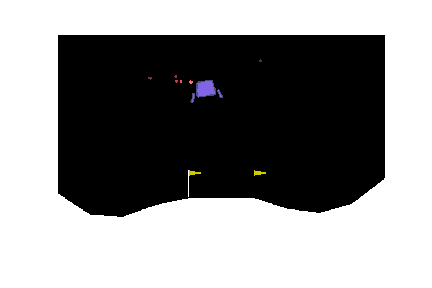
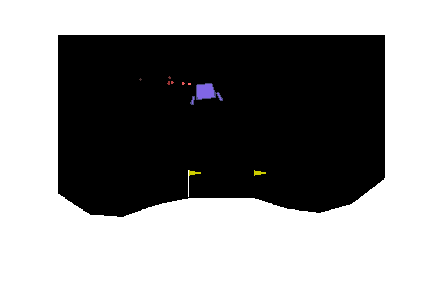
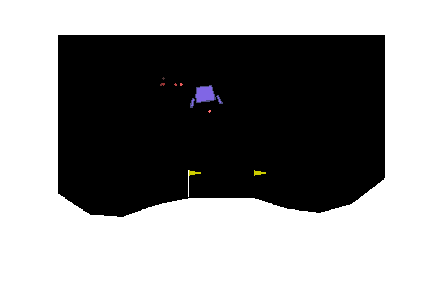
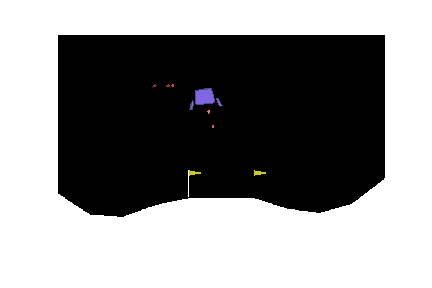
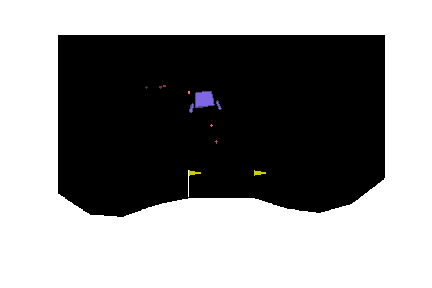
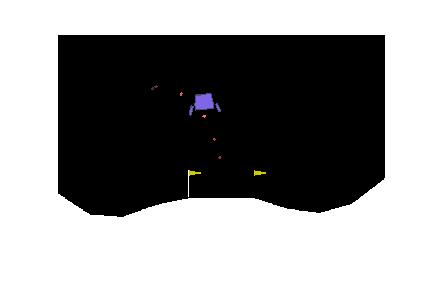
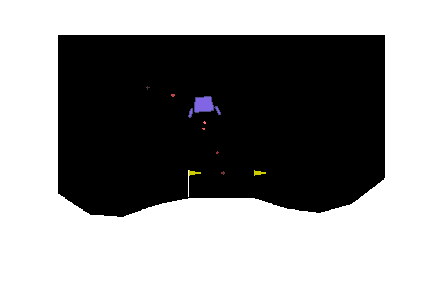
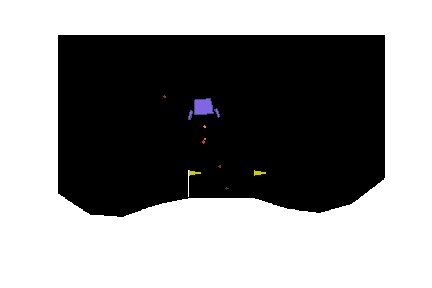
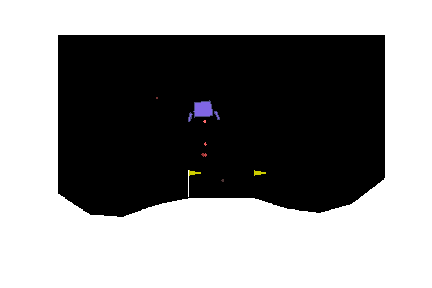
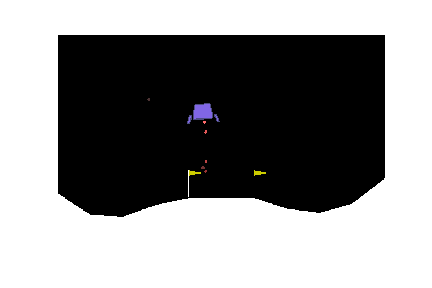
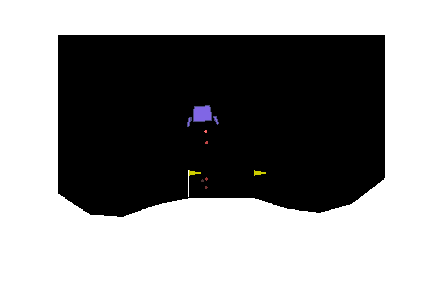
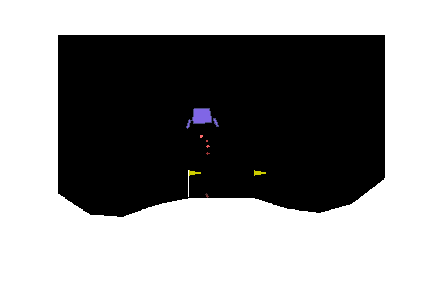
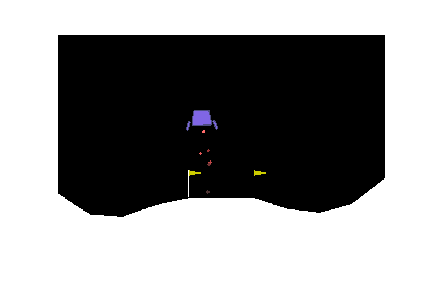
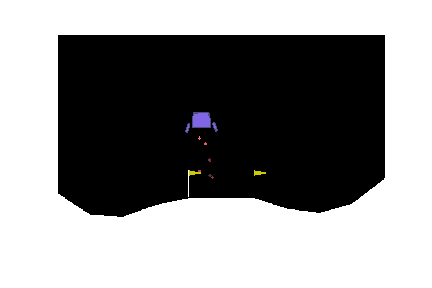
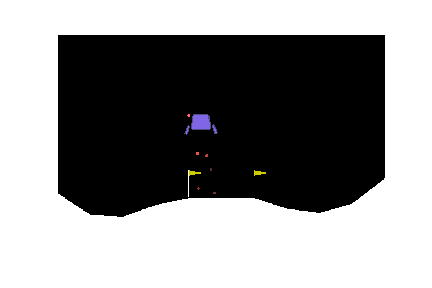
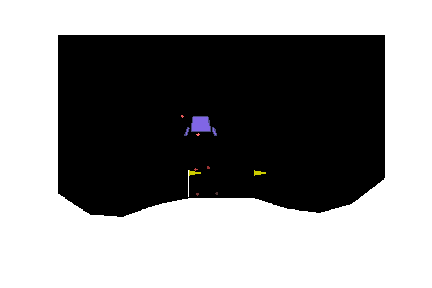
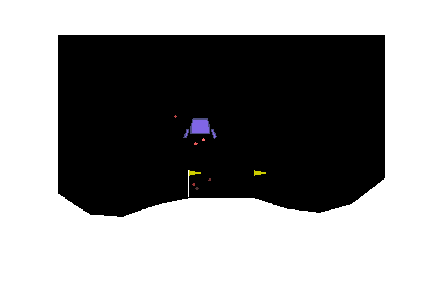
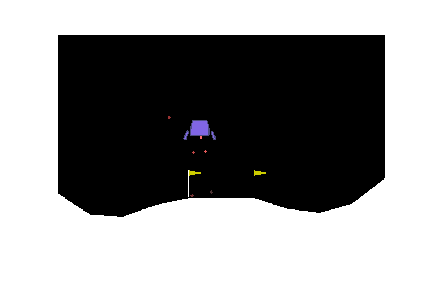
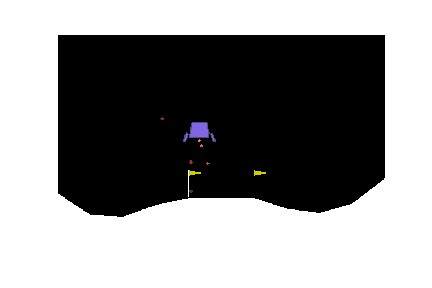
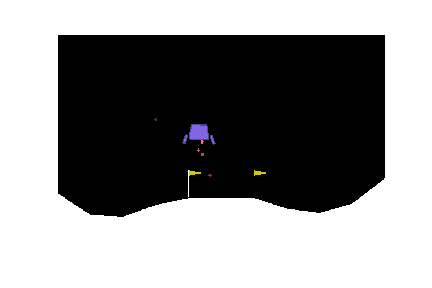
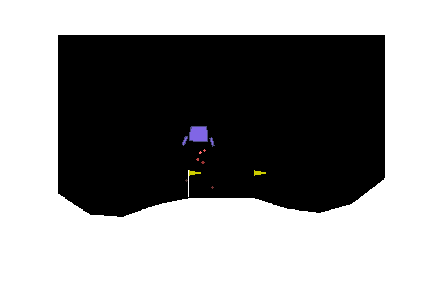
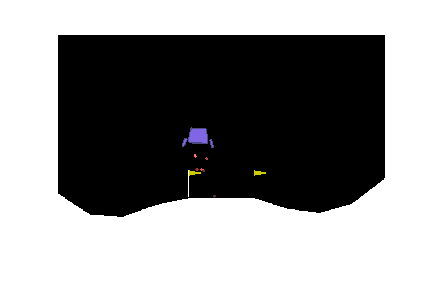
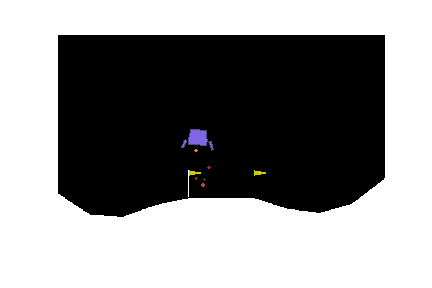
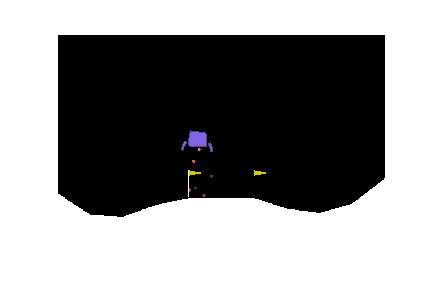
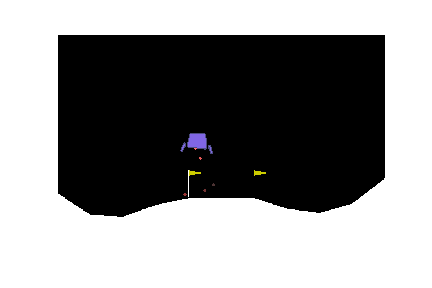
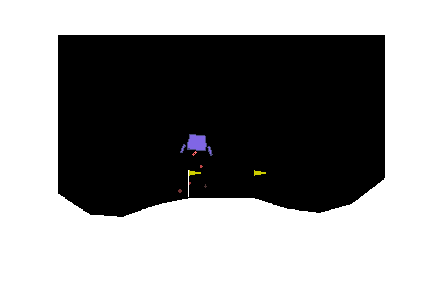
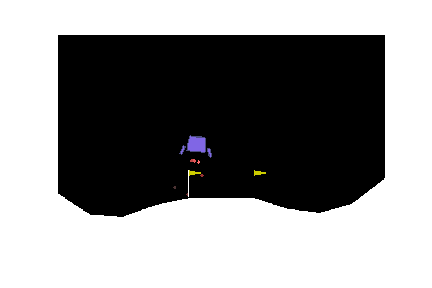
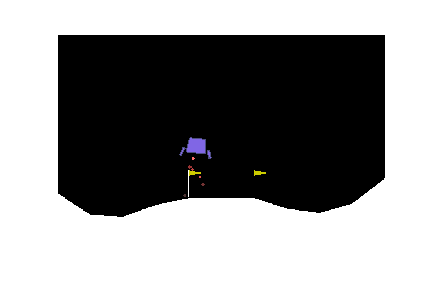
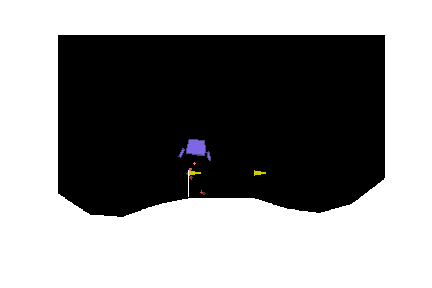
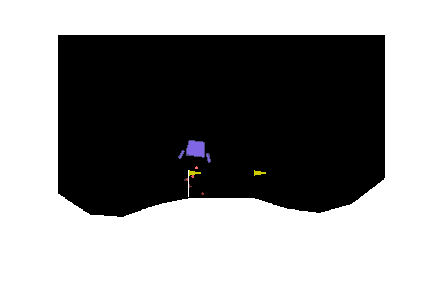
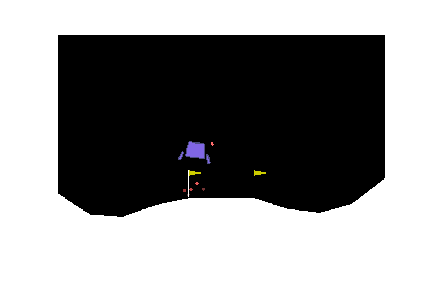
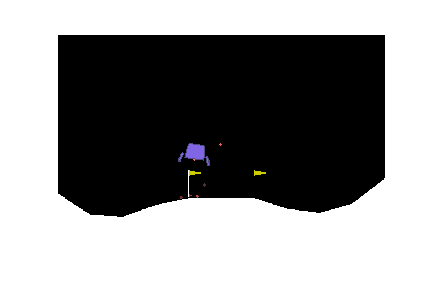
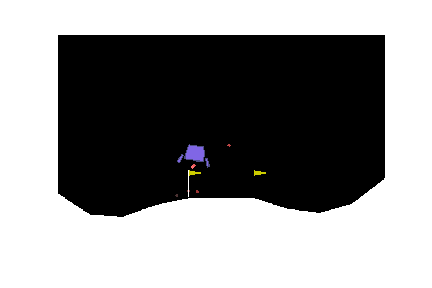
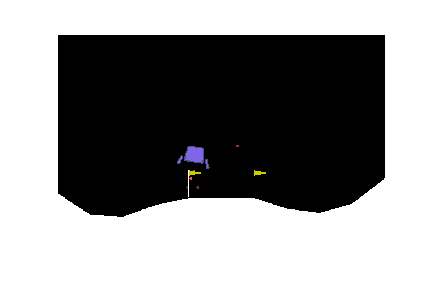
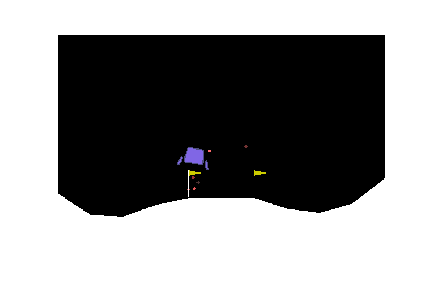
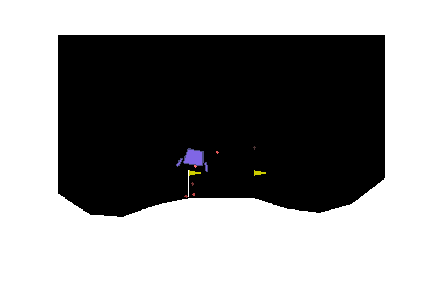
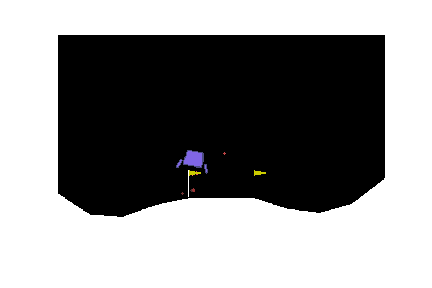
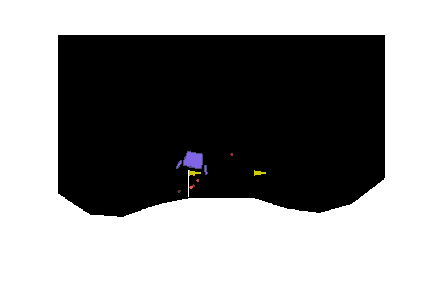
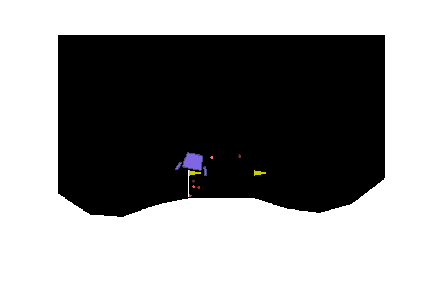
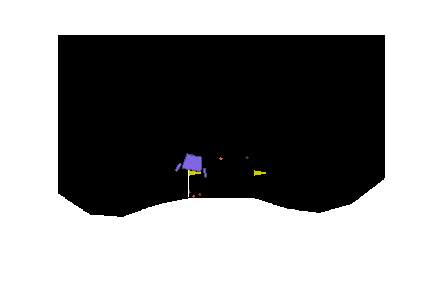
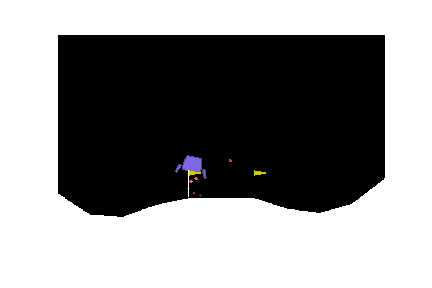
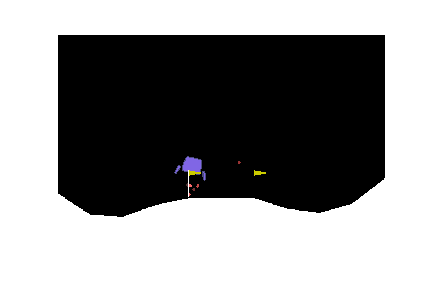
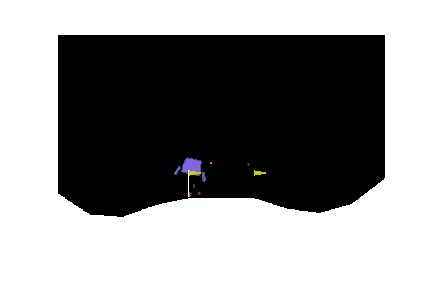
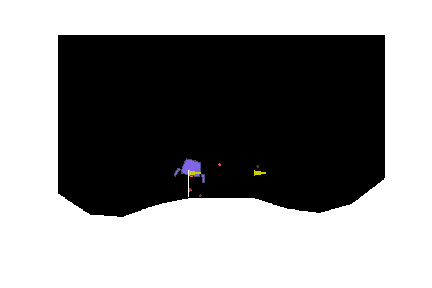
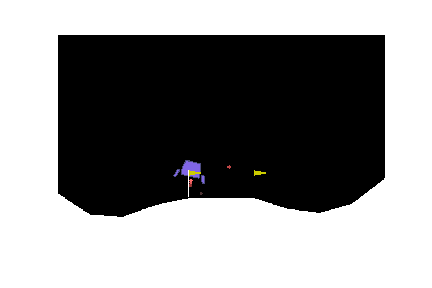
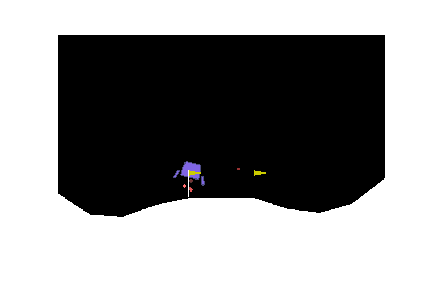
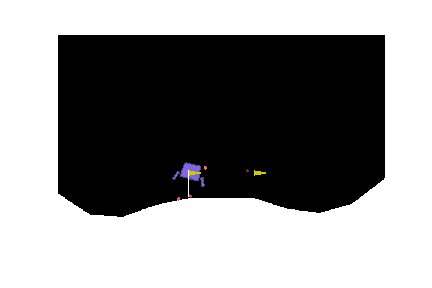
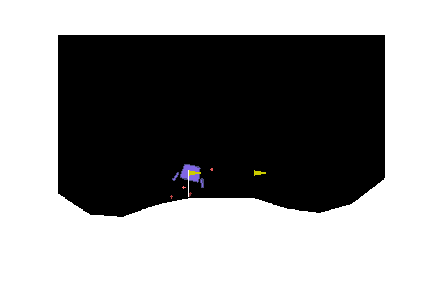
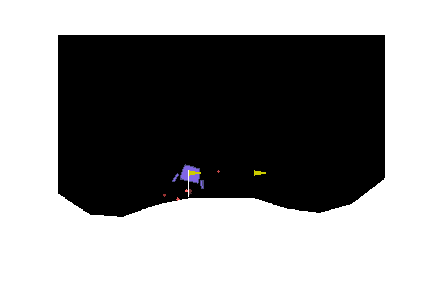
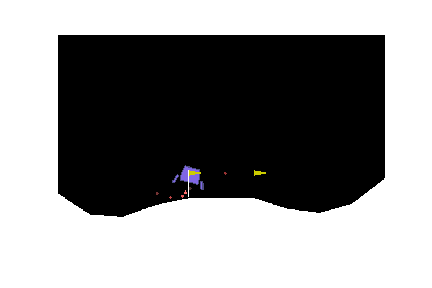
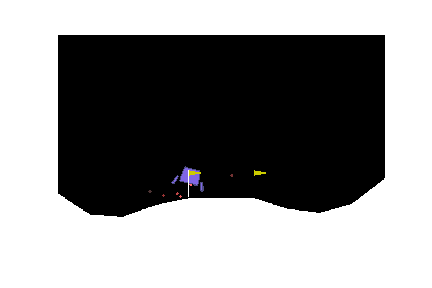
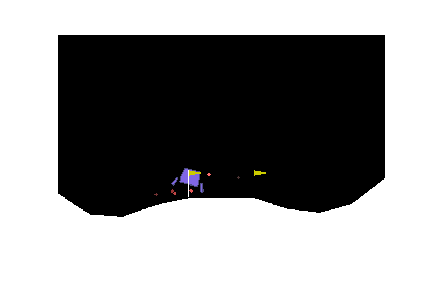
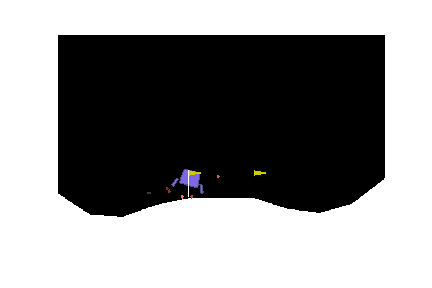
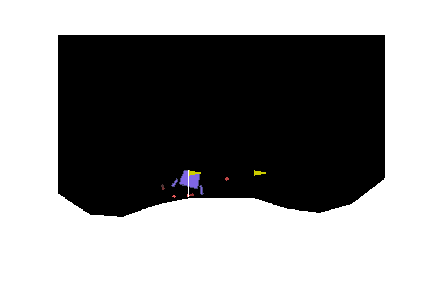
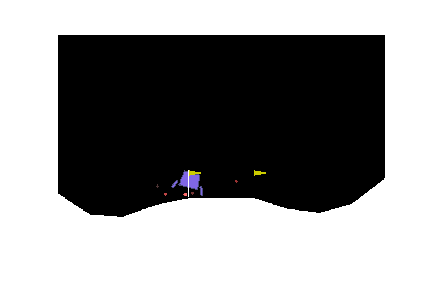
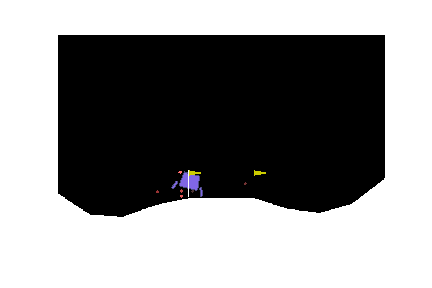
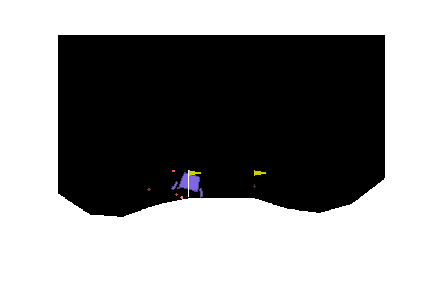
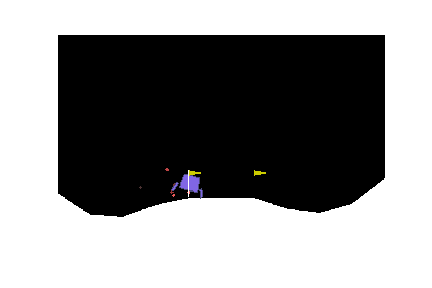
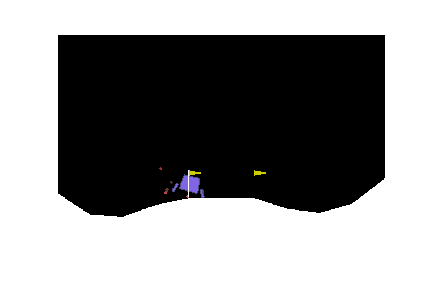
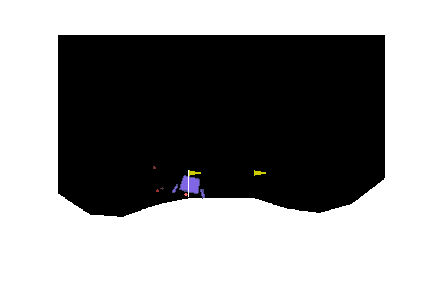
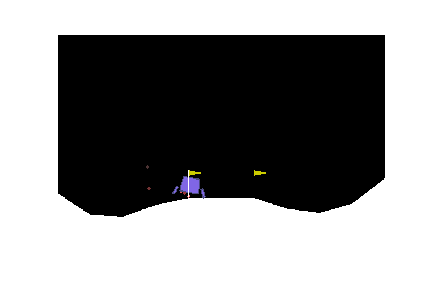
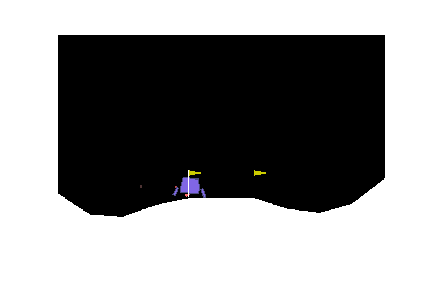
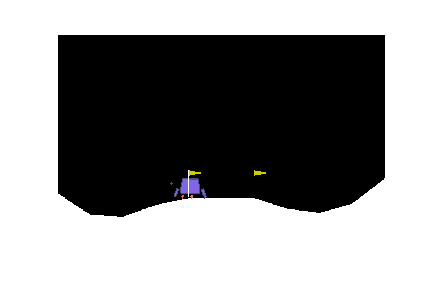
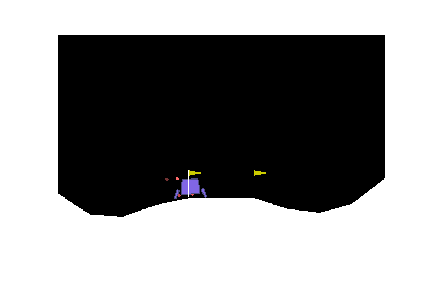
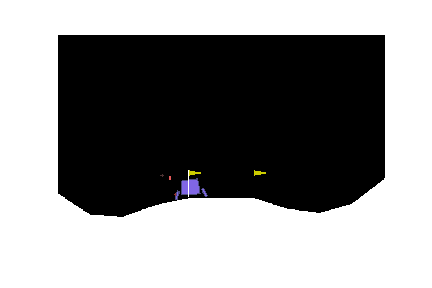
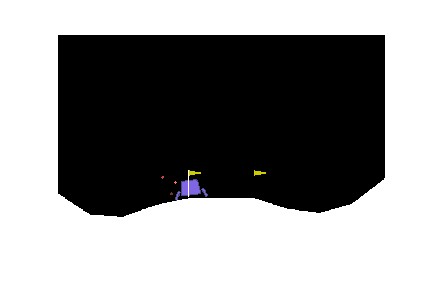
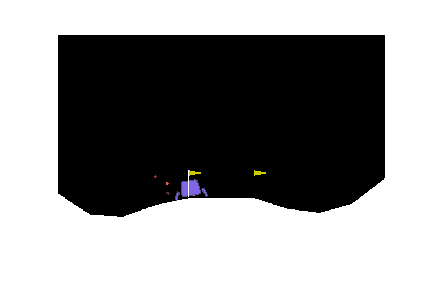
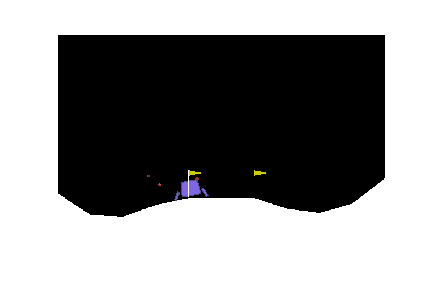
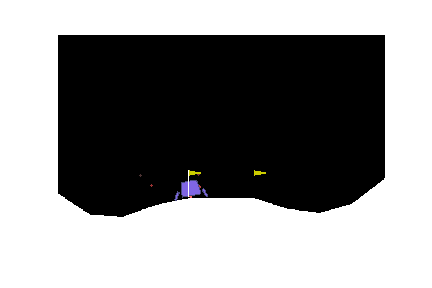
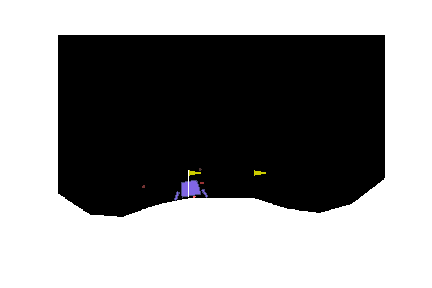
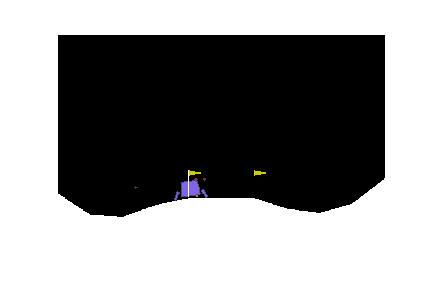
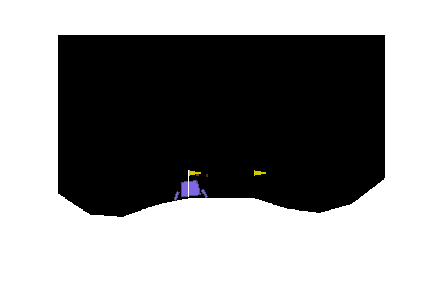
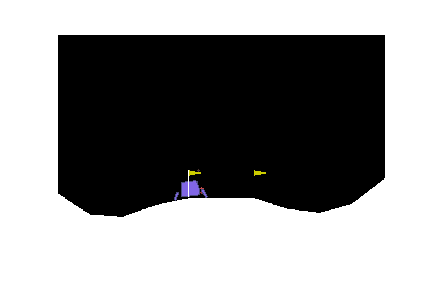
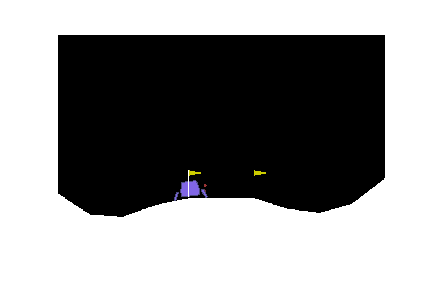
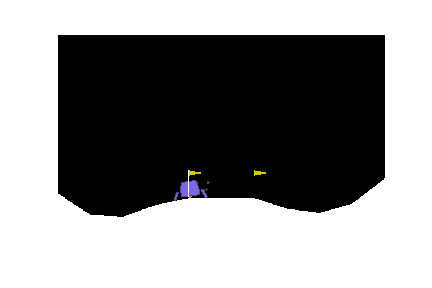
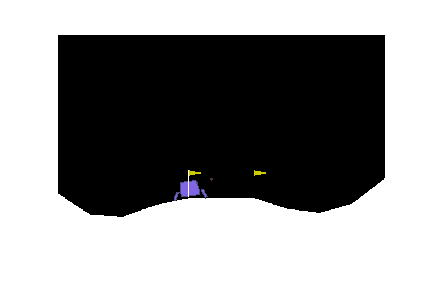
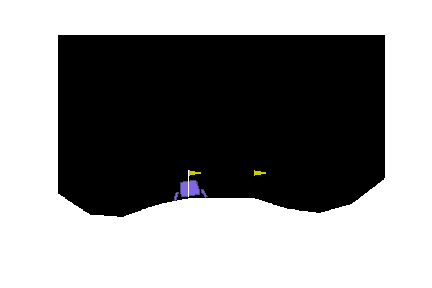
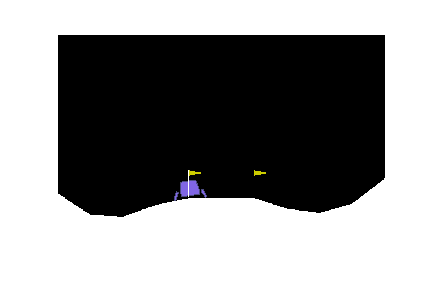
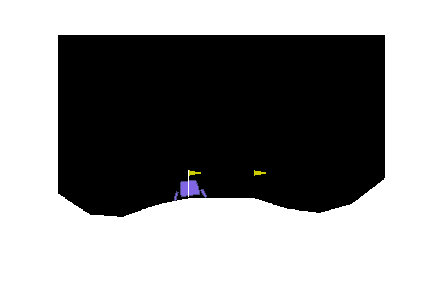
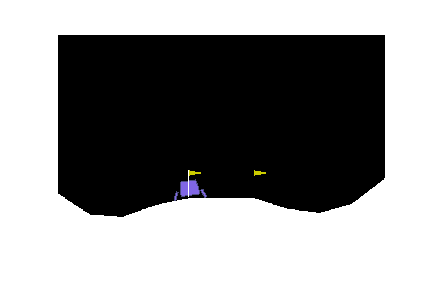
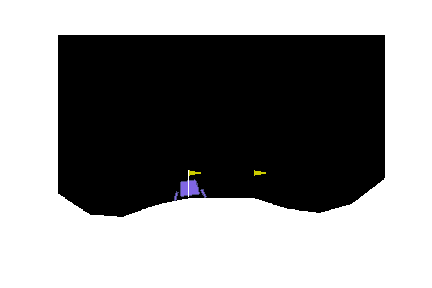
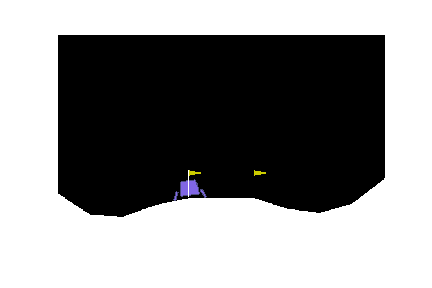
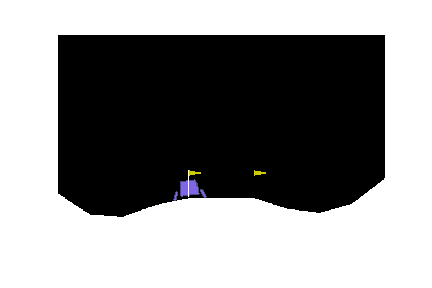
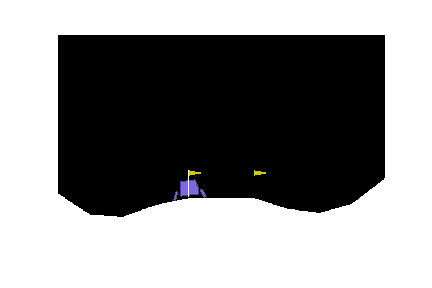
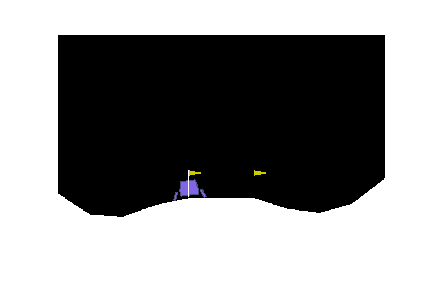
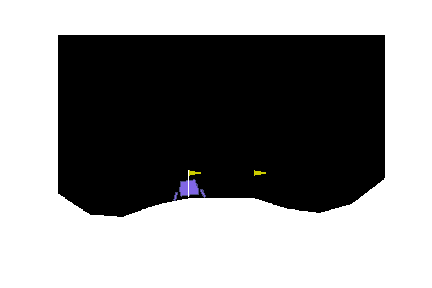
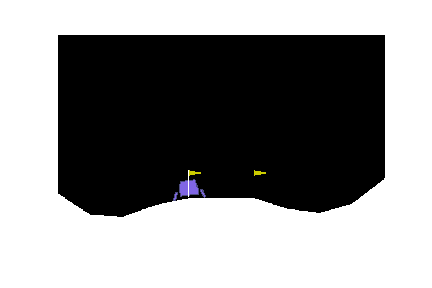
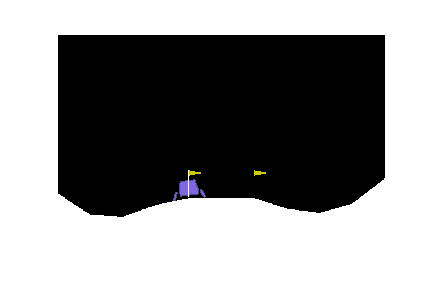
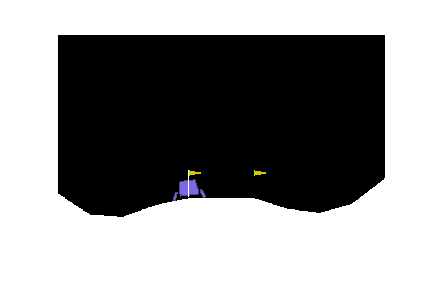
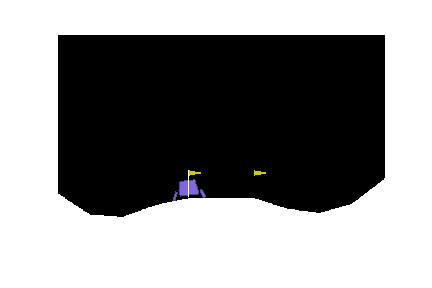
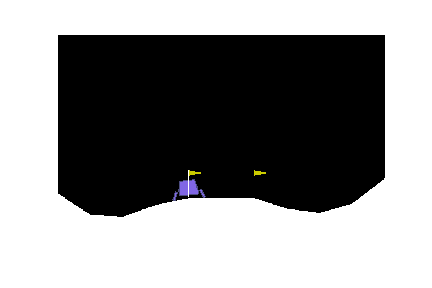
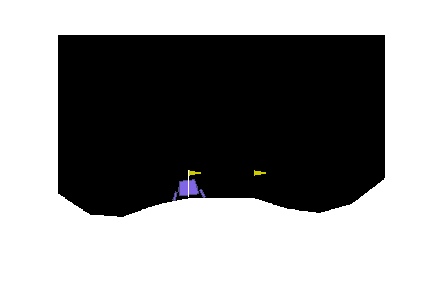
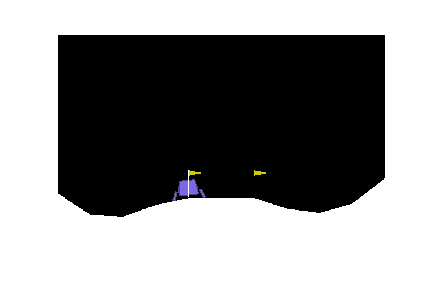
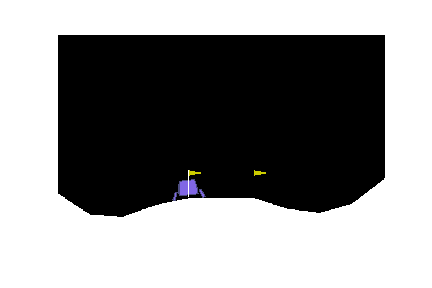
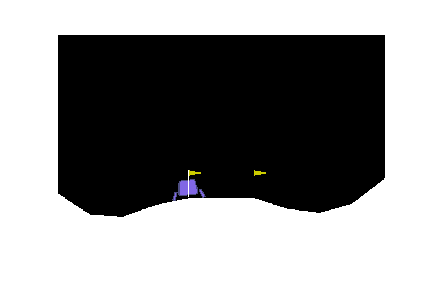
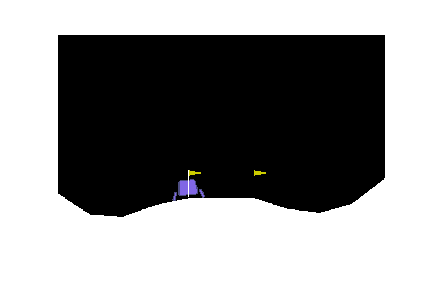
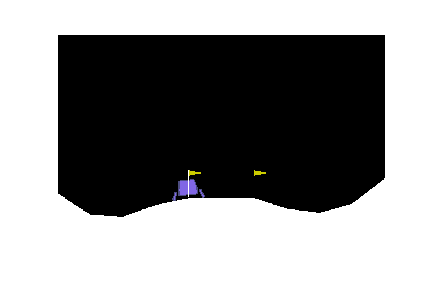
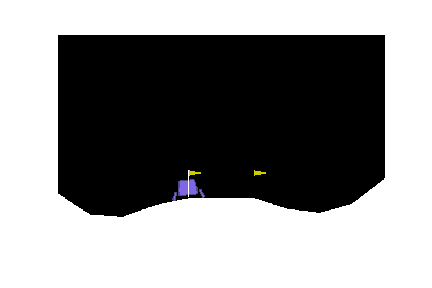
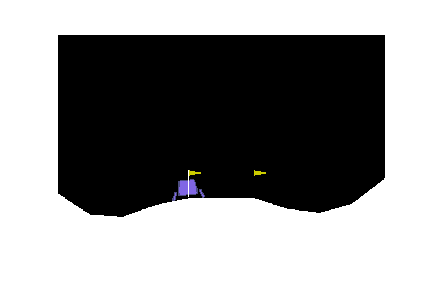
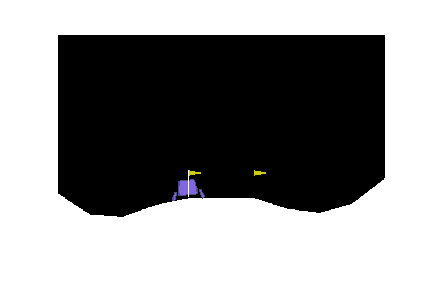
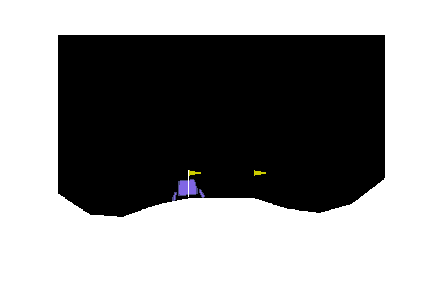
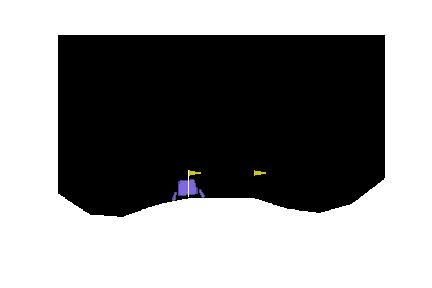
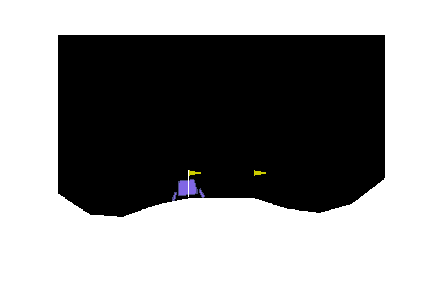
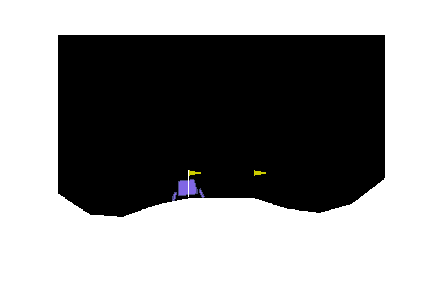
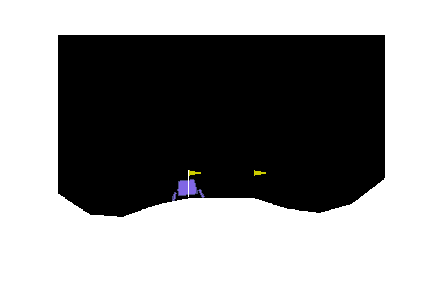
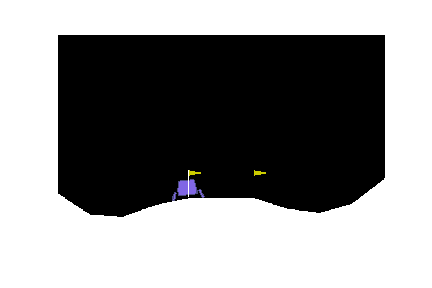
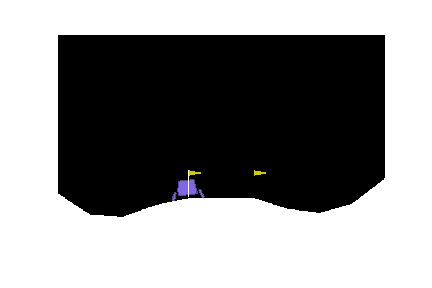
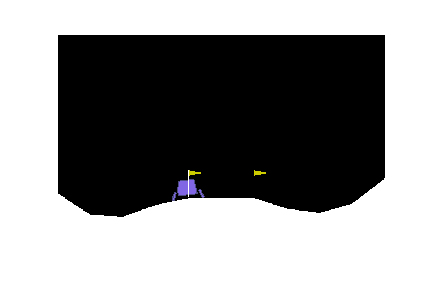
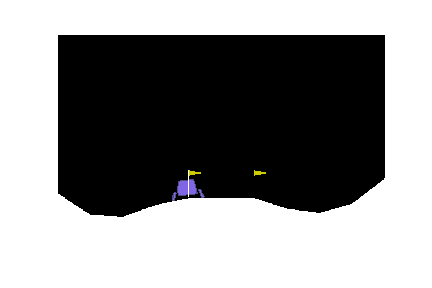
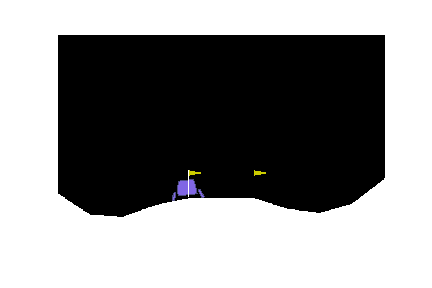
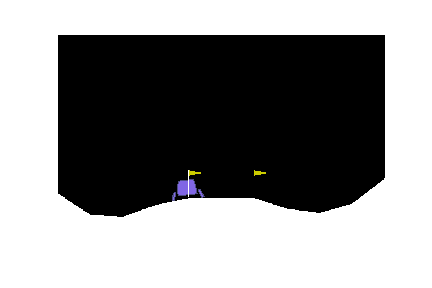
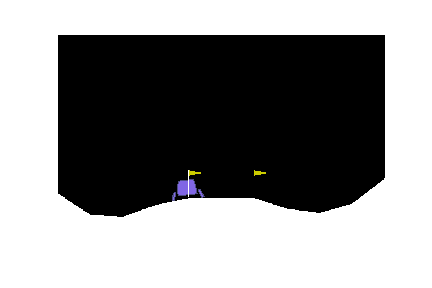
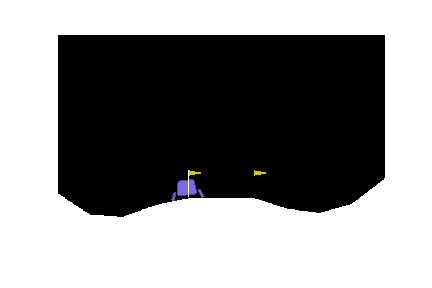
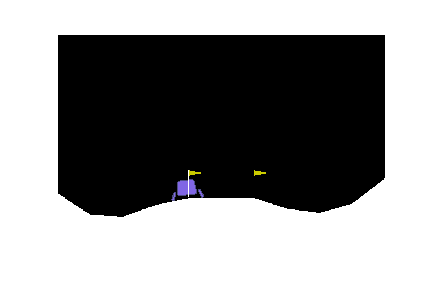
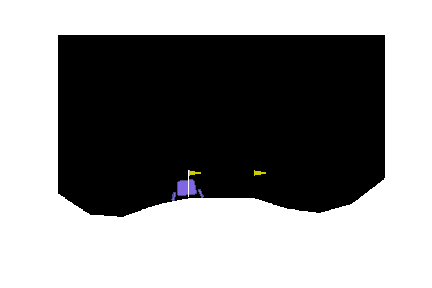
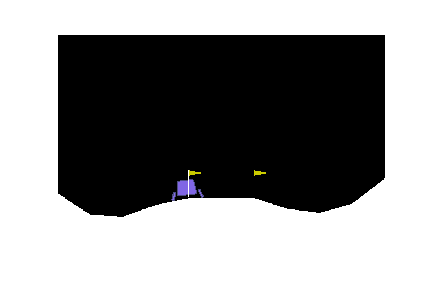
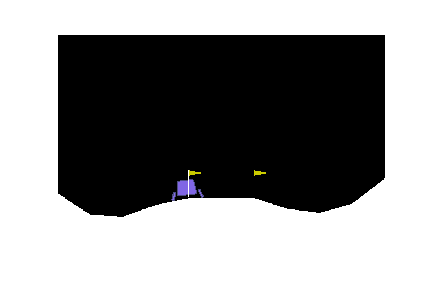
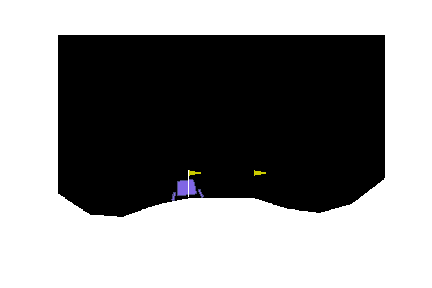
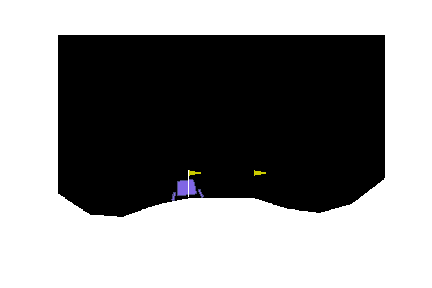
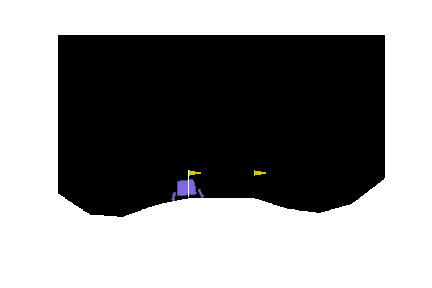
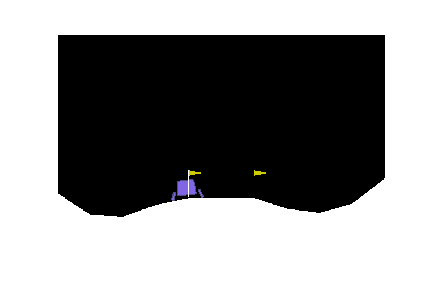
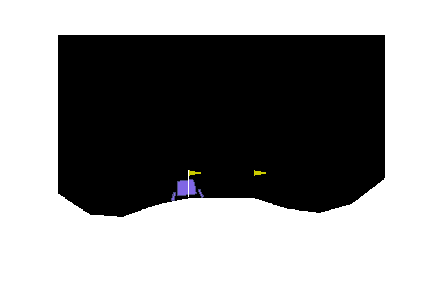
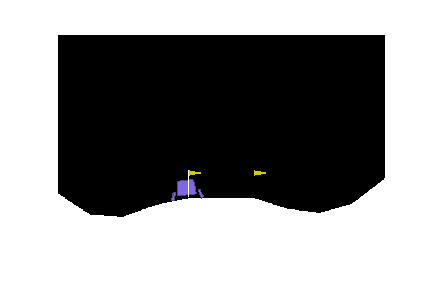
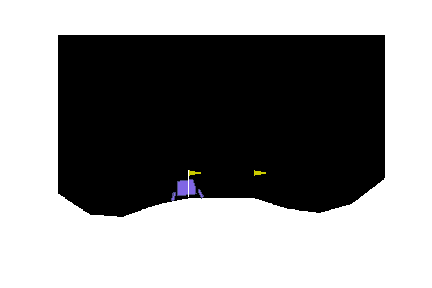
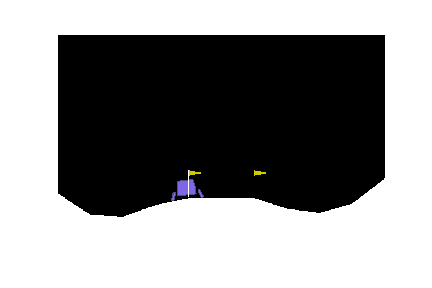
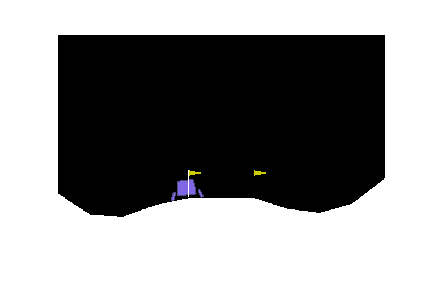
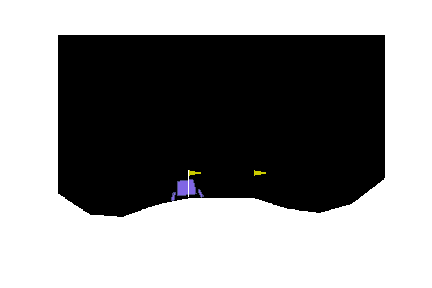
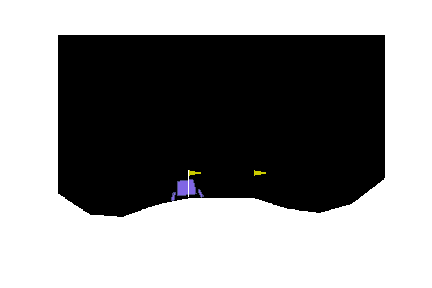
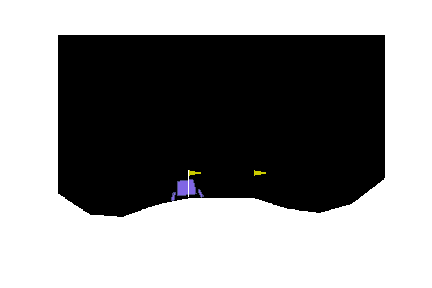
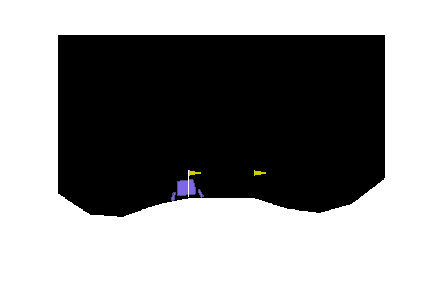
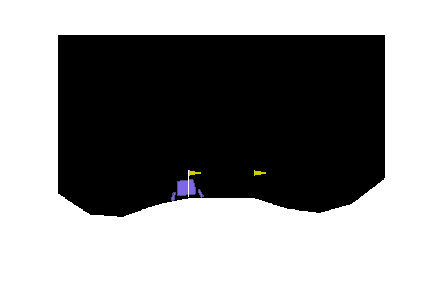
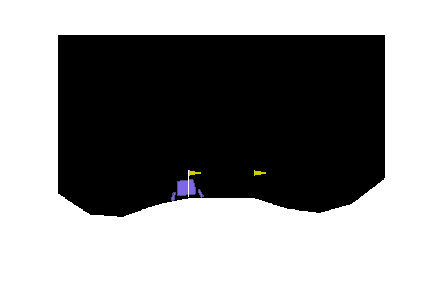
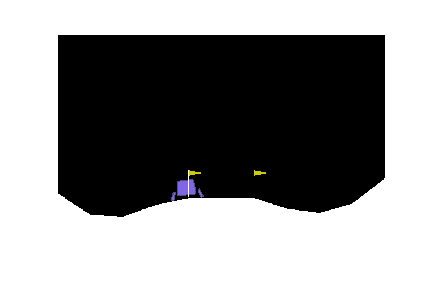
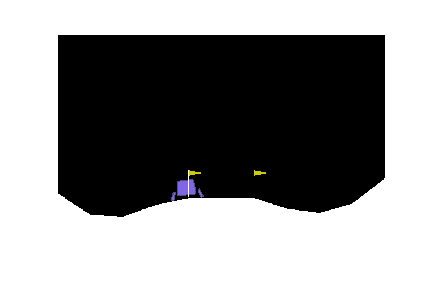
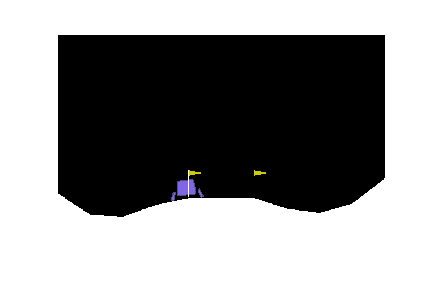
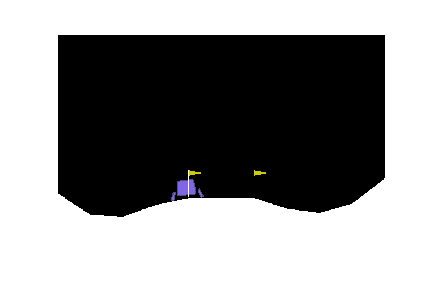
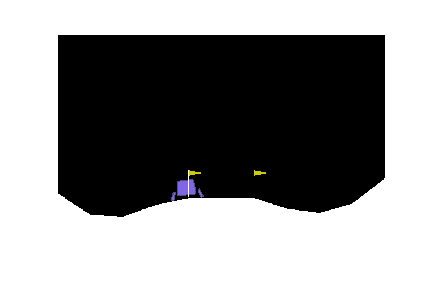
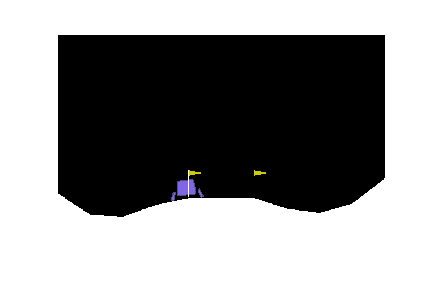
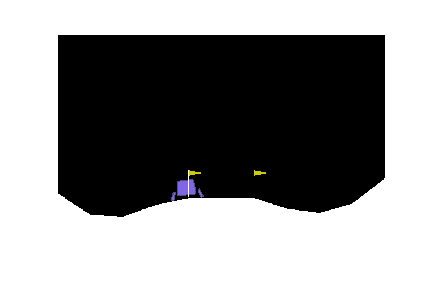
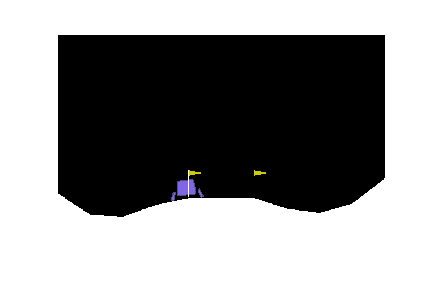
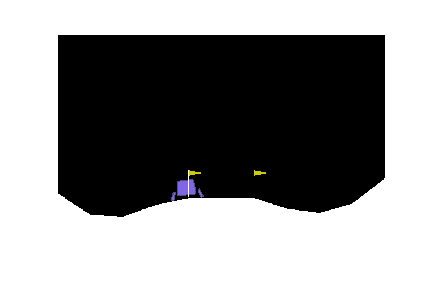
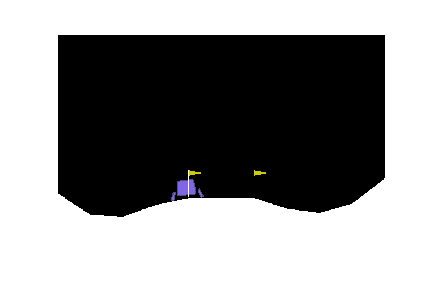
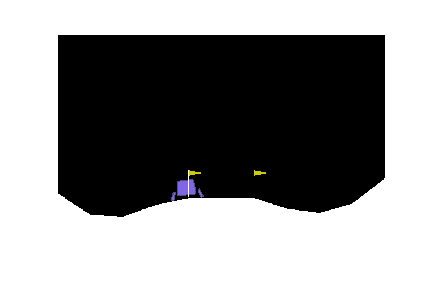
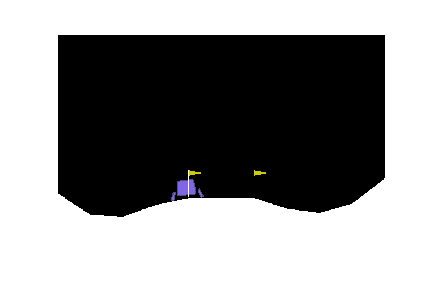
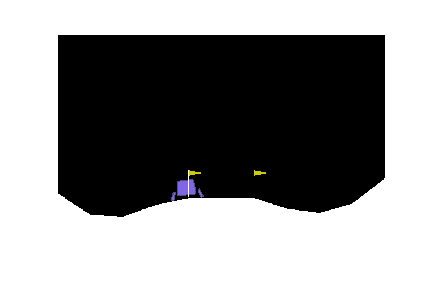
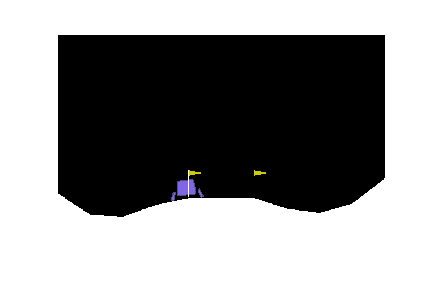
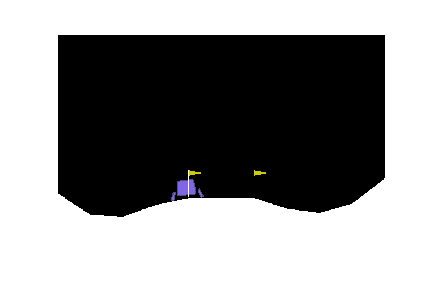
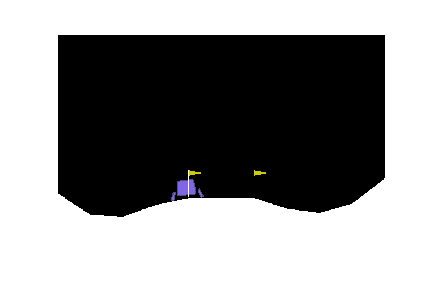
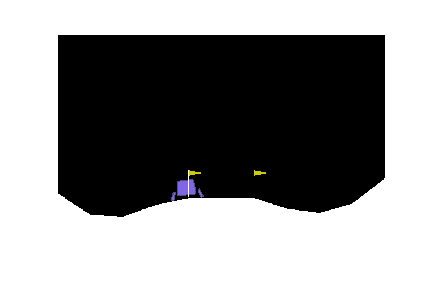
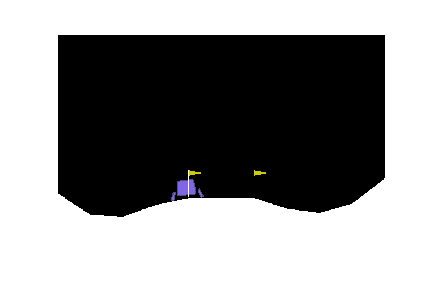
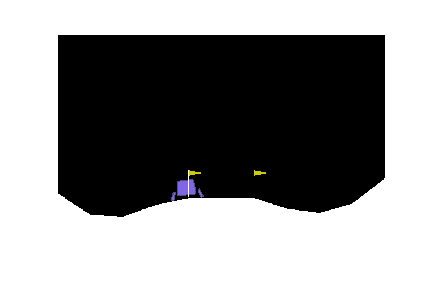
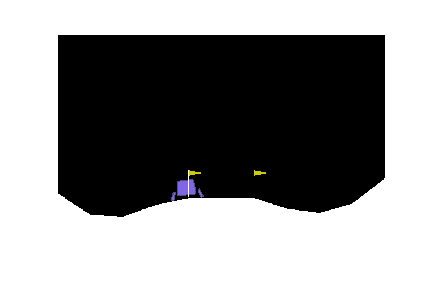
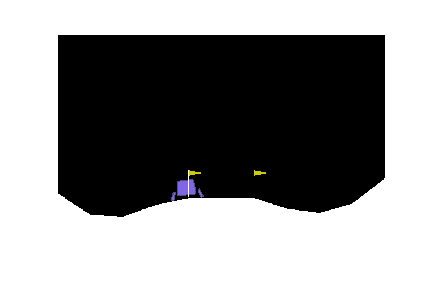
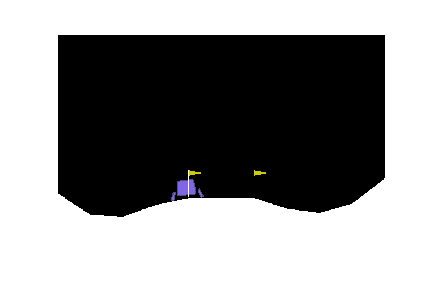
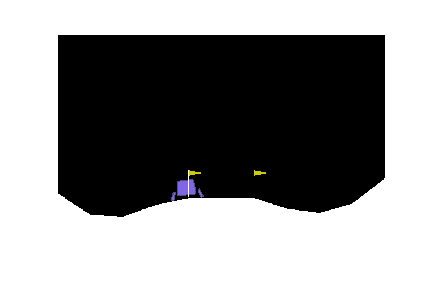
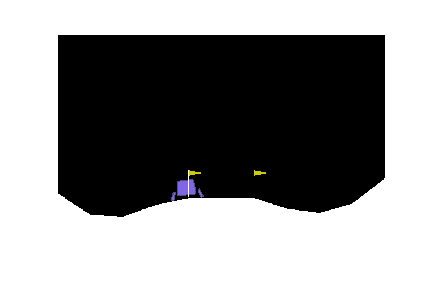
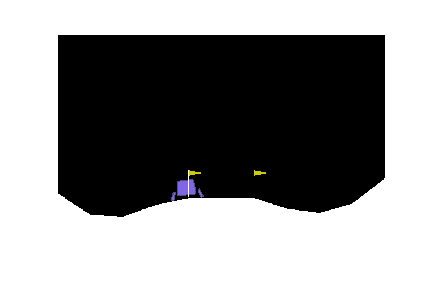
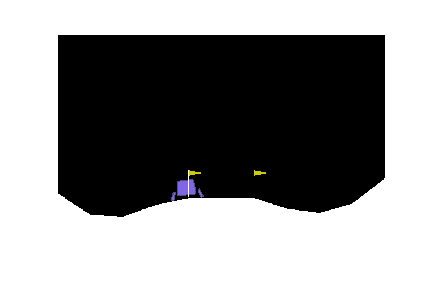
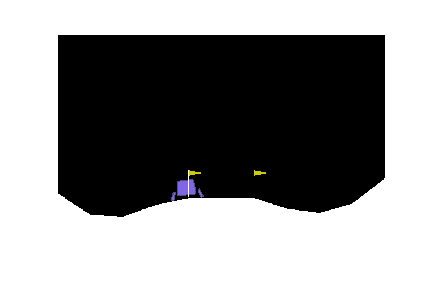
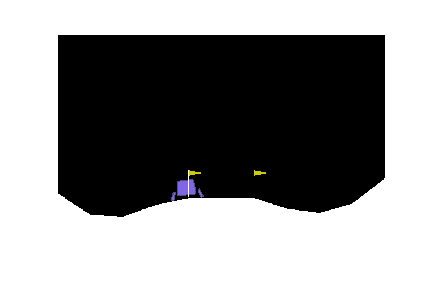
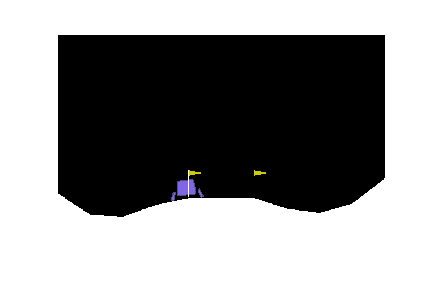
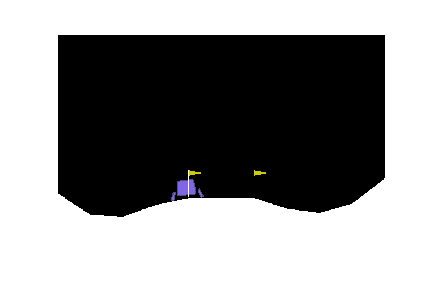

Best of generation 80



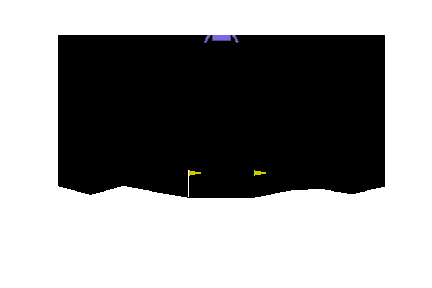
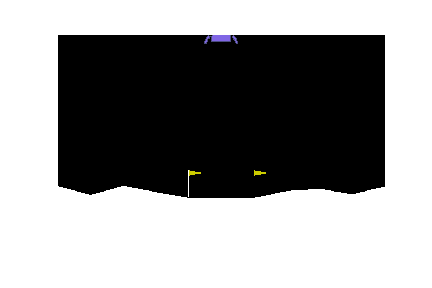
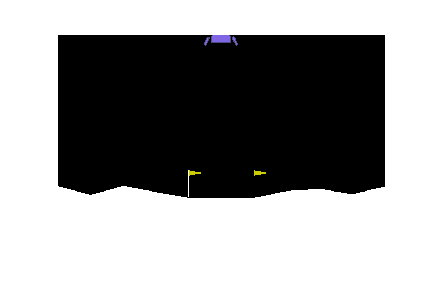
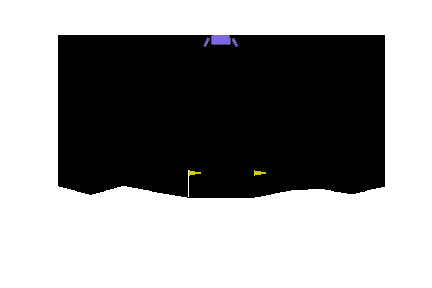
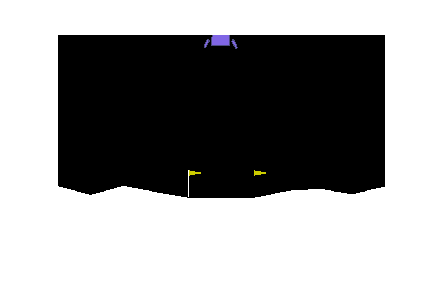
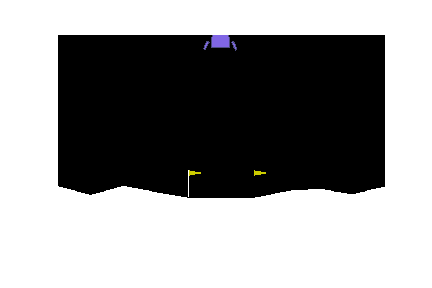
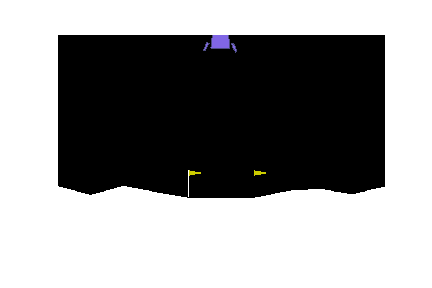
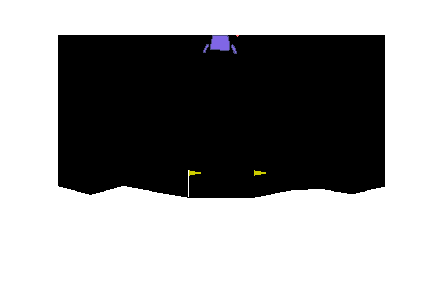
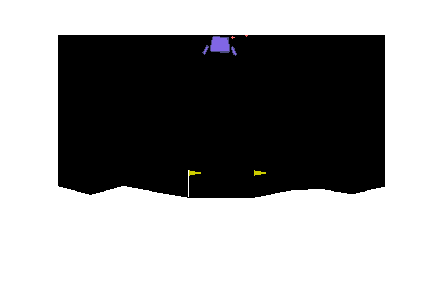
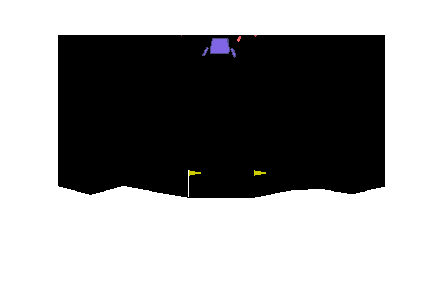
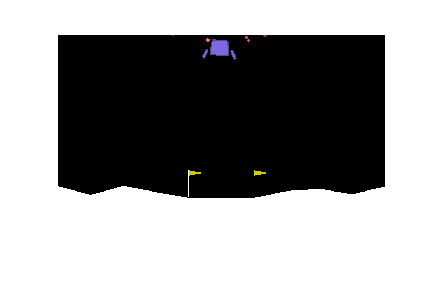
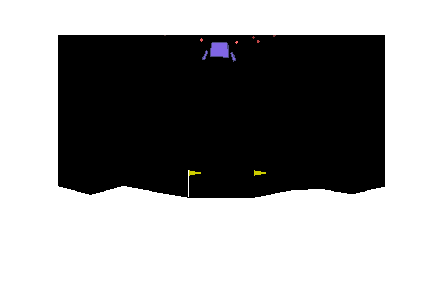
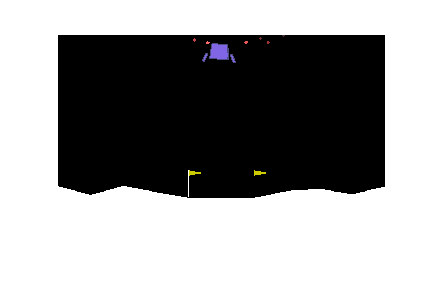
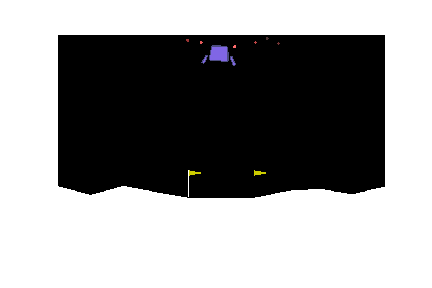
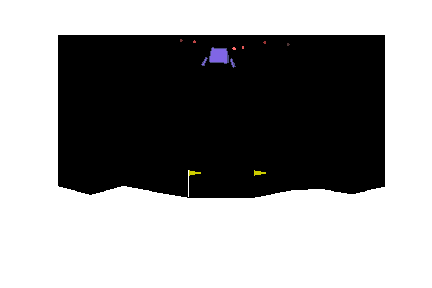
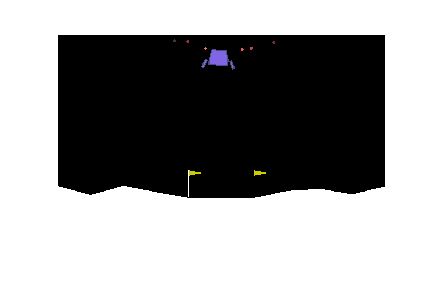
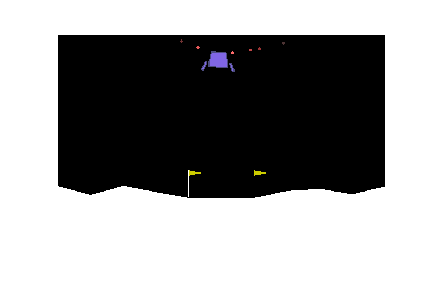
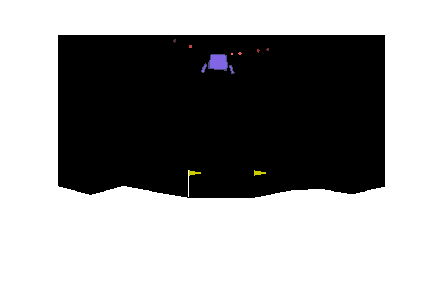
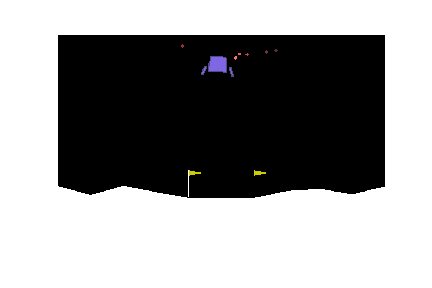
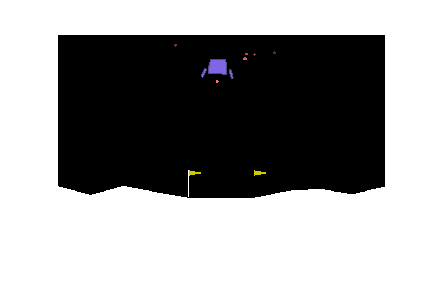
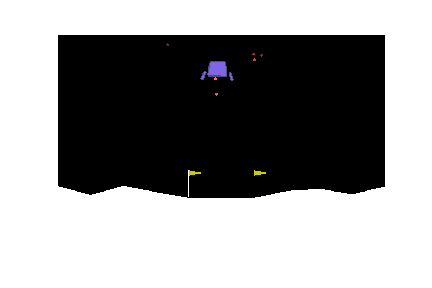
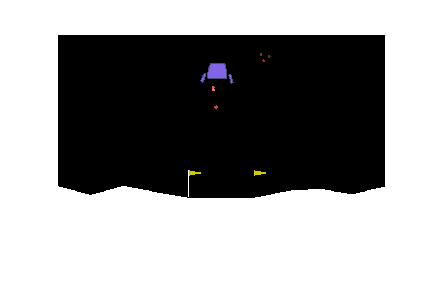
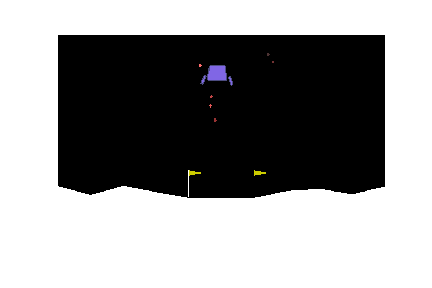
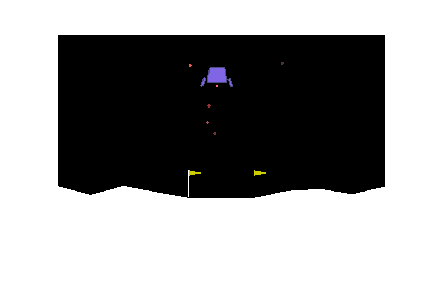
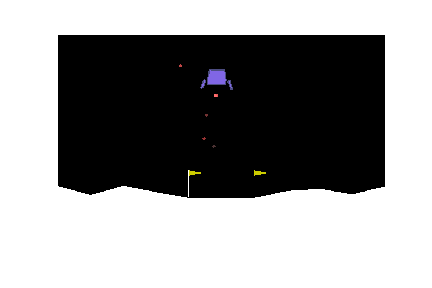
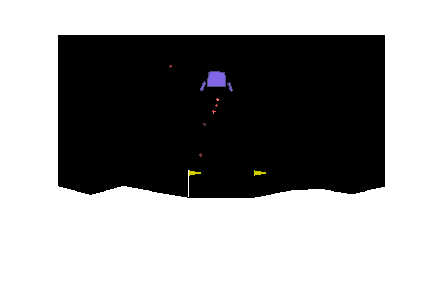
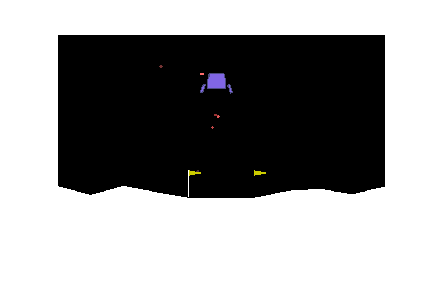
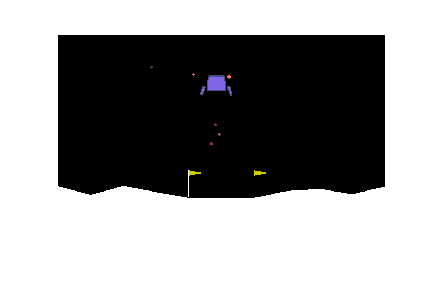
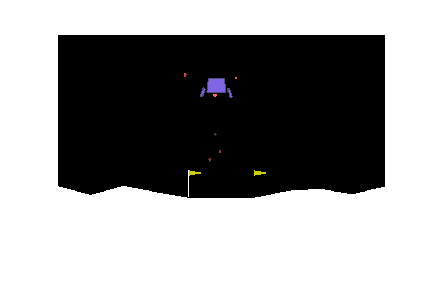
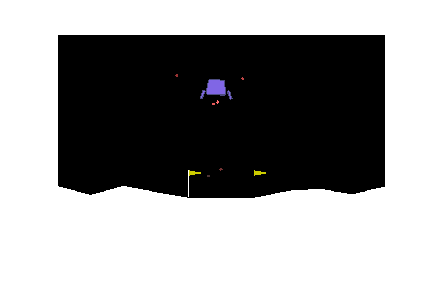
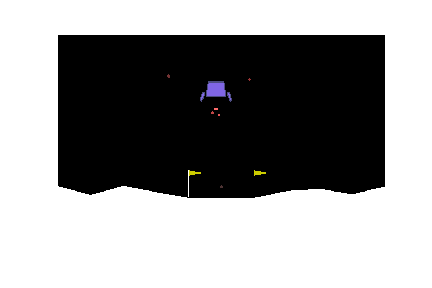
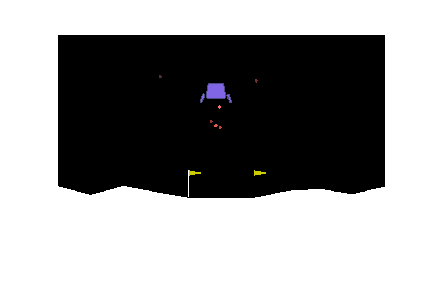
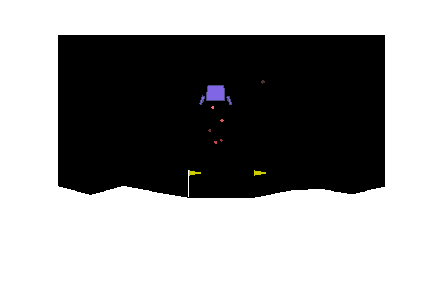
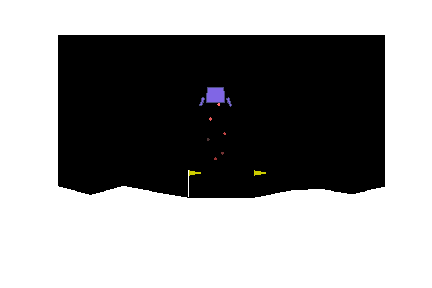
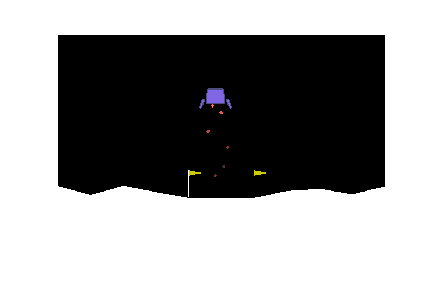
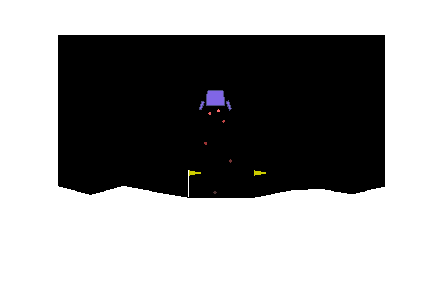
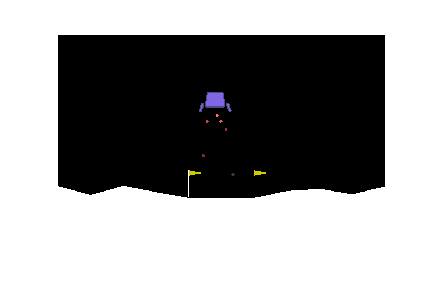
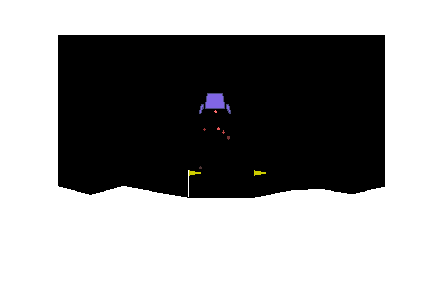
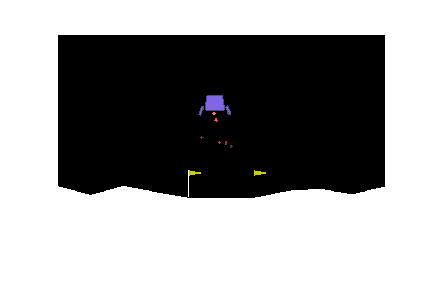
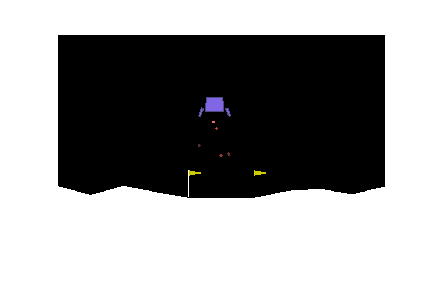
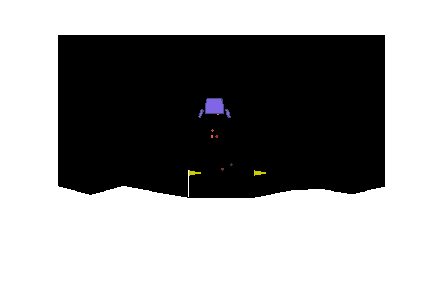
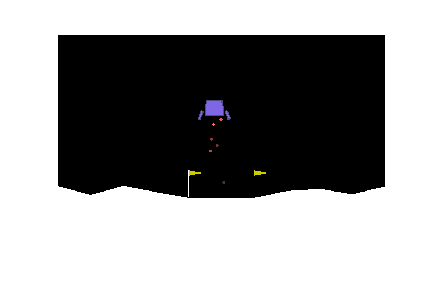
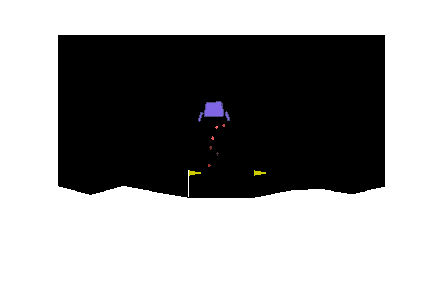
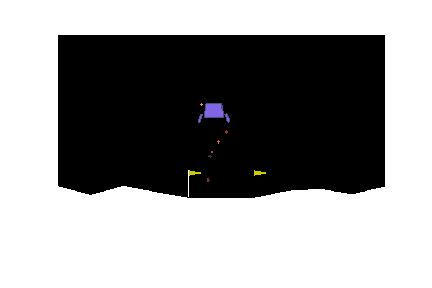
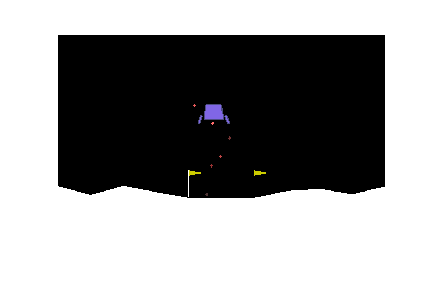
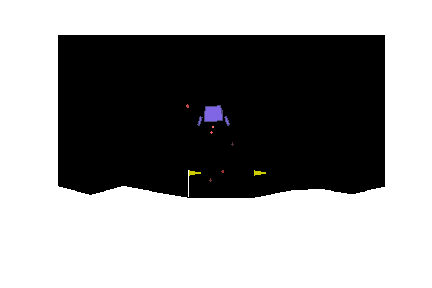
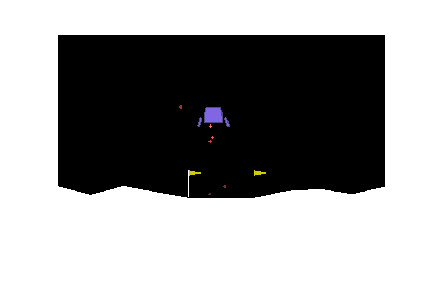
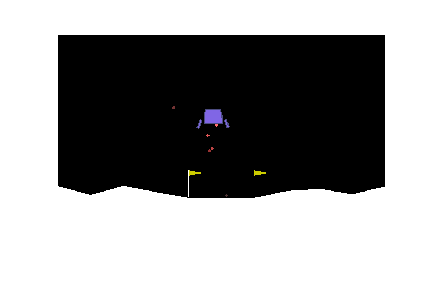
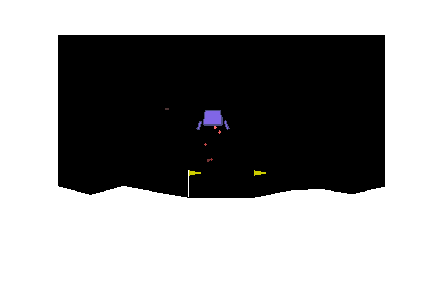
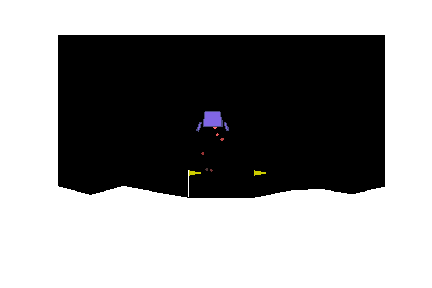
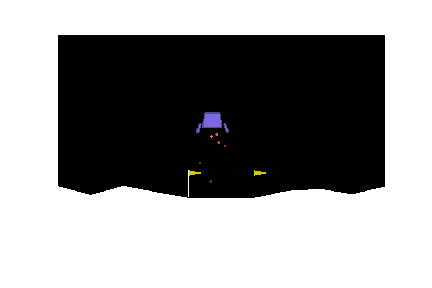
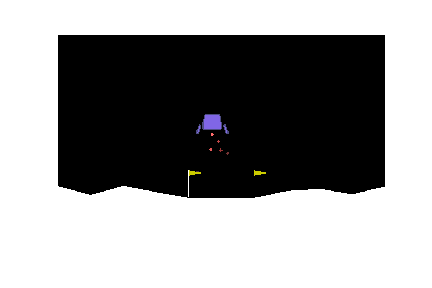
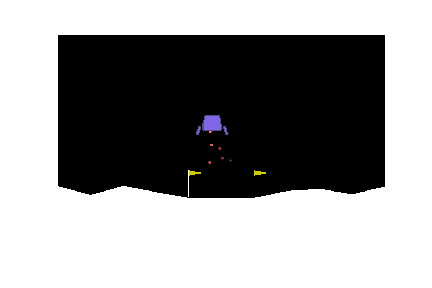
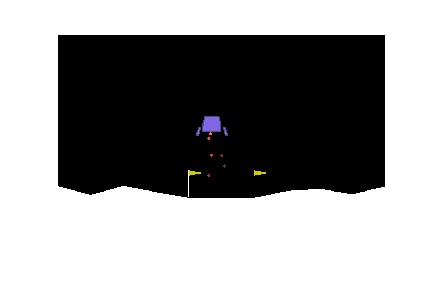
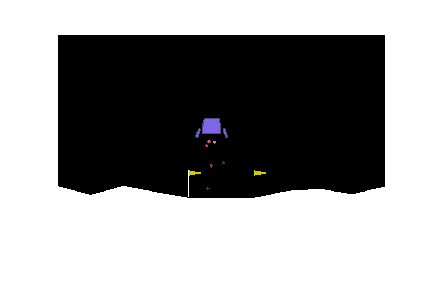
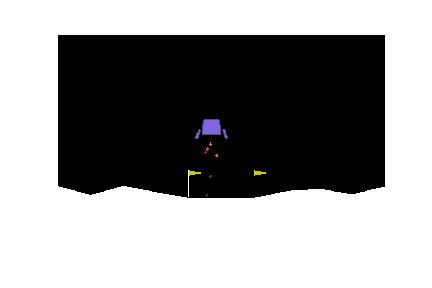
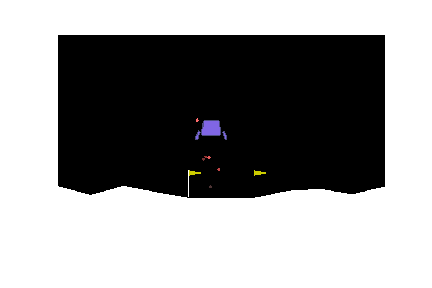
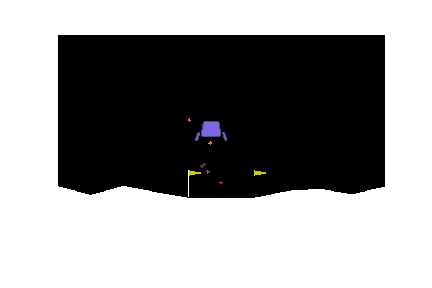
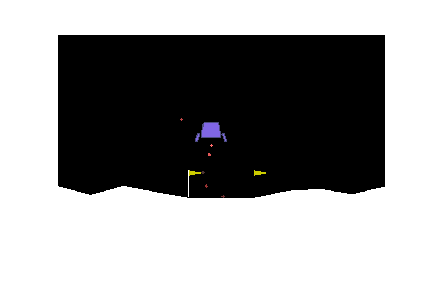
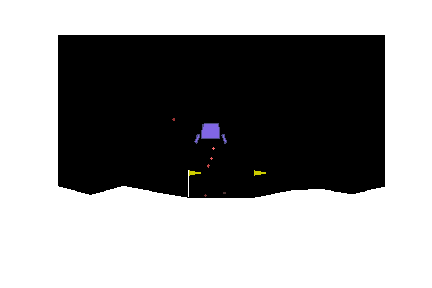
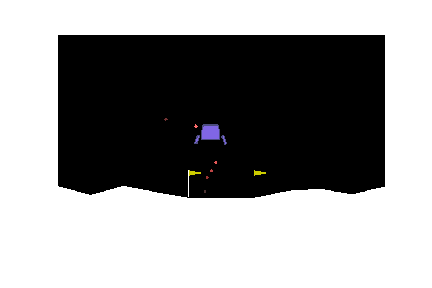
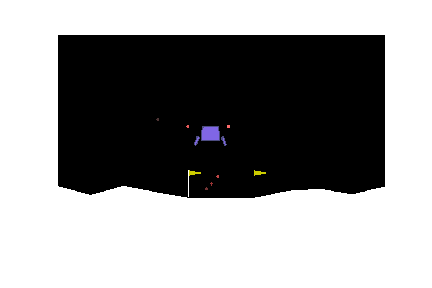
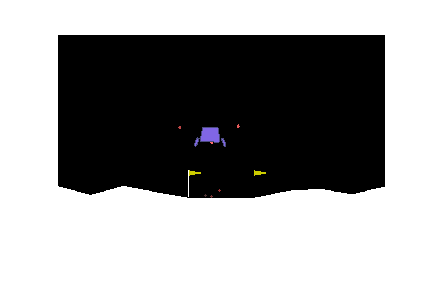
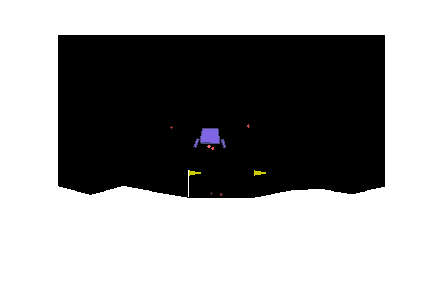
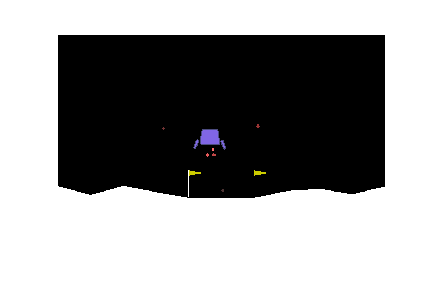
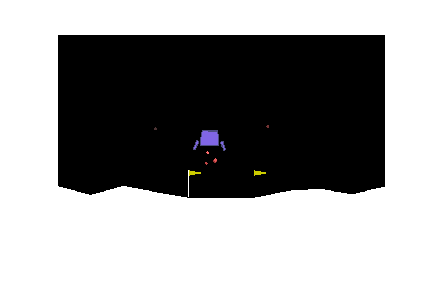
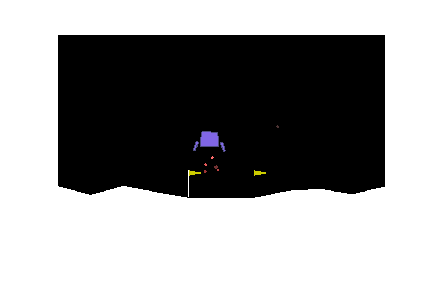
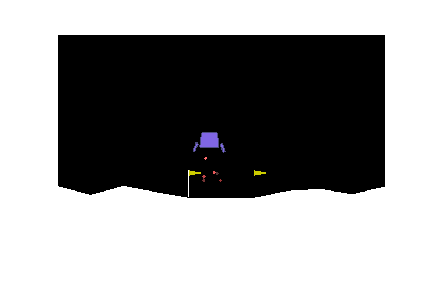
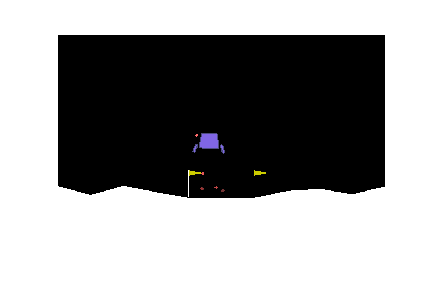
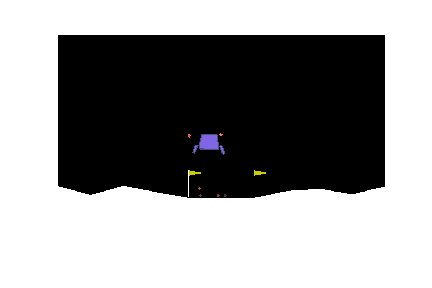
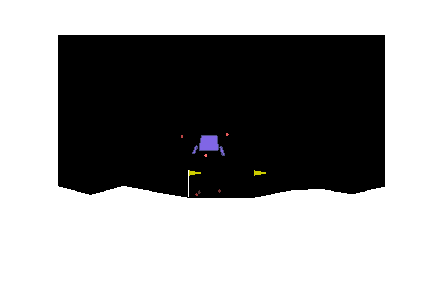
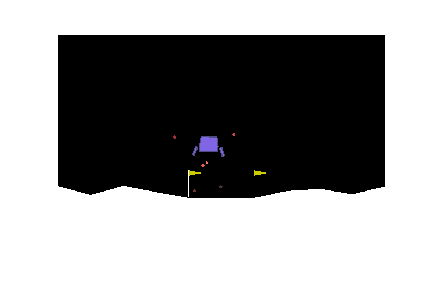
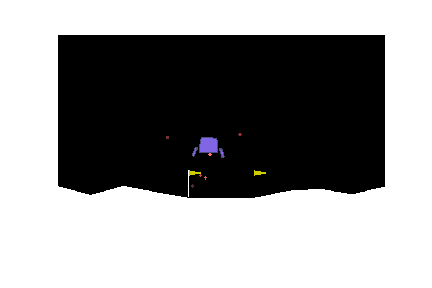
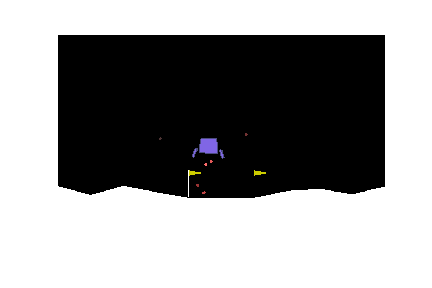
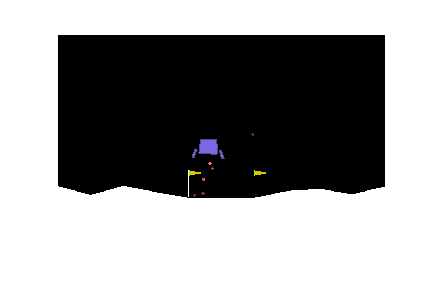
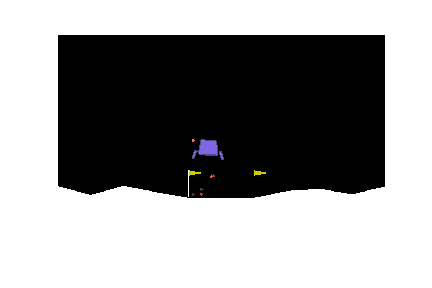
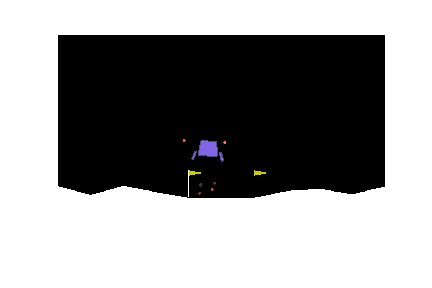
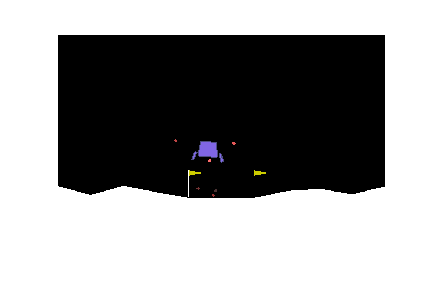
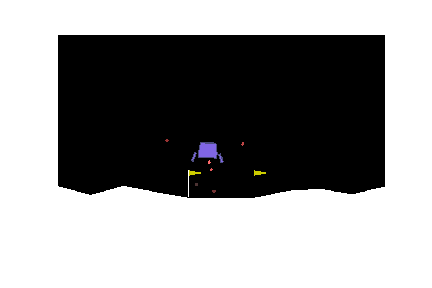
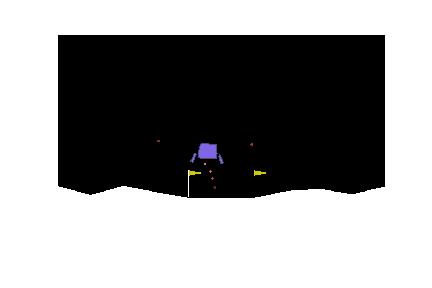
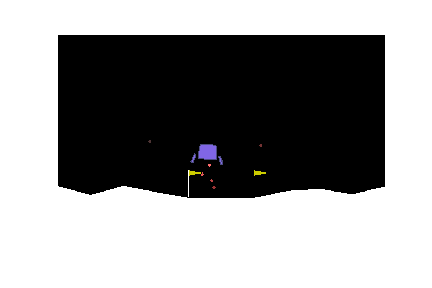
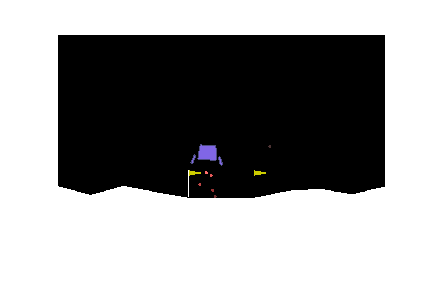
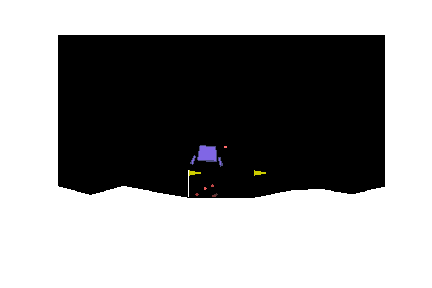
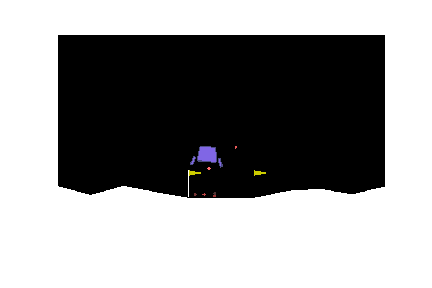
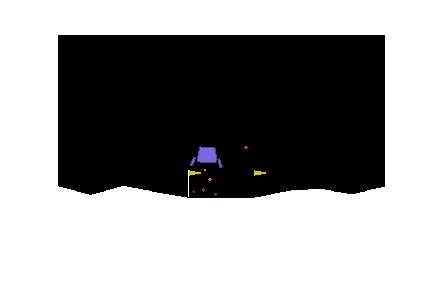
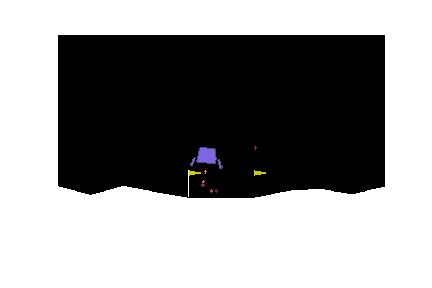
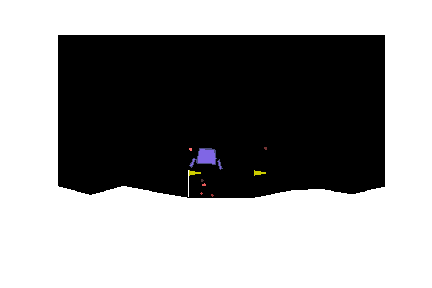
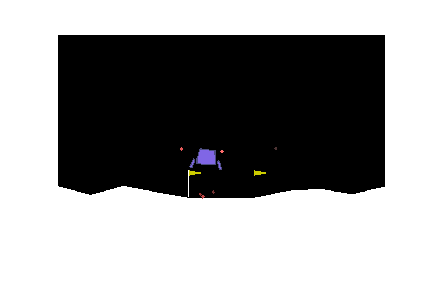
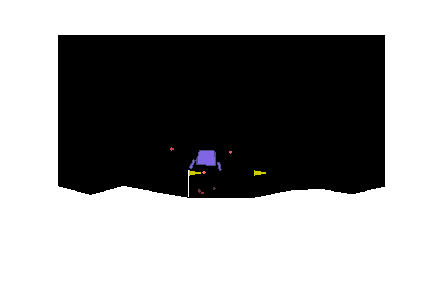
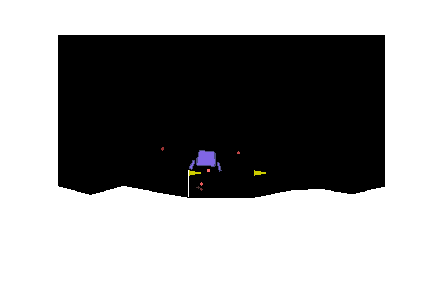
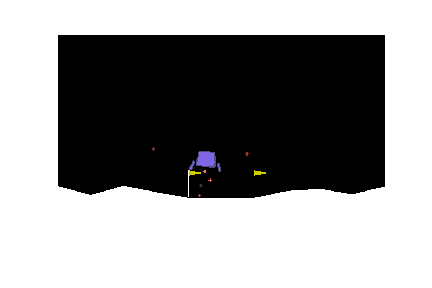
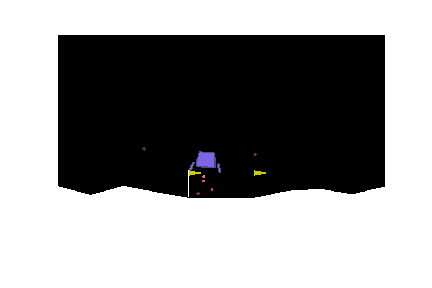
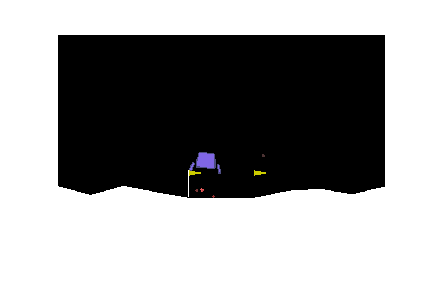
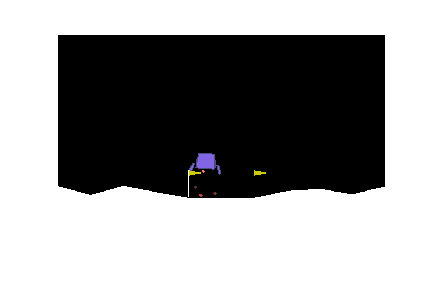
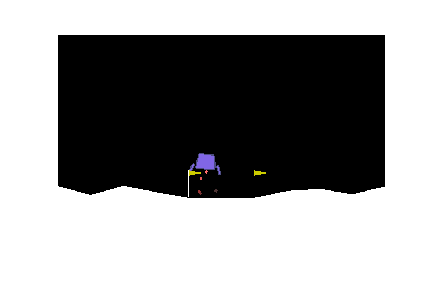
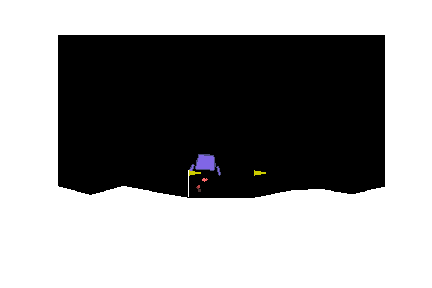
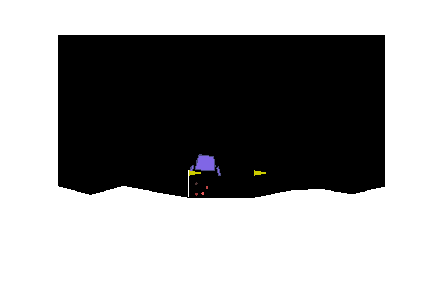
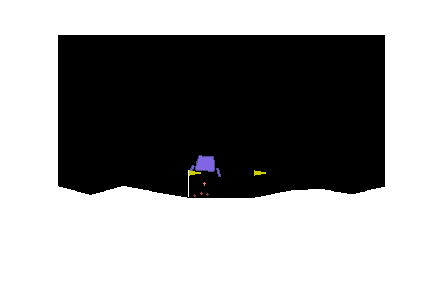
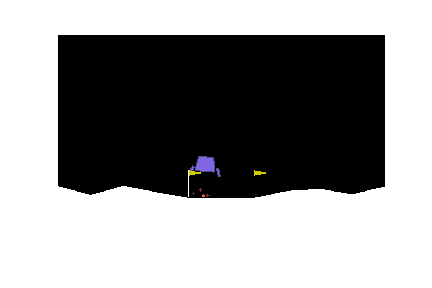
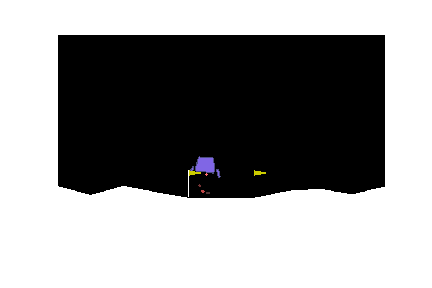
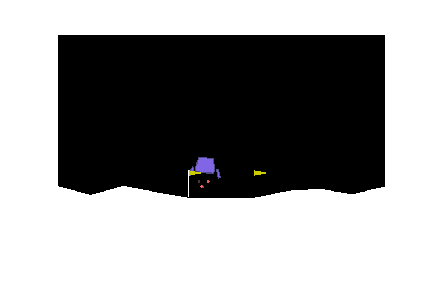
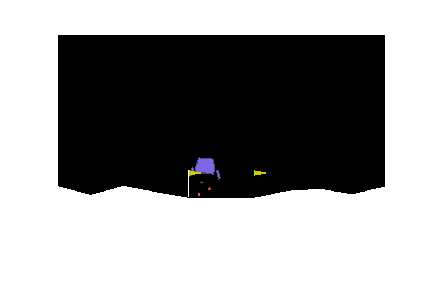
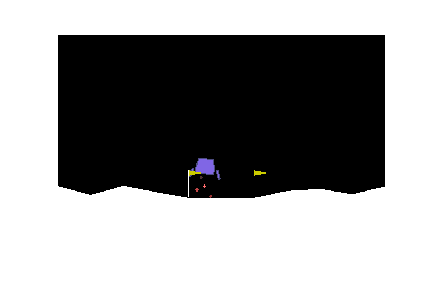
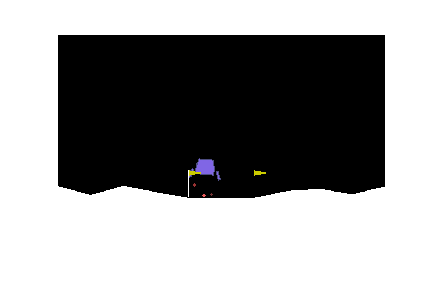
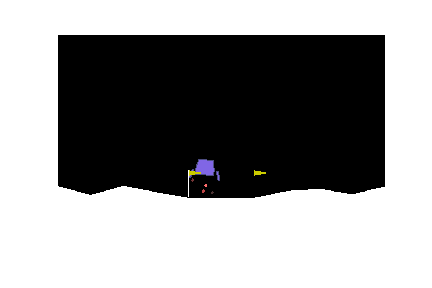
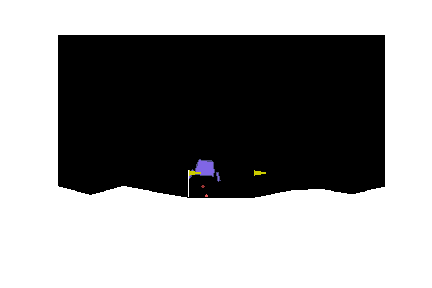
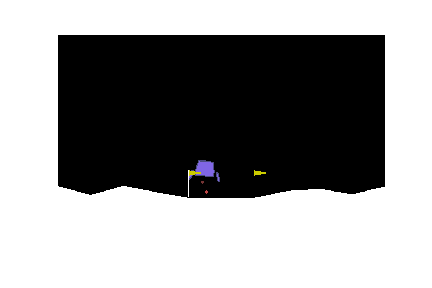
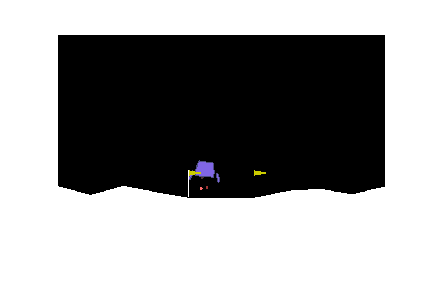
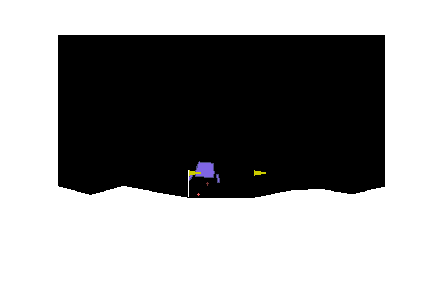
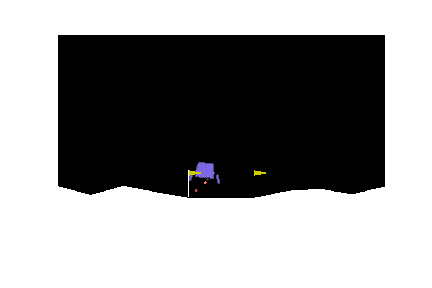
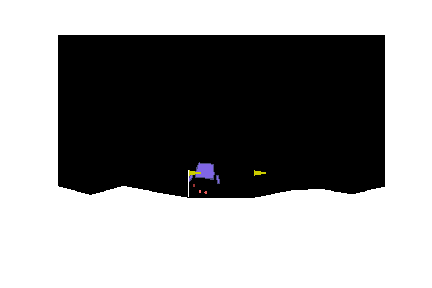
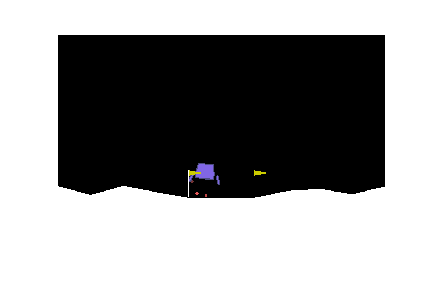
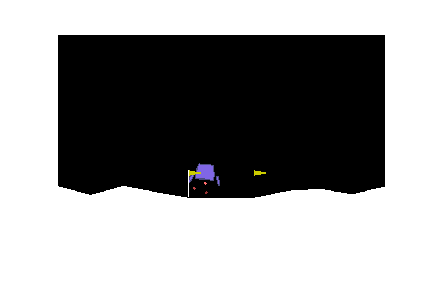
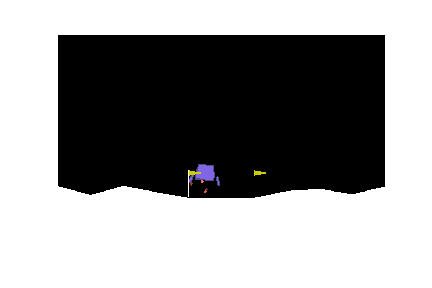
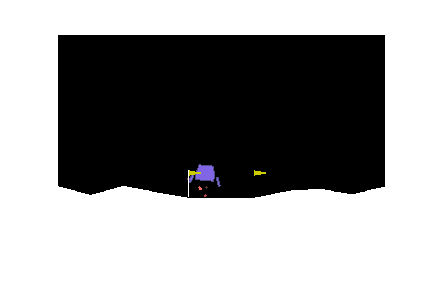
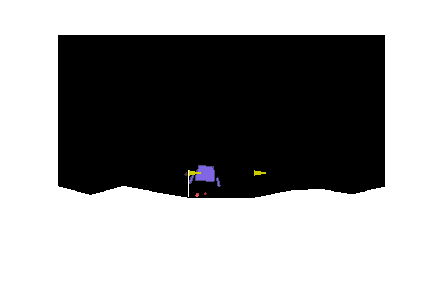
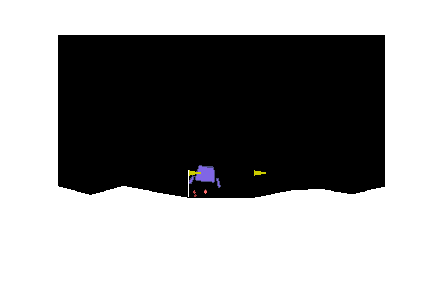
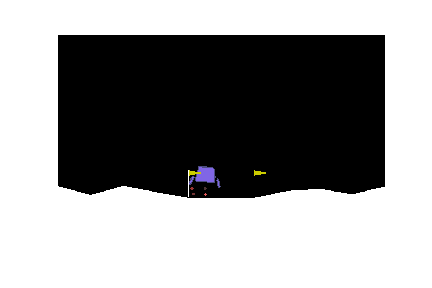
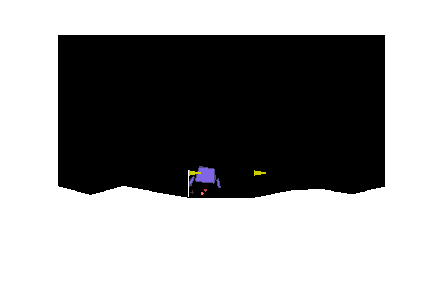
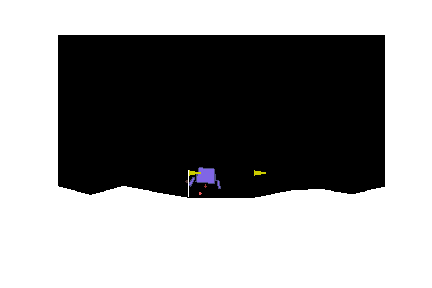
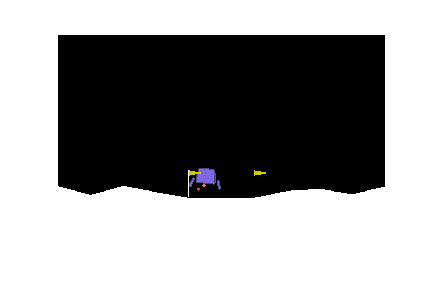
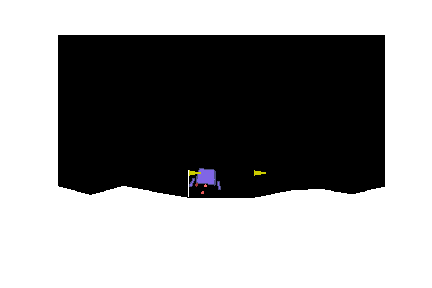
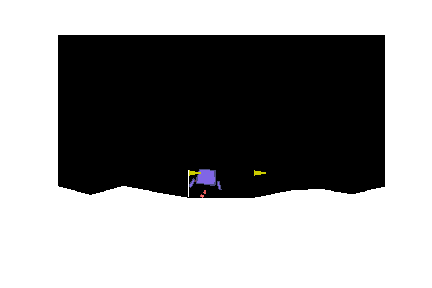
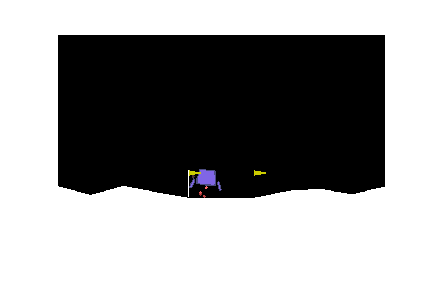
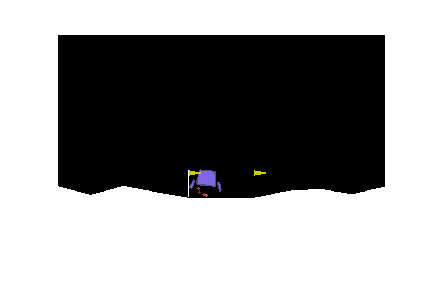
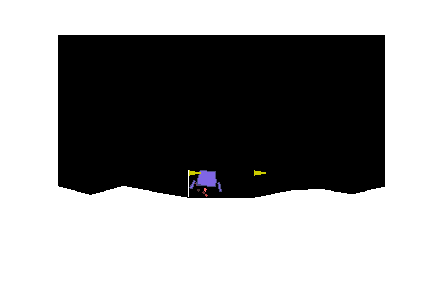
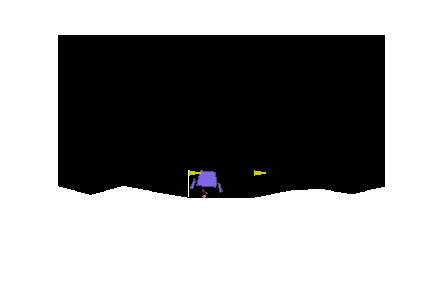
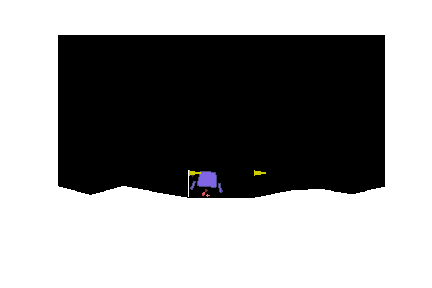
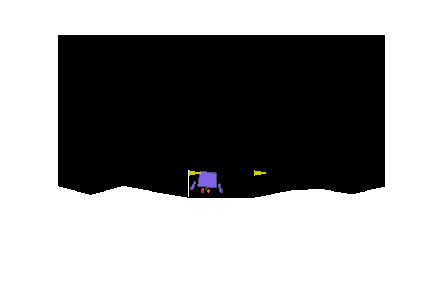
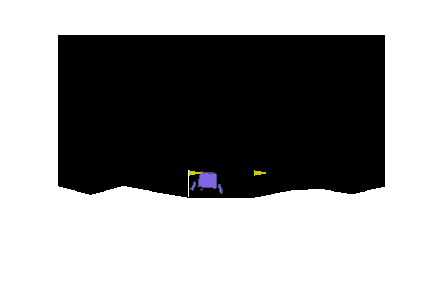
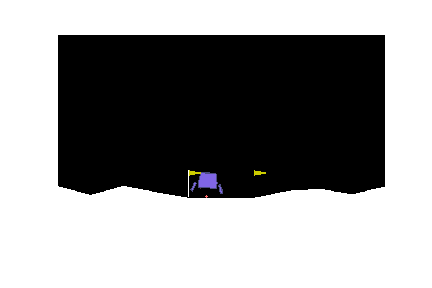
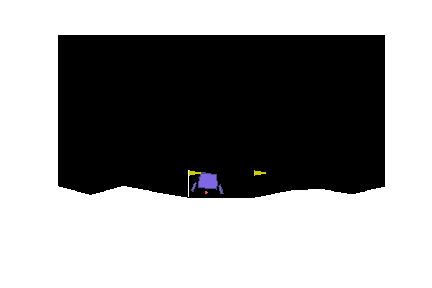
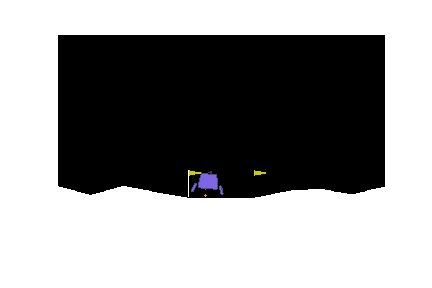
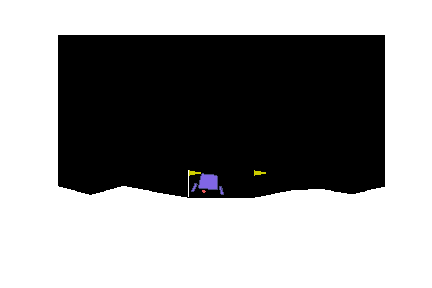
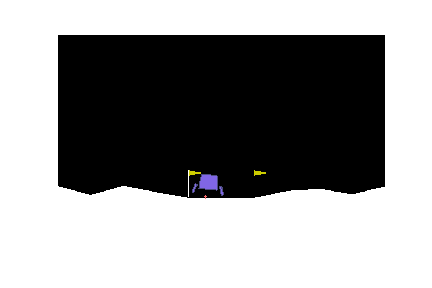
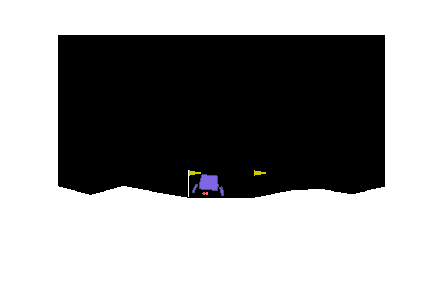
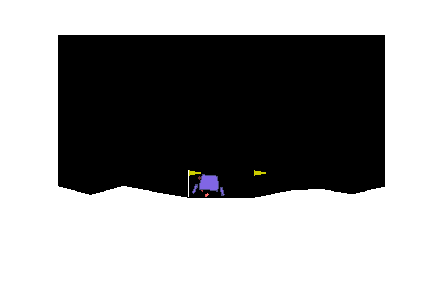
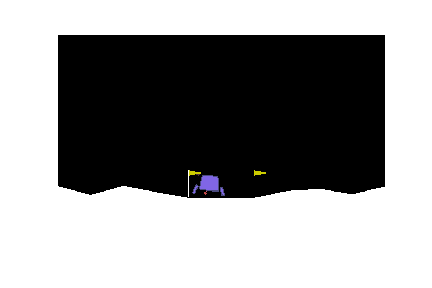
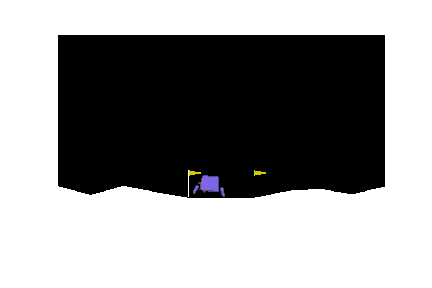
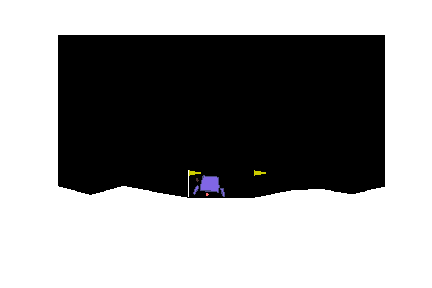
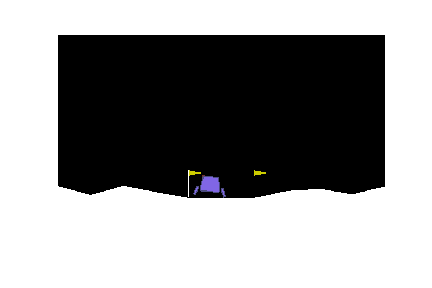
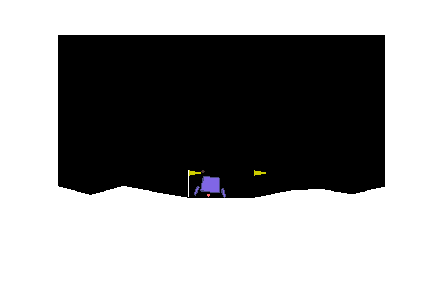
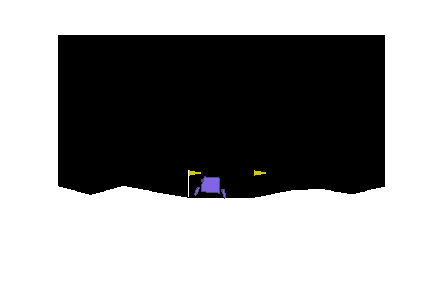
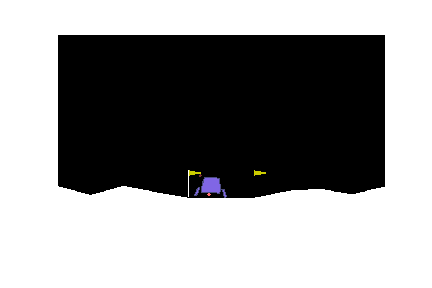
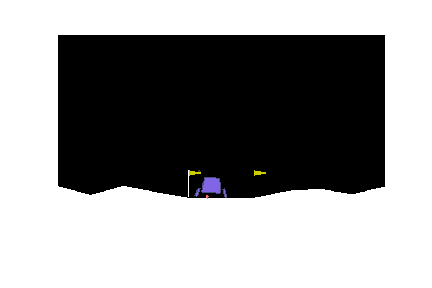
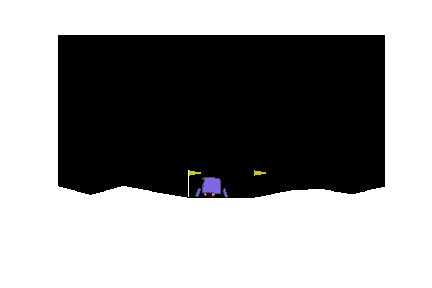
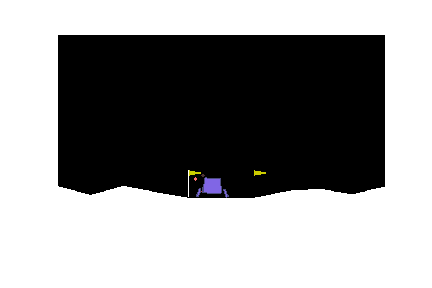
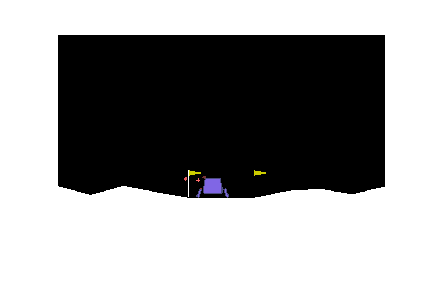
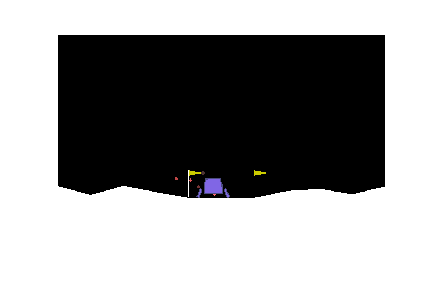
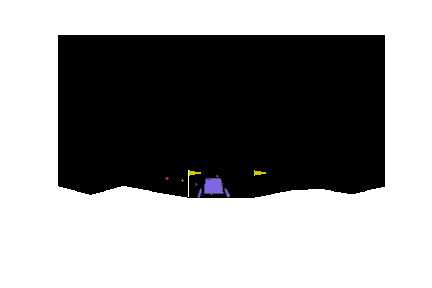
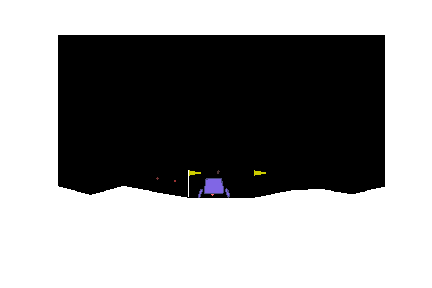
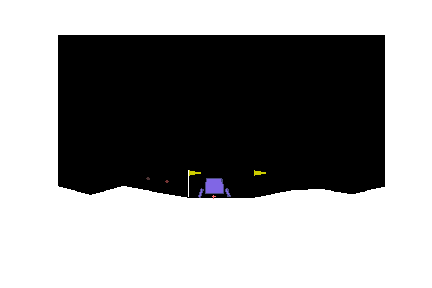
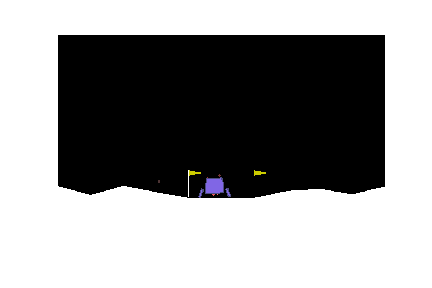
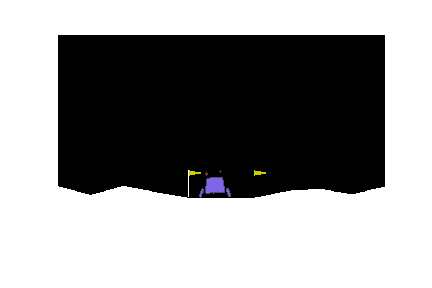
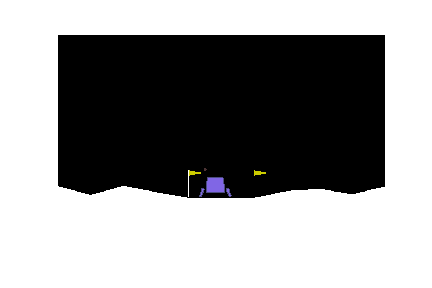
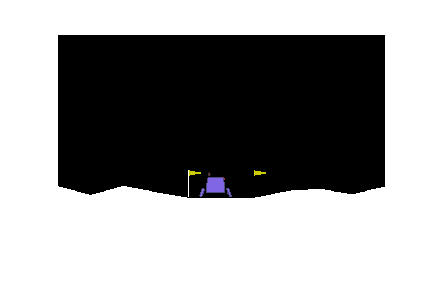
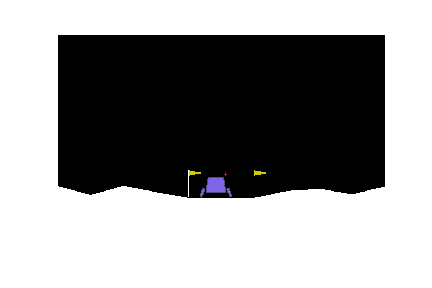
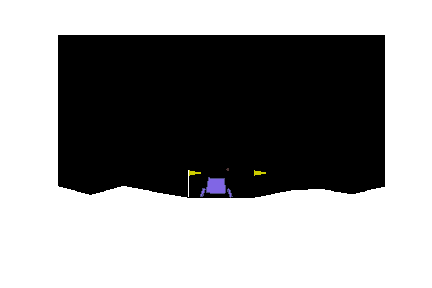
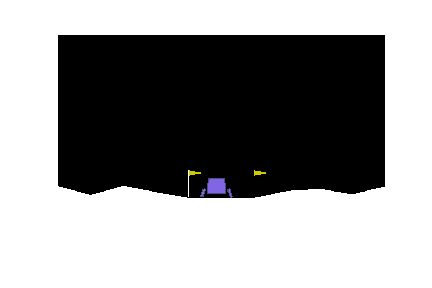
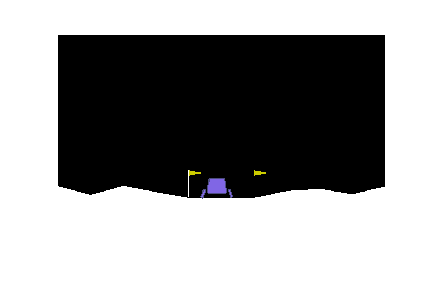
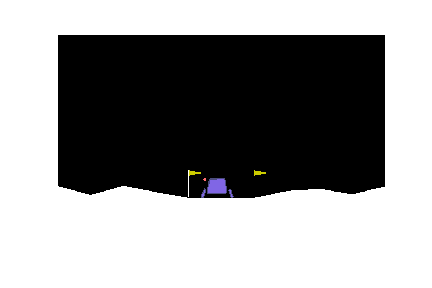
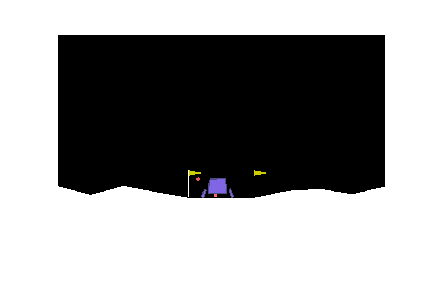
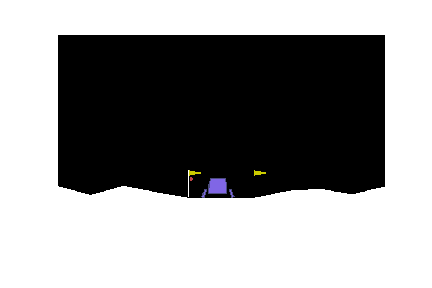
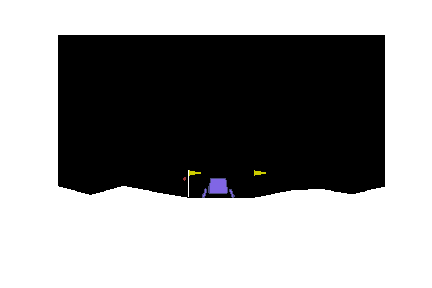
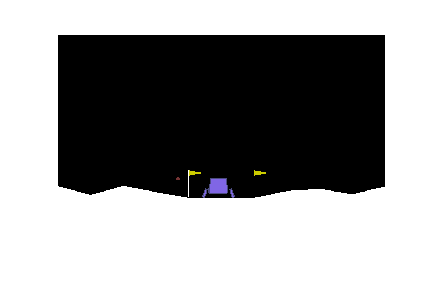
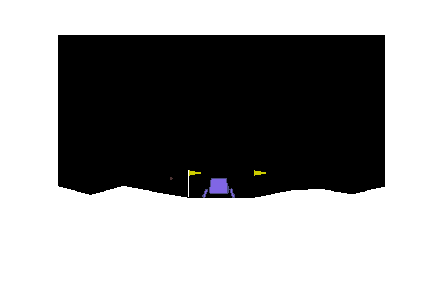
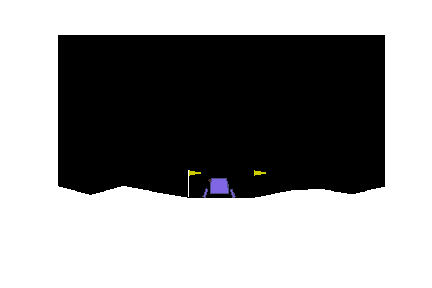
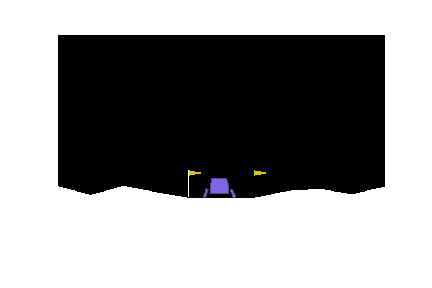
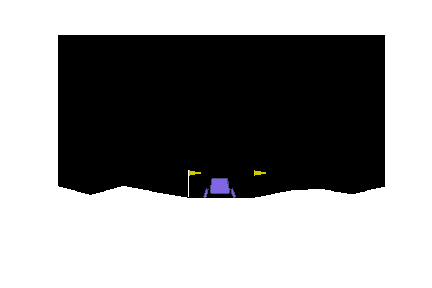
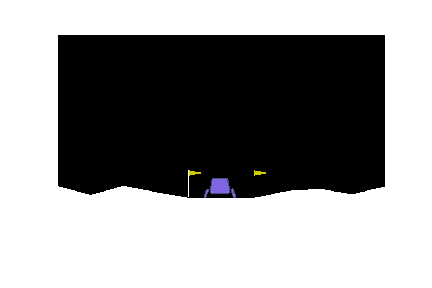
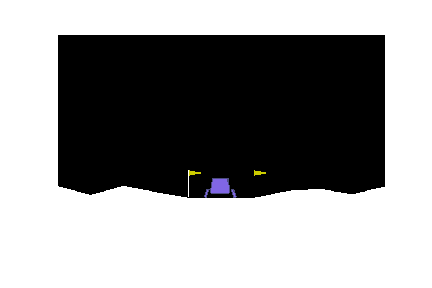
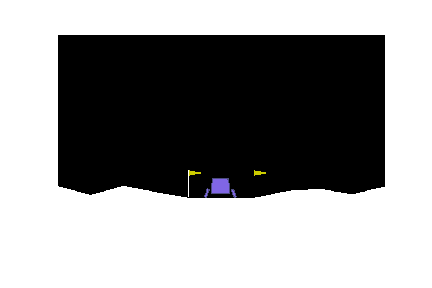
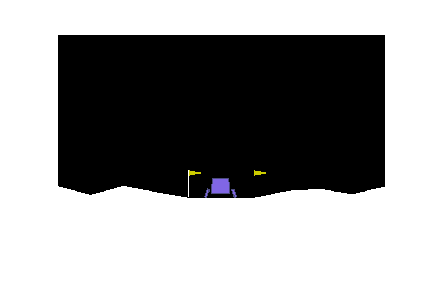
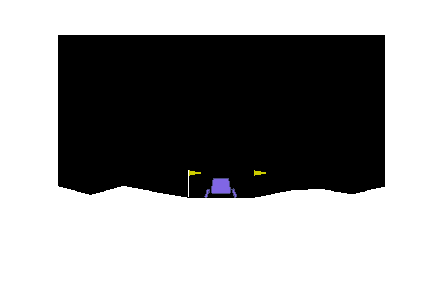
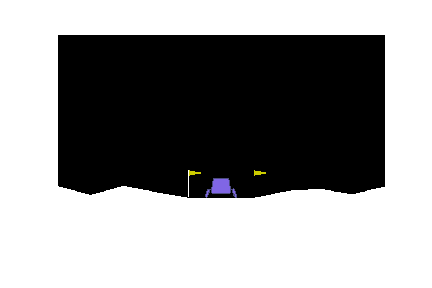
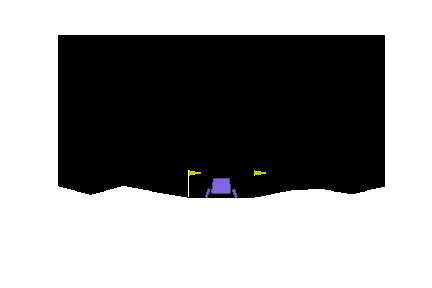
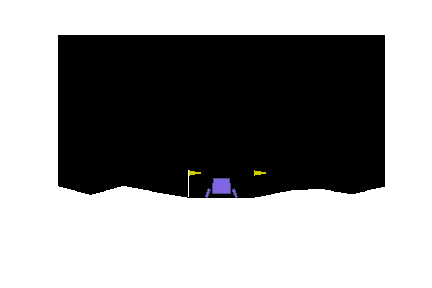
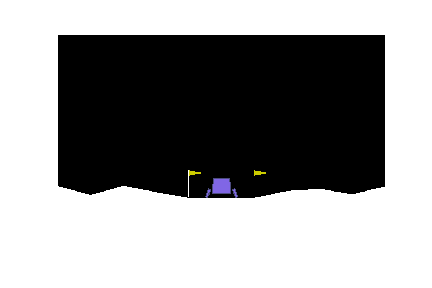
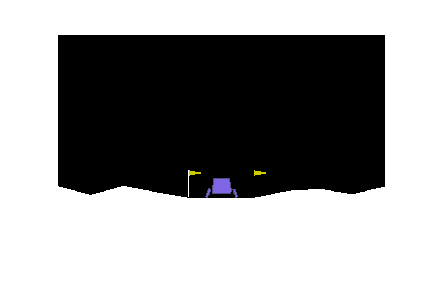
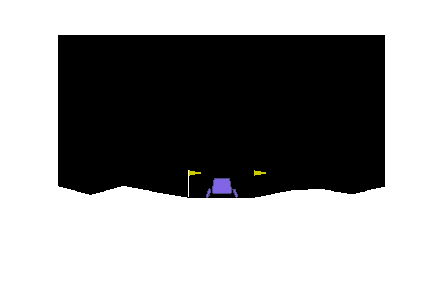
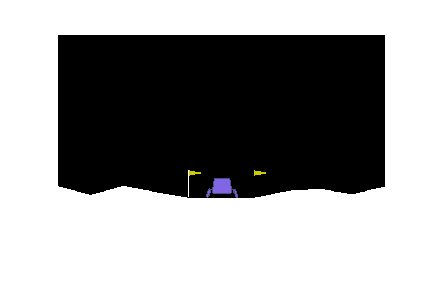
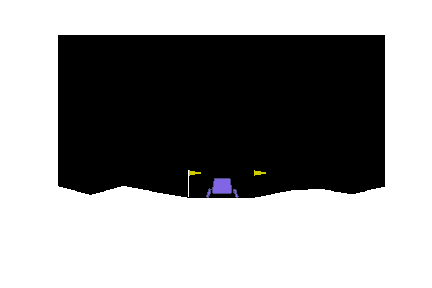
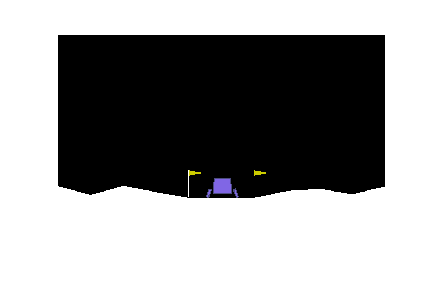
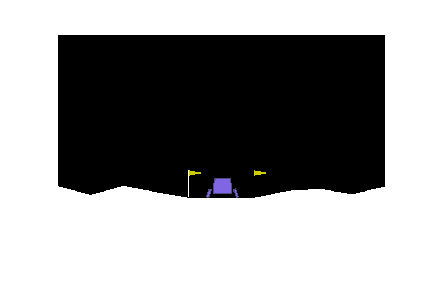
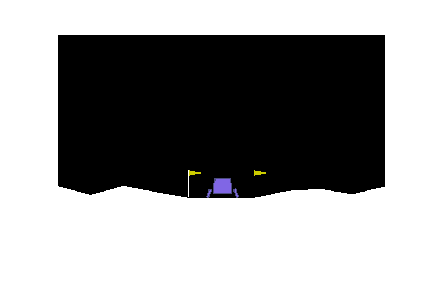
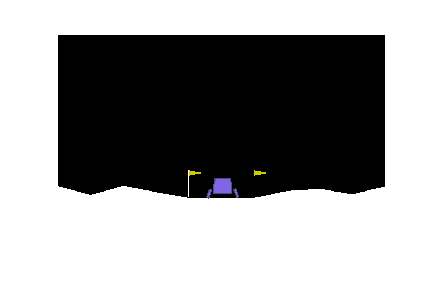
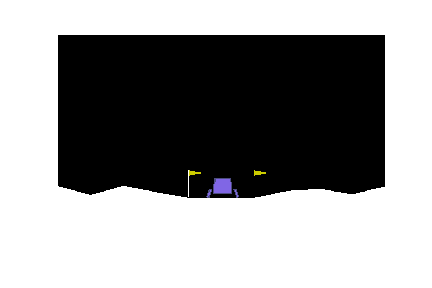
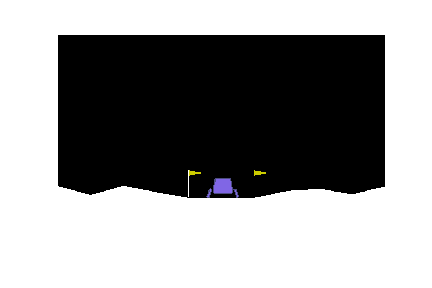
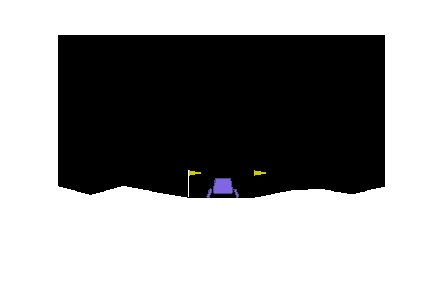
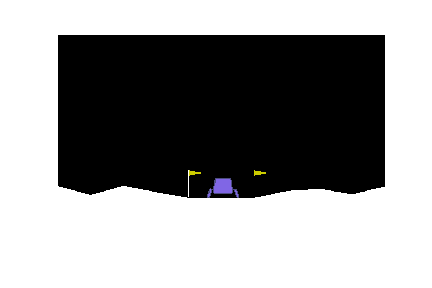
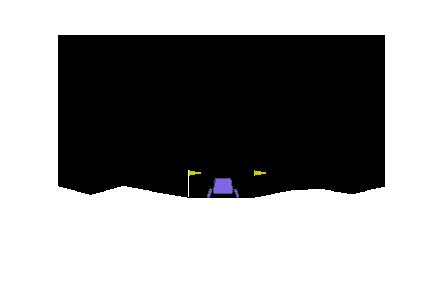
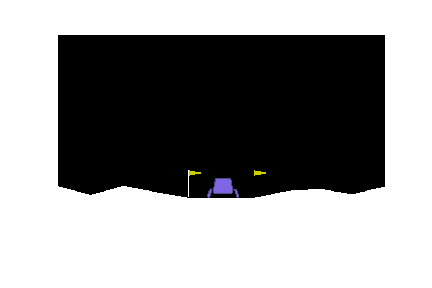
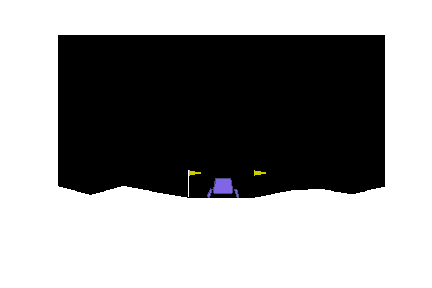
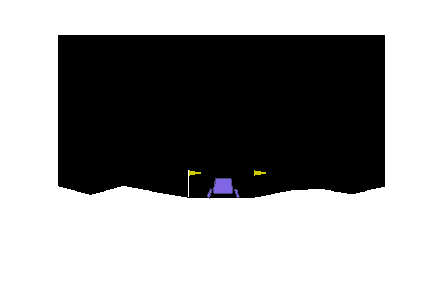
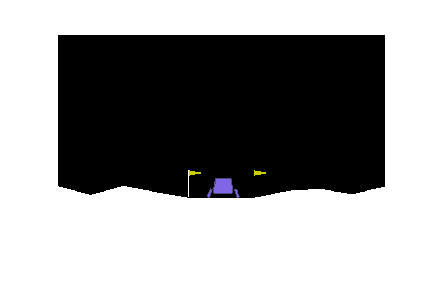
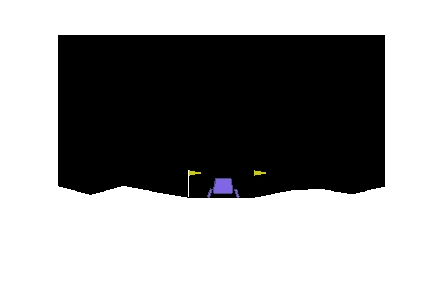
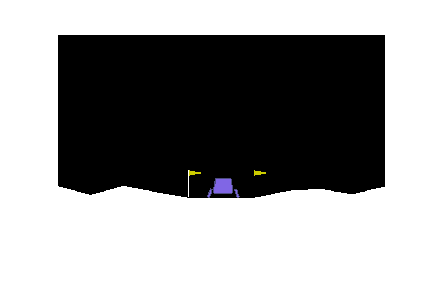
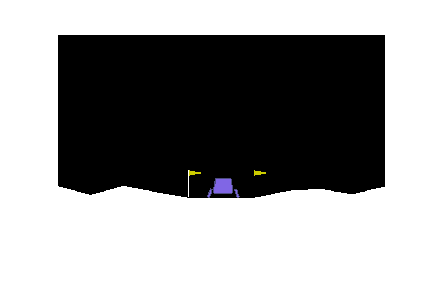
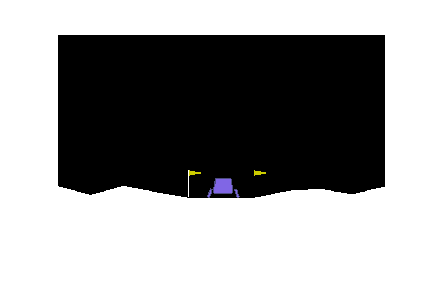
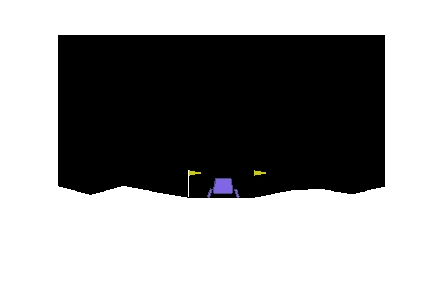
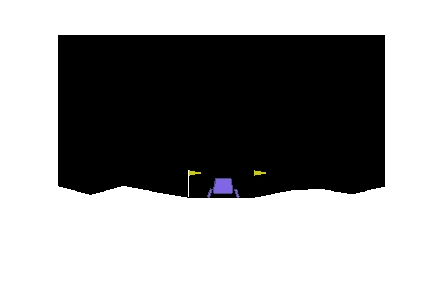
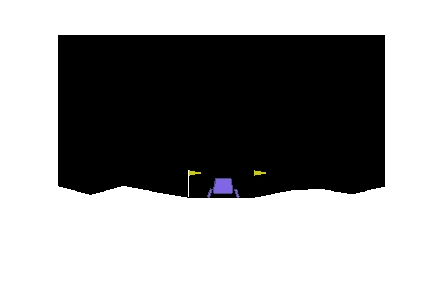
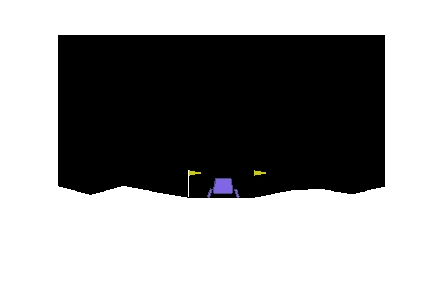
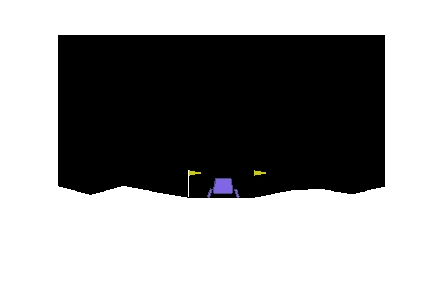
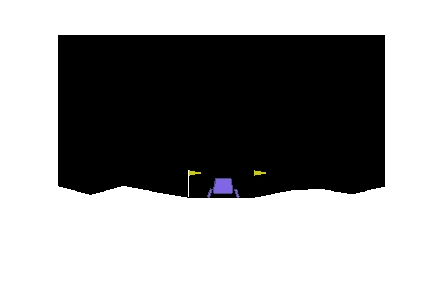
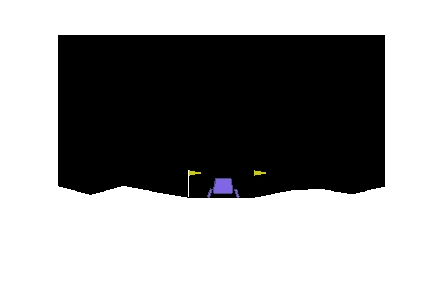
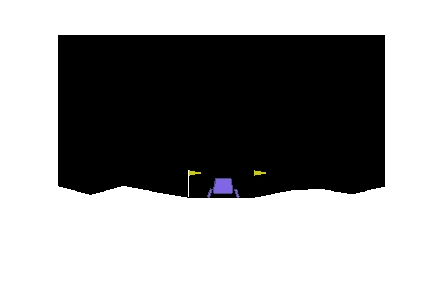
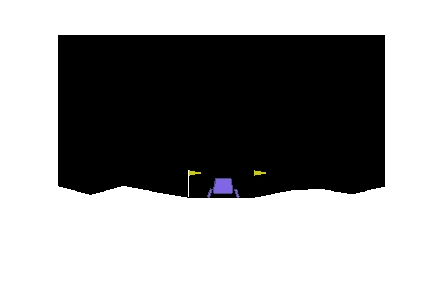
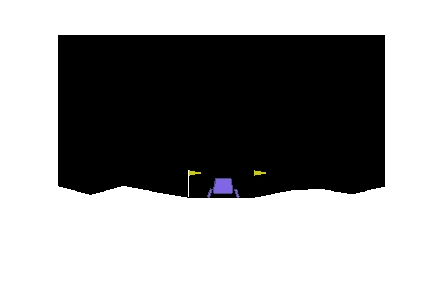
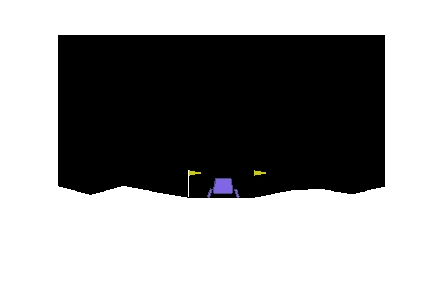
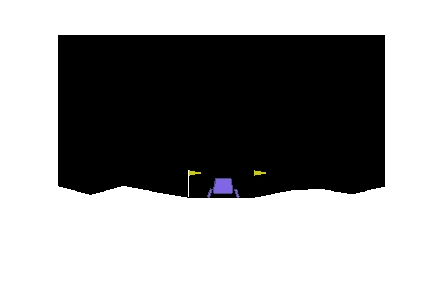
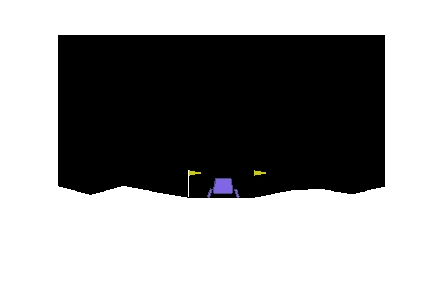
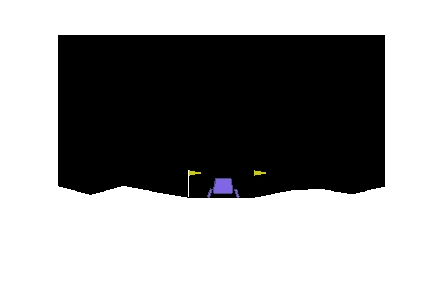
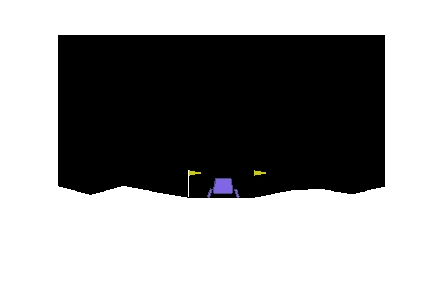
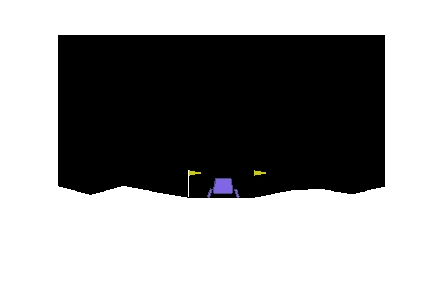
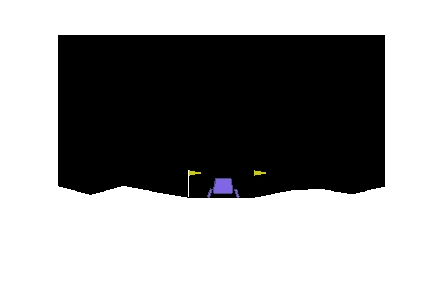
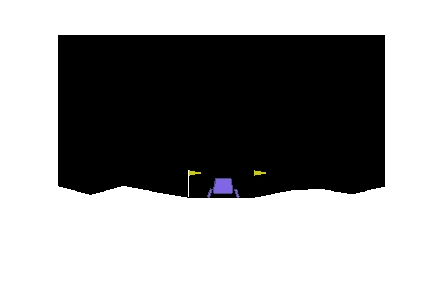
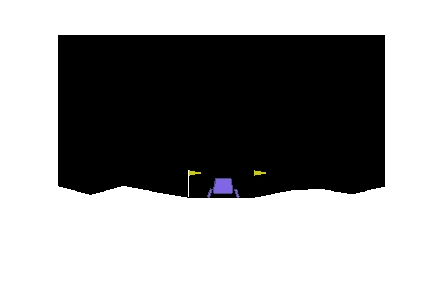
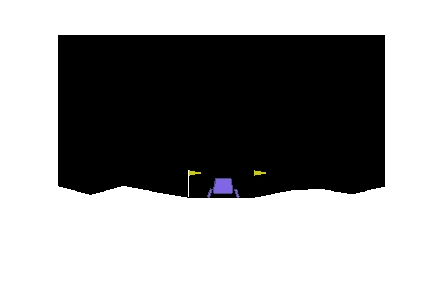
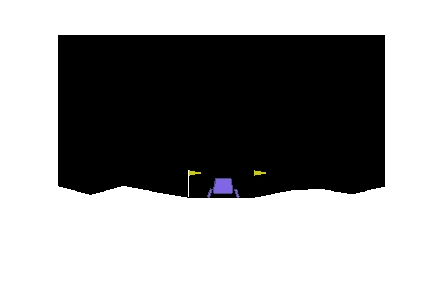
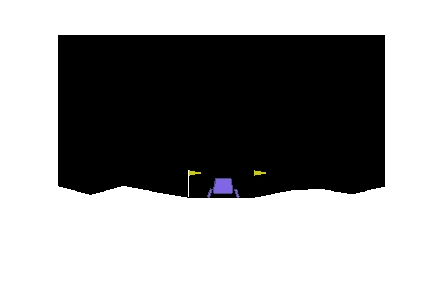

Best of generation 90



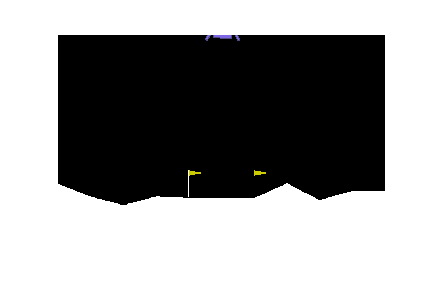
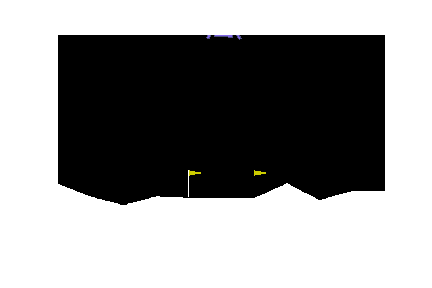
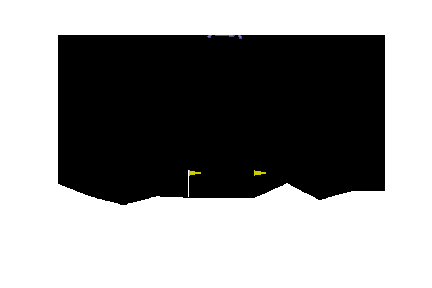
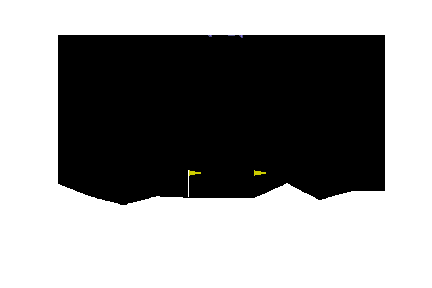
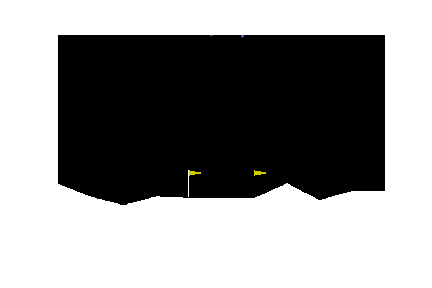
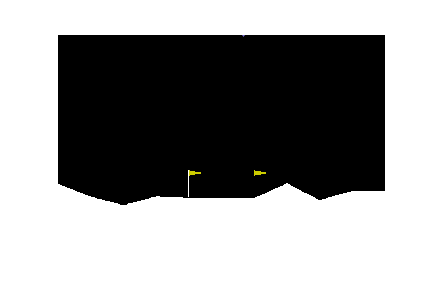
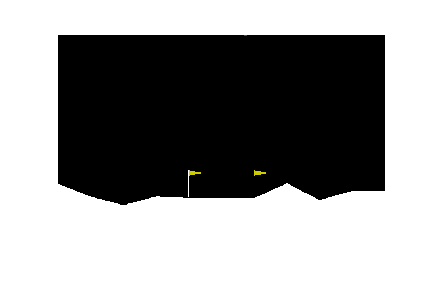
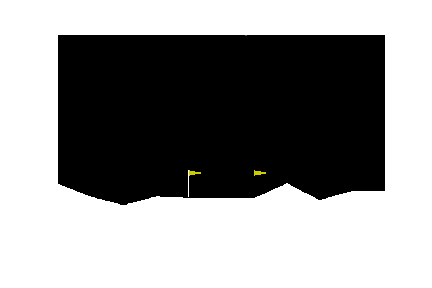
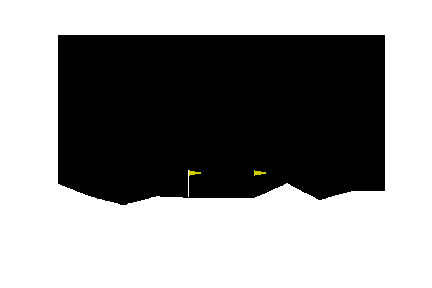
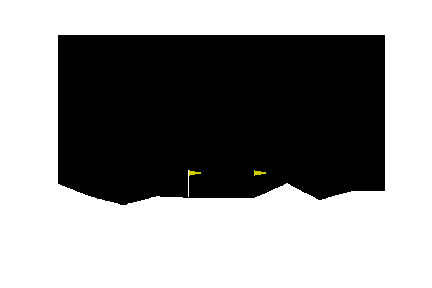
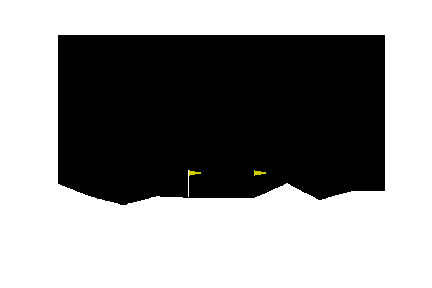
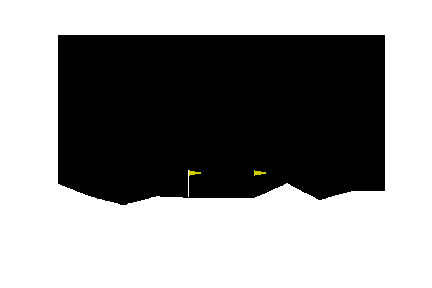
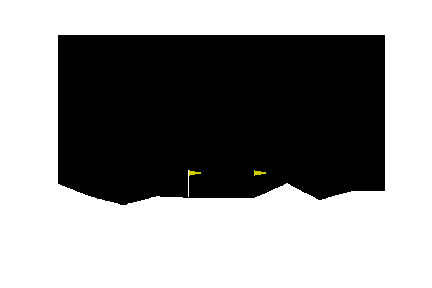
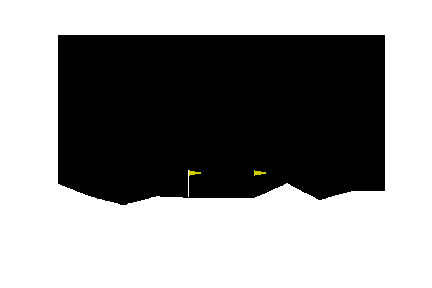
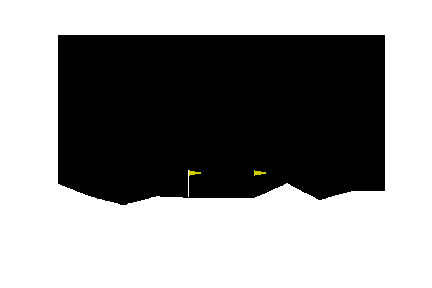
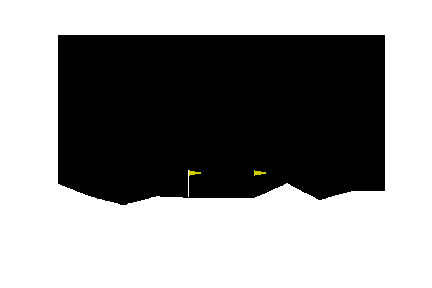
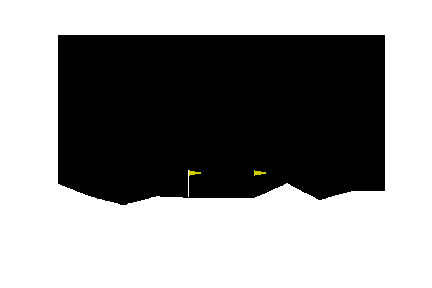
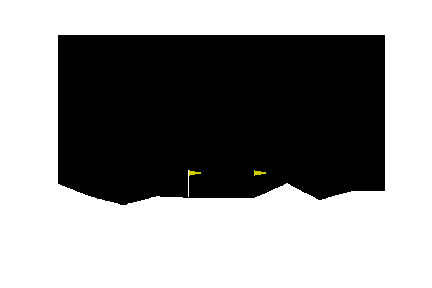
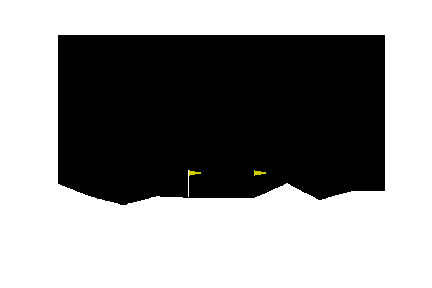
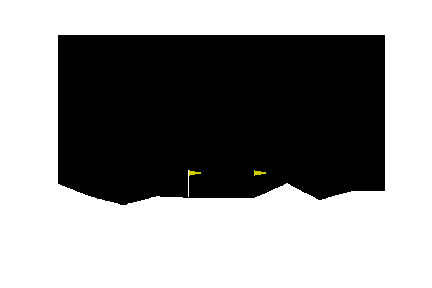
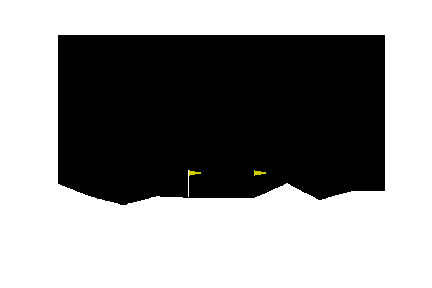
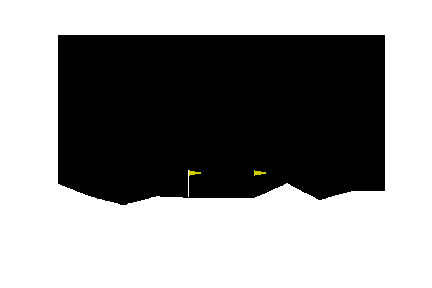
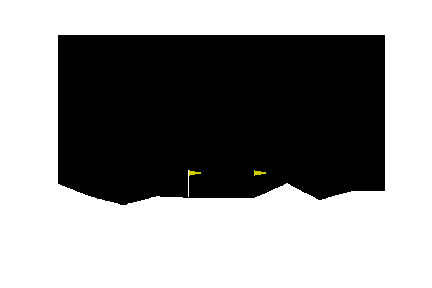
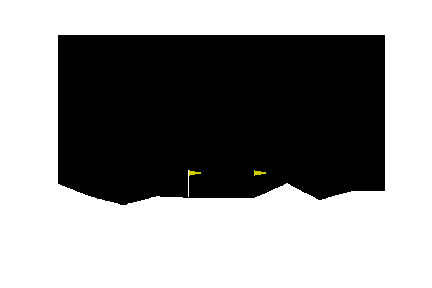
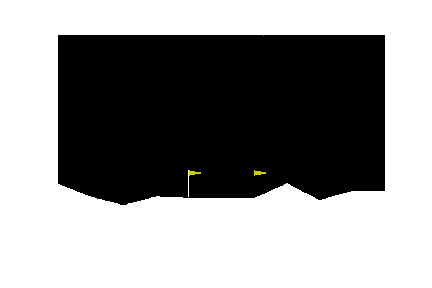
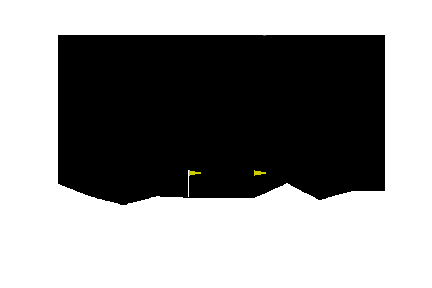
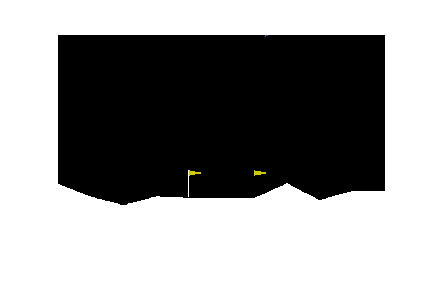
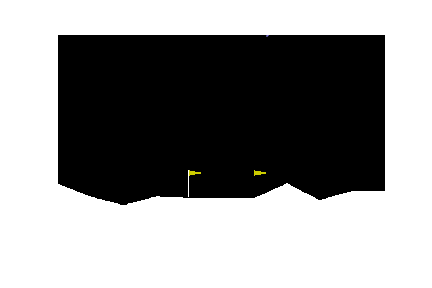
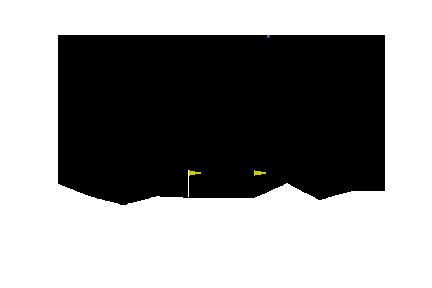
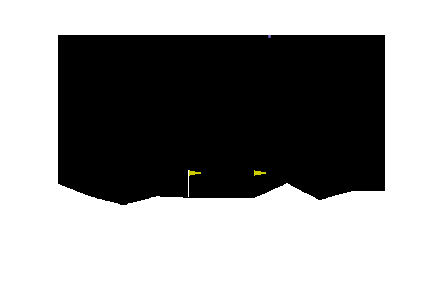
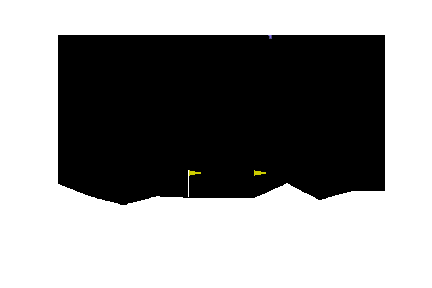
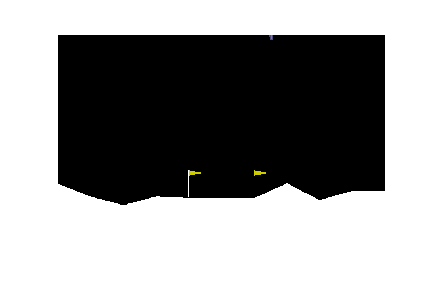
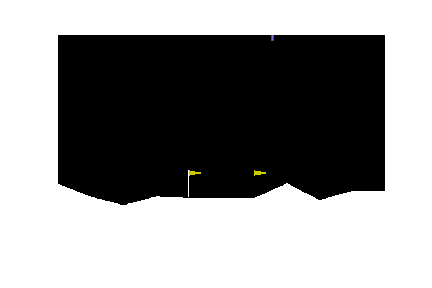
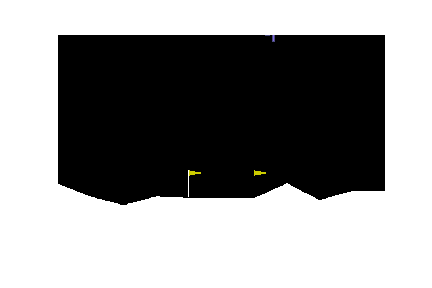
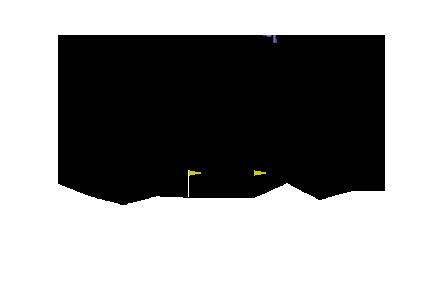
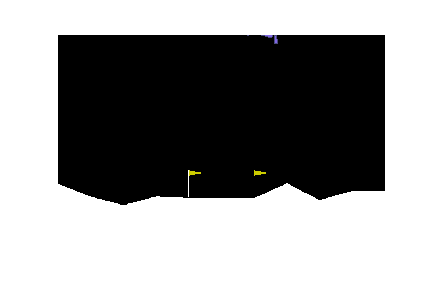
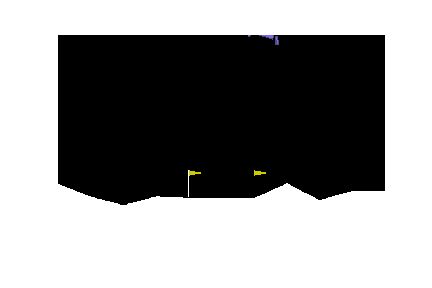
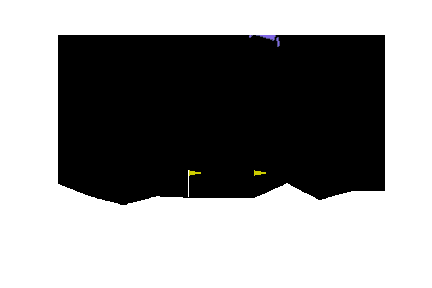
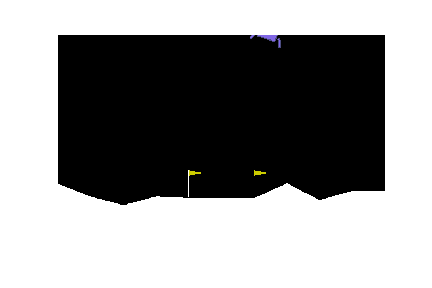
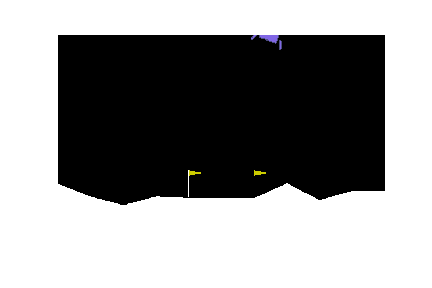
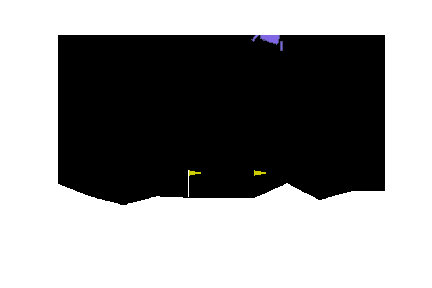
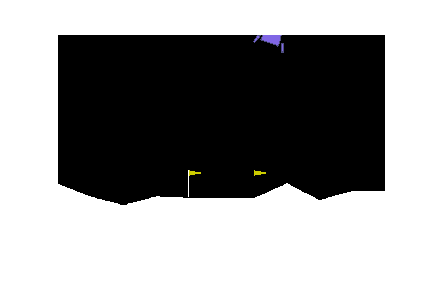
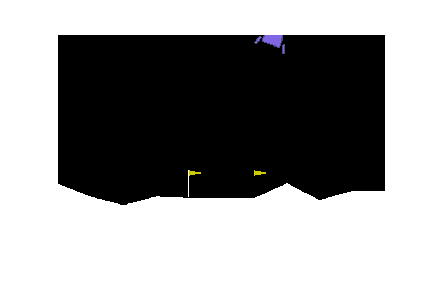
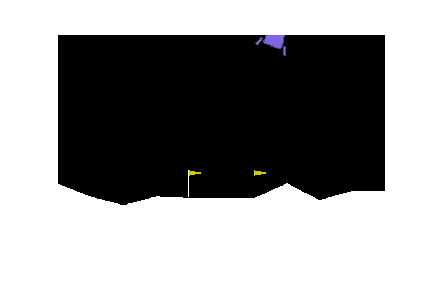
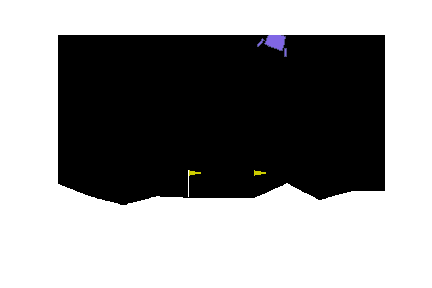
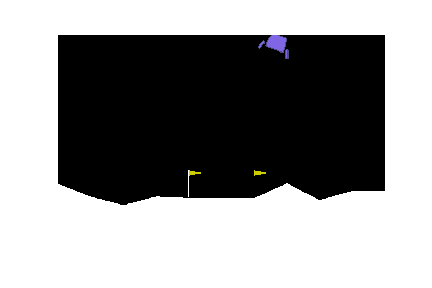
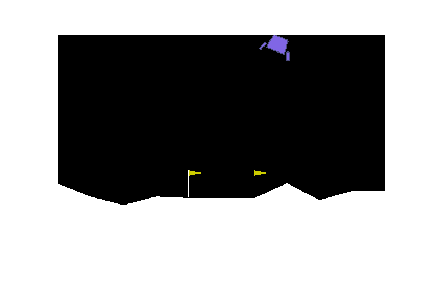
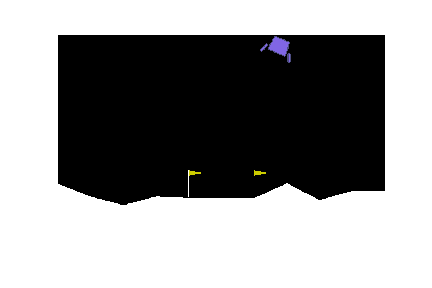
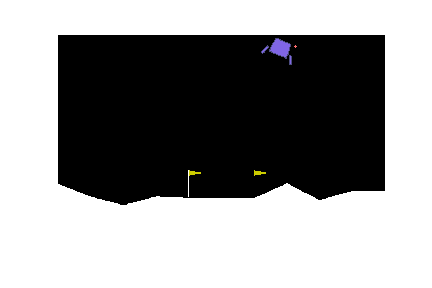
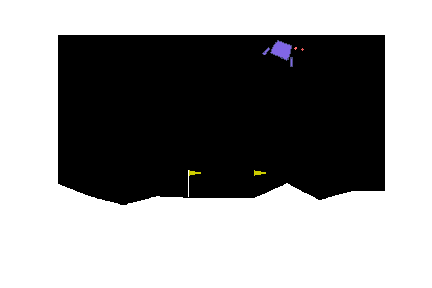
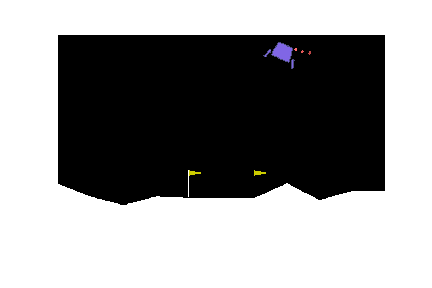
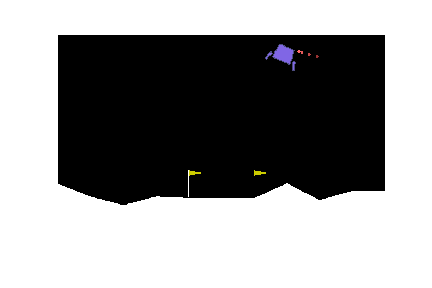
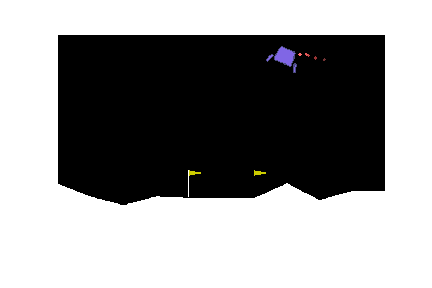
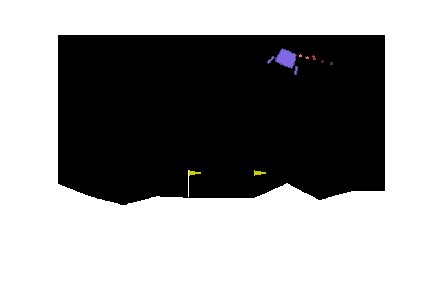
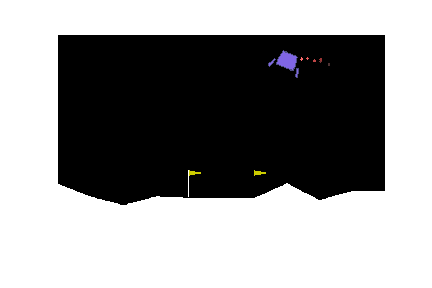
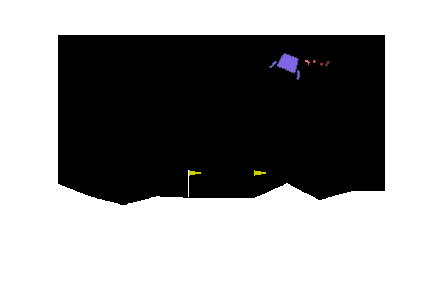
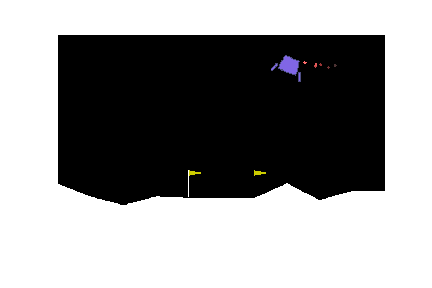
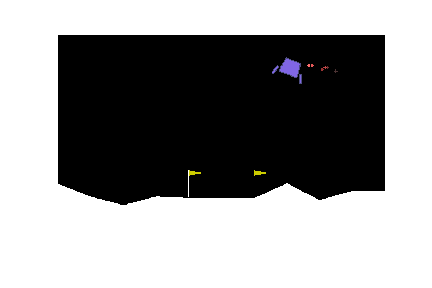
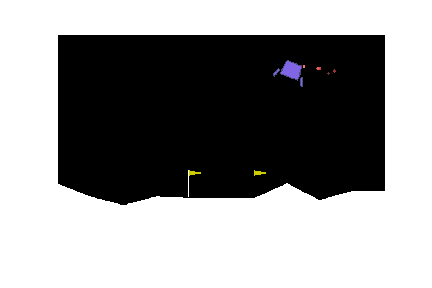
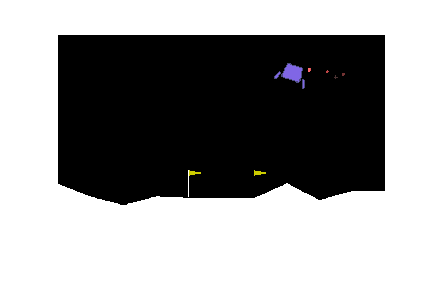
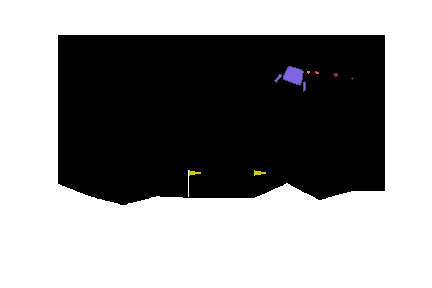
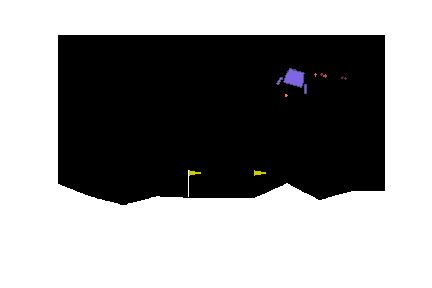
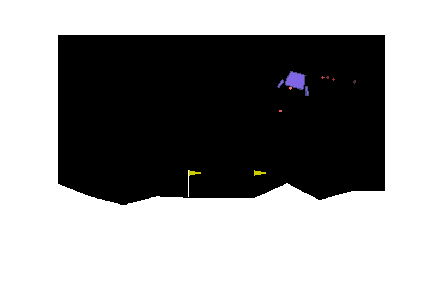
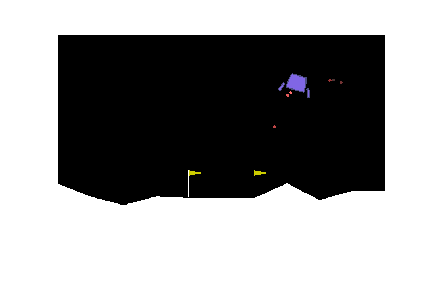
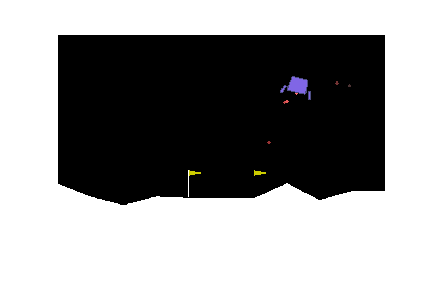
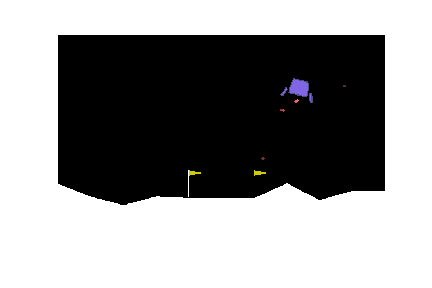
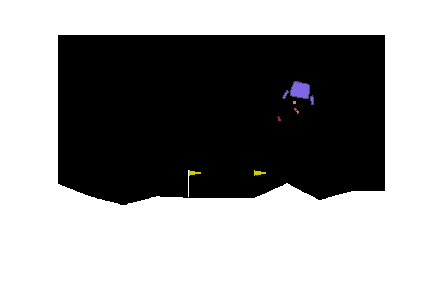
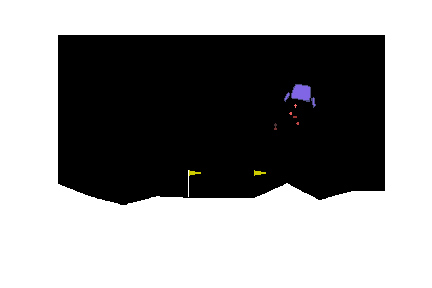
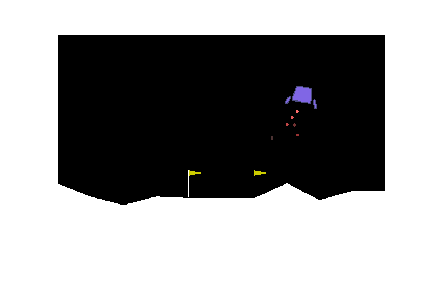
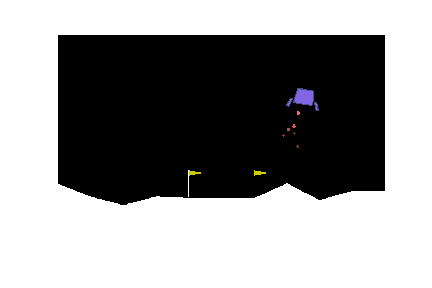
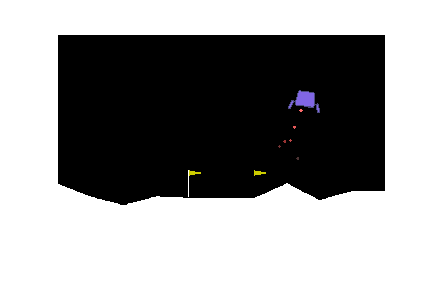
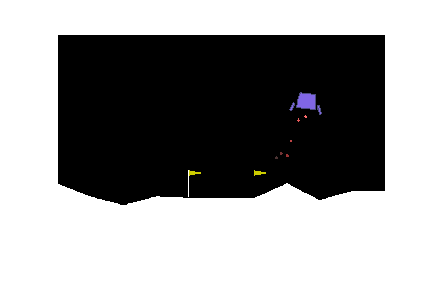
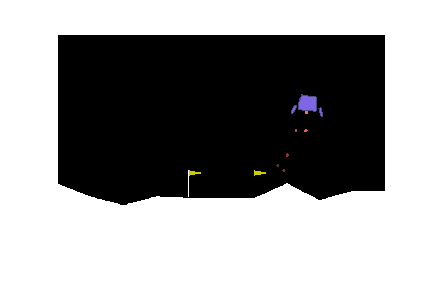
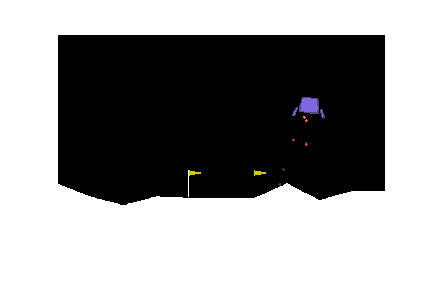
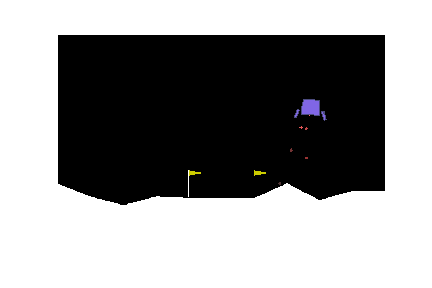
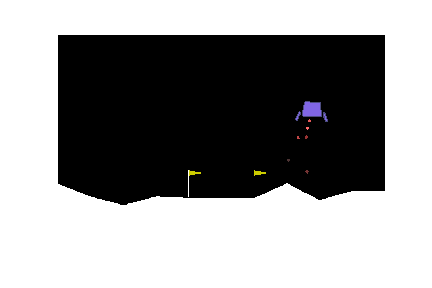
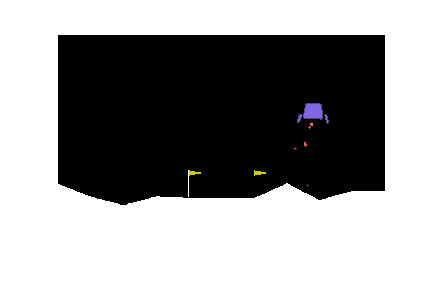
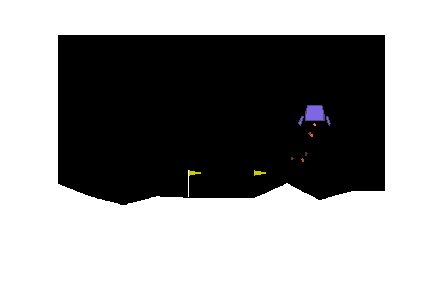
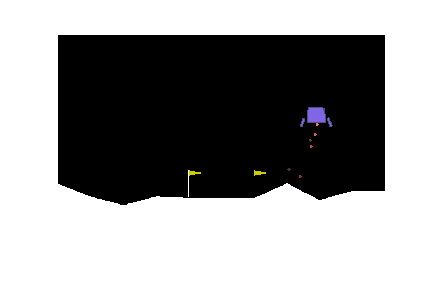
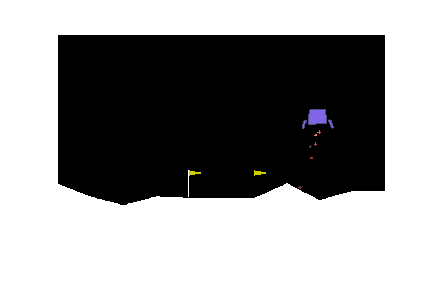
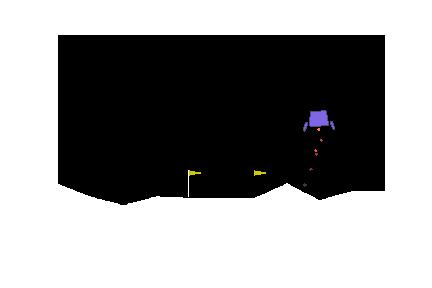
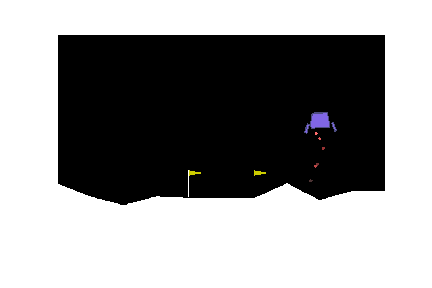
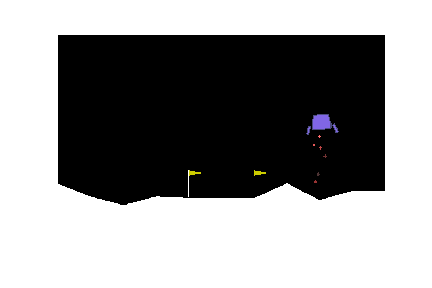
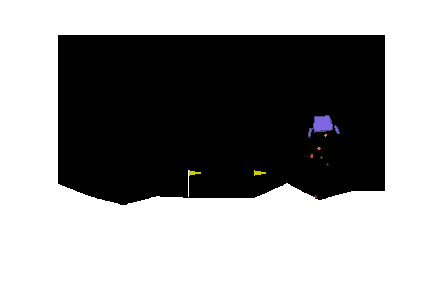
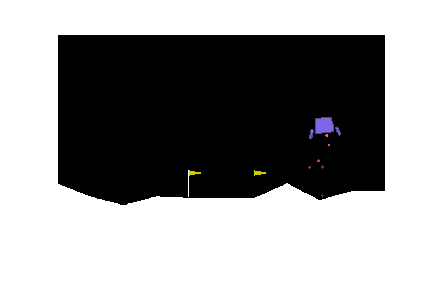
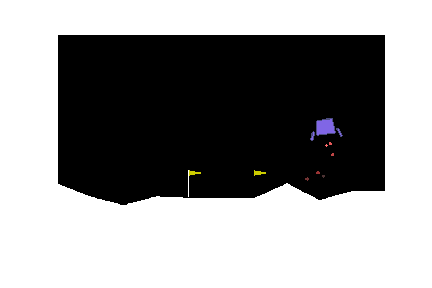
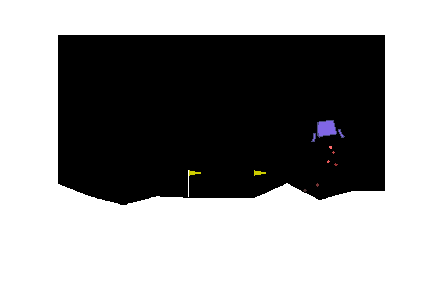
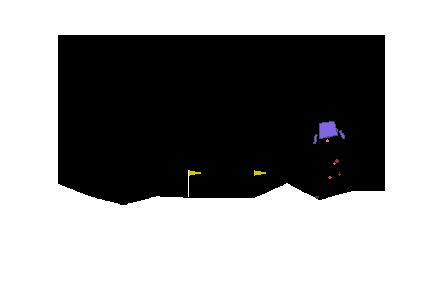
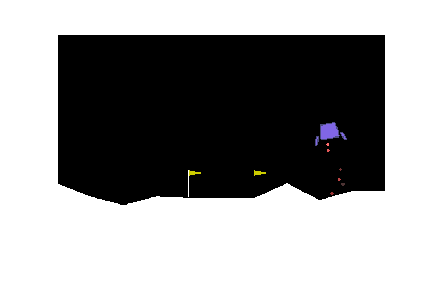
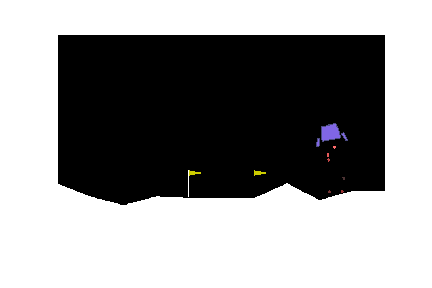
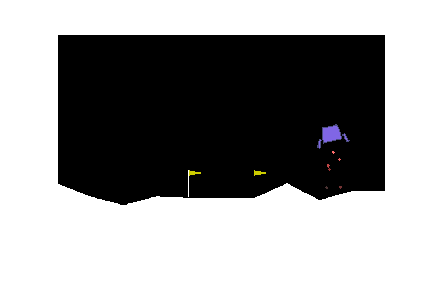
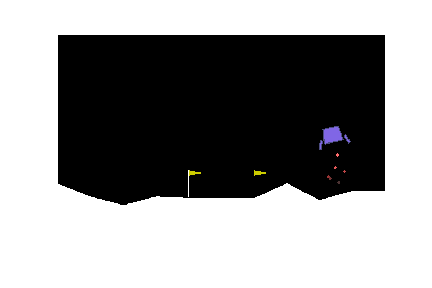
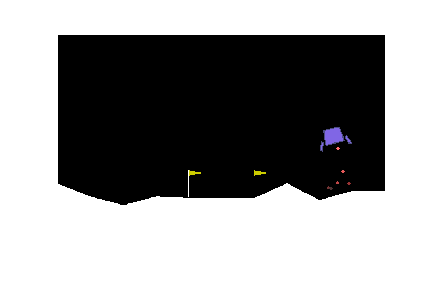
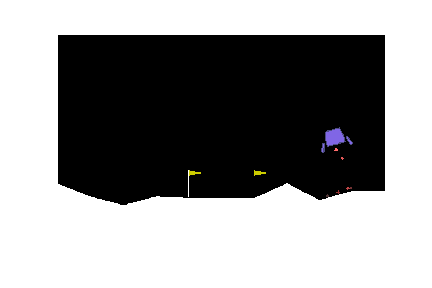
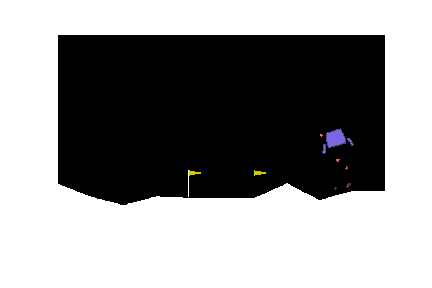
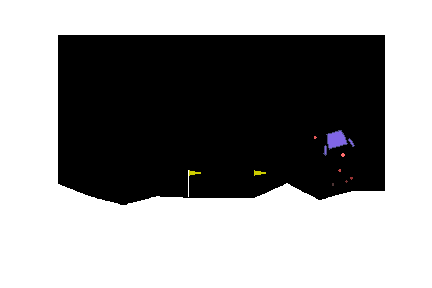
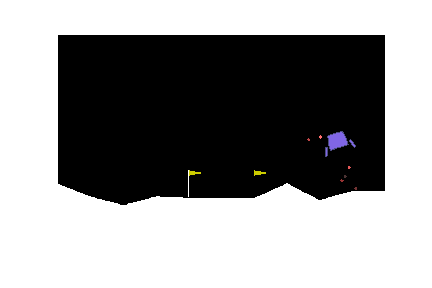
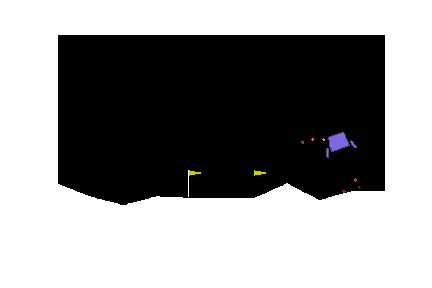
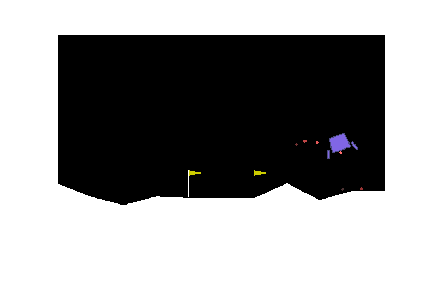
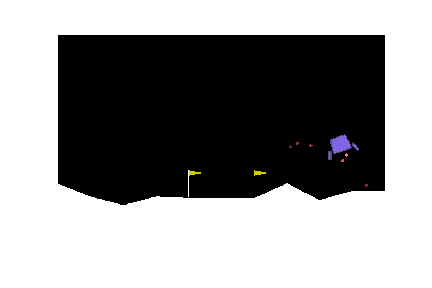
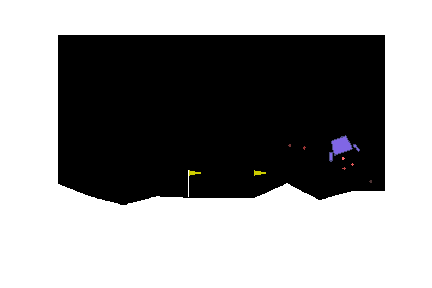
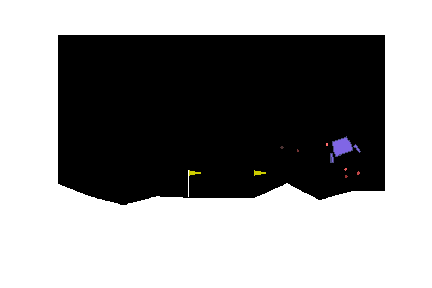
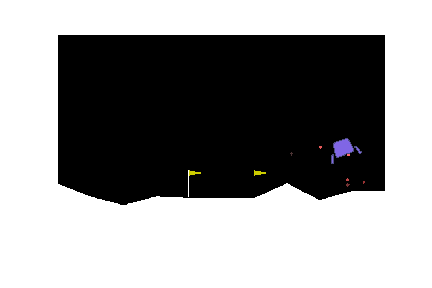
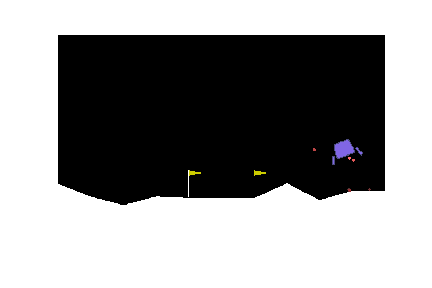
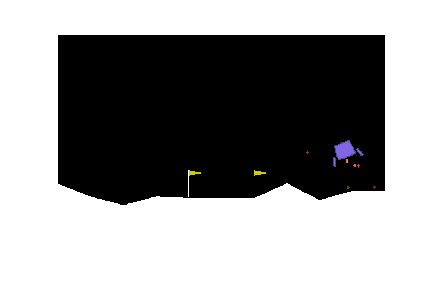
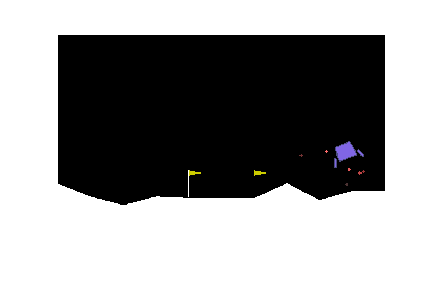
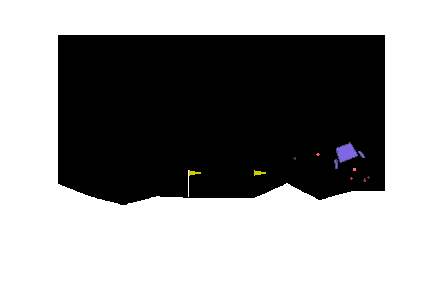
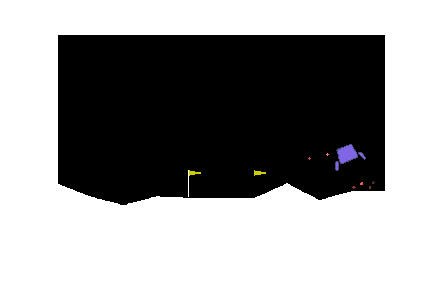
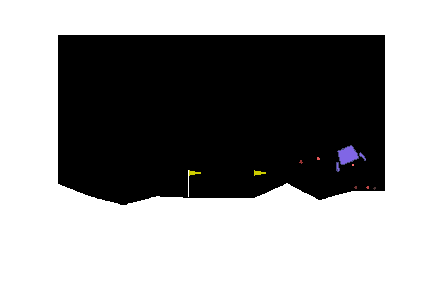
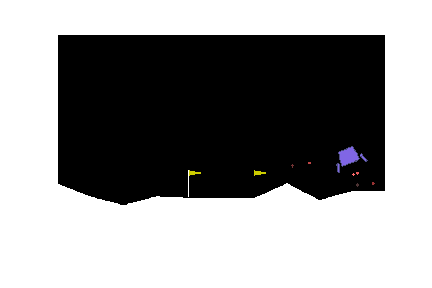
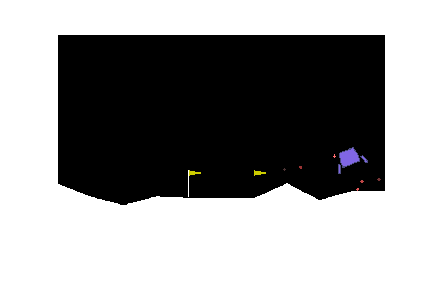
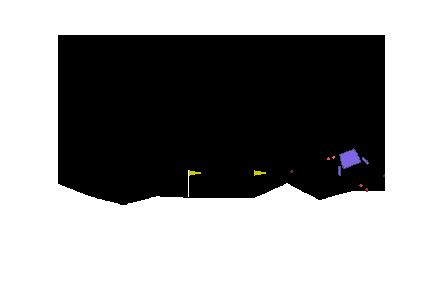
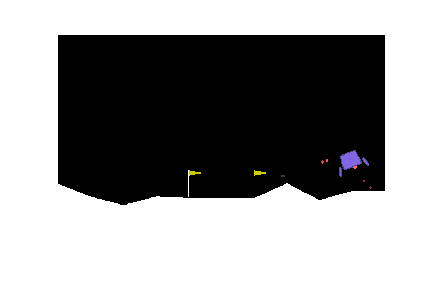
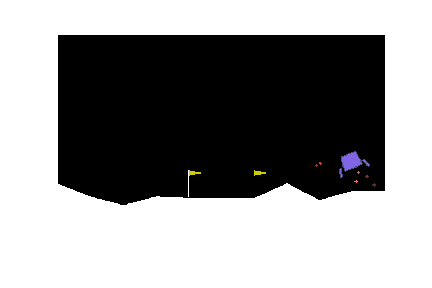
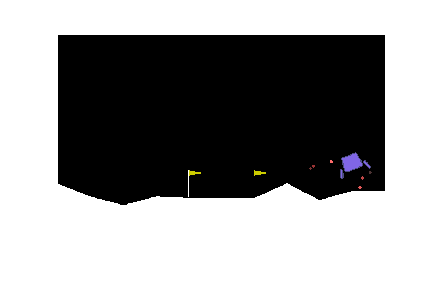
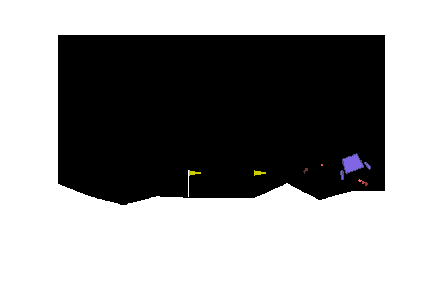
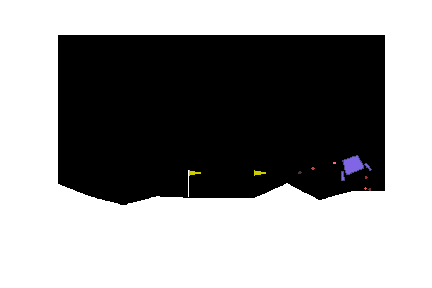
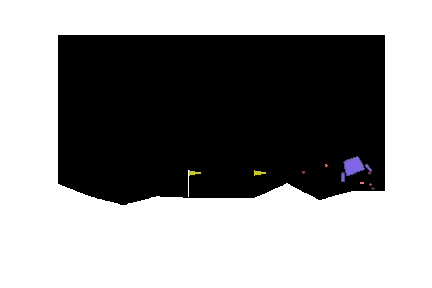
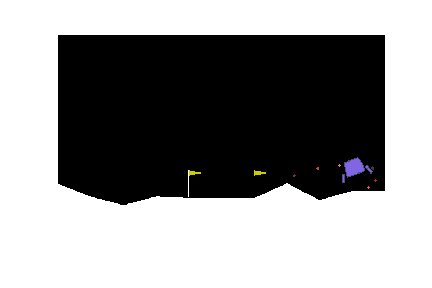
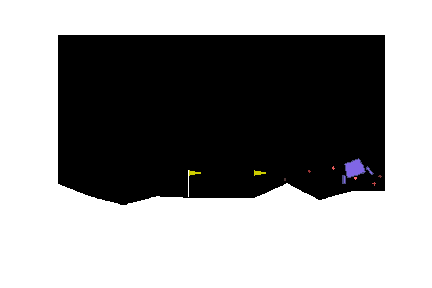
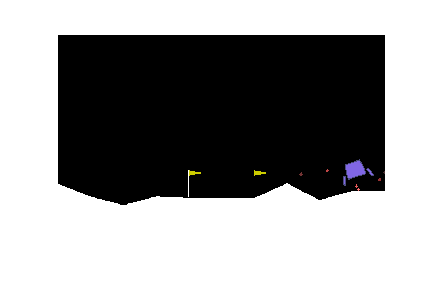
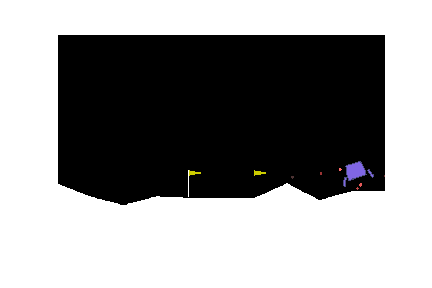
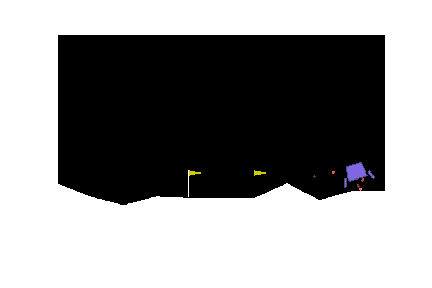
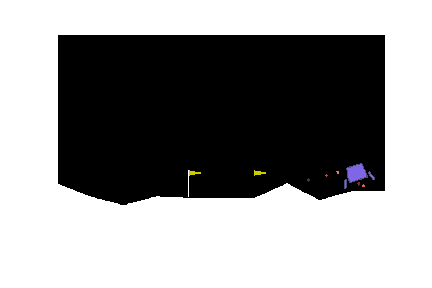
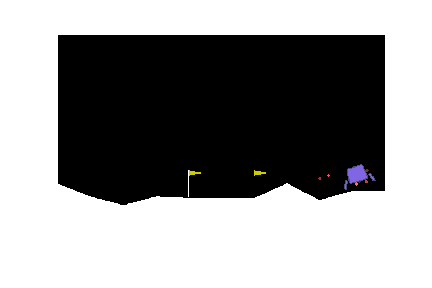
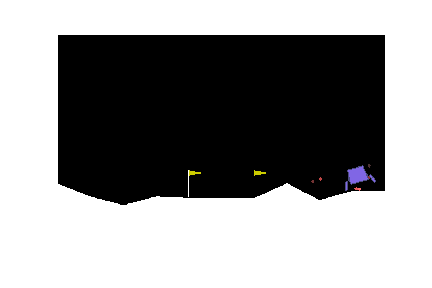
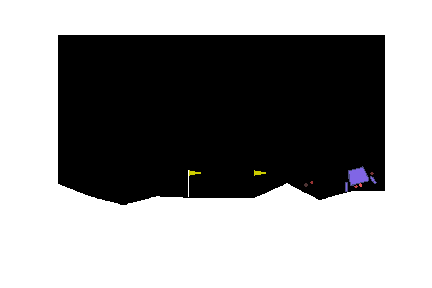
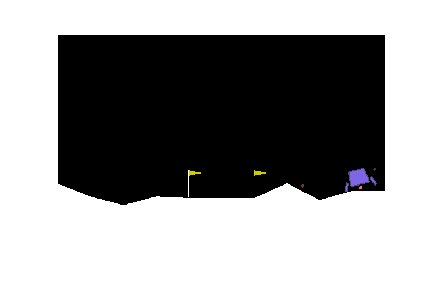
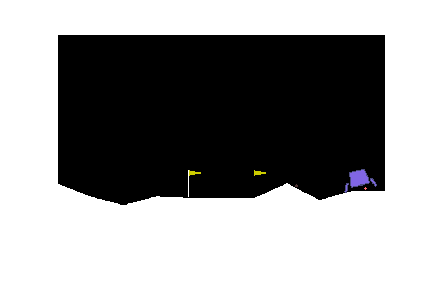
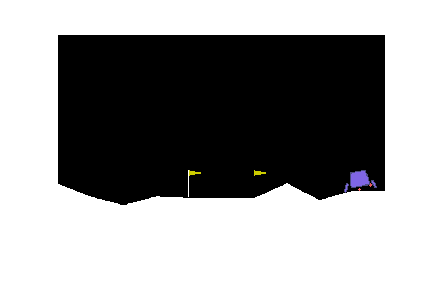
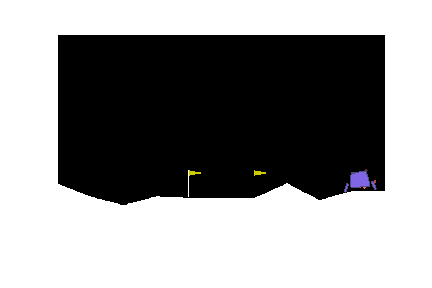
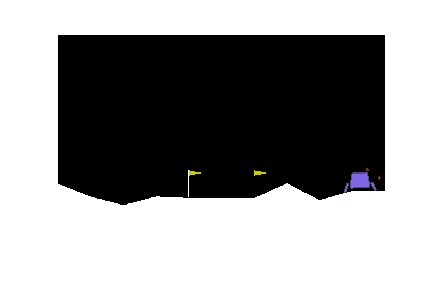
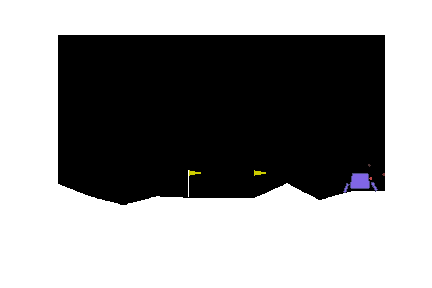
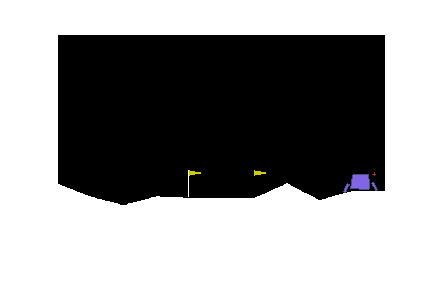
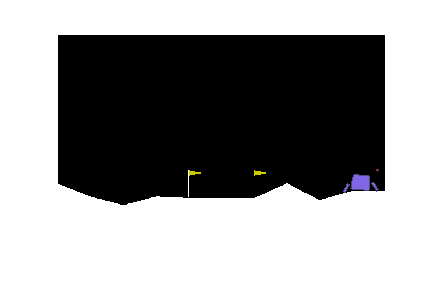

In [10]:
for i in range(10):
    print("Best of generation", i*10)
    episodeOnNet(bests[i])


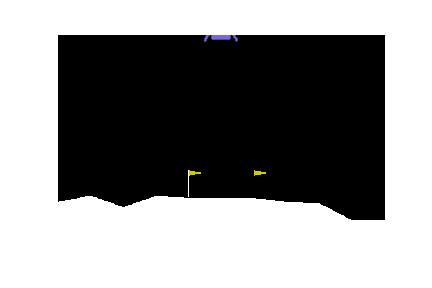
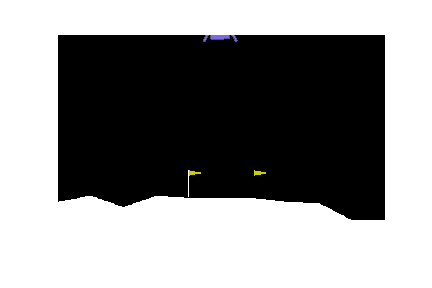
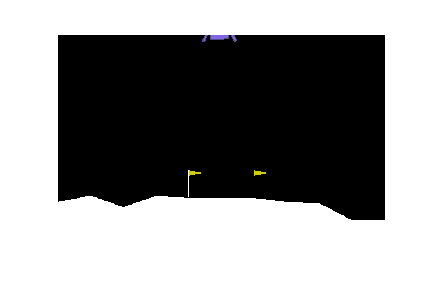
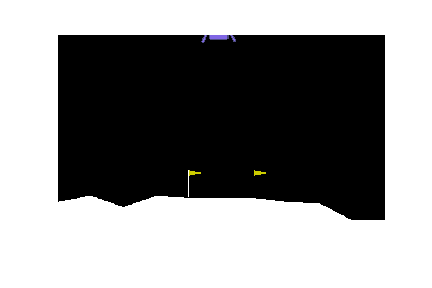
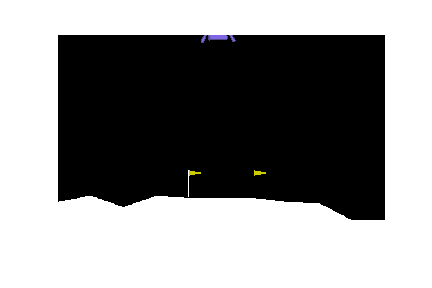
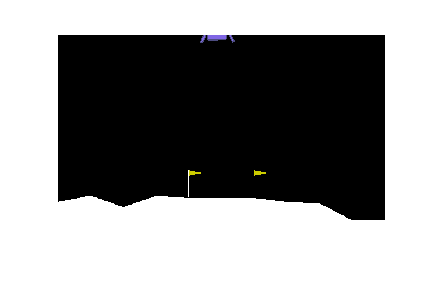
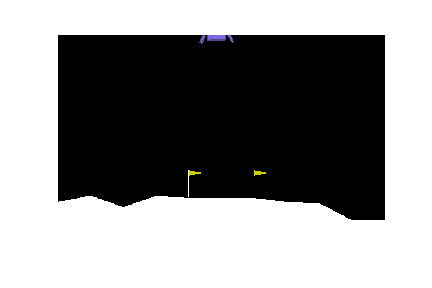
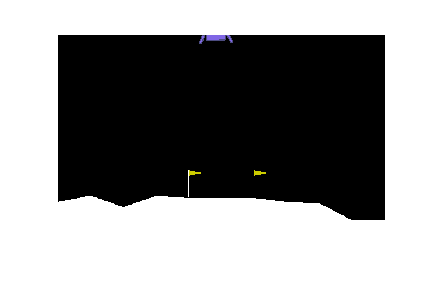
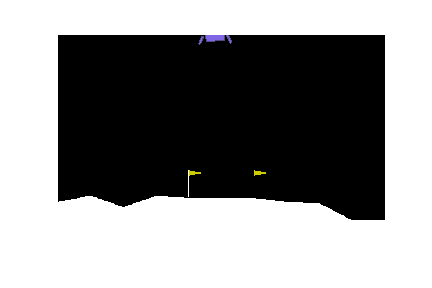
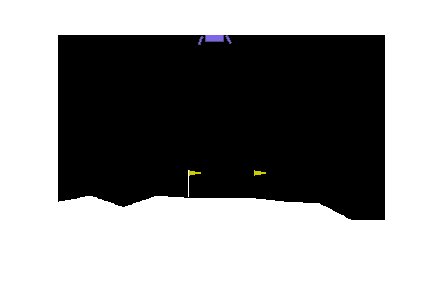
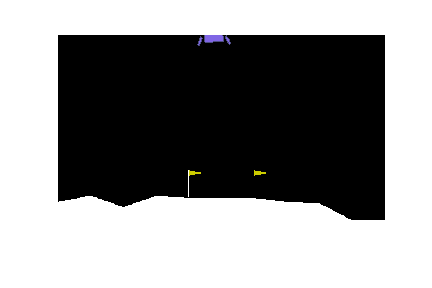
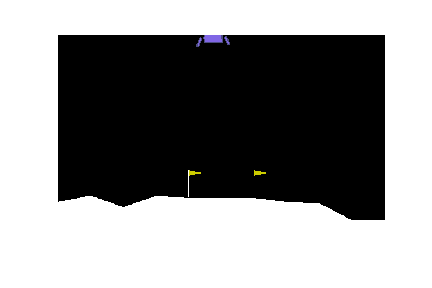
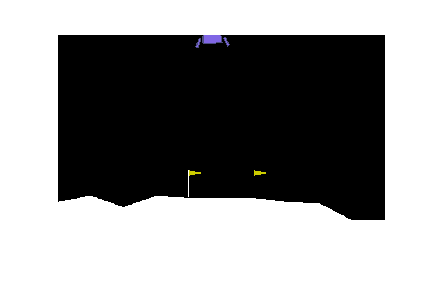
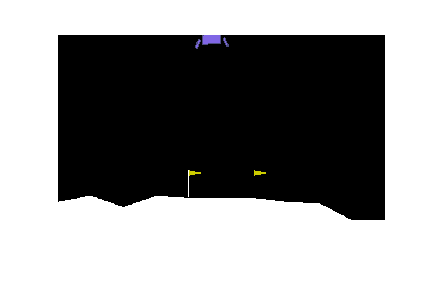
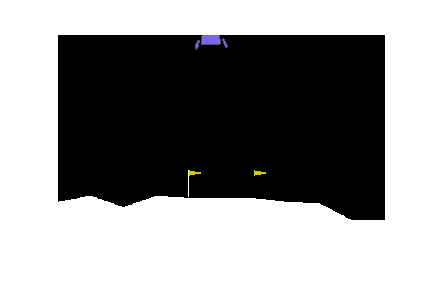
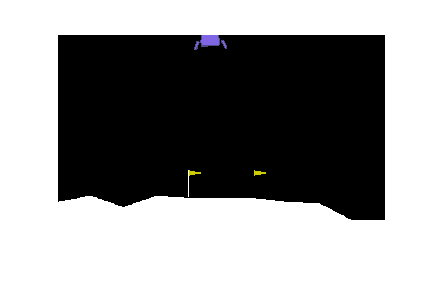
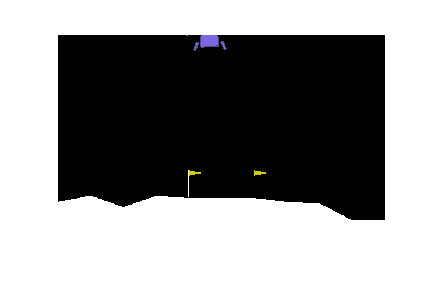
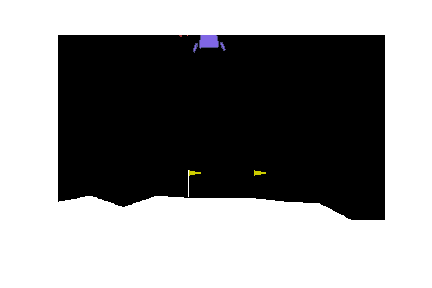
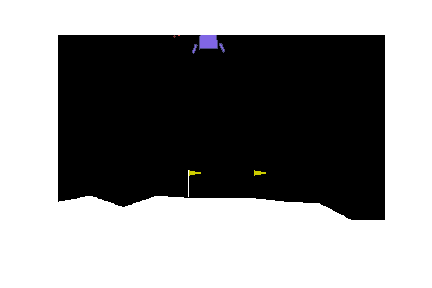
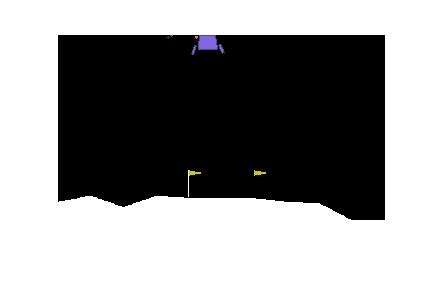
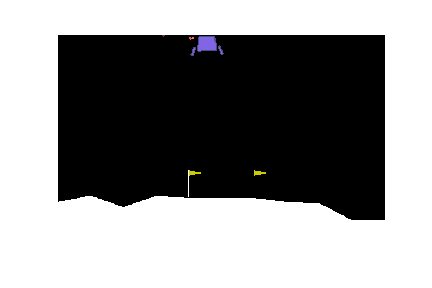
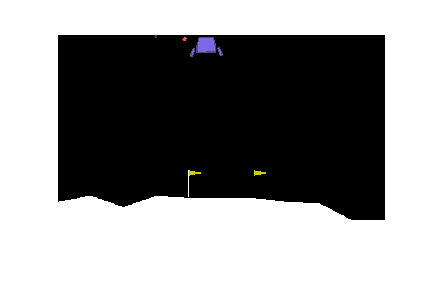
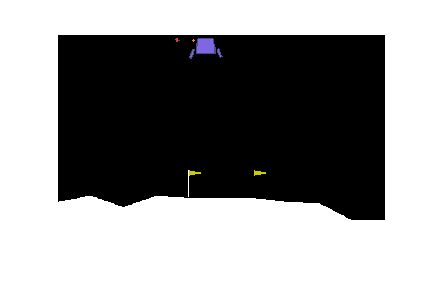
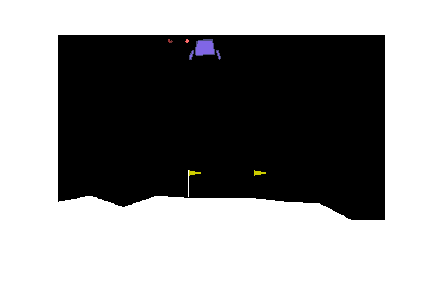
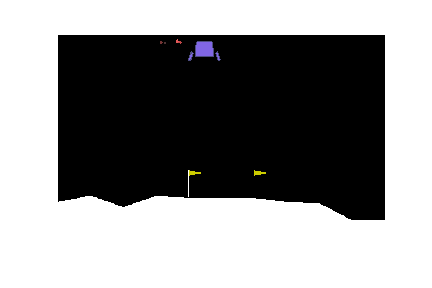
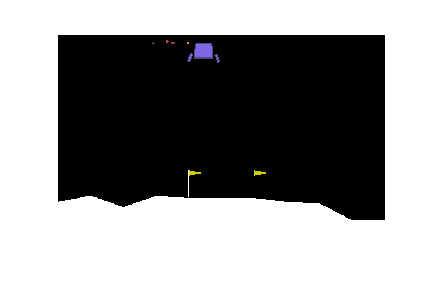
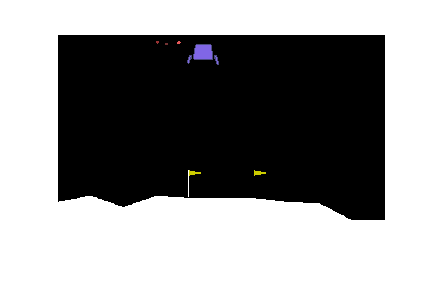
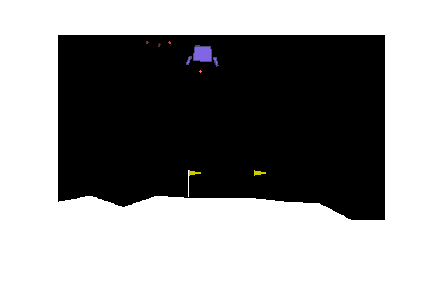
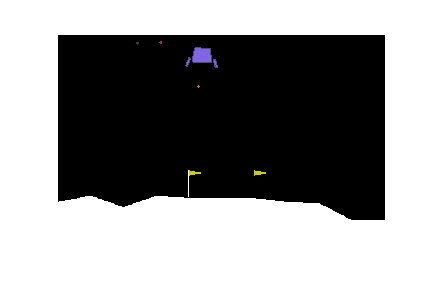
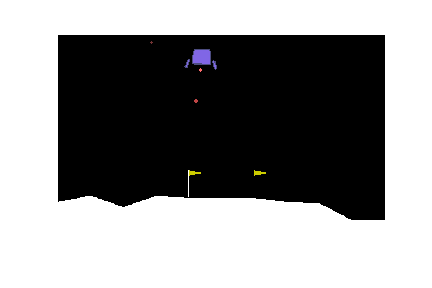
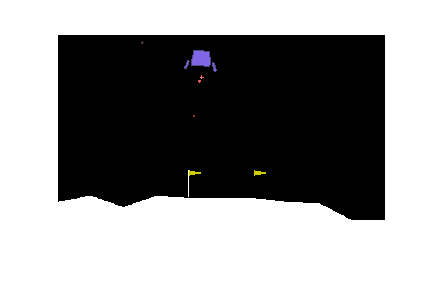
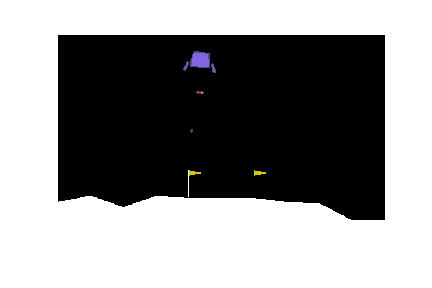
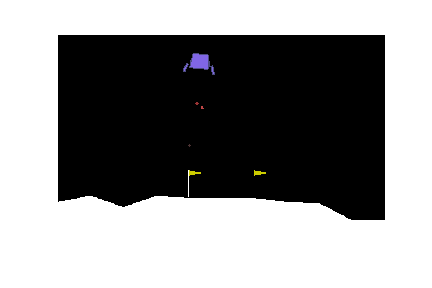
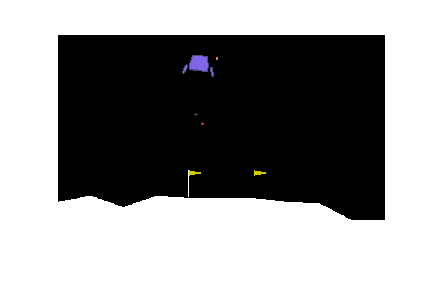
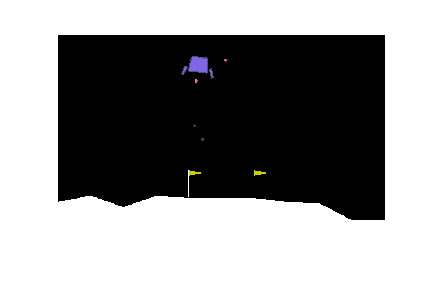
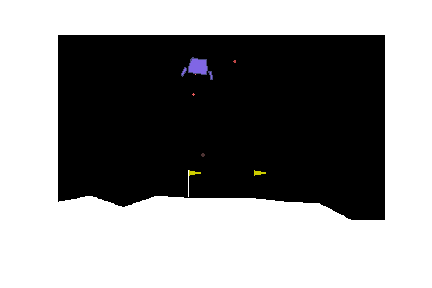
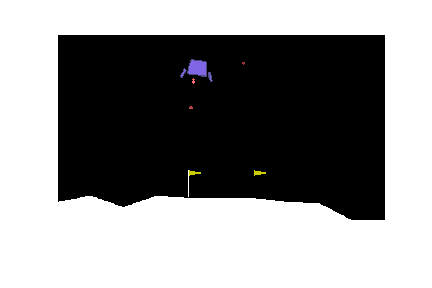
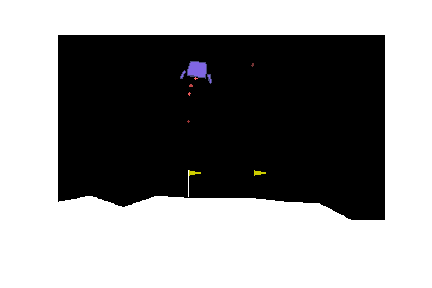
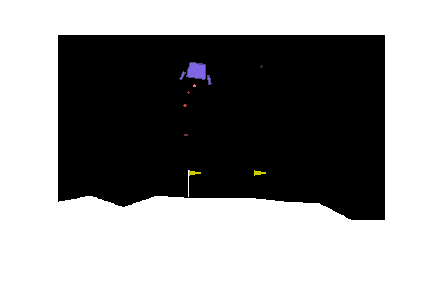
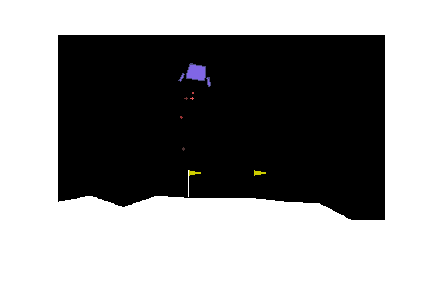
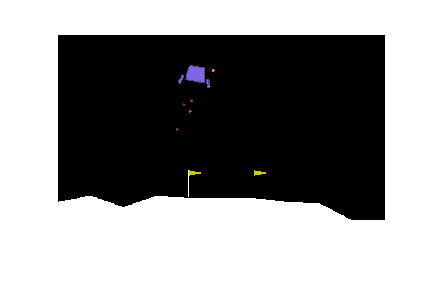
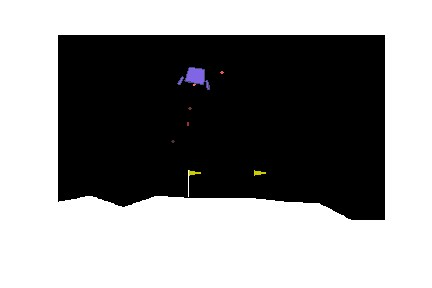
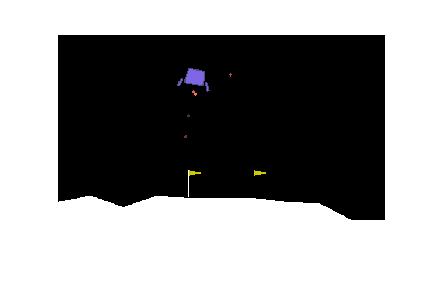
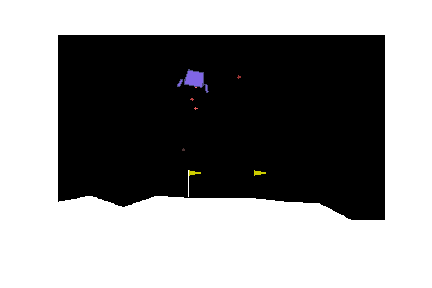
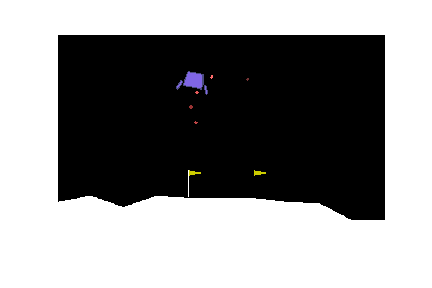
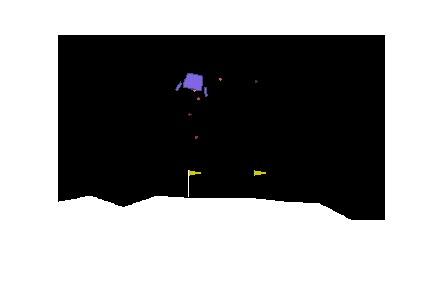
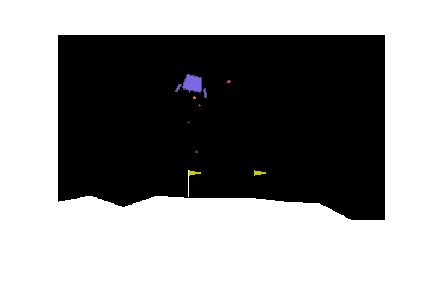
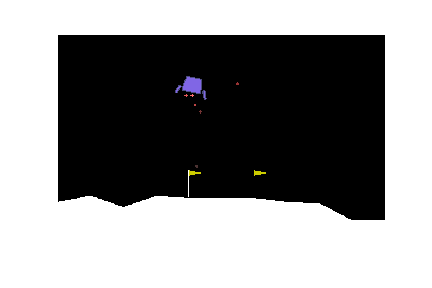
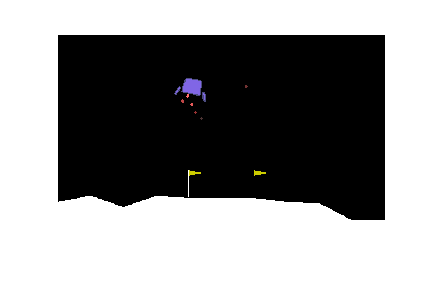
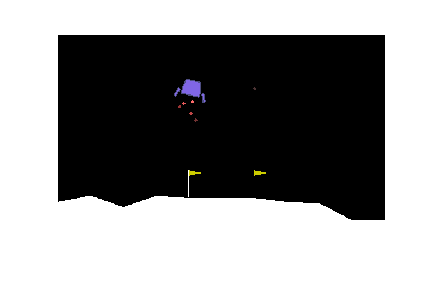
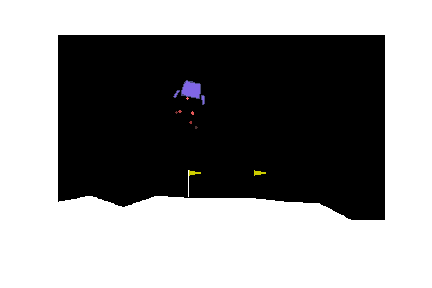
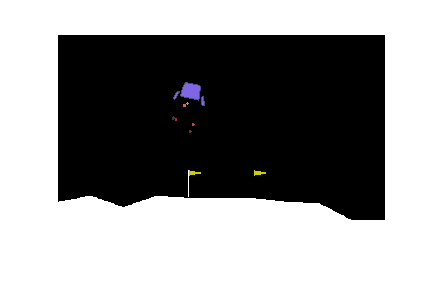
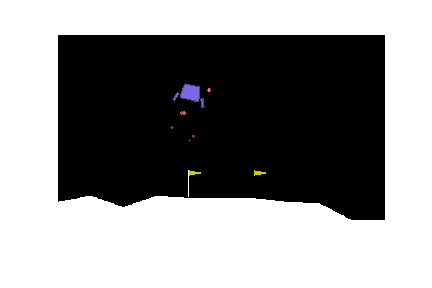
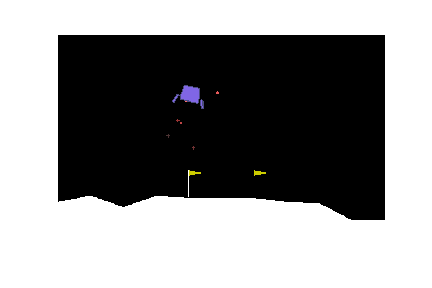
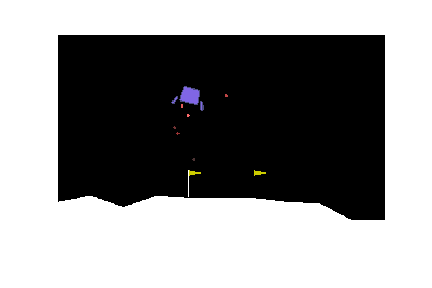
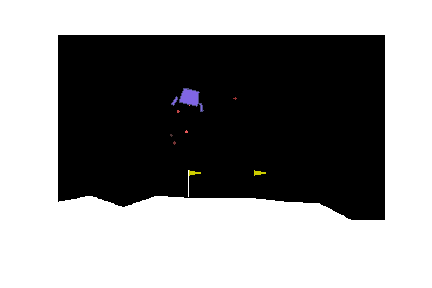
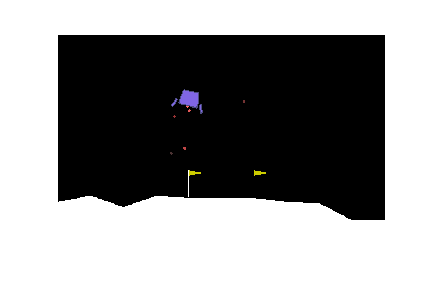
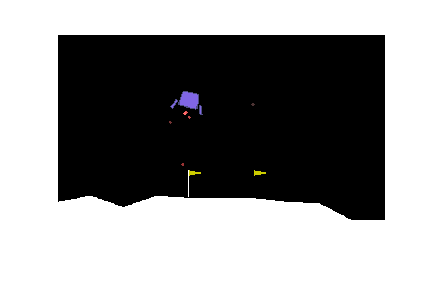
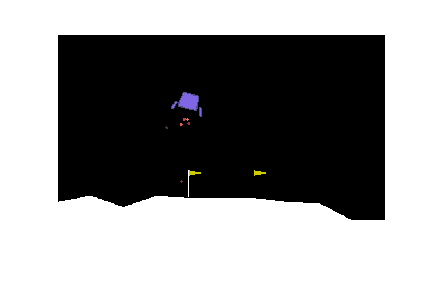
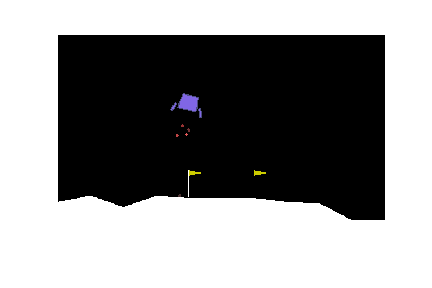
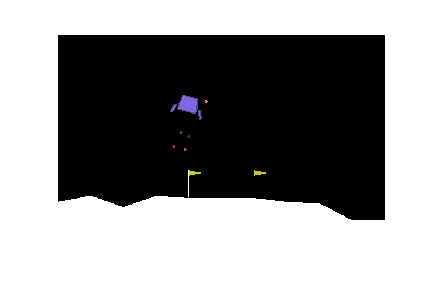
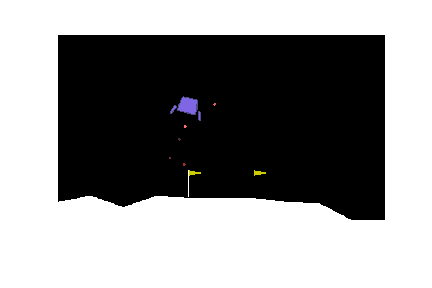
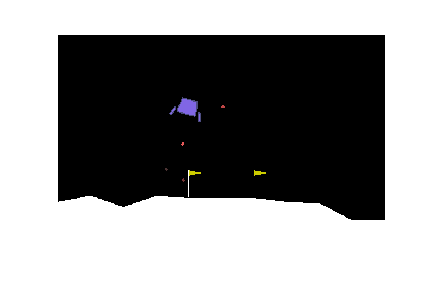
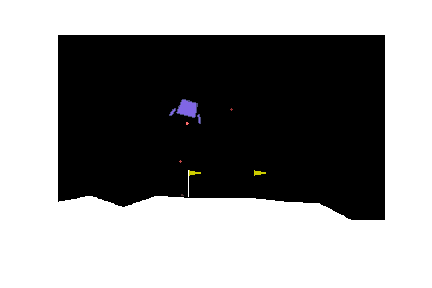
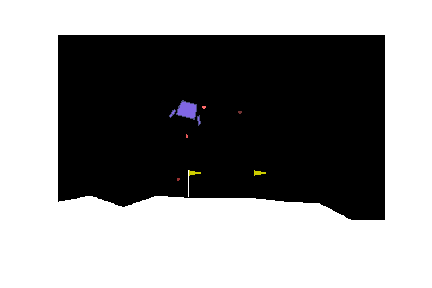
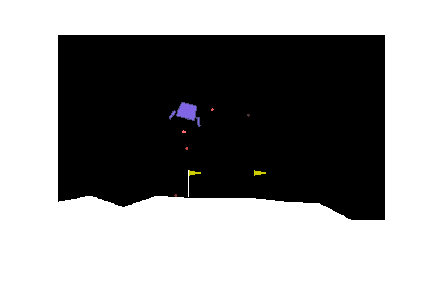
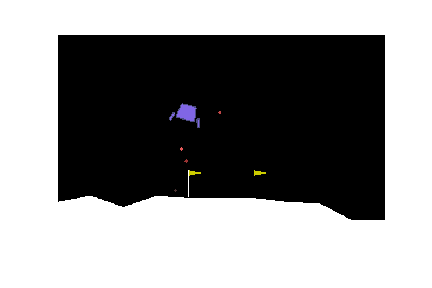
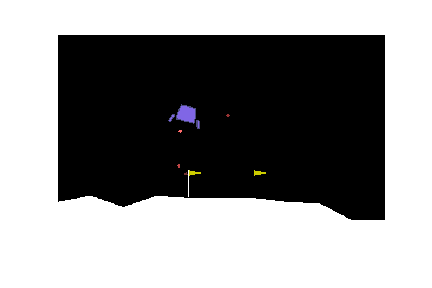
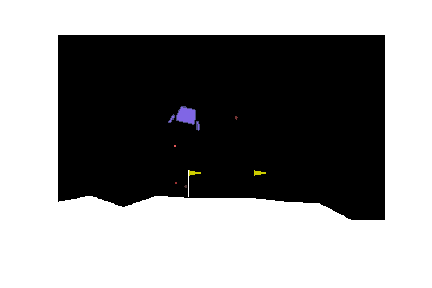
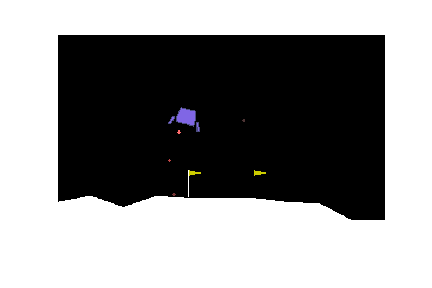
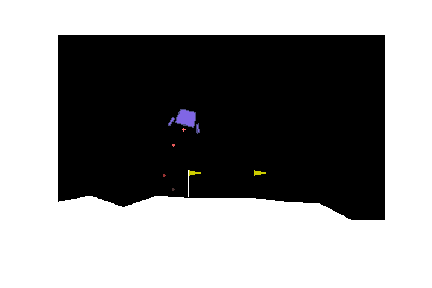
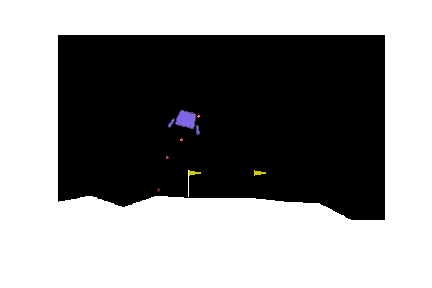
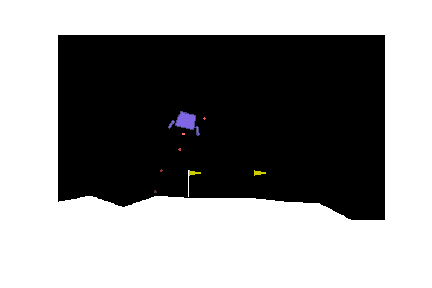
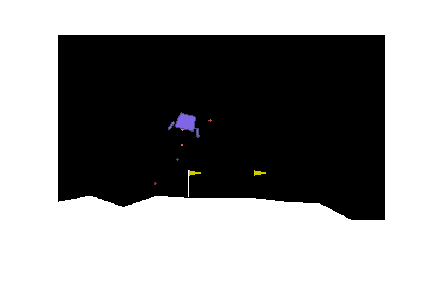
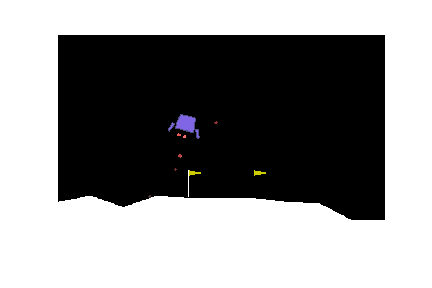
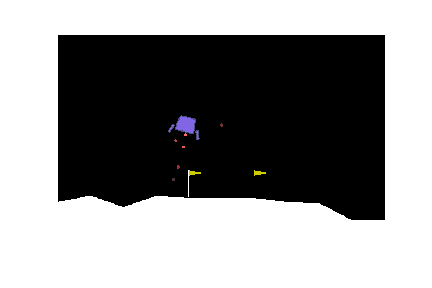
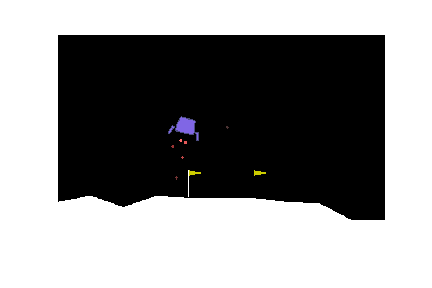
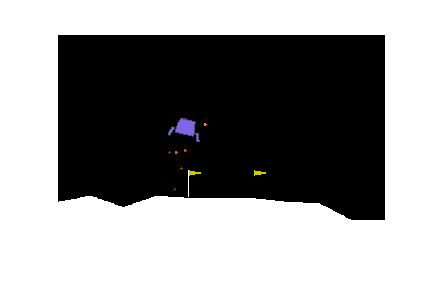
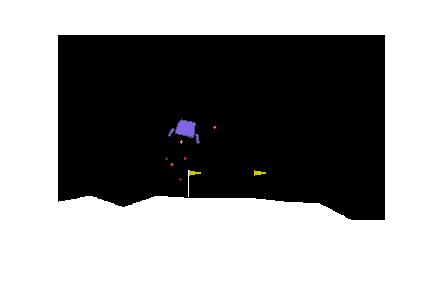
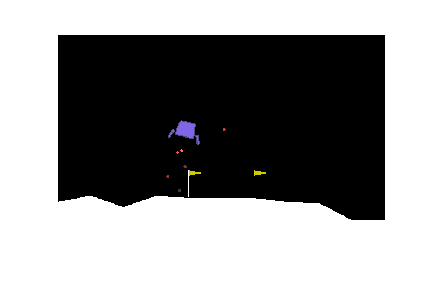
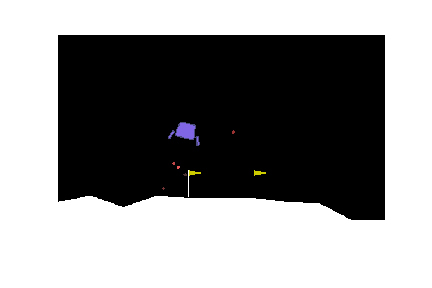
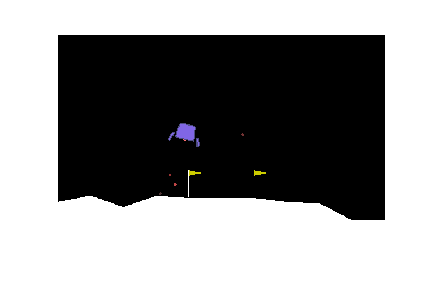
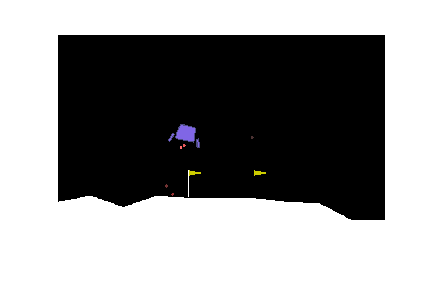
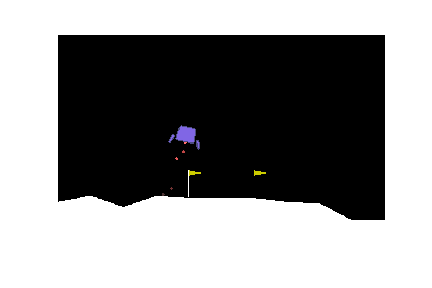
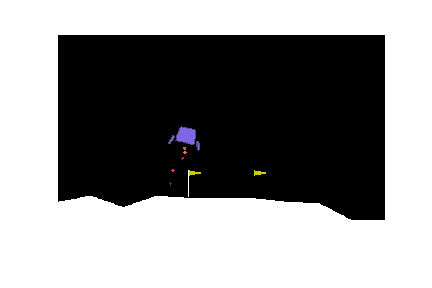
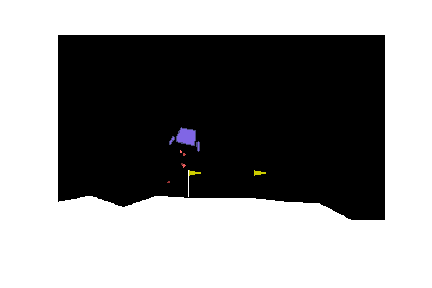
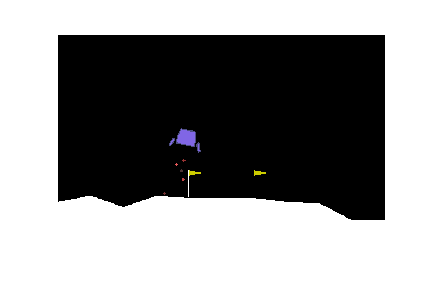
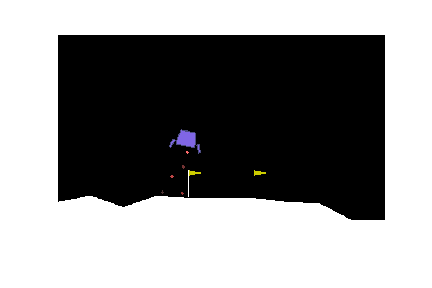
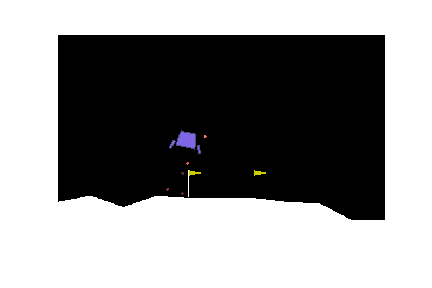
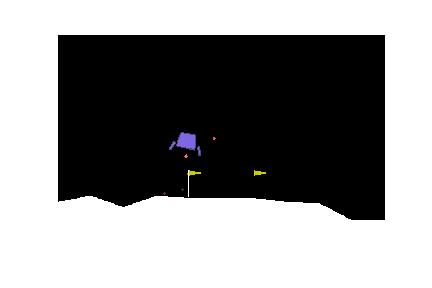
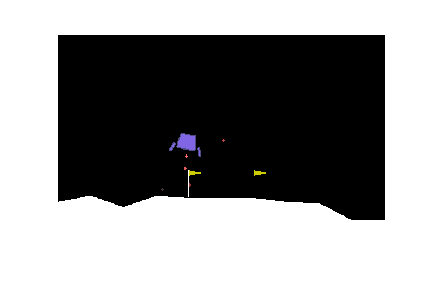
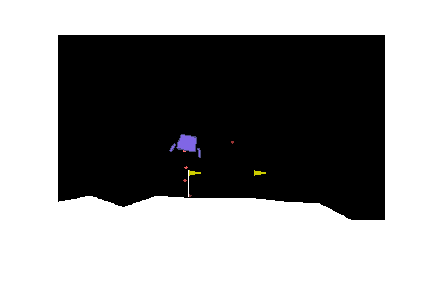
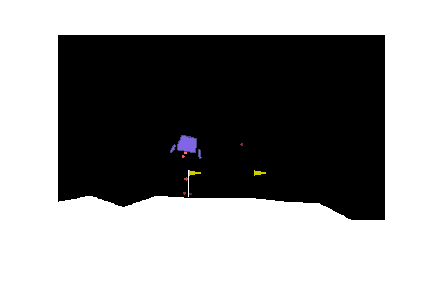
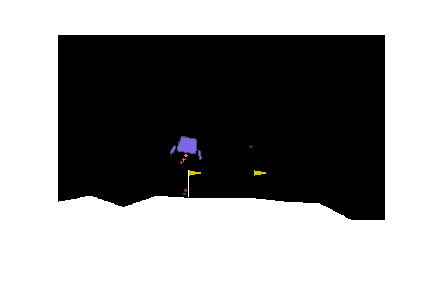
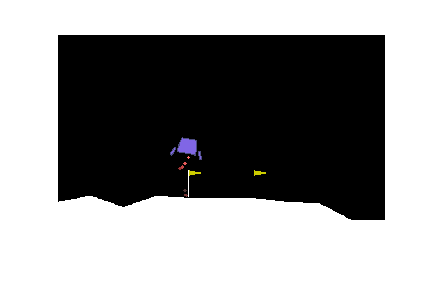
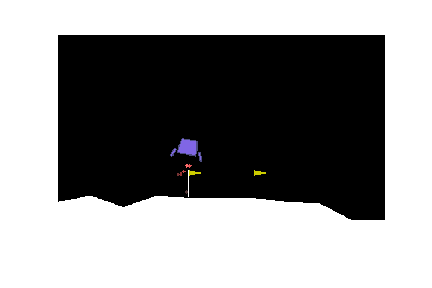
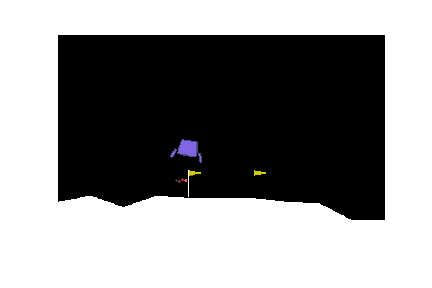
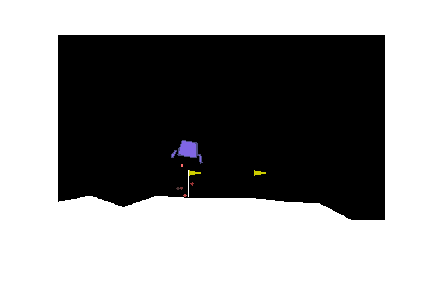
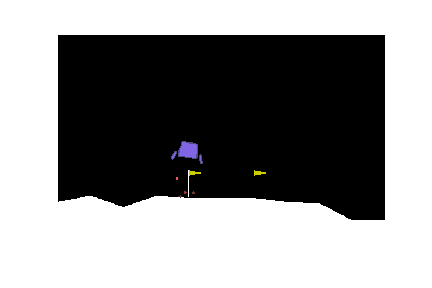
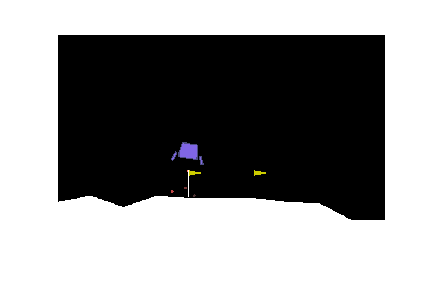
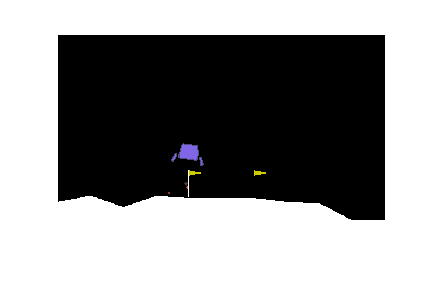
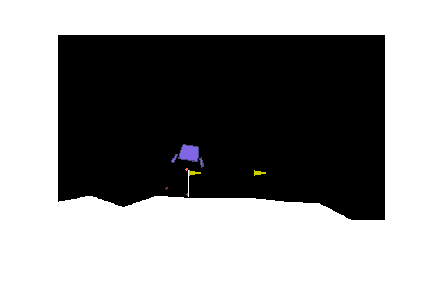
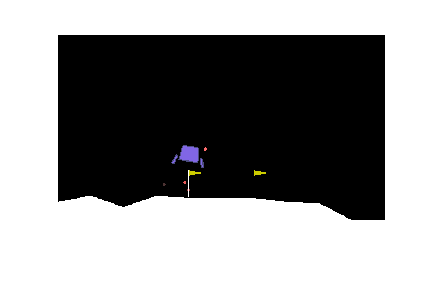
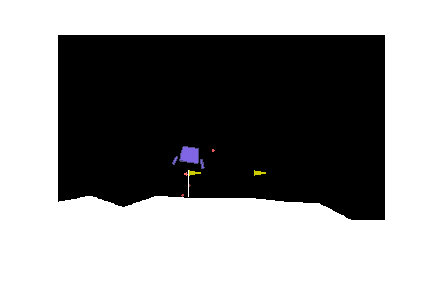
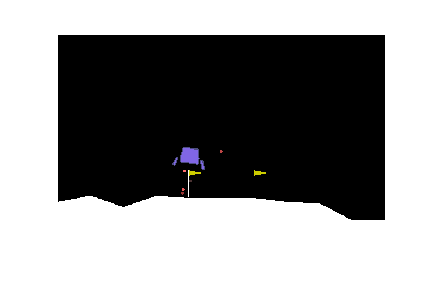
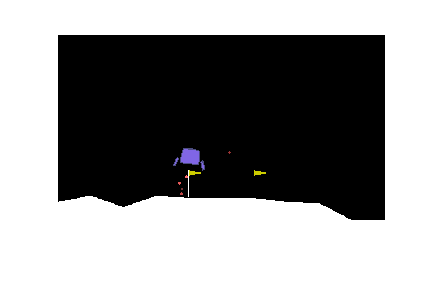
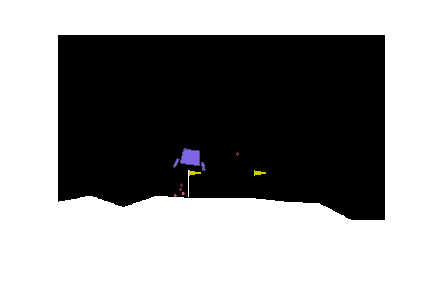
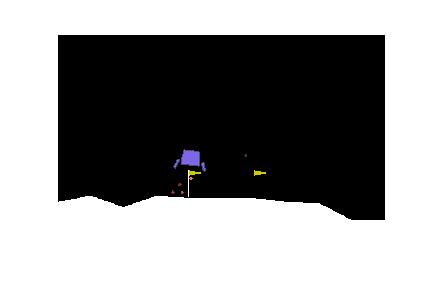
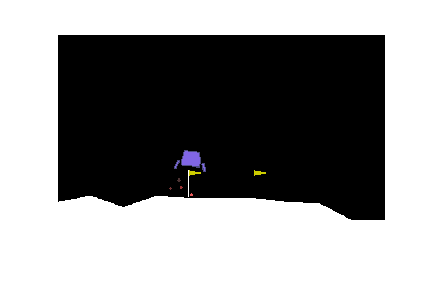
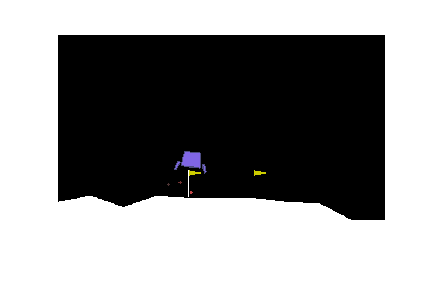
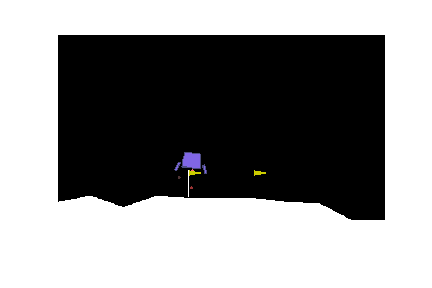
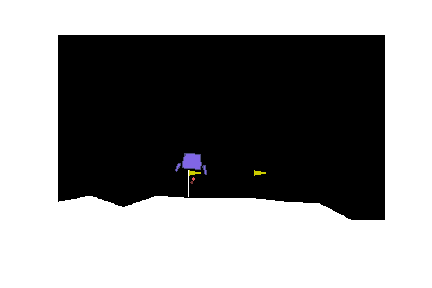
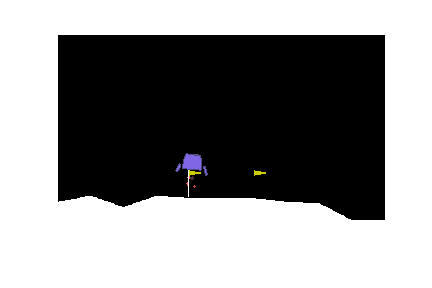
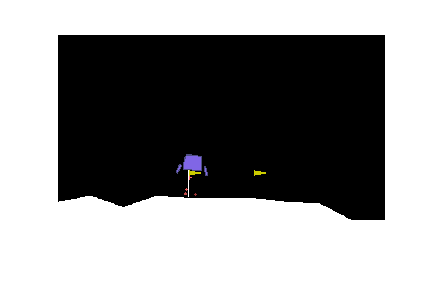
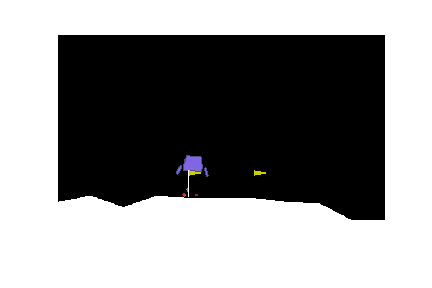
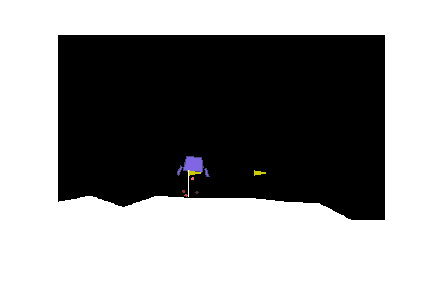
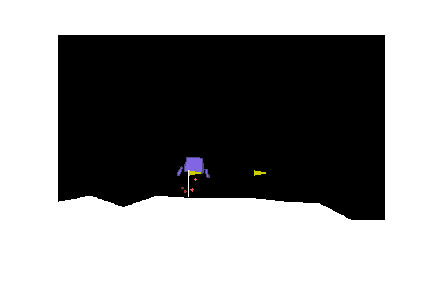
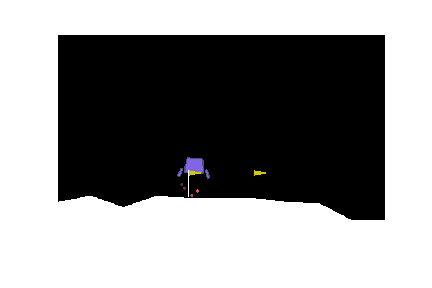
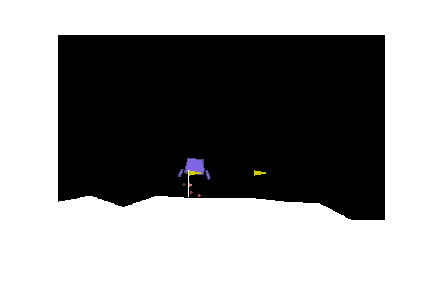
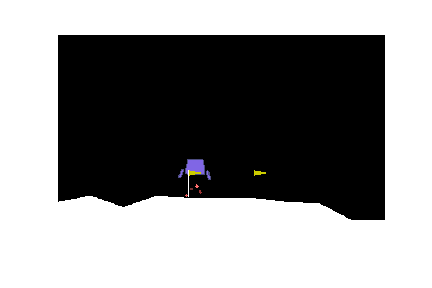
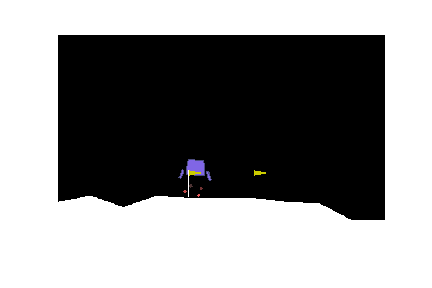
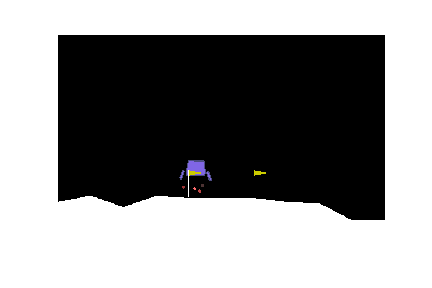
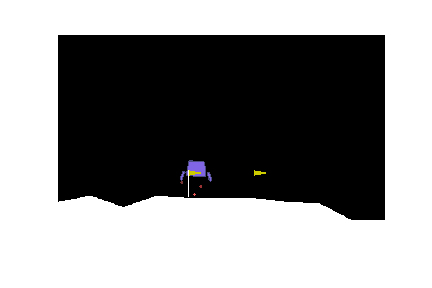
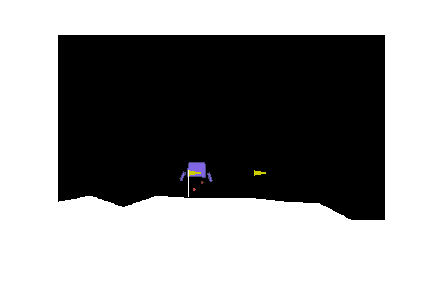
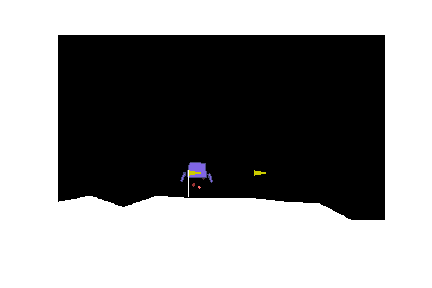
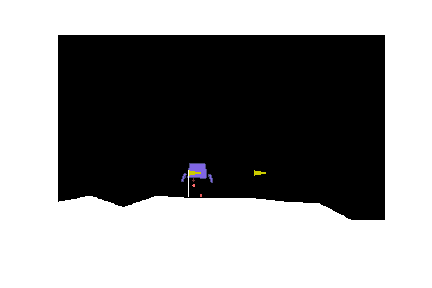
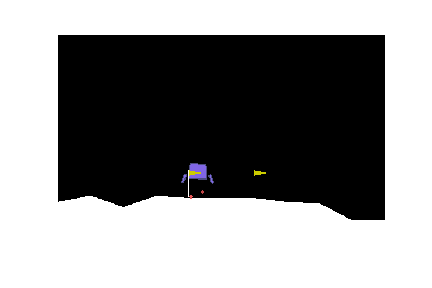
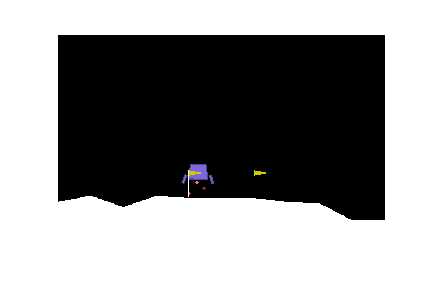
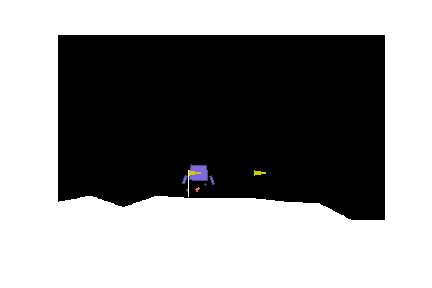
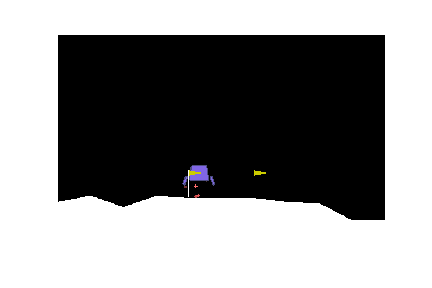
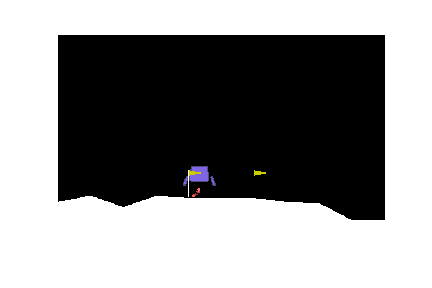
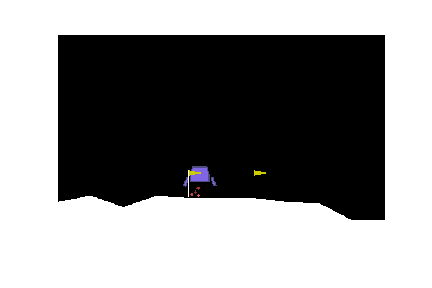
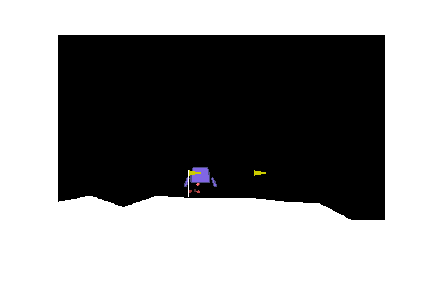
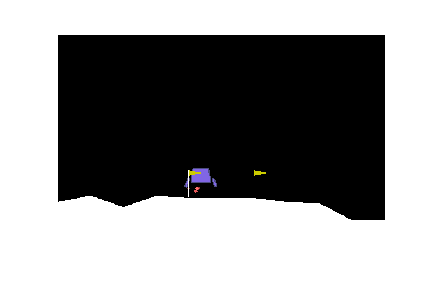
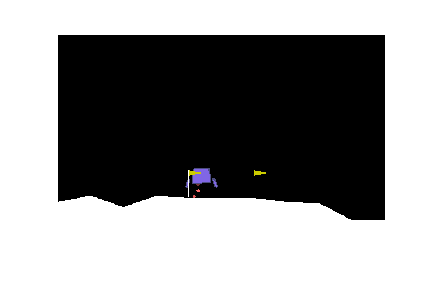
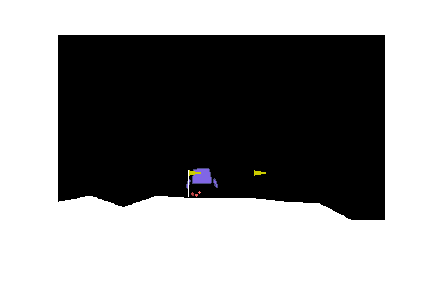
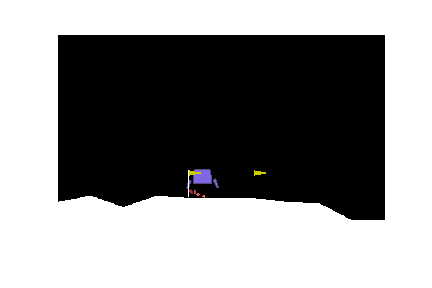
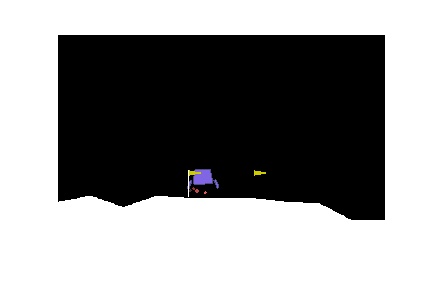
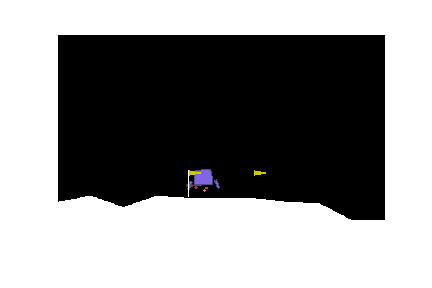
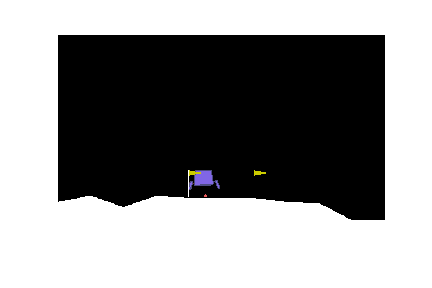
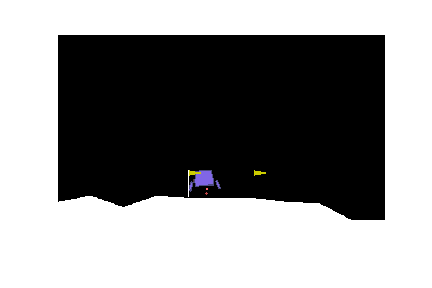
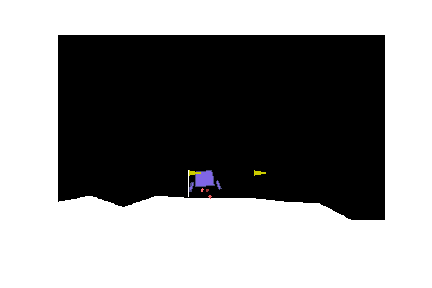
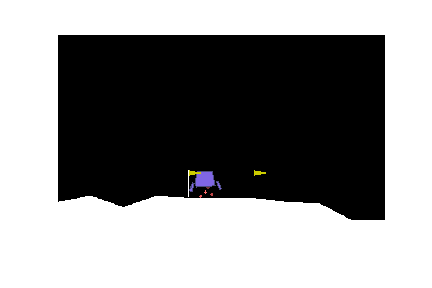
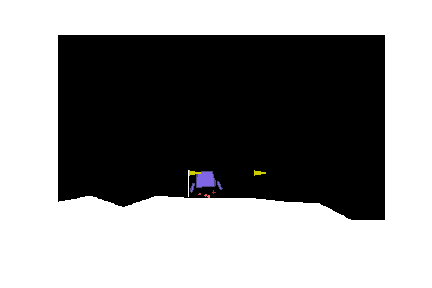
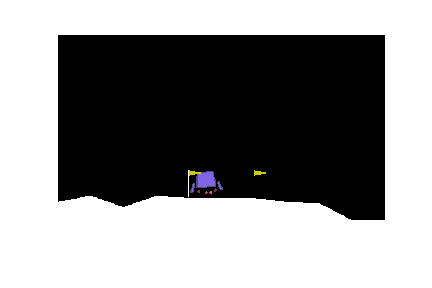
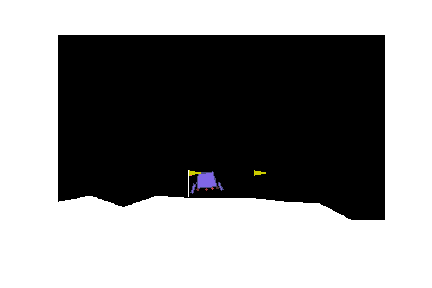
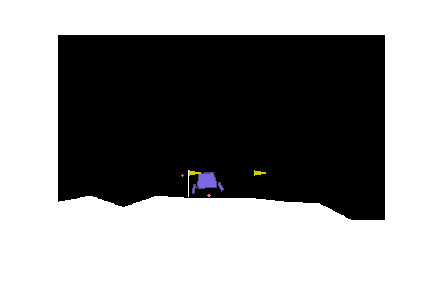
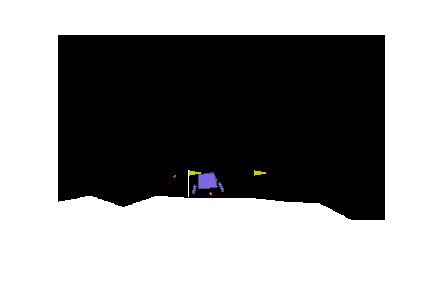
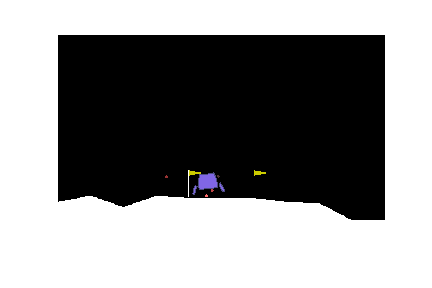
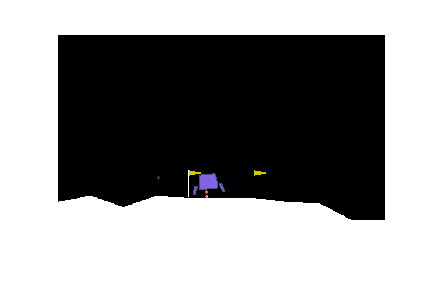
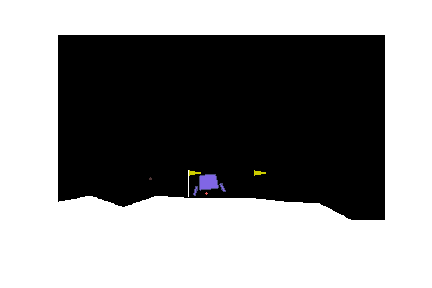
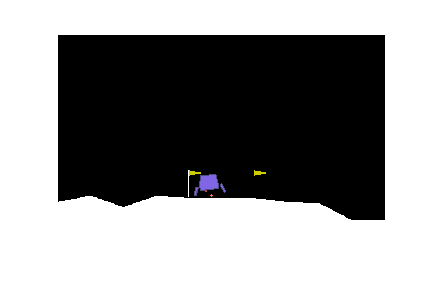
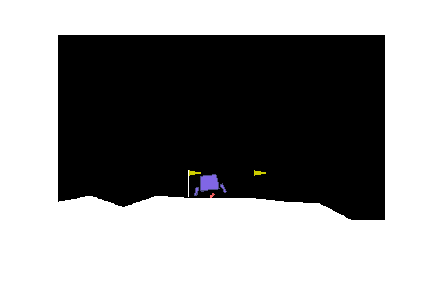
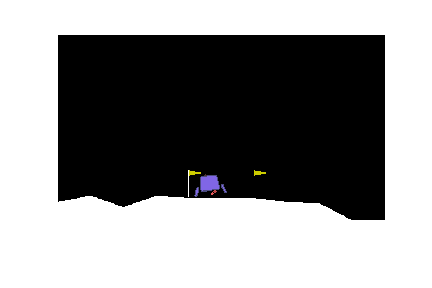
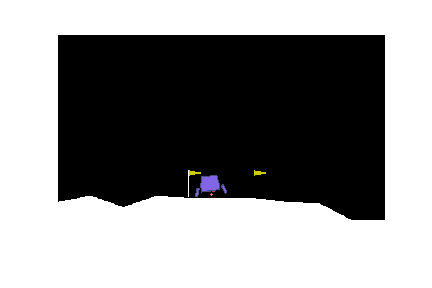
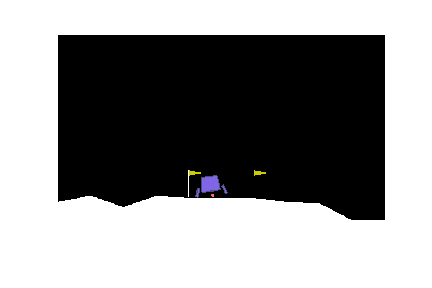
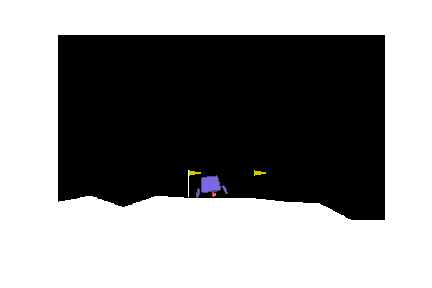
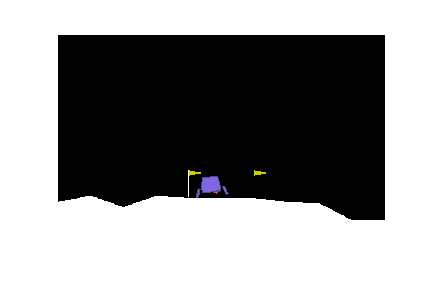
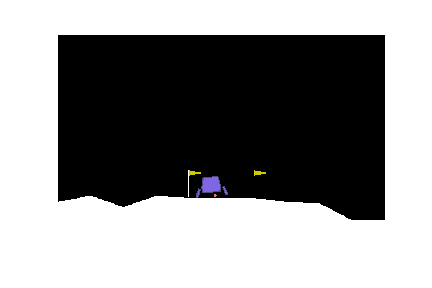
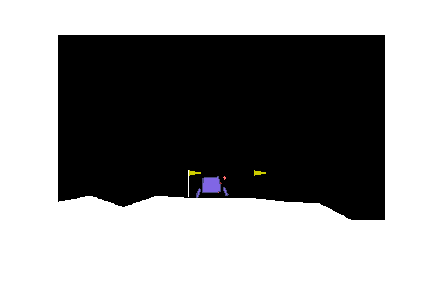
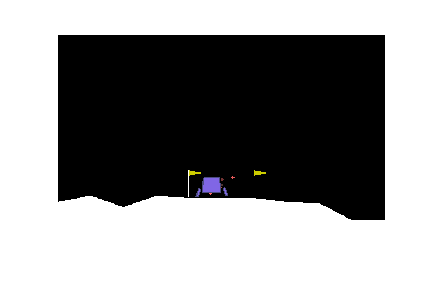
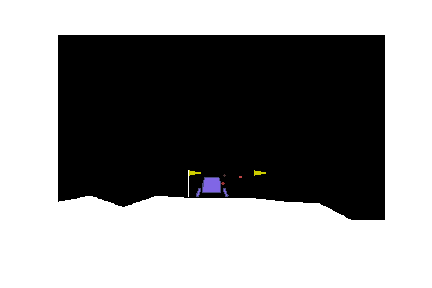
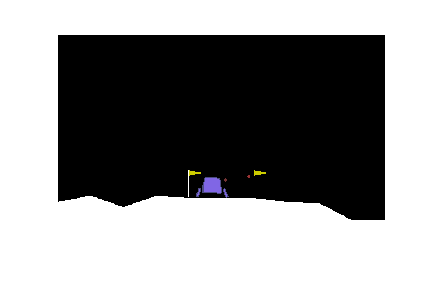
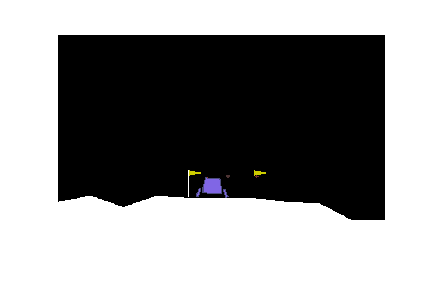
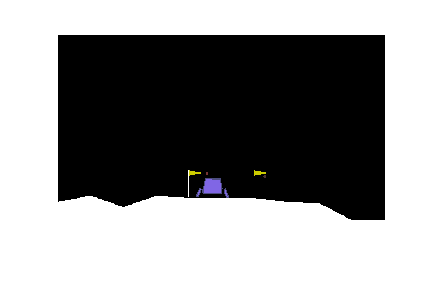
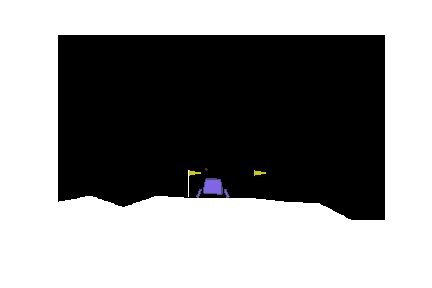
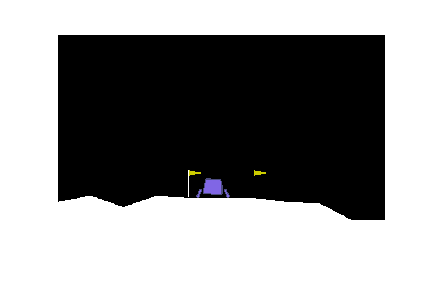
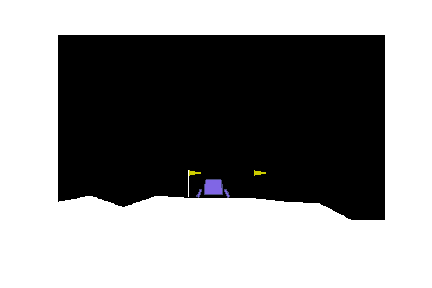
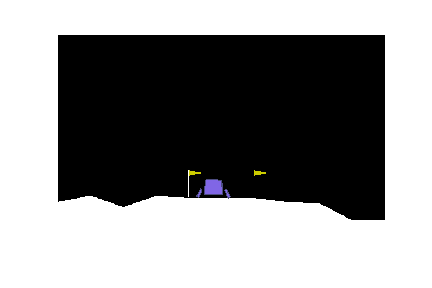
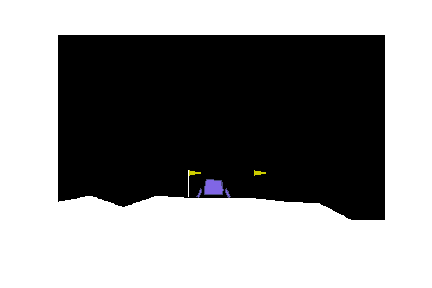
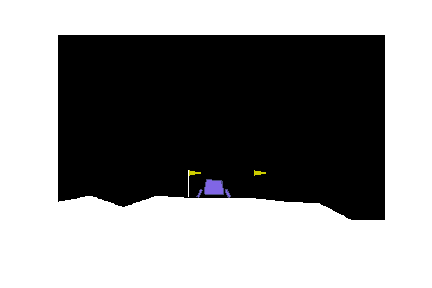
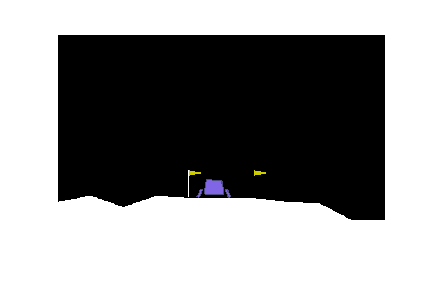
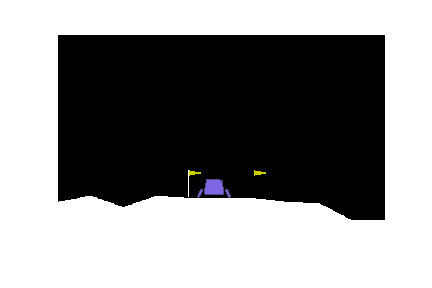
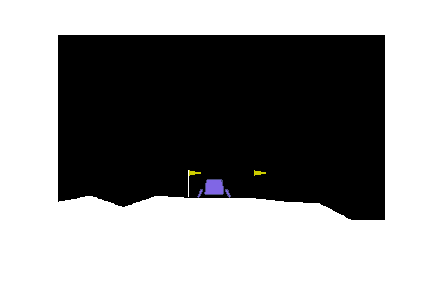
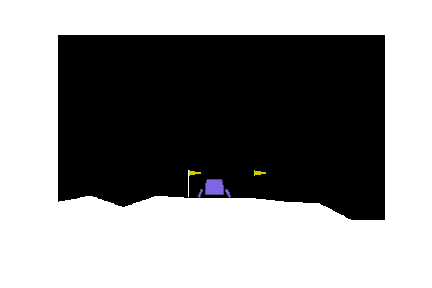
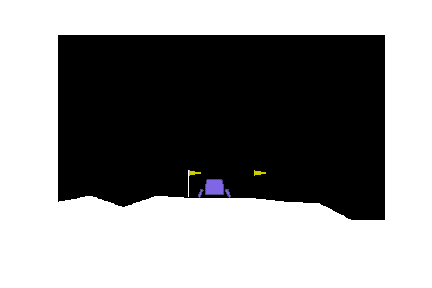
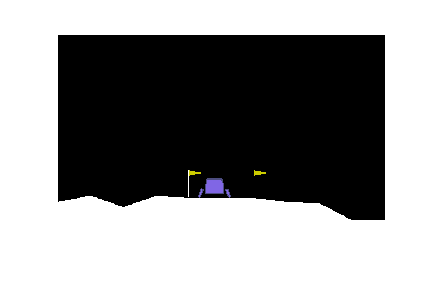
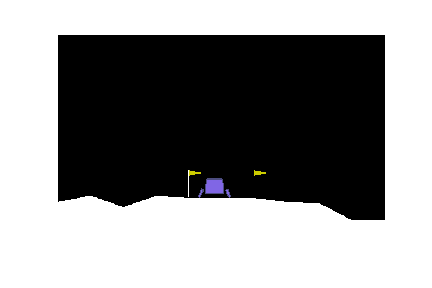
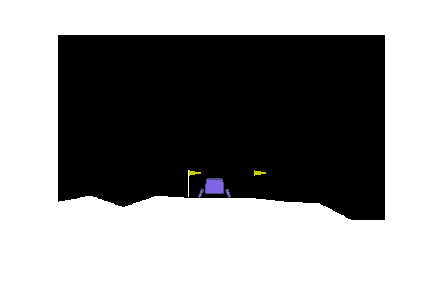
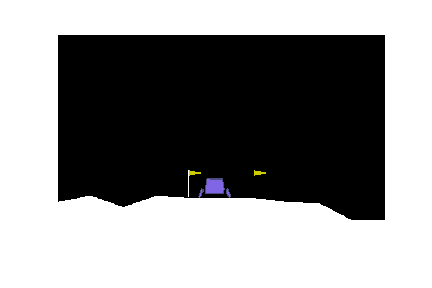
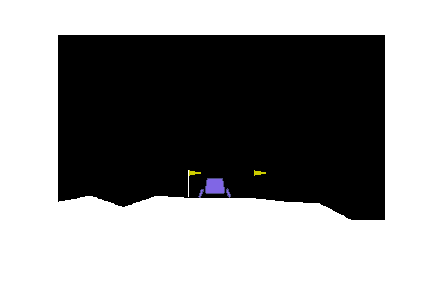
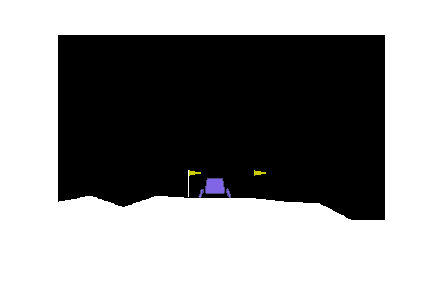
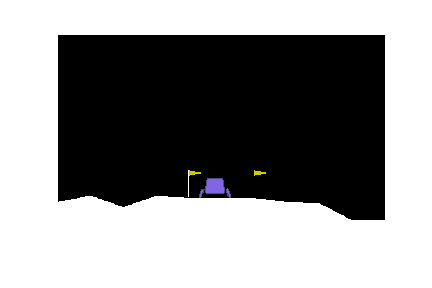
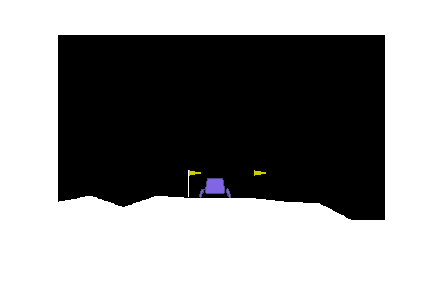
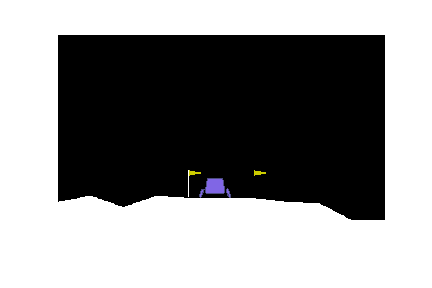
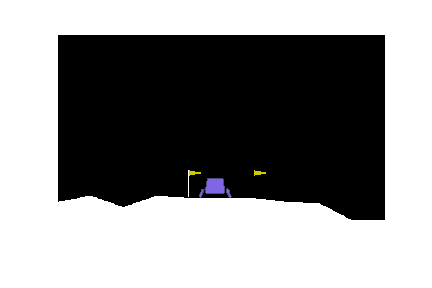
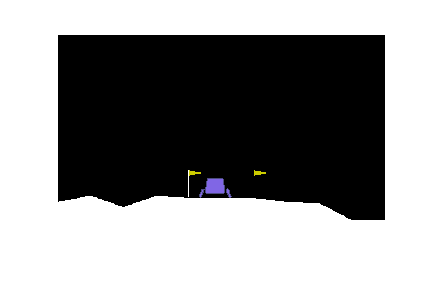
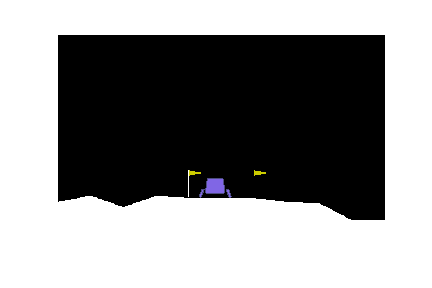
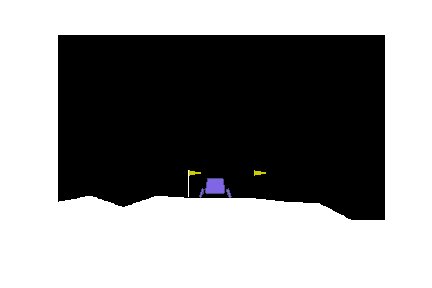
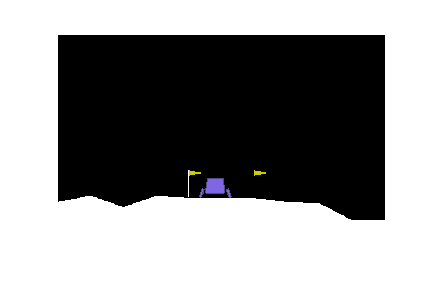
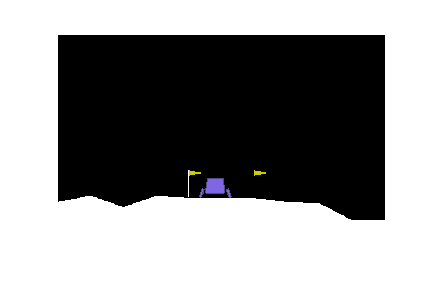
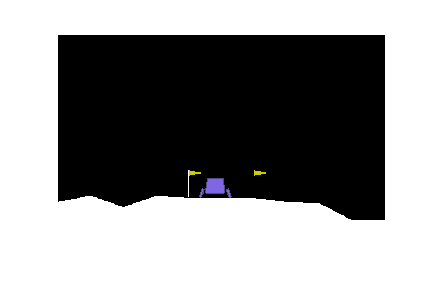
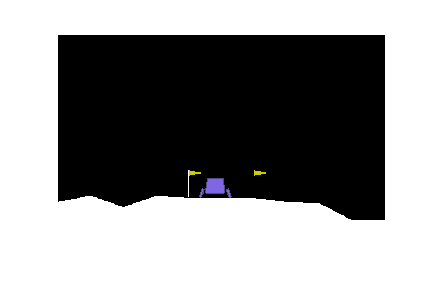
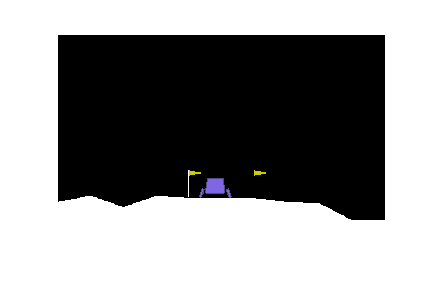
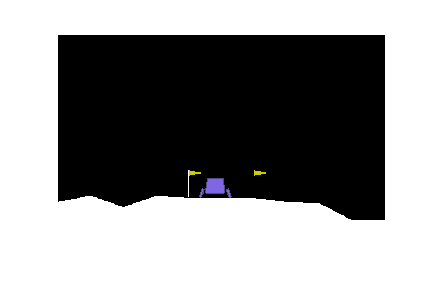
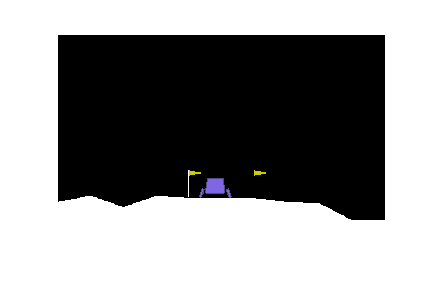
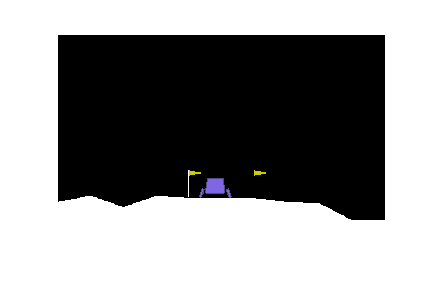
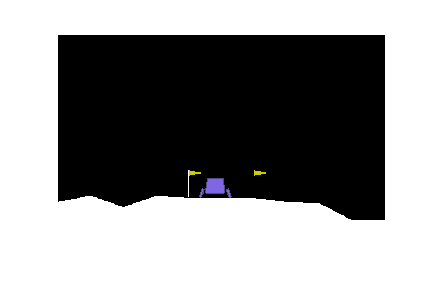
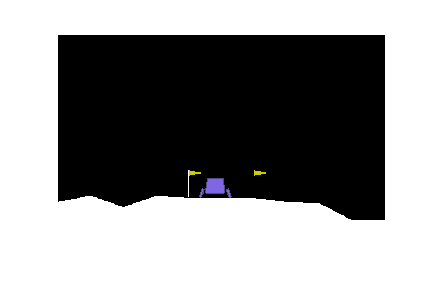
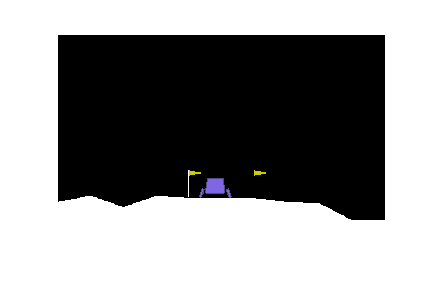
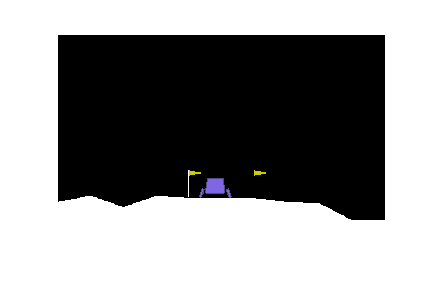
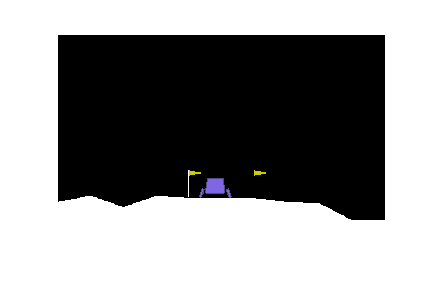
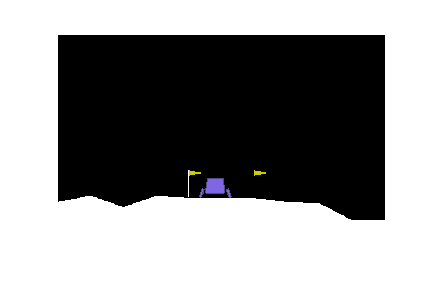
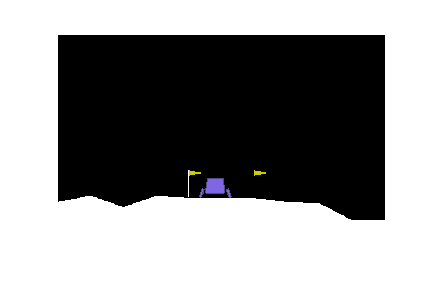
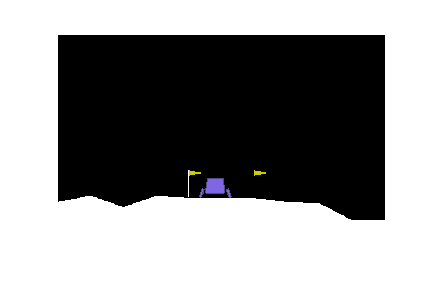
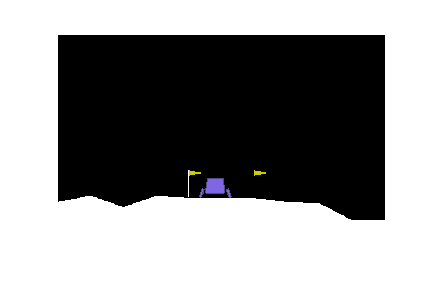
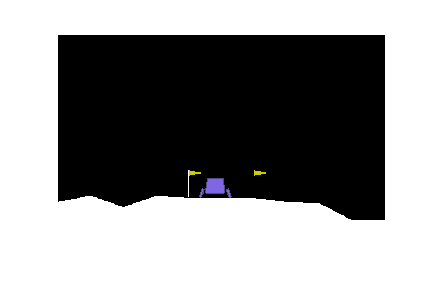
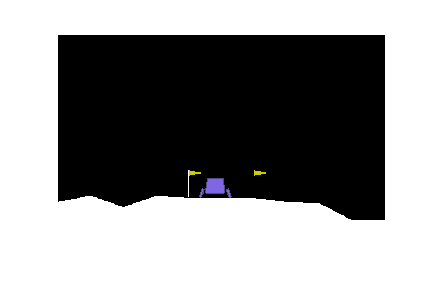
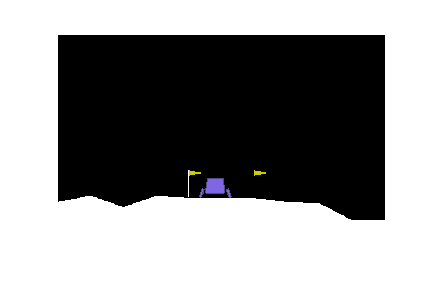
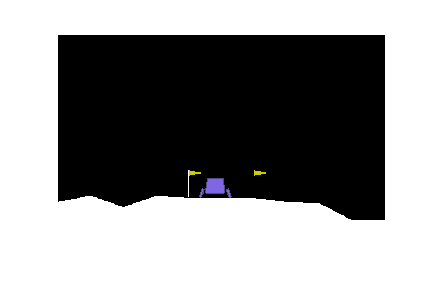
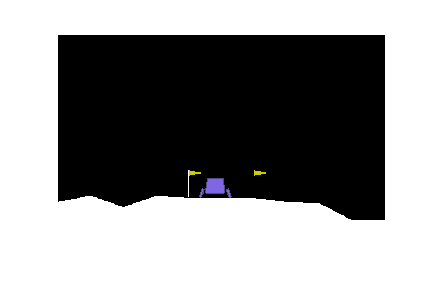
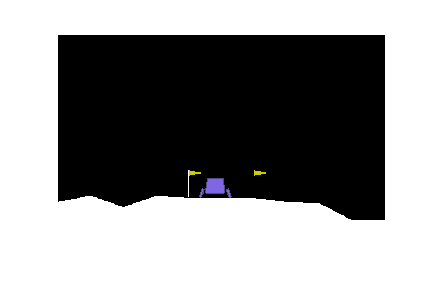
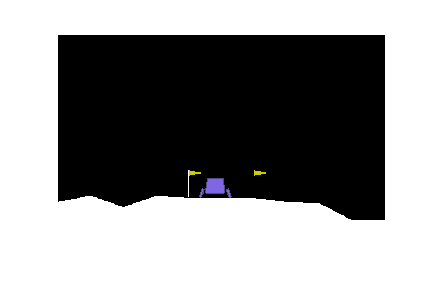
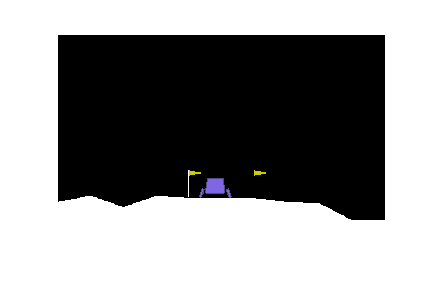

274.2143903445537

In [14]:
episodeOnNet(bests[-1])